<a href="https://colab.research.google.com/github/Swayamprakashpatel/IR_Tablet/blob/main/IR_Tablet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [4]:
# Assuming you have the dataset in a CSV file named 'data.csv'
df = pd.read_csv('/content/Data.csv')
df = df.drop(['Batch No.',], axis = 1)


In [5]:


# Splitting the dataset into features (X) and targets (y)
X = df.iloc[:, 0:9]  # Adjust the column indices as per your dataset
X1 = X.iloc[:, 0:2]
X2 = X.iloc[:, 2:8].apply(pd.to_numeric, errors='coerce') / 100
X3 = X.iloc[:,8:9].apply(pd.to_numeric, errors='coerce') / 1000

y1 = df.iloc[:, -3].apply(pd.to_numeric, errors='coerce') / 100  # Output column 1 = Hardness(kg/cm2)
y2 = df.iloc[:, -2].apply(pd.to_numeric, errors='coerce') / 100  # Output column 2 = % Friability
y3 = df.iloc[:, -1].apply(pd.to_numeric, errors='coerce') / 1000  # Output column 3 = Disin. Time

# Perform one-hot encoding on X1
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
X1_encoded = onehot_encoder.fit_transform(X1)

# Create a DataFrame with the encoded columns
X1_encoded_df = pd.DataFrame(X1_encoded, columns=onehot_encoder.get_feature_names_out(X1.columns))

# Concatenate the encoded columns with the remaining columns in X
X_encoded = pd.concat([X1_encoded_df, X2,X3], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test, y3_train, y3_test = train_test_split(X_encoded, y1, y2, y3, test_size=0.4, random_state=42)

# Linear Regression for y1
linear_reg_y1 = LinearRegression()
linear_reg_y1.fit(X_train, y1_train)
y1_pred_linear = linear_reg_y1.predict(X_test)
linear_mse_y1 = mean_squared_error(y1_test, y1_pred_linear)

# Linear Regression for y2
linear_reg_y2 = LinearRegression()
linear_reg_y2.fit(X_train, y2_train)
y2_pred_linear = linear_reg_y2.predict(X_test)
linear_mse_y2 = mean_squared_error(y2_test, y2_pred_linear)

# Linear Regression for y3
linear_reg_y3 = LinearRegression()
linear_reg_y3.fit(X_train, y3_train)
y3_pred_linear = linear_reg_y3.predict(X_test)
linear_mse_y3 = mean_squared_error(y3_test, y3_pred_linear)

# Support Vector Machine (SVM) for y1
svm_y1 = SVR()
svm_y1.fit(X_train, y1_train)
y1_pred_svm = svm_y1.predict(X_test)
svm_mse_y1 = mean_squared_error(y1_test, y1_pred_svm)

# Support Vector Machine (SVM) for y2
svm_y2 = SVR()
svm_y2.fit(X_train, y2_train)
y2_pred_svm = svm_y2.predict(X_test)
svm_mse_y2 = mean_squared_error(y2_test, y2_pred_svm)

# Support Vector Machine (SVM) for y3
svm_y3 = SVR()
svm_y3.fit(X_train, y3_train)
y3_pred_svm = svm_y3.predict(X_test)
svm_mse_y3 = mean_squared_error(y3_test, y3_pred_svm)

# k-Nearest Neighbors (k-NN) for y1
knn_y1 = KNeighborsRegressor()
knn_y1.fit(X_train, y1_train)
y1_pred_knn = knn_y1.predict(X_test)
knn_mse_y1 = mean_squared_error(y1_test, y1_pred_knn)

# k-Nearest Neighbors (k-NN) for y2
knn_y2 = KNeighborsRegressor()
knn_y2.fit(X_train, y2_train)
y2_pred_knn = knn_y2.predict(X_test)
knn_mse_y2 = mean_squared_error(y2_test, y2_pred_knn)

# k-Nearest Neighbors (k-NN) for y3
knn_y3 = KNeighborsRegressor()
knn_y3.fit(X_train, y3_train)
y3_pred_knn = knn_y3.predict(X_test)
knn_mse_y3 = mean_squared_error(y3_test, y3_pred_knn)

# Artificial Neural Network (ANN) for y1
filepath_y1 = '/content/drive/My Drive/y1.hdf5'
checkpoint = [tf.keras.callbacks.ModelCheckpoint(filepath_y1, monitor='val_root_mean_squared_error', mode='min', save_best_only=True, Save_weights_only = False, verbose = 1),
              tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=369, verbose =1)]

ann_y1 = tf.keras.Sequential([
                             tf.keras.layers.Dense(369, activation='relu', input_shape=(13,)),
                             tf.keras.layers.Dense(369, activation='relu'),
                             tf.keras.layers.Dense(369, activation='relu'),
                             tf.keras.layers.Dense(1, activation ='relu')])

ann_y1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 0.1), loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = ann_y1.fit(X_train, y1_train, epochs= 10, callbacks=[checkpoint],validation_data=(X_test, y1_test), batch_size= None)
y1_pred_ann = ann_y1.predict(X_test)

# Artificial Neural Network (ANN) for y2
filepath_y2 = '/content/drive/My Drive/y2.hdf5'
checkpoint = [tf.keras.callbacks.ModelCheckpoint(filepath_y2, monitor='val_root_mean_squared_error', mode='min', save_best_only=True, Save_weights_only = False, verbose = 1),
              tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=369, verbose =1)]

ann_y2 = tf.keras.Sequential([
                             tf.keras.layers.Dense(369, activation='relu', input_shape=(13,)),
                             tf.keras.layers.Dense(369, activation='relu'),
                             tf.keras.layers.Dense(369, activation='relu'),
                             tf.keras.layers.Dense(1, activation ='relu')])

ann_y2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 0.1), loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = ann_y2.fit(X_train, y2_train, epochs= 10, callbacks=[checkpoint],validation_data=(X_test, y2_test), batch_size= None)
y2_pred_ann = ann_y2.predict(X_test)

# Artificial Neural Network (ANN) for y3
filepath_y3 = '/content/drive/My Drive/y3.hdf5'
checkpoint = [tf.keras.callbacks.ModelCheckpoint(filepath_y3, monitor='val_root_mean_squared_error', mode='min', save_best_only=True, Save_weights_only = False, verbose = 1),
              tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=369, verbose =1)]

ann_y3 = tf.keras.Sequential([
                             tf.keras.layers.Dense(369, activation='relu', input_shape=(13,)),
                             tf.keras.layers.Dense(369, activation='relu'),
                             tf.keras.layers.Dense(369, activation='relu'),
                            # tf.keras.layers.Dense(65, activation='relu'),
                             tf.keras.layers.Dense(1, activation ='tanh')])

ann_y3.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate = 0.1), loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = ann_y3.fit(X_train, y3_train, epochs= 10000, callbacks=[checkpoint],validation_data=(X_test, y3_test), batch_size= None)
y3_pred_ann = ann_y3.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
15/17 [=========================>....] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0437
Epoch 1: val_root_mean_squared_error improved from inf to 0.04529, saving model to /content/drive/My Drive/y1.hdf5
17/17 [==============================] - 1s 23ms/step - loss: 0.0019 - root_mean_squared_error: 0.0432 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0453
Epoch 2/10
15/17 [=========================>....] - ETA: 0s - loss: 0.0014 - root_mean_squared_error: 0.0371
Epoch 2: val_root_mean_squared_error improved from 0.04529 to 0.03617, saving model to /content/drive/My Drive/y1.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 0.0014 - root_mean_squared_error: 0.0372 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0362
Epoch 3/10
 1/17 [>.............................] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0341

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


15/17 [=========================>....] - ETA: 0s - loss: 0.0013 - root_mean_squared_error: 0.0356
Epoch 3: val_root_mean_squared_error improved from 0.03617 to 0.03171, saving model to /content/drive/My Drive/y1.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 0.0012 - root_mean_squared_error: 0.0353 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0317
Epoch 4/10
16/17 [===========================>..] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0341    
Epoch 4: val_root_mean_squared_error did not improve from 0.03171
17/17 [==============================] - 0s 6ms/step - loss: 0.0012 - root_mean_squared_error: 0.0342 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0323
Epoch 5/10
14/17 [=======================>......] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0334
Epoch 5: val_root_mean_squared_error improved from 0.03171 to 0.03129, saving model to /content/drive/My Drive/y1.hdf5
17/17 [==============================] - 0s 8ms/step - los

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


17/17 [==============================] - 0s 11ms/step - loss: 2.0435e-04 - root_mean_squared_error: 0.0143 - val_loss: 2.3529e-04 - val_root_mean_squared_error: 0.0153
Epoch 3/10
16/17 [===========================>..] - ETA: 0s - loss: 1.9583e-04 - root_mean_squared_error: 0.0140
Epoch 3: val_root_mean_squared_error improved from 0.01534 to 0.01527, saving model to /content/drive/My Drive/y2.hdf5
17/17 [==============================] - 0s 11ms/step - loss: 1.9437e-04 - root_mean_squared_error: 0.0139 - val_loss: 2.3327e-04 - val_root_mean_squared_error: 0.0153
Epoch 4/10
15/17 [=========================>....] - ETA: 0s - loss: 1.9671e-04 - root_mean_squared_error: 0.0140
Epoch 4: val_root_mean_squared_error did not improve from 0.01527
17/17 [==============================] - 0s 9ms/step - loss: 1.9125e-04 - root_mean_squared_error: 0.0138 - val_loss: 2.3389e-04 - val_root_mean_squared_error: 0.0153
Epoch 5/10
15/17 [=========================>....] - ETA: 0s - loss: 1.8990e-04 - root_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


17/17 [==============================] - 0s 11ms/step - loss: 0.0077 - root_mean_squared_error: 0.0875 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0860
Epoch 3/10000
10/17 [================>.............] - ETA: 0s - loss: 0.0070 - root_mean_squared_error: 0.0835
Epoch 3: val_root_mean_squared_error improved from 0.08602 to 0.08225, saving model to /content/drive/My Drive/y3.hdf5
17/17 [==============================] - 0s 13ms/step - loss: 0.0067 - root_mean_squared_error: 0.0818 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0823
Epoch 4/10000
10/17 [================>.............] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.0792
Epoch 4: val_root_mean_squared_error improved from 0.08225 to 0.07972, saving model to /content/drive/My Drive/y3.hdf5
17/17 [==============================] - 0s 10ms/step - loss: 0.0062 - root_mean_squared_error: 0.0785 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0797
Epoch 5/10000
15/17 [=========================>....] - ETA

KeyboardInterrupt: 

In [ ]:
print(X_encoded)
print(y3)

     Binder Type_PS630  Binder Type_PVP  Binder Type_SDL  \
0                  0.0              1.0              0.0   
1                  0.0              1.0              0.0   
2                  0.0              1.0              0.0   
3                  0.0              1.0              0.0   
4                  0.0              1.0              0.0   
..                 ...              ...              ...   
859                0.0              0.0              0.0   
860                0.0              0.0              0.0   
861                0.0              0.0              0.0   
862                0.0              0.0              0.0   
863                0.0              0.0              0.0   

     Disintegration Type_CP  Disintegration Type_S1500  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                    

Linear Regression MSE for y1: 0.00039741541067427787
Linear Regression MSE for y2: 6.672579279359607e-05
Linear Regression MSE for y3: 0.0019562261842522638
SVM MSE for y1: 0.0012757225433526016
SVM MSE for y2: 0.0006555003034682083
SVM MSE for y3: 0.0038759416942022195
k-NN MSE for y1: 0.0010604236300578035
k-NN MSE for y2: 0.00010147512485549133
k-NN MSE for y3: 0.003163782543352601
ANN MSE for y1: 0.00013907781191558425
ANN MSE for y2: 5.123019867284643e-05
ANN MSE for y3: 0.0010400165565845586


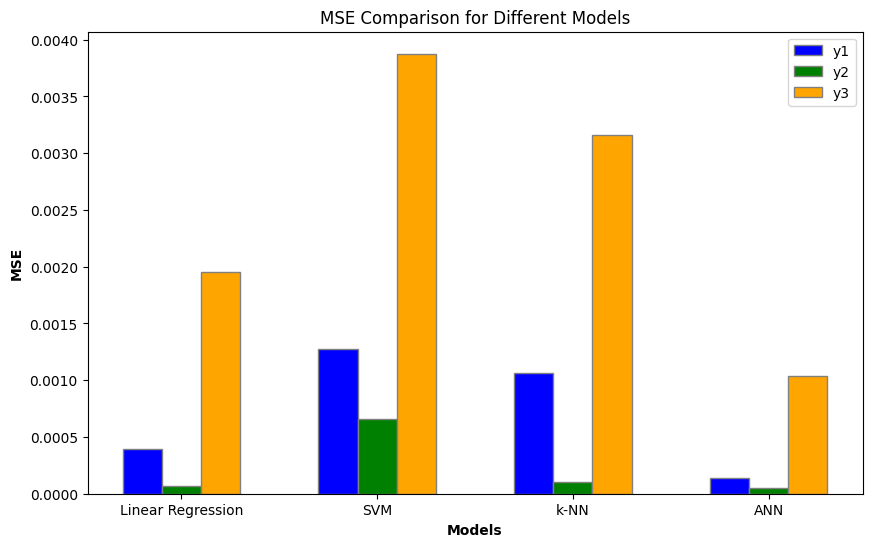

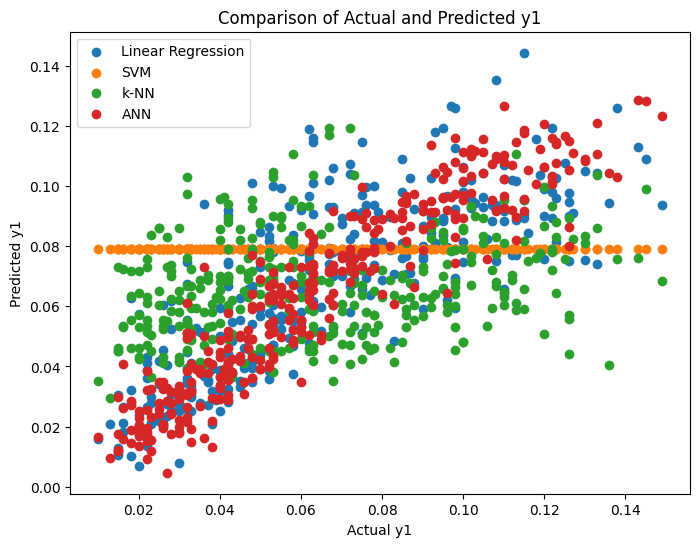

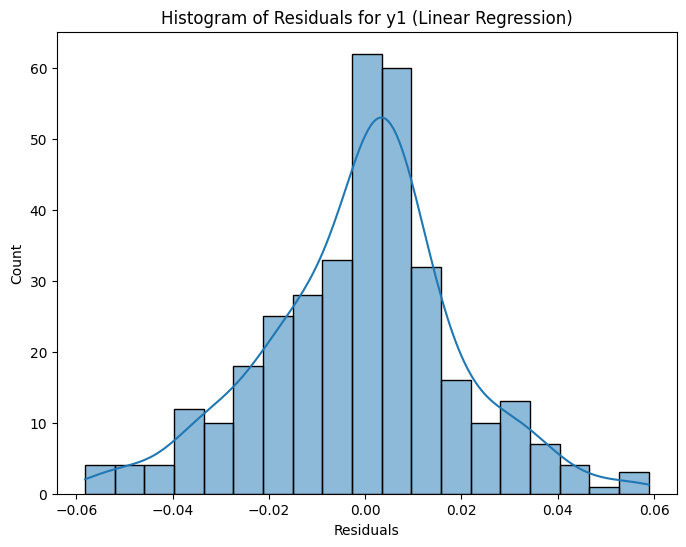

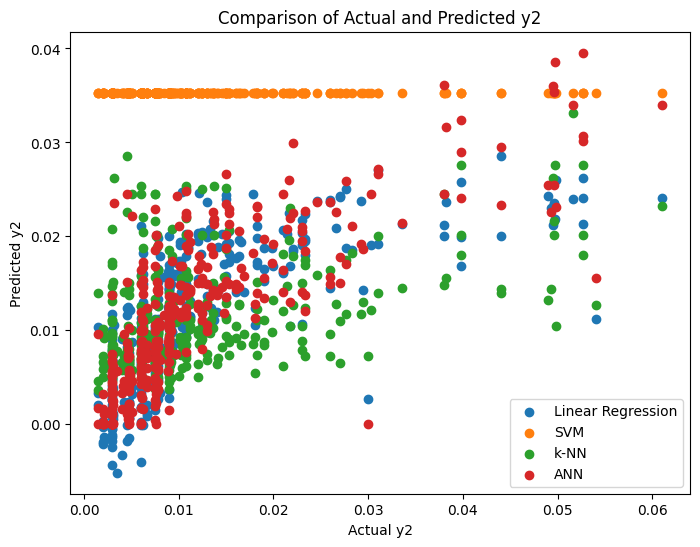

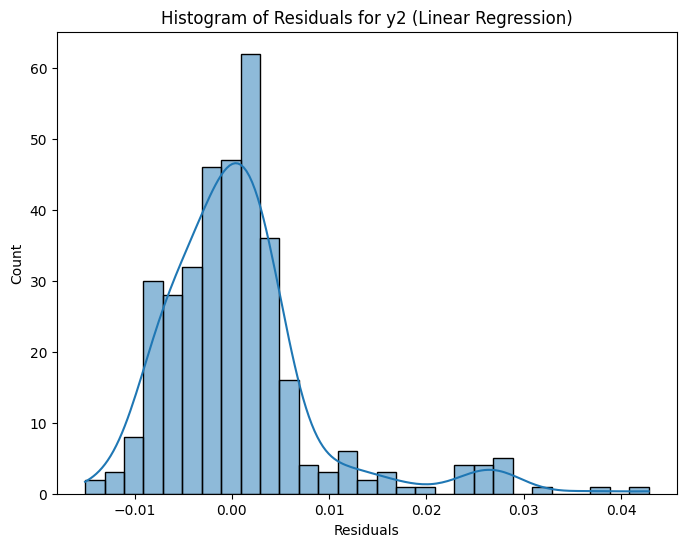

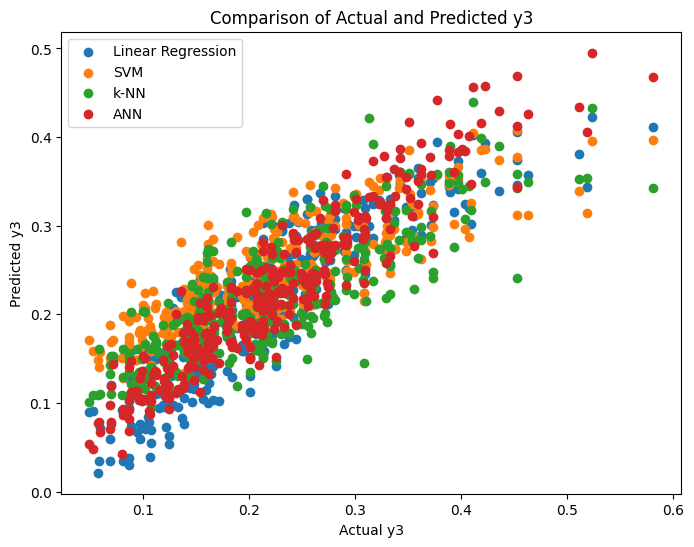

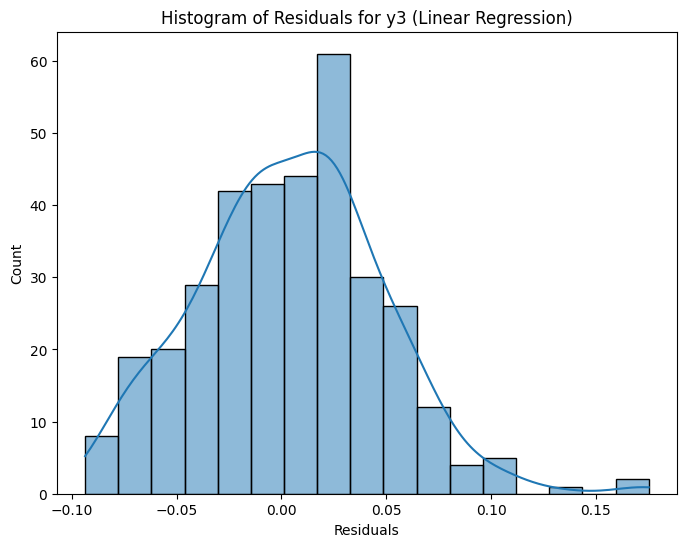

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate Linear Regression model for y1
linear_mse_y1 = mean_squared_error(y1_test, y1_pred_linear)
print("Linear Regression MSE for y1:", linear_mse_y1)

# Evaluate Linear Regression model for y2
linear_mse_y2 = mean_squared_error(y2_test, y2_pred_linear)
print("Linear Regression MSE for y2:", linear_mse_y2)

# Evaluate Linear Regression model for y3
linear_mse_y3 = mean_squared_error(y3_test, y3_pred_linear)
print("Linear Regression MSE for y3:", linear_mse_y3)

# Evaluate Support Vector Machine (SVM) model for y1
svm_mse_y1 = mean_squared_error(y1_test, y1_pred_svm)
print("SVM MSE for y1:", svm_mse_y1)

# Evaluate Support Vector Machine (SVM) model for y2
svm_mse_y2 = mean_squared_error(y2_test, y2_pred_svm)
print("SVM MSE for y2:", svm_mse_y2)

# Evaluate Support Vector Machine (SVM) model for y3
svm_mse_y3 = mean_squared_error(y3_test, y3_pred_svm)
print("SVM MSE for y3:", svm_mse_y3)

# Evaluate k-Nearest Neighbors (k-NN) model for y1
knn_mse_y1 = mean_squared_error(y1_test, y1_pred_knn)
print("k-NN MSE for y1:", knn_mse_y1)

# Evaluate k-Nearest Neighbors (k-NN) model for y2
knn_mse_y2 = mean_squared_error(y2_test, y2_pred_knn)
print("k-NN MSE for y2:", knn_mse_y2)

# Evaluate k-Nearest Neighbors (k-NN) model for y3
knn_mse_y3 = mean_squared_error(y3_test, y3_pred_knn)
print("k-NN MSE for y3:", knn_mse_y3)

# Evaluate Artificial Neural Network (ANN) model for y1
ann_mse_y1 = mean_squared_error(y1_test, y1_pred_ann)
print("ANN MSE for y1:", ann_mse_y1)

# Evaluate Artificial Neural Network (ANN) model for y2
ann_mse_y2 = mean_squared_error(y2_test, y2_pred_ann)
print("ANN MSE for y2:", ann_mse_y2)

# Evaluate Artificial Neural Network (ANN) model for y3
ann_mse_y3 = mean_squared_error(y3_test, y3_pred_ann)
print("ANN MSE for y3:", ann_mse_y3)

# Create a bar plot of MSE values for each model
models = ['Linear Regression', 'SVM', 'k-NN', 'ANN']
mse_values_y1 = [linear_mse_y1, svm_mse_y1, knn_mse_y1, ann_mse_y1]
mse_values_y2 = [linear_mse_y2, svm_mse_y2, knn_mse_y2, ann_mse_y2]
mse_values_y3 = [linear_mse_y3, svm_mse_y3, knn_mse_y3, ann_mse_y3]

# Set width of bar
bar_width = 0.2

# Set position of bar on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create grouped bar plot for MSE values for each model for y1, y2, and y3
plt.figure(figsize=(10, 6))
plt.bar(r1, mse_values_y1, color='b', width=bar_width, edgecolor='grey', label='y1')
plt.bar(r2, mse_values_y2, color='g', width=bar_width, edgecolor='grey', label='y2')
plt.bar(r3, mse_values_y3, color='orange', width=bar_width, edgecolor='grey', label='y3')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)

# Add ylabel
plt.ylabel('MSE', fontweight='bold')

# Add title
plt.title('MSE Comparison for Different Models')
plt.legend()
plt.show()


#plt.figure(figsize=(10, 6))
#plt.bar(models, mse_values_y1, label='y1')
#plt.bar(models, mse_values_y2, label='y2')
#plt.bar(models, mse_values_y3, label='y3')
#plt.xlabel('Models')
#plt.ylabel('MSE')
#plt.title('MSE Comparison for Different Models')
#plt.legend()
#plt.show()

# Create a scatter plot to compare predicted and actual values for y1
plt.figure(figsize=(8, 6))
plt.scatter(y1_test, y1_pred_linear, label='Linear Regression')
plt.scatter(y1_test, y1_pred_svm, label='SVM')
plt.scatter(y1_test, y1_pred_knn, label='k-NN')
plt.scatter(y1_test, y1_pred_ann, label='ANN')
plt.xlabel('Actual y1')
plt.ylabel('Predicted y1')
plt.title('Comparison of Actual and Predicted y1')
plt.legend()
plt.show()

# Create a histogram of residuals for y1
residuals_y1 = y1_test - y1_pred_linear
plt.figure(figsize=(8, 6))
sns.histplot(residuals_y1, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals for y1 (Linear Regression)')
plt.show()

# Create a scatter plot to compare predicted and actual values for y2
plt.figure(figsize=(8, 6))
plt.scatter(y2_test, y2_pred_linear, label='Linear Regression')
plt.scatter(y2_test, y2_pred_svm, label='SVM')
plt.scatter(y2_test, y2_pred_knn, label='k-NN')
plt.scatter(y2_test, y2_pred_ann, label='ANN')
plt.xlabel('Actual y2')
plt.ylabel('Predicted y2')
plt.title('Comparison of Actual and Predicted y2')
plt.legend()
plt.show()

# Create a histogram of residuals for y2
residuals_y2 = y2_test - y2_pred_linear
plt.figure(figsize=(8, 6))
sns.histplot(residuals_y2, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals for y2 (Linear Regression)')
plt.show()

# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y3_test, y3_pred_linear, label='Linear Regression')
plt.scatter(y3_test, y3_pred_svm, label='SVM')
plt.scatter(y3_test, y3_pred_knn, label='k-NN')
plt.scatter(y3_test, y3_pred_ann, label='ANN')
plt.xlabel('Actual y3')
plt.ylabel('Predicted y3')
plt.title('Comparison of Actual and Predicted y3')
plt.legend()
plt.show()

# Create a histogram of residuals for y3
residuals_y3 = y3_test - y3_pred_linear
plt.figure(figsize=(8, 6))
sns.histplot(residuals_y3, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals for y3 (Linear Regression)')
plt.show()



27/27 [==============================] - 0s 2ms/step


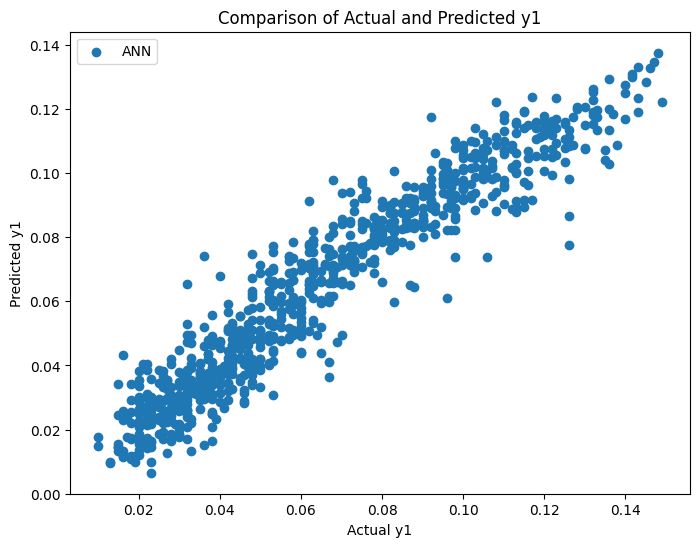

27/27 [==============================] - 0s 2ms/step


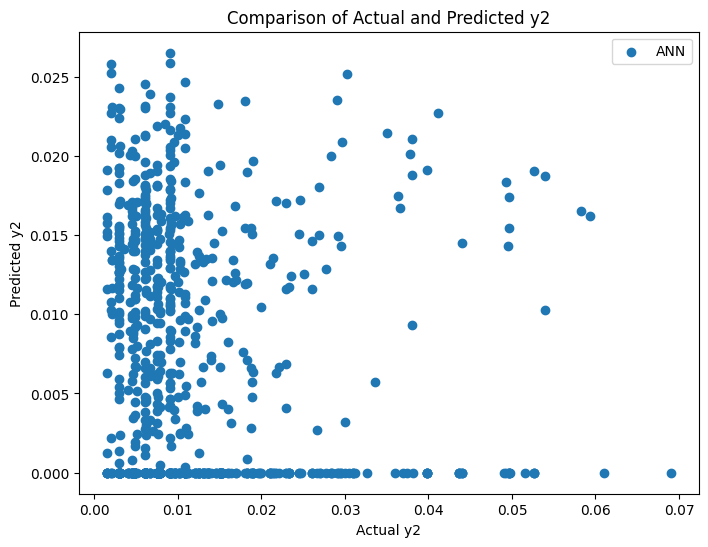

27/27 [==============================] - 0s 2ms/step


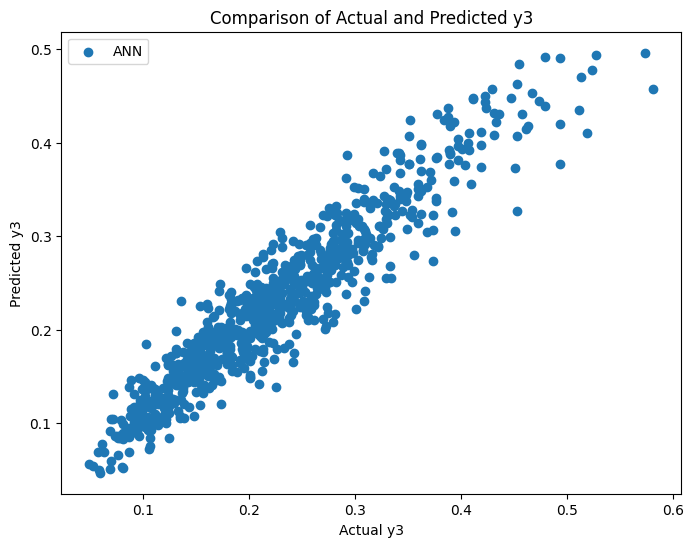

In [ ]:
y1_pred_ann_all = ann_y1.predict(X_encoded)
# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y1, y1_pred_ann_all, label='ANN')
plt.xlabel('Actual y1')
plt.ylabel('Predicted y1')
plt.title('Comparison of Actual and Predicted y1')
plt.legend()
plt.show()


y2_pred_ann_all = ann_y2.predict(X_encoded)
# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y2, y2_pred_ann_all, label='ANN')
plt.xlabel('Actual y2')
plt.ylabel('Predicted y2')
plt.title('Comparison of Actual and Predicted y2')
plt.legend()
plt.show()

y3_pred_ann_all = ann_y3.predict(X_encoded)
# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y3, y3_pred_ann_all, label='ANN')
plt.xlabel('Actual y3')
plt.ylabel('Predicted y3')
plt.title('Comparison of Actual and Predicted y3')
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import r2_score

r2_y1_ann_all = r2_score(y1, y1_pred_ann_all)
r2_y2_ann_all = r2_score(y2, y2_pred_ann_all)
r2_y3_ann_all = r2_score(y3, y3_pred_ann_all)
print('R_Square_y1 =', r2_y1_ann_all)
print('R_Square_y2 =', r2_y2_ann_all)
print('R_Square_y3 =', r2_y3_ann_all)

NameError: name 'y1_pred_ann_all' is not defined

In [9]:
# Calculate R-squared value for each model and output variable
r2_y1_linear = linear_reg_y1.score(X_test, y1_test)
r2_y2_linear = linear_reg_y2.score(X_test, y2_test)
r2_y3_linear = linear_reg_y3.score(X_test, y3_test)

r2_y1_svm = svm_y1.score(X_test, y1_test)
r2_y2_svm = svm_y2.score(X_test, y2_test)
r2_y3_svm = svm_y3.score(X_test, y3_test)

r2_y1_knn = knn_y1.score(X_test, y1_test)
r2_y2_knn = knn_y2.score(X_test, y2_test)
r2_y3_knn = knn_y3.score(X_test, y3_test)

r2_y1_ann = ann_y1.evaluate(X_test, y1_test)
r2_y1_ann = ann_y2.evaluate(X_test, y2_test)
r2_y3_ann = ann_y3.evaluate(X_test, y3_test)
# Predict using the trained ANN model
y1_pred_ann = ann_y1.predict(X_test)
y2_pred_ann = ann_y2.predict(X_test)
y3_pred_ann = ann_y3.predict(X_test)

# Calculate R-squared value for y1,y2 and y3
from sklearn.metrics import r2_score
r2_y1_ann = r2_score(y1_test, y1_pred_ann)
r2_y2_ann = r2_score(y2_test, y2_pred_ann)
r2_y3_ann = r2_score(y3_test, y3_pred_ann)


# Calculate residuals for each model and output variable
residuals_y1_linear = y1_test - y1_pred_linear
residuals_y2_linear = y2_test - y2_pred_linear
residuals_y3_linear = y3_test - y3_pred_linear

residuals_y1_svm = y1_test - y1_pred_svm
residuals_y2_svm = y2_test - y2_pred_svm
residuals_y3_svm = y3_test - y3_pred_svm

residuals_y1_knn = y1_test - y1_pred_knn
residuals_y2_knn = y2_test - y2_pred_knn
residuals_y3_knn = y3_test - y3_pred_knn


y1_test_1d = y1_test.ravel()
y1_pred_ann_1d = y1_pred_ann.ravel()
residuals_y1_ann = y1_test_1d - y1_pred_ann_1d

y2_test_1d = y2_test.ravel()
y2_pred_ann_1d = y2_pred_ann.ravel()
residuals_y2_ann = y2_test_1d - y2_pred_ann_1d

y3_test_1d = y3_test.ravel()
y3_pred_ann_1d = y3_pred_ann.ravel()
residuals_y3_ann = y3_test_1d - y3_pred_ann_1d

# Print the mean of residuals for y1
mean_residuals_y1_ann = np.mean(residuals_y1_ann)



# Store the evaluation metrics in a DataFrame
metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'SVM', 'k-NN', 'ANN'],
    'MSE y1': [linear_mse_y1, svm_mse_y1, knn_mse_y1, ann_mse_y1],
    'MSE y2': [linear_mse_y2, svm_mse_y2, knn_mse_y2, ann_mse_y2],
    'MSE y3': [linear_mse_y3, svm_mse_y3, knn_mse_y3, ann_mse_y3],
    'R^2 y1': [r2_y1_linear, r2_y1_svm, r2_y1_knn, r2_y1_ann],
    'R^2 y2': [r2_y2_linear, r2_y2_svm, r2_y2_knn, r2_y2_ann],
    'R^2 y3': [r2_y3_linear, r2_y3_svm, r2_y3_knn, r2_y3_ann],
    'Residuals y1': [np.mean(residuals_y1_linear), np.mean(residuals_y1_svm),
                     np.mean(residuals_y1_knn), np.mean(residuals_y1_ann)],
    'Residuals y2': [np.mean(residuals_y2_linear), np.mean(residuals_y2_svm),
                     np.mean(residuals_y2_knn), np.mean(residuals_y2_ann)],
    'Residuals y3': [np.mean(residuals_y3_linear), np.mean(residuals_y3_svm),
                     np.mean(residuals_y3_knn), np.mean(residuals_y3_ann)]
})

# Print the evaluation metrics
print("Evaluation Metrics:")
print(metrics)

#SEE RESULTS IN TABLE FORM

import numpy as np
import pandas as pd

# Calculate R-squared value for y1,y2 and y3
from sklearn.metrics import r2_score
r2_y1_ann = r2_score(y1_test, y1_pred_ann)
r2_y2_ann = r2_score(y2_test, y2_pred_ann)
r2_y3_ann = r2_score(y3_test, y3_pred_ann)

# Print the mean of residuals for y1
mean_residuals_y1_ann = np.mean(residuals_y1_ann)

# Create a DataFrame to store the evaluation metrics
metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'SVM', 'k-NN', 'ANN'],
    'MSE y1': [linear_mse_y1, svm_mse_y1, knn_mse_y1, ann_mse_y1],
    'MSE y2': [linear_mse_y2, svm_mse_y2, knn_mse_y2, ann_mse_y2],
    'MSE y3': [linear_mse_y3, svm_mse_y3, knn_mse_y3, ann_mse_y3],
    'R^2 y1': [r2_y1_linear, r2_y1_svm, r2_y1_knn, r2_y1_ann],
    'R^2 y2': [r2_y2_linear, r2_y2_svm, r2_y2_knn, r2_y2_ann],
    'R^2 y3': [r2_y3_linear, r2_y3_svm, r2_y3_knn, r2_y3_ann],
    'Mean Residuals y1': [np.mean(residuals_y1_linear), np.mean(residuals_y1_svm),
                          np.mean(residuals_y1_knn), mean_residuals_y1_ann],
    'Mean Residuals y2': [np.mean(residuals_y2_linear), np.mean(residuals_y2_svm),
                          np.mean(residuals_y2_knn), np.mean(residuals_y2_ann)],
    'Mean Residuals y3': [np.mean(residuals_y3_linear), np.mean(residuals_y3_svm),
                          np.mean(residuals_y3_knn), np.mean(residuals_y3_ann)]
})

# Print the evaluation metrics
print("Evaluation Metrics:")
display(metrics)



11/11 [==============================] - 0s 2ms/step
Evaluation Metrics:
               Model    MSE y1    MSE y2    MSE y3    R^2 y1    R^2 y2  \
0  Linear Regression  0.000397  0.000067  0.001956  0.627093  0.461243   
1                SVM  0.001276  0.000656  0.003876 -0.197048 -4.292638   
2               k-NN  0.001060  0.000101  0.003164  0.004973  0.180670   
3                ANN  0.000139  0.000051  0.001040  0.869499  0.586357   

     R^2 y3  Residuals y1  Residuals y2  Residuals y3  
0  0.784934     -0.000789      0.000741      0.004124  
1  0.573882     -0.014491     -0.023058     -0.025875  
2  0.652176     -0.002021      0.001005     -0.000271  
3  0.885661      0.000800      0.000315     -0.002931  
Evaluation Metrics:


Model    MSE y1    MSE y2    MSE y3    R^2 y1    R^2 y2  \
0  Linear Regression  0.000397  0.000067  0.001956  0.627093  0.461243   
1                SVM  0.001276  0.000656  0.003876 -0.197048 -4.292638   
2               k-NN  0.001060  0.000101  0.003164  0.004973  0.180670   
3                ANN  0.000139  0.000051  0.001040  0.869499  0.586357   

     R^2 y3  Mean Residuals y1  Mean Residuals y2  Mean Residuals y3  
0  0.784934          -0.000789           0.000741           0.004124  
1  0.573882          -0.014491          -0.023058          -0.025875  
2  0.652176          -0.002021           0.001005          -0.000271  
3  0.885661           0.000800           0.000315          -0.002931

**FIND IMPORTANCE OF INDEPENDENT FACTORS**

In [10]:
# Feature importances for y1
y1_feature_importances = np.abs(linear_reg_y1.coef_)
y1_feature_names = X_encoded.columns
y1_feature_importance_df = pd.DataFrame({'Feature': y1_feature_names, 'Importance': y1_feature_importances})
y1_feature_importance_df = y1_feature_importance_df.sort_values(by='Importance', ascending=False)

# Feature importances for y2
y2_feature_importances = np.abs(linear_reg_y2.coef_)
y2_feature_names = X_encoded.columns
y2_feature_importance_df = pd.DataFrame({'Feature': y2_feature_names, 'Importance': y2_feature_importances})
y2_feature_importance_df = y2_feature_importance_df.sort_values(by='Importance', ascending=False)

# Feature importances for y3
y3_feature_importances = np.abs(linear_reg_y3.coef_)
y3_feature_names = X_encoded.columns
y3_feature_importance_df = pd.DataFrame({'Feature': y3_feature_names, 'Importance': y3_feature_importances})
y3_feature_importance_df = y3_feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances for y1, y2, and y3
print("Feature Importances for y1:")
print(y1_feature_importance_df)
print("\nFeature Importances for y2:")
print(y2_feature_importance_df)
print("\nFeature Importances for y3:")
print(y3_feature_importance_df)


Feature Importances for y1:
                      Feature  Importance
11    Compressional Force(kN)    1.754829
10             Punch Size(mm)    1.335844
9                       A_MCC    0.355142
7            Binder Amount(%)    0.176444
12          Tablet Weight(mg)    0.081667
8                         A_M    0.044919
6      Disintegrant Amount(%)    0.018302
0           Binder Type_PS630    0.011707
5     Disintegration Type_SSG    0.010753
3      Disintegration Type_CP    0.010099
1             Binder Type_PVP    0.008576
2             Binder Type_SDL    0.001620
4   Disintegration Type_S1500    0.000345

Feature Importances for y2:
                      Feature  Importance
10             Punch Size(mm)    0.425536
11    Compressional Force(kN)    0.410421
7            Binder Amount(%)    0.340294
8                         A_M    0.267999
6      Disintegrant Amount(%)    0.251075
9                       A_MCC    0.243861
5     Disintegration Type_SSG    0.003485
3      Disintegrati

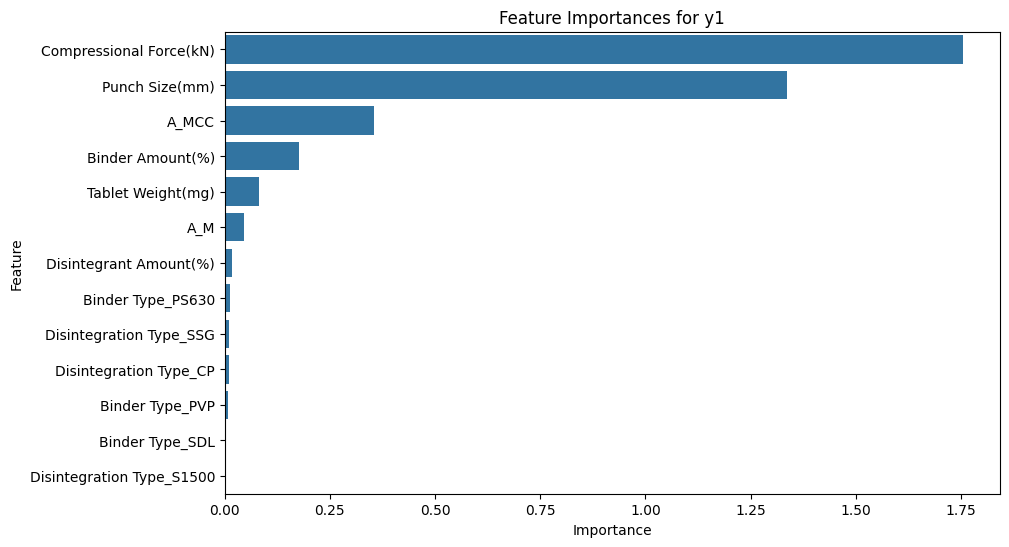

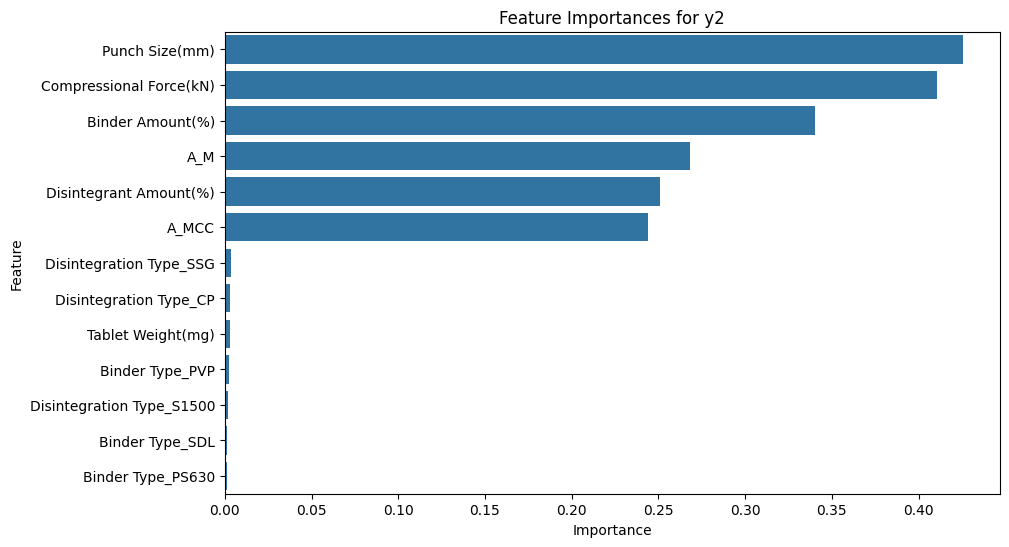

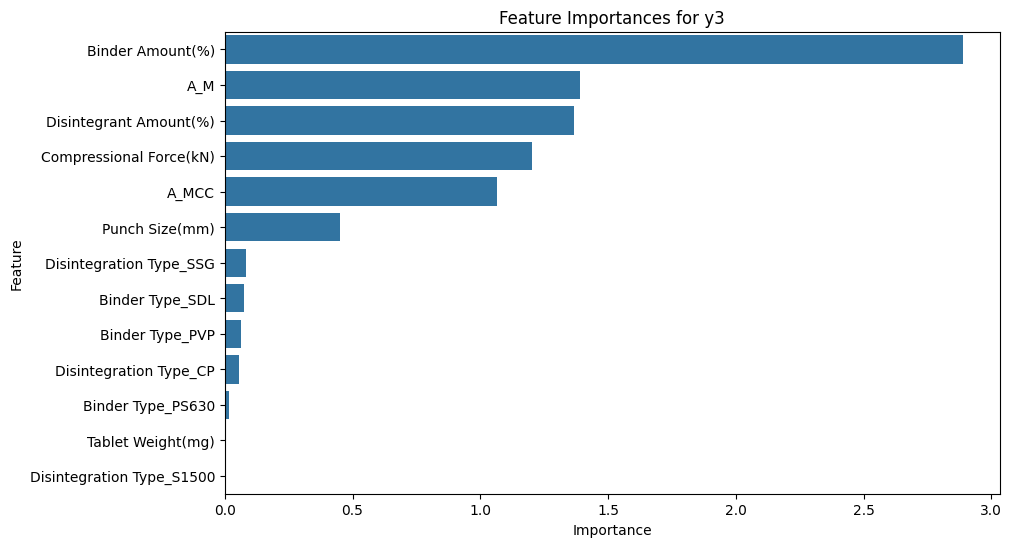

In [11]:
# Import necessary libraries for visualization
import seaborn as sns

# Set the figure size for better visibility
plt.figure(figsize=(10, 6))

# Plot the feature importances for y1
sns.barplot(x='Importance', y='Feature', data=y1_feature_importance_df)
plt.title('Feature Importances for y1')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Set the figure size for better visibility
plt.figure(figsize=(10, 6))

# Plot the feature importances for y2
sns.barplot(x='Importance', y='Feature', data=y2_feature_importance_df)
plt.title('Feature Importances for y2')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Set the figure size for better visibility
plt.figure(figsize=(10, 6))

# Plot the feature importances for y3
sns.barplot(x='Importance', y='Feature', data=y3_feature_importance_df)
plt.title('Feature Importances for y3')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Feature Importances for y1:


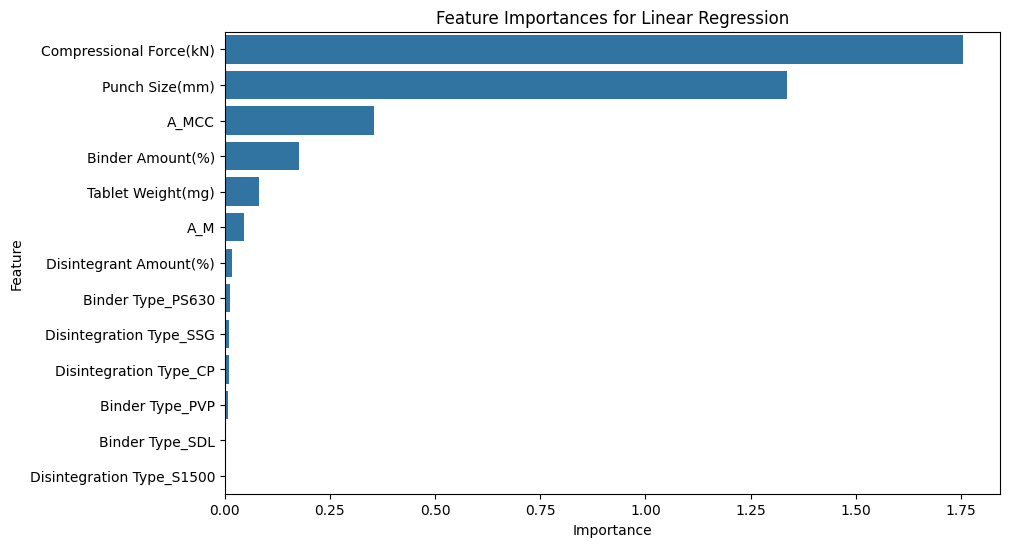

Feature importances are not available for Support Vector Machine.
Feature importances are not available for k-Nearest Neighbors.
Feature importances are not available for Artificial Neural Network.
Feature Importances for y2:


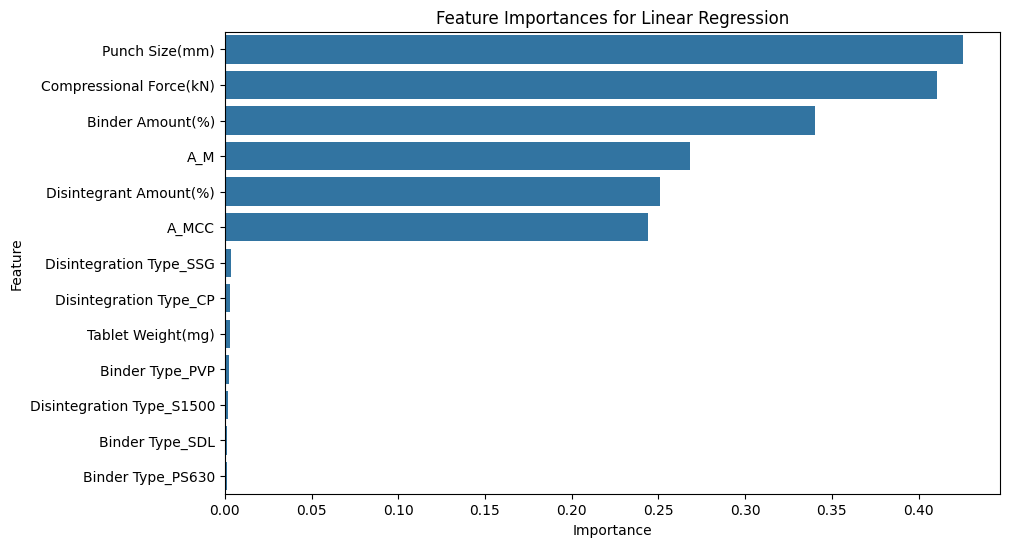

Feature importances are not available for Support Vector Machine.
Feature importances are not available for k-Nearest Neighbors.
Feature importances are not available for Artificial Neural Network.
Feature Importances for y3:


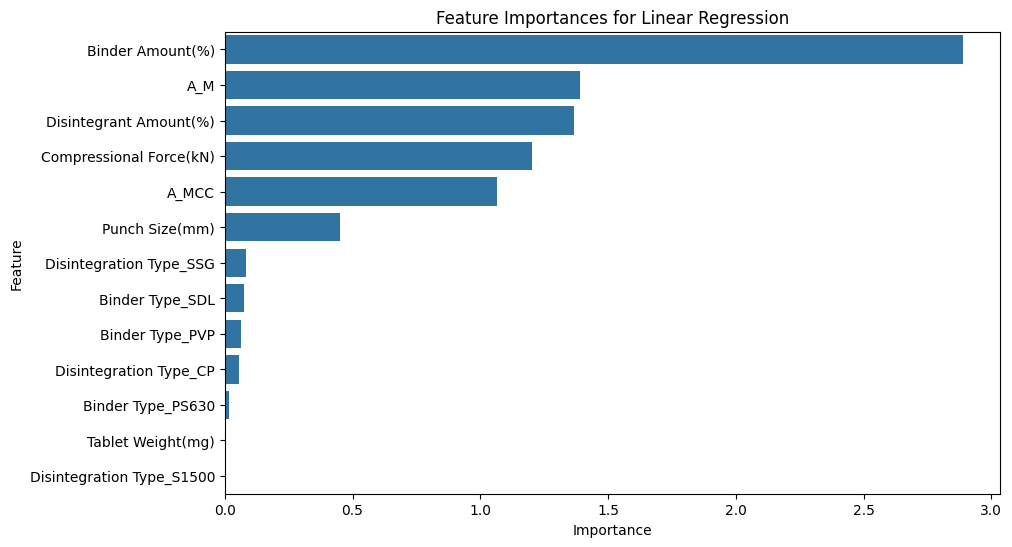

Feature importances are not available for Support Vector Machine.
Feature importances are not available for k-Nearest Neighbors.
Feature importances are not available for Artificial Neural Network.


In [12]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# ... (previous code to load and preprocess the data)

# Function to calculate and visualize feature importances
def calculate_and_visualize_feature_importances(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate feature importances for Linear Regression model
    if isinstance(model, LinearRegression):
        feature_importances = np.abs(model.coef_)
    # Calculate feature importances for SVM, k-NN, and ANN models
    else:
        feature_importances = None

    if feature_importances is not None:
        feature_names = X_train.columns
        feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

        # Visualization of feature importances
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
        plt.title(f'Feature Importances for {model_name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()
    else:
        print(f"Feature importances are not available for {model_name}.")

# Models for y1, y2, and y3
models_y1 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()
]

models_y2 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()
]

models_y3 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()
]

model_names = ['Linear Regression', 'Support Vector Machine', 'k-Nearest Neighbors', 'Artificial Neural Network']

# Loop through all models and visualize feature importances for y1
print("Feature Importances for y1:")
for model, model_name in zip(models_y1, model_names):
    calculate_and_visualize_feature_importances(model, model_name, X_train, X_test, y1_train, y1_test)

# Loop through all models and visualize feature importances for y2
print("Feature Importances for y2:")
for model, model_name in zip(models_y2, model_names):
    calculate_and_visualize_feature_importances(model, model_name, X_train, X_test, y2_train, y2_test)

# Loop through all models and visualize feature importances for y3
print("Feature Importances for y3:")
for model, model_name in zip(models_y3, model_names):
    calculate_and_visualize_feature_importances(model, model_name, X_train, X_test, y3_train, y3_test)


In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import shap

# ... (previous code to load and preprocess the data)

# Function to calculate and visualize feature importances
def calculate_and_visualize_feature_importances(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate feature importances for Linear Regression model
    if isinstance(model, LinearRegression):
        feature_importances = np.abs(model.coef_)
        feature_names = X_train.columns
    # Calculate feature importances for SVM and k-NN using permutation feature importance
    elif isinstance(model, (SVR, KNeighborsRegressor)):
        feature_importances = permutation_feature_importance(model, X_test, y_test, mean_squared_error)
        feature_names = X_train.columns
    # Calculate feature importances for ANN using SHAP values
    else:
        explainer = shap.DeepExplainer(model, X_train)
        shap_values = explainer.shap_values(X_test)
        feature_importances = np.abs(shap_values).mean(axis=0)
        feature_names = X_train.columns

    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Visualization of feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title(f'Feature Importances for {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# Function to calculate permutation feature importance
def permutation_feature_importance(model, X, y, metric):
    baseline = metric(y, model.predict(X))
    imp = []
    for col in X.columns:
        save = X[col].copy()
        X[col] = np.random.permutation(X[col])
        m = metric(y, model.predict(X))
        X[col] = save
        imp.append(baseline - m)
    return np.array(imp)

# Splitting the dataset into features (X) and targets (y)
X = df.iloc[:, 0:9]  # Adjust the column indices as per your dataset
X1 = X.iloc[:, 0:2]
X2 = X.iloc[:, 2:8].apply(pd.to_numeric, errors='coerce') / 100
X3 = X.iloc[:,8:9].apply(pd.to_numeric, errors='coerce') / 1000

y1 = df.iloc[:, -3].apply(pd.to_numeric, errors='coerce') / 100  # Output column 1 = Hardness(kg/cm2)
y2 = df.iloc[:, -2].apply(pd.to_numeric, errors='coerce') / 100  # Output column 2 = % Friability
y3 = df.iloc[:, -1].apply(pd.to_numeric, errors='coerce') / 1000  # Output column 3 = Disin. Time

# Perform one-hot encoding on X1
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
X1_encoded = onehot_encoder.fit_transform(X1)

# Create a DataFrame with the encoded columns
X1_encoded_df = pd.DataFrame(X1_encoded, columns=onehot_encoder.get_feature_names_out(X1.columns))

# Concatenate the encoded columns with the remaining columns in X
X_encoded = pd.concat([X1_encoded_df, X2,X3], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test, y3_train, y3_test = train_test_split(X_encoded, y1, y2, y3, test_size=0.4, random_state=42)

# Models for y1, y2, and y3
models_y1 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()
]

models_y2 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()
]

models_y3 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()
]

model_names = ['Linear Regression', 'Support Vector Machine', 'k-Nearest Neighbors', 'Artificial Neural Network']

# Loop through all models and visualize feature importances


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


36/36 [==============================] - 0s 4ms/step


Permutation explainer:   2%|▏         | 6/346 [00:00<?, ?it/s]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:   2%|▏         | 8/346 [00:13<04:50,  1.16it/s]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:   3%|▎         | 9/346 [00:14<05:19,  1.05it/s]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:   3%|▎         | 10/346 [00:15<05:58,  1.07s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   3%|▎         | 11/346 [00:17<06:59,  1.25s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:   3%|▎         | 12/346 [00:18<07:10,  1.29s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:   4%|▍         | 13/346 [00:19<07:27,  1.34s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:   4%|▍         | 14/346 [00:21<07:52,  1.42s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:   4%|▍         | 15/346 [00:23<08:31,  1.54s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:   5%|▍         | 16/346 [00:25<08:56,  1.62s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:   5%|▍         | 17/346 [00:26<08:00,  1.46s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   5%|▌         | 18/346 [00:27<07:20,  1.34s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:   5%|▌         | 19/346 [00:28<07:04,  1.30s/it]

34/34 [==============================] - 0s 3ms/step


Permutation explainer:   6%|▌         | 20/346 [00:29<06:37,  1.22s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:   6%|▌         | 21/346 [00:30<06:38,  1.23s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   6%|▋         | 22/346 [00:32<06:53,  1.28s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:   7%|▋         | 23/346 [00:33<07:03,  1.31s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:   7%|▋         | 24/346 [00:34<06:54,  1.29s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:   7%|▋         | 25/346 [00:36<07:20,  1.37s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:   8%|▊         | 26/346 [00:38<07:57,  1.49s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:   8%|▊         | 27/346 [00:39<07:49,  1.47s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:   8%|▊         | 28/346 [00:40<07:10,  1.35s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:   8%|▊         | 29/346 [00:41<06:54,  1.31s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   9%|▊         | 30/346 [00:43<07:03,  1.34s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:   9%|▉         | 31/346 [00:44<07:08,  1.36s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   9%|▉         | 32/346 [00:46<07:28,  1.43s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  10%|▉         | 33/346 [00:47<07:22,  1.42s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  10%|▉         | 34/346 [00:49<07:57,  1.53s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█         | 35/346 [00:50<07:59,  1.54s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█         | 36/346 [00:52<07:54,  1.53s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█         | 37/346 [00:53<07:26,  1.44s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█         | 38/346 [00:55<07:19,  1.43s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█▏        | 39/346 [00:56<07:15,  1.42s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█▏        | 40/346 [00:57<07:13,  1.42s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  12%|█▏        | 41/346 [00:59<06:54,  1.36s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█▏        | 42/346 [01:00<06:54,  1.36s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  12%|█▏        | 43/346 [01:02<07:52,  1.56s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  13%|█▎        | 44/346 [01:04<08:00,  1.59s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  13%|█▎        | 45/346 [01:05<07:08,  1.42s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  13%|█▎        | 46/346 [01:06<06:34,  1.32s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  14%|█▎        | 47/346 [01:07<06:40,  1.34s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  14%|█▍        | 48/346 [01:09<06:43,  1.35s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  14%|█▍        | 49/346 [01:10<06:48,  1.38s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  14%|█▍        | 50/346 [01:11<06:35,  1.34s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  15%|█▍        | 51/346 [01:13<06:37,  1.35s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  15%|█▌        | 52/346 [01:15<07:30,  1.53s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  15%|█▌        | 53/346 [01:16<07:47,  1.60s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  16%|█▌        | 54/346 [01:18<07:39,  1.58s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  16%|█▌        | 55/346 [01:19<07:07,  1.47s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  16%|█▌        | 56/346 [01:20<06:54,  1.43s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  16%|█▋        | 57/346 [01:22<06:49,  1.42s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  17%|█▋        | 58/346 [01:23<06:45,  1.41s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  17%|█▋        | 59/346 [01:25<06:41,  1.40s/it]

34/34 [==============================] - 0s 4ms/step


Permutation explainer:  17%|█▋        | 60/346 [01:26<06:54,  1.45s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  18%|█▊        | 61/346 [01:28<07:13,  1.52s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  18%|█▊        | 62/346 [01:29<06:57,  1.47s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  18%|█▊        | 63/346 [01:31<07:04,  1.50s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  18%|█▊        | 64/346 [01:32<06:42,  1.43s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█▉        | 65/346 [01:33<06:41,  1.43s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█▉        | 66/346 [01:35<06:37,  1.42s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  19%|█▉        | 67/346 [01:36<06:33,  1.41s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  20%|█▉        | 68/346 [01:38<06:27,  1.39s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  20%|█▉        | 69/346 [01:39<06:51,  1.49s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  20%|██        | 70/346 [01:41<07:18,  1.59s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  21%|██        | 71/346 [01:42<06:46,  1.48s/it]

37/37 [==============================] - 0s 6ms/step


Permutation explainer:  21%|██        | 72/346 [01:44<07:16,  1.59s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  21%|██        | 73/346 [01:46<07:28,  1.64s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  21%|██▏       | 74/346 [01:48<07:23,  1.63s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██▏       | 75/346 [01:49<07:28,  1.65s/it]

35/35 [==============================] - 0s 4ms/step


Permutation explainer:  22%|██▏       | 76/346 [01:51<07:32,  1.68s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  22%|██▏       | 77/346 [01:53<07:34,  1.69s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  23%|██▎       | 78/346 [01:54<07:17,  1.63s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  23%|██▎       | 79/346 [01:55<06:44,  1.52s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  23%|██▎       | 80/346 [01:57<06:20,  1.43s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  23%|██▎       | 81/346 [01:58<06:20,  1.44s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  24%|██▎       | 82/346 [02:00<06:17,  1.43s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  24%|██▍       | 83/346 [02:01<06:11,  1.41s/it]

36/36 [==============================] - 0s 5ms/step


Permutation explainer:  24%|██▍       | 84/346 [02:05<09:03,  2.07s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  25%|██▍       | 85/346 [02:07<08:56,  2.05s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  25%|██▍       | 86/346 [02:08<08:07,  1.87s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  25%|██▌       | 87/346 [02:10<07:42,  1.78s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  25%|██▌       | 88/346 [02:11<06:58,  1.62s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  26%|██▌       | 89/346 [02:12<06:40,  1.56s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  26%|██▌       | 90/346 [02:13<06:12,  1.45s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  26%|██▋       | 91/346 [02:15<06:10,  1.45s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  27%|██▋       | 92/346 [02:16<06:03,  1.43s/it]

35/35 [==============================] - 0s 4ms/step


Permutation explainer:  27%|██▋       | 93/346 [02:18<06:28,  1.53s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  27%|██▋       | 94/346 [02:20<06:31,  1.55s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  27%|██▋       | 95/346 [02:21<06:20,  1.52s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  28%|██▊       | 96/346 [02:22<06:11,  1.49s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  28%|██▊       | 97/346 [02:24<06:03,  1.46s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  28%|██▊       | 98/346 [02:25<05:59,  1.45s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  29%|██▊       | 99/346 [02:27<05:56,  1.44s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██▉       | 100/346 [02:28<06:05,  1.49s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  29%|██▉       | 101/346 [02:30<05:55,  1.45s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  29%|██▉       | 102/346 [02:32<06:31,  1.60s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██▉       | 103/346 [02:33<06:20,  1.57s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  30%|███       | 104/346 [02:35<06:08,  1.52s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  30%|███       | 105/346 [02:36<05:41,  1.42s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███       | 106/346 [02:37<05:51,  1.47s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  31%|███       | 107/346 [02:39<05:56,  1.49s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███       | 108/346 [02:40<05:40,  1.43s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███▏      | 109/346 [02:42<05:40,  1.44s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███▏      | 110/346 [02:43<05:55,  1.51s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███▏      | 111/346 [02:45<06:11,  1.58s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███▏      | 112/346 [02:46<05:58,  1.53s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  33%|███▎      | 113/346 [02:48<05:37,  1.45s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  33%|███▎      | 114/346 [02:49<05:22,  1.39s/it]

34/34 [==============================] - 0s 3ms/step


Permutation explainer:  33%|███▎      | 115/346 [02:50<05:20,  1.39s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  34%|███▎      | 116/346 [02:52<05:41,  1.48s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  34%|███▍      | 117/346 [02:53<05:24,  1.42s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  34%|███▍      | 118/346 [02:55<05:22,  1.42s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  34%|███▍      | 119/346 [02:57<05:47,  1.53s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  35%|███▍      | 120/346 [02:58<05:50,  1.55s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  35%|███▍      | 121/346 [03:00<05:39,  1.51s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  35%|███▌      | 122/346 [03:01<05:31,  1.48s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  36%|███▌      | 123/346 [03:02<05:26,  1.46s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  36%|███▌      | 124/346 [03:04<05:14,  1.42s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  36%|███▌      | 125/346 [03:05<05:30,  1.49s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  36%|███▋      | 126/346 [03:07<05:21,  1.46s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  37%|███▋      | 127/346 [03:08<05:07,  1.41s/it]

34/34 [==============================] - 0s 4ms/step


Permutation explainer:  37%|███▋      | 128/346 [03:10<05:44,  1.58s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  37%|███▋      | 129/346 [03:12<05:44,  1.59s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  38%|███▊      | 130/346 [03:13<05:41,  1.58s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  38%|███▊      | 131/346 [03:14<05:15,  1.47s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  38%|███▊      | 132/346 [03:16<04:54,  1.38s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  38%|███▊      | 133/346 [03:17<04:45,  1.34s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  39%|███▊      | 134/346 [03:18<04:46,  1.35s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  39%|███▉      | 135/346 [03:20<04:50,  1.37s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  39%|███▉      | 136/346 [03:21<05:01,  1.44s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  40%|███▉      | 137/346 [03:23<05:37,  1.61s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  40%|███▉      | 138/346 [03:24<05:10,  1.50s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  40%|████      | 139/346 [03:26<04:46,  1.38s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  40%|████      | 140/346 [03:27<04:45,  1.39s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  41%|████      | 141/346 [03:28<04:35,  1.34s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  41%|████      | 142/346 [03:30<04:39,  1.37s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  41%|████▏     | 143/346 [03:31<04:48,  1.42s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  42%|████▏     | 144/346 [03:33<05:02,  1.50s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  42%|████▏     | 145/346 [03:35<05:24,  1.62s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  42%|████▏     | 146/346 [03:36<05:25,  1.63s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  42%|████▏     | 147/346 [03:38<05:02,  1.52s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  43%|████▎     | 148/346 [03:39<04:35,  1.39s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  43%|████▎     | 149/346 [03:40<04:26,  1.35s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  43%|████▎     | 150/346 [03:41<04:21,  1.34s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  44%|████▎     | 151/346 [03:43<04:35,  1.41s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  44%|████▍     | 152/346 [03:44<04:27,  1.38s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  44%|████▍     | 153/346 [03:46<04:28,  1.39s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  45%|████▍     | 154/346 [03:48<05:04,  1.58s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  45%|████▍     | 155/346 [03:49<05:16,  1.66s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  45%|████▌     | 156/346 [03:51<05:00,  1.58s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  45%|████▌     | 157/346 [03:52<04:41,  1.49s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  46%|████▌     | 158/346 [03:54<04:34,  1.46s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  46%|████▌     | 159/346 [03:55<04:21,  1.40s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  46%|████▌     | 160/346 [03:56<04:18,  1.39s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  47%|████▋     | 161/346 [03:58<04:17,  1.39s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  47%|████▋     | 162/346 [03:59<04:07,  1.35s/it]

35/35 [==============================] - 0s 4ms/step


Permutation explainer:  47%|████▋     | 163/346 [04:01<04:35,  1.51s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  47%|████▋     | 164/346 [04:02<04:42,  1.55s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  48%|████▊     | 165/346 [04:04<04:23,  1.46s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  48%|████▊     | 166/346 [04:05<04:02,  1.35s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  48%|████▊     | 167/346 [04:06<04:12,  1.41s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  49%|████▊     | 168/346 [04:08<04:09,  1.40s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  49%|████▉     | 169/346 [04:09<03:48,  1.29s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  49%|████▉     | 170/346 [04:10<03:54,  1.33s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  49%|████▉     | 171/346 [04:12<04:16,  1.47s/it]

35/35 [==============================] - 0s 4ms/step


Permutation explainer:  50%|████▉     | 172/346 [04:14<04:30,  1.55s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  50%|█████     | 173/346 [04:15<04:24,  1.53s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  50%|█████     | 174/346 [04:16<04:15,  1.49s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  51%|█████     | 175/346 [04:18<04:02,  1.42s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  51%|█████     | 176/346 [04:19<04:08,  1.46s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  51%|█████     | 177/346 [04:21<03:58,  1.41s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  51%|█████▏    | 178/346 [04:22<03:57,  1.41s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  52%|█████▏    | 179/346 [04:24<04:04,  1.46s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  52%|█████▏    | 180/346 [04:25<04:14,  1.53s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  52%|█████▏    | 181/346 [04:27<04:28,  1.63s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  53%|█████▎    | 182/346 [04:29<04:17,  1.57s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  53%|█████▎    | 183/346 [04:30<04:15,  1.57s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  53%|█████▎    | 184/346 [04:32<04:14,  1.57s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  53%|█████▎    | 185/346 [04:33<03:47,  1.41s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  54%|█████▍    | 186/346 [04:34<03:48,  1.43s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  54%|█████▍    | 187/346 [04:36<03:52,  1.46s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  54%|█████▍    | 188/346 [04:37<03:59,  1.51s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  55%|█████▍    | 189/346 [04:39<04:06,  1.57s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  55%|█████▍    | 190/346 [04:41<04:04,  1.57s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  55%|█████▌    | 191/346 [04:42<03:48,  1.47s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  55%|█████▌    | 192/346 [04:43<03:43,  1.45s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  56%|█████▌    | 193/346 [04:45<03:41,  1.45s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  56%|█████▌    | 194/346 [04:46<03:46,  1.49s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  56%|█████▋    | 195/346 [04:48<03:40,  1.46s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  57%|█████▋    | 196/346 [04:49<03:44,  1.50s/it]

35/35 [==============================] - 0s 4ms/step


Permutation explainer:  57%|█████▋    | 197/346 [04:51<03:55,  1.58s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  57%|█████▋    | 198/346 [04:53<04:10,  1.69s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  58%|█████▊    | 199/346 [04:54<03:45,  1.53s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  58%|█████▊    | 200/346 [04:56<03:38,  1.50s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  58%|█████▊    | 201/346 [04:57<03:34,  1.48s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  58%|█████▊    | 202/346 [04:58<03:29,  1.46s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  59%|█████▊    | 203/346 [05:00<03:27,  1.45s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  59%|█████▉    | 204/346 [05:01<03:24,  1.44s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  59%|█████▉    | 205/346 [05:03<03:22,  1.44s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  60%|█████▉    | 206/346 [05:05<03:37,  1.55s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  60%|█████▉    | 207/346 [05:06<03:38,  1.58s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  60%|██████    | 208/346 [05:08<03:29,  1.52s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  60%|██████    | 209/346 [05:09<03:29,  1.53s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  61%|██████    | 210/346 [05:10<03:21,  1.48s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  61%|██████    | 211/346 [05:12<03:12,  1.43s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  61%|██████▏   | 212/346 [05:13<03:11,  1.43s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  62%|██████▏   | 213/346 [05:15<03:07,  1.41s/it]

40/40 [==============================] - 0s 5ms/step


Permutation explainer:  62%|██████▏   | 214/346 [05:16<03:21,  1.52s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  62%|██████▏   | 215/346 [05:18<03:40,  1.68s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  62%|██████▏   | 216/346 [05:20<03:25,  1.58s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  63%|██████▎   | 217/346 [05:21<03:18,  1.54s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  63%|██████▎   | 218/346 [05:23<03:19,  1.56s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  63%|██████▎   | 219/346 [05:24<03:17,  1.55s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  64%|██████▎   | 220/346 [05:26<03:11,  1.52s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  64%|██████▍   | 221/346 [05:27<03:11,  1.54s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  64%|██████▍   | 222/346 [05:28<02:53,  1.40s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  64%|██████▍   | 223/346 [05:30<03:02,  1.49s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  65%|██████▍   | 224/346 [05:32<03:08,  1.55s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  65%|██████▌   | 225/346 [05:33<02:56,  1.46s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  65%|██████▌   | 226/346 [05:35<02:59,  1.50s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  66%|██████▌   | 227/346 [05:36<02:45,  1.39s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  66%|██████▌   | 228/346 [05:37<02:50,  1.45s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  66%|██████▌   | 229/346 [05:39<02:42,  1.39s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  66%|██████▋   | 230/346 [05:40<02:47,  1.44s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  67%|██████▋   | 231/346 [05:42<02:51,  1.49s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  67%|██████▋   | 232/346 [05:44<03:00,  1.58s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  67%|██████▋   | 233/346 [05:45<03:00,  1.60s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  68%|██████▊   | 234/346 [05:47<03:02,  1.63s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  68%|██████▊   | 235/346 [05:48<02:48,  1.52s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  68%|██████▊   | 236/346 [05:50<02:44,  1.49s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  68%|██████▊   | 237/346 [05:51<02:41,  1.48s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  69%|██████▉   | 238/346 [05:53<02:43,  1.51s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  69%|██████▉   | 239/346 [05:54<02:36,  1.46s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  69%|██████▉   | 240/346 [05:56<02:48,  1.59s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  70%|██████▉   | 241/346 [05:58<02:49,  1.61s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  70%|██████▉   | 242/346 [05:59<02:43,  1.57s/it]

33/33 [==============================] - 0s 3ms/step


Permutation explainer:  70%|███████   | 243/346 [06:00<02:30,  1.46s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  71%|███████   | 244/346 [06:01<02:23,  1.40s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  71%|███████   | 245/346 [06:03<02:22,  1.41s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  71%|███████   | 246/346 [06:04<02:20,  1.41s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  71%|███████▏  | 247/346 [06:06<02:23,  1.45s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  72%|███████▏  | 248/346 [06:08<02:32,  1.56s/it]

35/35 [==============================] - 0s 4ms/step


Permutation explainer:  72%|███████▏  | 249/346 [06:09<02:37,  1.63s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  72%|███████▏  | 250/346 [06:11<02:37,  1.64s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  73%|███████▎  | 251/346 [06:13<02:29,  1.58s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  73%|███████▎  | 252/346 [06:14<02:24,  1.53s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  73%|███████▎  | 253/346 [06:15<02:19,  1.50s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  73%|███████▎  | 254/346 [06:17<02:17,  1.50s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  74%|███████▎  | 255/346 [06:18<02:14,  1.48s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  74%|███████▍  | 256/346 [06:20<02:11,  1.46s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  74%|███████▍  | 257/346 [06:22<02:23,  1.61s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  75%|███████▍  | 258/346 [06:23<02:21,  1.61s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  75%|███████▍  | 259/346 [06:25<02:14,  1.55s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  75%|███████▌  | 260/346 [06:26<02:16,  1.59s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  75%|███████▌  | 261/346 [06:28<02:11,  1.54s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  76%|███████▌  | 262/346 [06:30<02:13,  1.59s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  76%|███████▌  | 263/346 [06:31<02:11,  1.58s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  76%|███████▋  | 264/346 [06:32<01:59,  1.46s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  77%|███████▋  | 265/346 [06:34<02:01,  1.50s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  77%|███████▋  | 266/346 [06:36<02:13,  1.67s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  77%|███████▋  | 267/346 [06:37<02:06,  1.60s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  77%|███████▋  | 268/346 [06:39<01:53,  1.46s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  78%|███████▊  | 269/346 [06:40<01:58,  1.54s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  78%|███████▊  | 270/346 [06:42<01:57,  1.55s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  78%|███████▊  | 271/346 [06:43<01:50,  1.47s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  79%|███████▊  | 272/346 [06:45<01:50,  1.49s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  79%|███████▉  | 273/346 [06:46<01:50,  1.51s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  79%|███████▉  | 274/346 [06:48<01:53,  1.58s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  79%|███████▉  | 275/346 [06:50<01:57,  1.65s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  80%|███████▉  | 276/346 [06:52<02:03,  1.76s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  80%|████████  | 277/346 [06:53<01:56,  1.69s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  80%|████████  | 278/346 [06:55<01:50,  1.63s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  81%|████████  | 279/346 [06:56<01:44,  1.56s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  81%|████████  | 280/346 [06:58<01:40,  1.53s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  81%|████████  | 281/346 [06:59<01:41,  1.56s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  82%|████████▏ | 282/346 [07:01<01:48,  1.70s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  82%|████████▏ | 283/346 [07:03<01:49,  1.74s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  82%|████████▏ | 284/346 [07:05<01:41,  1.63s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  82%|████████▏ | 285/346 [07:06<01:42,  1.68s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  83%|████████▎ | 286/346 [07:08<01:34,  1.58s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  83%|████████▎ | 287/346 [07:09<01:34,  1.60s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  83%|████████▎ | 288/346 [07:11<01:31,  1.58s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  84%|████████▎ | 289/346 [07:12<01:30,  1.59s/it]

37/37 [==============================] - 0s 5ms/step


Permutation explainer:  84%|████████▍ | 290/346 [07:15<01:36,  1.73s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  84%|████████▍ | 291/346 [07:16<01:29,  1.62s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  84%|████████▍ | 292/346 [07:18<01:27,  1.62s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  85%|████████▍ | 293/346 [07:19<01:22,  1.56s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  85%|████████▍ | 294/346 [07:20<01:18,  1.50s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  85%|████████▌ | 295/346 [07:22<01:21,  1.59s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  86%|████████▌ | 296/346 [07:24<01:20,  1.62s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  86%|████████▌ | 297/346 [07:25<01:19,  1.63s/it]

35/35 [==============================] - 0s 4ms/step


Permutation explainer:  86%|████████▌ | 298/346 [07:27<01:20,  1.69s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  86%|████████▋ | 299/346 [07:29<01:18,  1.68s/it]

34/34 [==============================] - 0s 3ms/step


Permutation explainer:  87%|████████▋ | 300/346 [07:30<01:12,  1.58s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  87%|████████▋ | 301/346 [07:32<01:11,  1.59s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  87%|████████▋ | 302/346 [07:34<01:11,  1.63s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  88%|████████▊ | 303/346 [07:35<01:07,  1.57s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  88%|████████▊ | 304/346 [07:36<01:04,  1.53s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  88%|████████▊ | 305/346 [07:38<01:08,  1.66s/it]

35/35 [==============================] - 0s 4ms/step


Permutation explainer:  88%|████████▊ | 306/346 [07:40<01:09,  1.73s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  89%|████████▊ | 307/346 [07:42<01:05,  1.68s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  89%|████████▉ | 308/346 [07:43<00:59,  1.55s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  89%|████████▉ | 309/346 [07:45<00:57,  1.56s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  90%|████████▉ | 310/346 [07:46<00:54,  1.52s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  90%|████████▉ | 311/346 [07:48<00:52,  1.51s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  90%|█████████ | 312/346 [07:49<00:50,  1.49s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  90%|█████████ | 313/346 [07:51<00:51,  1.57s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  91%|█████████ | 314/346 [07:53<00:54,  1.71s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  91%|█████████ | 315/346 [07:54<00:52,  1.69s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  91%|█████████▏| 316/346 [07:56<00:49,  1.65s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  92%|█████████▏| 317/346 [07:57<00:44,  1.53s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  92%|█████████▏| 318/346 [07:59<00:42,  1.51s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  92%|█████████▏| 319/346 [08:00<00:40,  1.50s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  92%|█████████▏| 320/346 [08:02<00:39,  1.52s/it]

37/37 [==============================] - 0s 5ms/step


Permutation explainer:  93%|█████████▎| 321/346 [08:04<00:40,  1.61s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  93%|█████████▎| 322/346 [08:06<00:41,  1.72s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  93%|█████████▎| 323/346 [08:07<00:38,  1.65s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  94%|█████████▎| 324/346 [08:09<00:34,  1.58s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  94%|█████████▍| 325/346 [08:10<00:32,  1.53s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  94%|█████████▍| 326/346 [08:12<00:31,  1.55s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  95%|█████████▍| 327/346 [08:13<00:29,  1.56s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  95%|█████████▍| 328/346 [08:15<00:28,  1.57s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  95%|█████████▌| 329/346 [08:16<00:26,  1.59s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  95%|█████████▌| 330/346 [08:18<00:25,  1.62s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  96%|█████████▌| 331/346 [08:20<00:25,  1.67s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  96%|█████████▌| 332/346 [08:21<00:21,  1.57s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  96%|█████████▌| 333/346 [08:23<00:20,  1.57s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  97%|█████████▋| 334/346 [08:24<00:18,  1.58s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  97%|█████████▋| 335/346 [08:26<00:17,  1.55s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  97%|█████████▋| 336/346 [08:27<00:15,  1.57s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  97%|█████████▋| 337/346 [08:29<00:14,  1.57s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  98%|█████████▊| 338/346 [08:31<00:13,  1.68s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  98%|█████████▊| 339/346 [08:32<00:11,  1.64s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  98%|█████████▊| 340/346 [08:34<00:08,  1.49s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  99%|█████████▊| 341/346 [08:35<00:07,  1.44s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  99%|█████████▉| 342/346 [08:36<00:05,  1.39s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  99%|█████████▉| 343/346 [08:38<00:04,  1.37s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  99%|█████████▉| 344/346 [08:39<00:02,  1.40s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer: 100%|█████████▉| 345/346 [08:41<00:01,  1.46s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer: 100%|██████████| 346/346 [08:42<00:00,  1.58s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer: 347it [08:44,  1.54s/it]


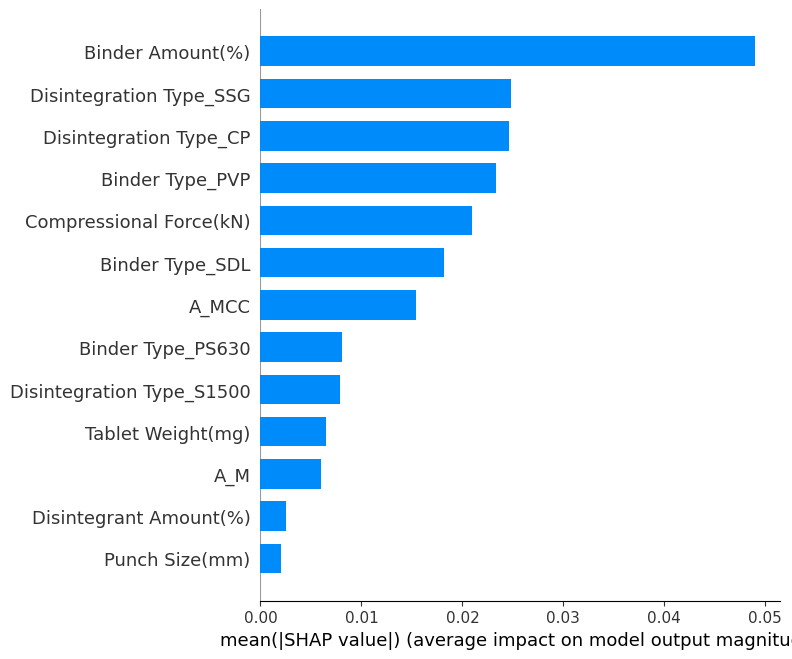

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


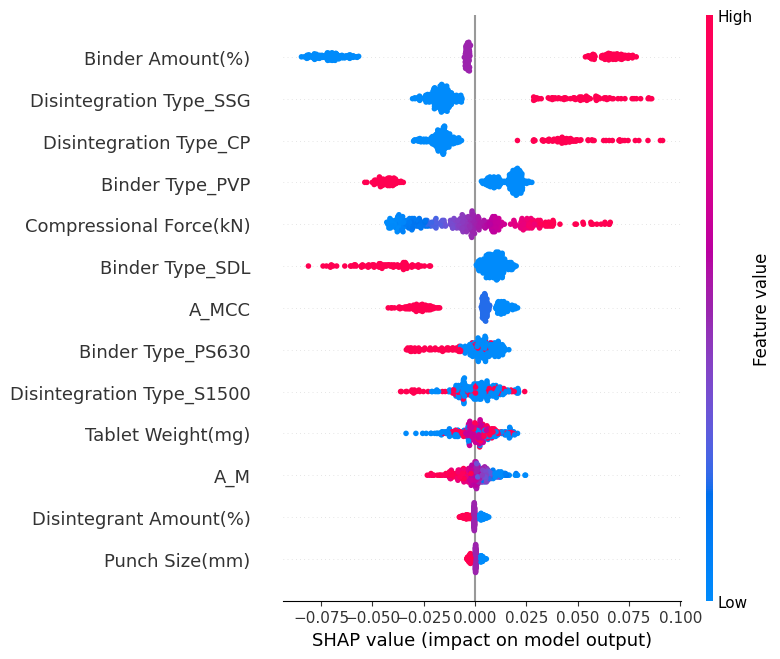

In [ ]:
import shap

# Wrap the ANN model in a function to make it callable by SHAP
def ann_predict(input_data):
    return ann_y3.predict(input_data)

# Create an explainer object for the ANN model
explainer = shap.Explainer(ann_predict, X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summary plot for feature importances
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X_encoded.columns)

# Summary plot for individual feature impact on y3 output
shap.summary_plot(shap_values, X_test, feature_names=X_encoded.columns)


In [6]:
############################3


# Splitting the dataset into features (X) and targets (y)
X = df.iloc[:, 0:9]  # Adjust the column indices as per your dataset
X1 = X.iloc[:, 0:2]
X2 = X.iloc[:, 2:8].apply(pd.to_numeric, errors='coerce') / 100
X3 = X.iloc[:,8:9].apply(pd.to_numeric, errors='coerce') / 1000

y1 = df.iloc[:, -3].apply(pd.to_numeric, errors='coerce') / 100  # Output column 1 = Hardness(kg/cm2)
y2 = df.iloc[:, -2].apply(pd.to_numeric, errors='coerce') / 100  # Output column 2 = % Friability
y3 = df.iloc[:, -1].apply(pd.to_numeric, errors='coerce') / 1000  # Output column 3 = Disin. Time

# Perform one-hot encoding on X1
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
X1_encoded = onehot_encoder.fit_transform(X1)

# Create a DataFrame with the encoded columns
X1_encoded_df = pd.DataFrame(X1_encoded, columns=onehot_encoder.get_feature_names_out(X1.columns))

# Concatenate the encoded columns with the remaining columns in X
X_encoded = pd.concat([X1_encoded_df, X2,X3], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test, y3_train, y3_test = train_test_split(X_encoded, y1, y2, y3, test_size=0.4, random_state=42)


#ANN MODEL USING R-SQUARE VALUE AS MONITORING IN CALLBACK
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Define custom callback to monitor validation R-squared and save the best model
class R2Callback(tf.keras.callbacks.Callback):
    def __init__(self, X_val, y_val, filepath, patience=10):
        super(R2Callback, self).__init__()
        self.X_val = X_val
        self.y_val = y_val
        self.filepath = filepath
        self.patience = patience
        self.best_r2 = -float('inf')
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        y_pred_val = self.model.predict(self.X_val)
        r2_val = r2_score(self.y_val, y_pred_val)
        print(f'Validation R^2: {r2_val}')
        if r2_val > self.best_r2:
            self.best_r2 = r2_val
            self.wait = 0
            self.model.save(self.filepath, overwrite=True)
            print("Model saved with validation R^2:", r2_val)
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True
                print("Early stopping due to no improvement in validation R^2.")


# Define file paths to save the best models for y1, y2, and y3
filepath_y1 = '/content/drive/My Drive/y1.hdf5'
filepath_y2 = '/content/drive/My Drive/y2.hdf5'
filepath_y3 = '/content/drive/My Drive/y3.hdf5'

# Define custom callback to monitor validation R-squared for y1, y2, and y3
r2_callback_y1 = R2Callback(X_test, y1_test, filepath_y1, patience=369)
r2_callback_y2 = R2Callback(X_test, y2_test, filepath_y2, patience=369)
r2_callback_y3 = R2Callback(X_test, y3_test, filepath_y3, patience=369)

# Define and compile ANN model for y1
ann_y1 = tf.keras.Sequential([
    tf.keras.layers.Dense(369, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

ann_y1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Train the ANN model for y1 with the custom callback
hist_y1 = ann_y1.fit(X_train, y1_train, epochs=10000, callbacks=[r2_callback_y1], validation_data=(X_test, y1_test), batch_size=None)

# Load the best model for y1
ann_y1 = tf.keras.models.load_model(filepath_y1)

# Predict using the best model for y1
y1_pred_ann = ann_y1.predict(X_test)

# Define and compile ANN model for y2
ann_y2 = tf.keras.Sequential([
    tf.keras.layers.Dense(369, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

ann_y2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Train the ANN model for y2 with the custom callback
hist_y2 = ann_y2.fit(X_train, y2_train, epochs=10000, callbacks=[r2_callback_y2], validation_data=(X_test, y2_test), batch_size=None)

# Load the best model for y2
ann_y2 = tf.keras.models.load_model(filepath_y2)

# Predict using the best model for y2
y2_pred_ann = ann_y2.predict(X_test)

# Define and compile ANN model for y3
ann_y3 = tf.keras.Sequential([
    tf.keras.layers.Dense(369, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

ann_y3.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Train the ANN model for y3 with the custom callback
hist_y3 = ann_y3.fit(X_train, y3_train, epochs=10000, callbacks=[r2_callback_y3], validation_data=(X_test, y3_test), batch_size=None)

# Load the best model for y3
ann_y3 = tf.keras.models.load_model(filepath_y3)

# Predict using the best model for y3
y3_pred_ann = ann_y3.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.3208144169427678
Model saved with validation R^2: -0.3208144169427678
17/17 [==============================] - 2s 47ms/step - loss: 0.0019 - root_mean_squared_error: 0.0439 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0375
Epoch 2/10000
 9/17 [==============>...............] - ETA: 0s - loss: 0.0013 - root_mean_squared_error: 0.0362

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.37861120411827986
17/17 [==============================] - 0s 23ms/step - loss: 0.0013 - root_mean_squared_error: 0.0355 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0383
Epoch 3/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.08859557888844205
Model saved with validation R^2: -0.08859557888844205
17/17 [==============================] - 1s 33ms/step - loss: 0.0012 - root_mean_squared_error: 0.0345 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0341
Epoch 4/10000
10/17 [================>.............] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0353

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.08872742954042834
17/17 [==============================] - 0s 24ms/step - loss: 0.0012 - root_mean_squared_error: 0.0340 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0341
Epoch 5/10000
11/11 [==============================] - 0s 8ms/step
Validation R^2: -0.20818963427554982
17/17 [==============================] - 1s 33ms/step - loss: 0.0011 - root_mean_squared_error: 0.0334 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0359
Epoch 6/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.01392044979564655
Model saved with validation R^2: 0.01392044979564655
17/17 [==============================] - 1s 40ms/step - loss: 0.0011 - root_mean_squared_error: 0.0335 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0324
Epoch 7/10000
15/17 [=========================>....] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0332

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.011239728910623747
17/17 [==============================] - 1s 40ms/step - loss: 0.0011 - root_mean_squared_error: 0.0333 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0325
Epoch 8/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: -0.020100707200979118
17/17 [==============================] - 1s 33ms/step - loss: 0.0011 - root_mean_squared_error: 0.0332 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0330
Epoch 9/10000
11/11 [==============================] - 0s 7ms/step
Validation R^2: 0.009476956608516662
17/17 [==============================] - 1s 38ms/step - loss: 0.0011 - root_mean_squared_error: 0.0331 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0325
Epoch 10/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.23255631312289116
17/17 [==============================] - 0s 22ms/step - loss: 0.0011 - root_mean_squared_error: 0.0333 - val_loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.008496514647441278
17/17 [==============================] - 0s 14ms/step - loss: 0.0011 - root_mean_squared_error: 0.0328 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0325
Epoch 13/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.09513084522170545
17/17 [==============================] - 0s 13ms/step - loss: 0.0011 - root_mean_squared_error: 0.0327 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0342
Epoch 14/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.03089141898512504
17/17 [==============================] - 0s 15ms/step - loss: 0.0011 - root_mean_squared_error: 0.0327 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0331
Epoch 15/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.049321558825662914
Model saved with validation R^2: 0.049321558825662914
17/17 [==============================] - 0s 17ms/step - loss:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.09212312711560289
17/17 [==============================] - 0s 15ms/step - loss: 0.0011 - root_mean_squared_error: 0.0327 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0341
Epoch 17/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.2860801612476822
17/17 [==============================] - 0s 14ms/step - loss: 0.0011 - root_mean_squared_error: 0.0325 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0370
Epoch 18/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.03348543837838591
17/17 [==============================] - 0s 14ms/step - loss: 0.0011 - root_mean_squared_error: 0.0328 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0321
Epoch 19/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.05779841150661491
Model saved with validation R^2: 0.05779841150661491
17/17 [==============================] - 0s 14ms/step - loss: 0.0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.05360972559729249
17/17 [==============================] - 0s 18ms/step - loss: 0.0010 - root_mean_squared_error: 0.0321 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0318
Epoch 21/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.06072234994078385
Model saved with validation R^2: 0.06072234994078385
17/17 [==============================] - 0s 19ms/step - loss: 0.0010 - root_mean_squared_error: 0.0322 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0316
Epoch 22/10000
 1/11 [=>............................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.0568293471551482
17/17 [==============================] - 0s 14ms/step - loss: 0.0010 - root_mean_squared_error: 0.0322 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0317
Epoch 23/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.047977996678953305
17/17 [==============================] - 0s 13ms/step - loss: 0.0011 - root_mean_squared_error: 0.0325 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0334
Epoch 24/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.05812648110745944
17/17 [==============================] - 0s 15ms/step - loss: 0.0010 - root_mean_squared_error: 0.0321 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0317
Epoch 25/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.06070110413204011
17/17 [==============================] - 0s 14ms/step - loss: 0.0010 - root_mean_squared_error: 0.0322 - val_loss: 0.0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.036111062113420855
17/17 [==============================] - 0s 15ms/step - loss: 0.0010 - root_mean_squared_error: 0.0319 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0321
Epoch 30/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.019854484029762975
17/17 [==============================] - 0s 14ms/step - loss: 0.0010 - root_mean_squared_error: 0.0319 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0323
Epoch 31/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.004024376916855754
17/17 [==============================] - 0s 12ms/step - loss: 0.0010 - root_mean_squared_error: 0.0321 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0327
Epoch 32/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.002468129328045743
17/17 [==============================] - 0s 13ms/step - loss: 9.9852e-04 - root_mean_squared_error: 0.0316 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.06229929710390181
17/17 [==============================] - 1s 36ms/step - loss: 0.0010 - root_mean_squared_error: 0.0316 - val_loss: 9.9933e-04 - val_root_mean_squared_error: 0.0316
Epoch 38/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.07755467263994842
Model saved with validation R^2: 0.07755467263994842
17/17 [==============================] - 1s 57ms/step - loss: 0.0010 - root_mean_squared_error: 0.0318 - val_loss: 9.8307e-04 - val_root_mean_squared_error: 0.0314
Epoch 39/10000
12/17 [====================>.........] - ETA: 0s - loss: 0.0010 - root_mean_squared_error: 0.0317

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.2747487050505837
17/17 [==============================] - 0s 22ms/step - loss: 0.0010 - root_mean_squared_error: 0.0317 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0369
Epoch 40/10000
11/11 [==============================] - 0s 6ms/step
Validation R^2: -0.06232553971212318
17/17 [==============================] - 0s 27ms/step - loss: 0.0010 - root_mean_squared_error: 0.0320 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0336
Epoch 41/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.028310888638096277
17/17 [==============================] - 1s 31ms/step - loss: 0.0010 - root_mean_squared_error: 0.0316 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0331
Epoch 42/10000
11/11 [==============================] - 0s 10ms/step
Validation R^2: 0.07306278716449688
17/17 [==============================] - 1s 69ms/step - loss: 0.0010 - root_mean_squared_error: 0.0320 - val_loss: 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.07172372573867958
17/17 [==============================] - 0s 28ms/step - loss: 9.6920e-04 - root_mean_squared_error: 0.0311 - val_loss: 9.8929e-04 - val_root_mean_squared_error: 0.0315
Epoch 53/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.04159075937875589
17/17 [==============================] - 0s 28ms/step - loss: 0.0010 - root_mean_squared_error: 0.0318 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0320
Epoch 54/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.36264259597302617
17/17 [==============================] - 0s 23ms/step - loss: 9.8266e-04 - root_mean_squared_error: 0.0313 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0381
Epoch 55/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.0613446536186143
17/17 [==============================] - 1s 33ms/step - loss: 9.8701e-04 - root_mean_squared_error: 0.0314 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.03928218894881952
17/17 [==============================] - 0s 26ms/step - loss: 9.8129e-04 - root_mean_squared_error: 0.0313 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0320
Epoch 63/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.07052365508815861
17/17 [==============================] - 0s 29ms/step - loss: 9.6706e-04 - root_mean_squared_error: 0.0311 - val_loss: 9.9057e-04 - val_root_mean_squared_error: 0.0315
Epoch 64/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.06479217450840946
17/17 [==============================] - 0s 28ms/step - loss: 9.5950e-04 - root_mean_squared_error: 0.0310 - val_loss: 9.9667e-04 - val_root_mean_squared_error: 0.0316
Epoch 65/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.07554330898555328
17/17 [==============================] - 1s 41ms/step - loss: 9.6925e-04 - root_mean_squared_error

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.11330914038646545
17/17 [==============================] - 0s 17ms/step - loss: 9.6277e-04 - root_mean_squared_error: 0.0310 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0344
Epoch 72/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.09249962756108066
17/17 [==============================] - 0s 15ms/step - loss: 9.6095e-04 - root_mean_squared_error: 0.0310 - val_loss: 9.6714e-04 - val_root_mean_squared_error: 0.0311
Epoch 73/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.07960681266169234
17/17 [==============================] - 0s 13ms/step - loss: 9.4731e-04 - root_mean_squared_error: 0.0308 - val_loss: 9.8089e-04 - val_root_mean_squared_error: 0.0313
Epoch 74/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.07376805747485882
17/17 [==============================] - 0s 13ms/step - loss: 9.6873e-04 - root_mean_squared_error

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.06553799253012338
17/17 [==============================] - 0s 13ms/step - loss: 9.2953e-04 - root_mean_squared_error: 0.0305 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0337
Epoch 96/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.032909437178683776
17/17 [==============================] - 0s 15ms/step - loss: 9.3212e-04 - root_mean_squared_error: 0.0305 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0321
Epoch 97/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.042951888712455144
17/17 [==============================] - 0s 15ms/step - loss: 9.2931e-04 - root_mean_squared_error: 0.0305 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0333
Epoch 98/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.08951862576079839
17/17 [==============================] - 0s 12ms/step - loss: 9.3864e-04 - root_mean_squared_error: 0.0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.09336048467017588
17/17 [==============================] - 0s 12ms/step - loss: 9.2122e-04 - root_mean_squared_error: 0.0304 - val_loss: 9.6623e-04 - val_root_mean_squared_error: 0.0311
Epoch 111/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.11367820533967754
17/17 [==============================] - 0s 13ms/step - loss: 9.2375e-04 - root_mean_squared_error: 0.0304 - val_loss: 9.4457e-04 - val_root_mean_squared_error: 0.0307
Epoch 112/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.07697891732373385
17/17 [==============================] - 0s 20ms/step - loss: 9.0935e-04 - root_mean_squared_error: 0.0302 - val_loss: 9.8369e-04 - val_root_mean_squared_error: 0.0314
Epoch 113/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.13196233534110047
Model saved with validation R^2: 0.13196233534110047
17/17 [==============================] 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.13215179724398696
Model saved with validation R^2: 0.13215179724398696
17/17 [==============================] - 0s 24ms/step - loss: 9.2348e-04 - root_mean_squared_error: 0.0304 - val_loss: 9.2489e-04 - val_root_mean_squared_error: 0.0304
Epoch 115/10000
10/17 [================>.............] - ETA: 0s - loss: 9.3658e-04 - root_mean_squared_error: 0.0306

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.12472824452042197
17/17 [==============================] - 0s 18ms/step - loss: 9.2188e-04 - root_mean_squared_error: 0.0304 - val_loss: 9.3280e-04 - val_root_mean_squared_error: 0.0305
Epoch 116/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.12654535480969697
17/17 [==============================] - 0s 22ms/step - loss: 9.0246e-04 - root_mean_squared_error: 0.0300 - val_loss: 9.3086e-04 - val_root_mean_squared_error: 0.0305
Epoch 117/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.08569499526810331
17/17 [==============================] - 0s 19ms/step - loss: 9.2943e-04 - root_mean_squared_error: 0.0305 - val_loss: 9.7440e-04 - val_root_mean_squared_error: 0.0312
Epoch 118/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.11396578347584374
17/17 [==============================] - 0s 23ms/step - loss: 9.0713e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.06518718192249584
17/17 [==============================] - 0s 13ms/step - loss: 8.9250e-04 - root_mean_squared_error: 0.0299 - val_loss: 9.9625e-04 - val_root_mean_squared_error: 0.0316
Epoch 126/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.13044041999123912
17/17 [==============================] - 0s 14ms/step - loss: 9.0476e-04 - root_mean_squared_error: 0.0301 - val_loss: 9.2671e-04 - val_root_mean_squared_error: 0.0304
Epoch 127/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.02842521221040184
17/17 [==============================] - 0s 15ms/step - loss: 9.1236e-04 - root_mean_squared_error: 0.0302 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0322
Epoch 128/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.23995026852498902
17/17 [==============================] - 0s 15ms/step - loss: 9.1948e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.12983106993890192
17/17 [==============================] - 0s 14ms/step - loss: 8.8670e-04 - root_mean_squared_error: 0.0298 - val_loss: 9.2736e-04 - val_root_mean_squared_error: 0.0305
Epoch 146/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.08969208825291863
17/17 [==============================] - 0s 13ms/step - loss: 8.8544e-04 - root_mean_squared_error: 0.0298 - val_loss: 9.7014e-04 - val_root_mean_squared_error: 0.0311
Epoch 147/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.09237585417390215
17/17 [==============================] - 0s 14ms/step - loss: 8.8605e-04 - root_mean_squared_error: 0.0298 - val_loss: 9.6728e-04 - val_root_mean_squared_error: 0.0311
Epoch 148/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.1454901109139055
Model saved with validation R^2: 0.1454901109139055
17/17 [==============================] - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.13923315303968697
17/17 [==============================] - 0s 16ms/step - loss: 8.7445e-04 - root_mean_squared_error: 0.0296 - val_loss: 9.1734e-04 - val_root_mean_squared_error: 0.0303
Epoch 150/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.009626483207305636
17/17 [==============================] - 0s 13ms/step - loss: 8.7748e-04 - root_mean_squared_error: 0.0296 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0328
Epoch 151/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.05427268722734224
17/17 [==============================] - 0s 15ms/step - loss: 8.9639e-04 - root_mean_squared_error: 0.0299 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0317
Epoch 152/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.1423630783681179
17/17 [==============================] - 0s 14ms/step - loss: 9.0468e-04 - root_mean_squared_error:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.03582016384798259
17/17 [==============================] - 0s 12ms/step - loss: 8.8611e-04 - root_mean_squared_error: 0.0298 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0321
Epoch 159/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.12292574931680567
17/17 [==============================] - 0s 14ms/step - loss: 9.0080e-04 - root_mean_squared_error: 0.0300 - val_loss: 9.3472e-04 - val_root_mean_squared_error: 0.0306
Epoch 160/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.1295404268426147
17/17 [==============================] - 0s 16ms/step - loss: 8.7721e-04 - root_mean_squared_error: 0.0296 - val_loss: 9.2767e-04 - val_root_mean_squared_error: 0.0305
Epoch 161/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.15342490301327205
Model saved with validation R^2: 0.15342490301327205
17/17 [==============================] - 0s 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.08957623723582886
17/17 [==============================] - 0s 19ms/step - loss: 8.6860e-04 - root_mean_squared_error: 0.0295 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0341
Epoch 163/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.10324716713566451
17/17 [==============================] - 0s 19ms/step - loss: 9.1584e-04 - root_mean_squared_error: 0.0303 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0343
Epoch 164/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.04958742543534056
17/17 [==============================] - 0s 22ms/step - loss: 8.8348e-04 - root_mean_squared_error: 0.0297 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0334
Epoch 165/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1396129823443918
17/17 [==============================] - 0s 22ms/step - loss: 8.9862e-04 - root_mean_squared_error: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.12458987198004734
17/17 [==============================] - 0s 18ms/step - loss: 8.4335e-04 - root_mean_squared_error: 0.0290 - val_loss: 9.3295e-04 - val_root_mean_squared_error: 0.0305
Epoch 193/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.15142456373645674
17/17 [==============================] - 0s 13ms/step - loss: 8.3852e-04 - root_mean_squared_error: 0.0290 - val_loss: 9.0435e-04 - val_root_mean_squared_error: 0.0301
Epoch 194/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.1209619361759281
17/17 [==============================] - 0s 13ms/step - loss: 8.7720e-04 - root_mean_squared_error: 0.0296 - val_loss: 9.3681e-04 - val_root_mean_squared_error: 0.0306
Epoch 195/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.1601934437573077
17/17 [==============================] - 0s 17ms/step - loss: 8.6373e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.17527189261876197
Model saved with validation R^2: 0.17527189261876197
17/17 [==============================] - 0s 16ms/step - loss: 8.5004e-04 - root_mean_squared_error: 0.0292 - val_loss: 8.7893e-04 - val_root_mean_squared_error: 0.0296
Epoch 202/10000
 1/11 [=>............................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.056705436781883334
17/17 [==============================] - 0s 12ms/step - loss: 8.4542e-04 - root_mean_squared_error: 0.0291 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0336
Epoch 203/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.06172971459769916
17/17 [==============================] - 0s 14ms/step - loss: 8.5367e-04 - root_mean_squared_error: 0.0292 - val_loss: 9.9994e-04 - val_root_mean_squared_error: 0.0316
Epoch 204/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.07721359750527335
17/17 [==============================] - 0s 13ms/step - loss: 8.3646e-04 - root_mean_squared_error: 0.0289 - val_loss: 9.8344e-04 - val_root_mean_squared_error: 0.0314
Epoch 205/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.05447509052827182
17/17 [==============================] - 0s 15ms/step - loss: 8.2992e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.1779634436885773
Model saved with validation R^2: 0.1779634436885773
17/17 [==============================] - 0s 16ms/step - loss: 8.3335e-04 - root_mean_squared_error: 0.0289 - val_loss: 8.7606e-04 - val_root_mean_squared_error: 0.0296
Epoch 221/10000
15/17 [=========================>....] - ETA: 0s - loss: 8.1743e-04 - root_mean_squared_error: 0.0286

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.18385942868652494
Model saved with validation R^2: 0.18385942868652494
17/17 [==============================] - 0s 14ms/step - loss: 8.2473e-04 - root_mean_squared_error: 0.0287 - val_loss: 8.6978e-04 - val_root_mean_squared_error: 0.0295
Epoch 222/10000
16/17 [===========================>..] - ETA: 0s - loss: 8.3781e-04 - root_mean_squared_error: 0.0289

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.07087945442994803
17/17 [==============================] - 0s 16ms/step - loss: 8.4641e-04 - root_mean_squared_error: 0.0291 - val_loss: 9.9019e-04 - val_root_mean_squared_error: 0.0315
Epoch 223/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.12412203515000941
17/17 [==============================] - 0s 14ms/step - loss: 8.4891e-04 - root_mean_squared_error: 0.0291 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0346
Epoch 224/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.1557730208263417
17/17 [==============================] - 0s 15ms/step - loss: 8.5102e-04 - root_mean_squared_error: 0.0292 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0351
Epoch 225/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.21308853759875124
17/17 [==============================] - 0s 13ms/step - loss: 8.2847e-04 - root_mean_squared_error

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.17432346187536152
17/17 [==============================] - 0s 13ms/step - loss: 8.1113e-04 - root_mean_squared_error: 0.0285 - val_loss: 8.7994e-04 - val_root_mean_squared_error: 0.0297
Epoch 237/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.18669925662902398
17/17 [==============================] - 0s 15ms/step - loss: 8.1118e-04 - root_mean_squared_error: 0.0285 - val_loss: 8.6675e-04 - val_root_mean_squared_error: 0.0294
Epoch 238/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.18733802518972253
17/17 [==============================] - 0s 15ms/step - loss: 7.9748e-04 - root_mean_squared_error: 0.0282 - val_loss: 8.6607e-04 - val_root_mean_squared_error: 0.0294
Epoch 239/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.0982378166609561
17/17 [==============================] - 0s 13ms/step - loss: 8.0409e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.20420115791631654
Model saved with validation R^2: 0.20420115791631654
17/17 [==============================] - 0s 17ms/step - loss: 8.0002e-04 - root_mean_squared_error: 0.0283 - val_loss: 8.4810e-04 - val_root_mean_squared_error: 0.0291
Epoch 247/10000
 1/11 [=>............................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.011462209918257082
17/17 [==============================] - 0s 13ms/step - loss: 8.2456e-04 - root_mean_squared_error: 0.0287 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0328
Epoch 248/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.12452456021344205
17/17 [==============================] - 0s 15ms/step - loss: 8.2151e-04 - root_mean_squared_error: 0.0287 - val_loss: 9.3302e-04 - val_root_mean_squared_error: 0.0305
Epoch 249/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.18138334338611384
17/17 [==============================] - 0s 14ms/step - loss: 8.0470e-04 - root_mean_squared_error: 0.0284 - val_loss: 8.7242e-04 - val_root_mean_squared_error: 0.0295
Epoch 250/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.014442551947021043
17/17 [==============================] - 0s 12ms/step - loss: 7.9881e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.192652384347613
17/17 [==============================] - 0s 14ms/step - loss: 7.9237e-04 - root_mean_squared_error: 0.0281 - val_loss: 8.6041e-04 - val_root_mean_squared_error: 0.0293
Epoch 265/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.2007912074146576
17/17 [==============================] - 0s 13ms/step - loss: 7.8316e-04 - root_mean_squared_error: 0.0280 - val_loss: 8.5174e-04 - val_root_mean_squared_error: 0.0292
Epoch 266/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.03884586311474714
17/17 [==============================] - 0s 15ms/step - loss: 7.9751e-04 - root_mean_squared_error: 0.0282 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0320
Epoch 267/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.05311937022470925
17/17 [==============================] - 0s 13ms/step - loss: 8.0123e-04 - root_mean_squared_error

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.22010997234596275
17/17 [==============================] - 0s 14ms/step - loss: 7.9056e-04 - root_mean_squared_error: 0.0281 - val_loss: 8.3115e-04 - val_root_mean_squared_error: 0.0288
Epoch 277/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.17923888700305657
17/17 [==============================] - 0s 13ms/step - loss: 7.9374e-04 - root_mean_squared_error: 0.0282 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0355
Epoch 278/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.1910039629031287
17/17 [==============================] - 0s 14ms/step - loss: 7.8858e-04 - root_mean_squared_error: 0.0281 - val_loss: 8.6217e-04 - val_root_mean_squared_error: 0.0294
Epoch 279/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.19569230014514283
17/17 [==============================] - 0s 13ms/step - loss: 7.8215e-04 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.13595847653792892
17/17 [==============================] - 0s 14ms/step - loss: 7.8561e-04 - root_mean_squared_error: 0.0280 - val_loss: 9.2083e-04 - val_root_mean_squared_error: 0.0303
Epoch 288/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.08985541716179102
17/17 [==============================] - 0s 18ms/step - loss: 8.0463e-04 - root_mean_squared_error: 0.0284 - val_loss: 9.6996e-04 - val_root_mean_squared_error: 0.0311
Epoch 289/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.22358874988019328
Model saved with validation R^2: 0.22358874988019328
17/17 [==============================] - 0s 15ms/step - loss: 7.9358e-04 - root_mean_squared_error: 0.0282 - val_loss: 8.2744e-04 - val_root_mean_squared_error: 0.0288
Epoch 290/10000
 1/11 [=>............................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.20984748051507807
17/17 [==============================] - 0s 13ms/step - loss: 7.7832e-04 - root_mean_squared_error: 0.0279 - val_loss: 8.4208e-04 - val_root_mean_squared_error: 0.0290
Epoch 291/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.2211257693444032
17/17 [==============================] - 0s 13ms/step - loss: 7.8289e-04 - root_mean_squared_error: 0.0280 - val_loss: 8.3006e-04 - val_root_mean_squared_error: 0.0288
Epoch 292/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.2151664432491961
17/17 [==============================] - 0s 15ms/step - loss: 7.7927e-04 - root_mean_squared_error: 0.0279 - val_loss: 8.3642e-04 - val_root_mean_squared_error: 0.0289
Epoch 293/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.19184334969355565
17/17 [==============================] - 0s 17ms/step - loss: 7.8171e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.5911030085554676
17/17 [==============================] - 0s 15ms/step - loss: 7.6881e-04 - root_mean_squared_error: 0.0277 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0412
Epoch 302/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.15386196479860703
17/17 [==============================] - 0s 12ms/step - loss: 8.4061e-04 - root_mean_squared_error: 0.0290 - val_loss: 9.0175e-04 - val_root_mean_squared_error: 0.0300
Epoch 303/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.17977950793134778
17/17 [==============================] - 0s 13ms/step - loss: 7.7718e-04 - root_mean_squared_error: 0.0279 - val_loss: 8.7413e-04 - val_root_mean_squared_error: 0.0296
Epoch 304/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.1469926198078919
17/17 [==============================] - 0s 13ms/step - loss: 7.7496e-04 - root_mean_squared_erro

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.07056692886692251
17/17 [==============================] - 0s 15ms/step - loss: 7.5163e-04 - root_mean_squared_error: 0.0274 - val_loss: 9.9052e-04 - val_root_mean_squared_error: 0.0315
Epoch 322/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.015807219462881772
17/17 [==============================] - 0s 12ms/step - loss: 7.5474e-04 - root_mean_squared_error: 0.0275 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0324
Epoch 323/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.19758476360917998
17/17 [==============================] - 0s 13ms/step - loss: 7.6770e-04 - root_mean_squared_error: 0.0277 - val_loss: 8.5515e-04 - val_root_mean_squared_error: 0.0292
Epoch 324/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.21801079468832496
17/17 [==============================] - 0s 12ms/step - loss: 7.7006e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.09916099106801113
17/17 [==============================] - 0s 13ms/step - loss: 7.6711e-04 - root_mean_squared_error: 0.0277 - val_loss: 9.6005e-04 - val_root_mean_squared_error: 0.0310
Epoch 327/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.22320023945346212
17/17 [==============================] - 0s 14ms/step - loss: 7.5906e-04 - root_mean_squared_error: 0.0276 - val_loss: 8.2785e-04 - val_root_mean_squared_error: 0.0288
Epoch 328/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.12137009476826766
17/17 [==============================] - 0s 15ms/step - loss: 7.5323e-04 - root_mean_squared_error: 0.0274 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0346
Epoch 329/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.1281402381064941
17/17 [==============================] - 0s 12ms/step - loss: 8.0387e-04 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.19306231493256854
17/17 [==============================] - 0s 13ms/step - loss: 7.2870e-04 - root_mean_squared_error: 0.0270 - val_loss: 8.5997e-04 - val_root_mean_squared_error: 0.0293
Epoch 341/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.041517845235483186
17/17 [==============================] - 0s 13ms/step - loss: 7.6210e-04 - root_mean_squared_error: 0.0276 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0320
Epoch 342/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.23938866200128517
17/17 [==============================] - 0s 15ms/step - loss: 7.4768e-04 - root_mean_squared_error: 0.0273 - val_loss: 8.1060e-04 - val_root_mean_squared_error: 0.0285
Epoch 343/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.21669207935292356
17/17 [==============================] - 0s 15ms/step - loss: 7.3941e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.24829650868484165
17/17 [==============================] - 0s 15ms/step - loss: 7.3172e-04 - root_mean_squared_error: 0.0271 - val_loss: 8.0111e-04 - val_root_mean_squared_error: 0.0283
Epoch 350/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.21838521192039473
17/17 [==============================] - 0s 16ms/step - loss: 7.2572e-04 - root_mean_squared_error: 0.0269 - val_loss: 8.3299e-04 - val_root_mean_squared_error: 0.0289
Epoch 351/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.1921610091333703
17/17 [==============================] - 0s 13ms/step - loss: 7.2351e-04 - root_mean_squared_error: 0.0269 - val_loss: 8.6093e-04 - val_root_mean_squared_error: 0.0293
Epoch 352/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.16523170377062257
17/17 [==============================] - 0s 15ms/step - loss: 7.3656e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.13336741033167088
17/17 [==============================] - 0s 16ms/step - loss: 7.2337e-04 - root_mean_squared_error: 0.0269 - val_loss: 9.2359e-04 - val_root_mean_squared_error: 0.0304
Epoch 368/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.12405638244441097
17/17 [==============================] - 0s 13ms/step - loss: 7.2827e-04 - root_mean_squared_error: 0.0270 - val_loss: 9.3351e-04 - val_root_mean_squared_error: 0.0306
Epoch 369/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.1867822933227895
17/17 [==============================] - 0s 15ms/step - loss: 7.1595e-04 - root_mean_squared_error: 0.0268 - val_loss: 8.6667e-04 - val_root_mean_squared_error: 0.0294
Epoch 370/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.13250077990933207
17/17 [==============================] - 0s 15ms/step - loss: 7.3398e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.2378740853973581
17/17 [==============================] - 0s 15ms/step - loss: 7.1985e-04 - root_mean_squared_error: 0.0268 - val_loss: 8.1222e-04 - val_root_mean_squared_error: 0.0285
Epoch 386/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.19283050419004055
17/17 [==============================] - 0s 15ms/step - loss: 7.0155e-04 - root_mean_squared_error: 0.0265 - val_loss: 8.6022e-04 - val_root_mean_squared_error: 0.0293
Epoch 387/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.27844156846791224
Model saved with validation R^2: 0.27844156846791224
17/17 [==============================] - 0s 15ms/step - loss: 7.1283e-04 - root_mean_squared_error: 0.0267 - val_loss: 7.6898e-04 - val_root_mean_squared_error: 0.0277
Epoch 388/10000
16/17 [===========================>..] - ETA: 0s - loss: 7.1158e-04 - root_mean_squared_error: 0.0267

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2535501885871595
17/17 [==============================] - 0s 14ms/step - loss: 7.1043e-04 - root_mean_squared_error: 0.0267 - val_loss: 7.9551e-04 - val_root_mean_squared_error: 0.0282
Epoch 389/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.0807517473294036
17/17 [==============================] - 0s 13ms/step - loss: 7.0278e-04 - root_mean_squared_error: 0.0265 - val_loss: 9.7966e-04 - val_root_mean_squared_error: 0.0313
Epoch 390/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.11241686939785078
17/17 [==============================] - 0s 15ms/step - loss: 7.1702e-04 - root_mean_squared_error: 0.0268 - val_loss: 9.4592e-04 - val_root_mean_squared_error: 0.0308
Epoch 391/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.1383942033127431
17/17 [==============================] - 0s 13ms/step - loss: 7.2603e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.19726133078477992
17/17 [==============================] - 0s 14ms/step - loss: 7.0618e-04 - root_mean_squared_error: 0.0266 - val_loss: 8.5550e-04 - val_root_mean_squared_error: 0.0292
Epoch 396/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.27184798840371316
17/17 [==============================] - 0s 14ms/step - loss: 7.0698e-04 - root_mean_squared_error: 0.0266 - val_loss: 7.7601e-04 - val_root_mean_squared_error: 0.0279
Epoch 397/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.26864387586576277
17/17 [==============================] - 0s 14ms/step - loss: 7.0011e-04 - root_mean_squared_error: 0.0265 - val_loss: 7.7942e-04 - val_root_mean_squared_error: 0.0279
Epoch 398/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.2679694849470402
17/17 [==============================] - 0s 13ms/step - loss: 7.0820e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2629945266311753
17/17 [==============================] - 0s 18ms/step - loss: 7.0998e-04 - root_mean_squared_error: 0.0266 - val_loss: 7.8544e-04 - val_root_mean_squared_error: 0.0280
Epoch 408/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2897738866303402
Model saved with validation R^2: 0.2897738866303402
17/17 [==============================] - 0s 20ms/step - loss: 7.0639e-04 - root_mean_squared_error: 0.0266 - val_loss: 7.5690e-04 - val_root_mean_squared_error: 0.0275
Epoch 409/10000
 9/17 [==============>...............] - ETA: 0s - loss: 6.7026e-04 - root_mean_squared_error: 0.0259

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.21644676198303892
17/17 [==============================] - 0s 22ms/step - loss: 6.8847e-04 - root_mean_squared_error: 0.0262 - val_loss: 8.3505e-04 - val_root_mean_squared_error: 0.0289
Epoch 410/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.05503510796549105
17/17 [==============================] - 0s 19ms/step - loss: 7.0302e-04 - root_mean_squared_error: 0.0265 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0317
Epoch 411/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.013610517951849532
17/17 [==============================] - 0s 22ms/step - loss: 6.9962e-04 - root_mean_squared_error: 0.0265 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0324
Epoch 412/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.28282597756467576
17/17 [==============================] - 0s 21ms/step - loss: 7.2739e-04 - root_mean_squared_error:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.15267291491141943
17/17 [==============================] - 0s 15ms/step - loss: 6.7916e-04 - root_mean_squared_error: 0.0261 - val_loss: 9.0302e-04 - val_root_mean_squared_error: 0.0301
Epoch 420/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.19946485640380673
17/17 [==============================] - 0s 15ms/step - loss: 6.8388e-04 - root_mean_squared_error: 0.0262 - val_loss: 8.5315e-04 - val_root_mean_squared_error: 0.0292
Epoch 421/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.2991387577076784
Model saved with validation R^2: 0.2991387577076784
17/17 [==============================] - 0s 14ms/step - loss: 6.9235e-04 - root_mean_squared_error: 0.0263 - val_loss: 7.4692e-04 - val_root_mean_squared_error: 0.0273
Epoch 422/10000
15/17 [=========================>....] - ETA: 0s - loss: 6.9467e-04 - root_mean_squared_error: 0.0264

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.10700970264875365
17/17 [==============================] - 0s 13ms/step - loss: 6.9132e-04 - root_mean_squared_error: 0.0263 - val_loss: 9.5168e-04 - val_root_mean_squared_error: 0.0308
Epoch 423/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.2966828528031974
17/17 [==============================] - 0s 15ms/step - loss: 7.1207e-04 - root_mean_squared_error: 0.0267 - val_loss: 7.4954e-04 - val_root_mean_squared_error: 0.0274
Epoch 424/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.27888834805427065
17/17 [==============================] - 0s 29ms/step - loss: 6.7871e-04 - root_mean_squared_error: 0.0261 - val_loss: 7.6851e-04 - val_root_mean_squared_error: 0.0277
Epoch 425/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.282418136394025
17/17 [==============================] - 0s 24ms/step - loss: 6.6708e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.26161765252921465
17/17 [==============================] - 0s 13ms/step - loss: 6.7626e-04 - root_mean_squared_error: 0.0260 - val_loss: 7.8691e-04 - val_root_mean_squared_error: 0.0281
Epoch 437/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.12565255489428717
17/17 [==============================] - 0s 14ms/step - loss: 6.8357e-04 - root_mean_squared_error: 0.0261 - val_loss: 9.3181e-04 - val_root_mean_squared_error: 0.0305
Epoch 438/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.3086109400738606
17/17 [==============================] - 0s 15ms/step - loss: 6.8401e-04 - root_mean_squared_error: 0.0262 - val_loss: 7.3683e-04 - val_root_mean_squared_error: 0.0271
Epoch 439/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.2987339763698613
17/17 [==============================] - 0s 15ms/step - loss: 6.6330e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.14934873345424426
17/17 [==============================] - 0s 15ms/step - loss: 6.7509e-04 - root_mean_squared_error: 0.0260 - val_loss: 9.0656e-04 - val_root_mean_squared_error: 0.0301
Epoch 445/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.30490946056963353
17/17 [==============================] - 0s 13ms/step - loss: 6.7021e-04 - root_mean_squared_error: 0.0259 - val_loss: 7.4077e-04 - val_root_mean_squared_error: 0.0272
Epoch 446/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.13850885537703062
17/17 [==============================] - 0s 13ms/step - loss: 6.5391e-04 - root_mean_squared_error: 0.0256 - val_loss: 9.1811e-04 - val_root_mean_squared_error: 0.0303
Epoch 447/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.3052902998796845
17/17 [==============================] - 0s 16ms/step - loss: 6.8586e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.2755131377851586
17/17 [==============================] - 0s 21ms/step - loss: 6.8274e-04 - root_mean_squared_error: 0.0261 - val_loss: 7.7210e-04 - val_root_mean_squared_error: 0.0278
Epoch 455/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.27082332373615436
17/17 [==============================] - 0s 19ms/step - loss: 6.5599e-04 - root_mean_squared_error: 0.0256 - val_loss: 7.7710e-04 - val_root_mean_squared_error: 0.0279
Epoch 456/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.20734869797934108
17/17 [==============================] - 0s 20ms/step - loss: 6.4453e-04 - root_mean_squared_error: 0.0254 - val_loss: 8.4475e-04 - val_root_mean_squared_error: 0.0291
Epoch 457/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.15349006752398286
17/17 [==============================] - 0s 20ms/step - loss: 6.3372e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.07998664869436367
17/17 [==============================] - 0s 15ms/step - loss: 6.4590e-04 - root_mean_squared_error: 0.0254 - val_loss: 9.8048e-04 - val_root_mean_squared_error: 0.0313
Epoch 470/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.2891071157311157
17/17 [==============================] - 0s 15ms/step - loss: 6.6545e-04 - root_mean_squared_error: 0.0258 - val_loss: 7.5762e-04 - val_root_mean_squared_error: 0.0275
Epoch 471/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.3504126983035203
17/17 [==============================] - 0s 17ms/step - loss: 6.2701e-04 - root_mean_squared_error: 0.0250 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0379
Epoch 472/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.19797229502940084
17/17 [==============================] - 0s 15ms/step - loss: 6.7721e-04 - root_mean_squared_erro

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.10300837469194968
17/17 [==============================] - 0s 13ms/step - loss: 6.3843e-04 - root_mean_squared_error: 0.0253 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0343
Epoch 477/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.1428969378654188
17/17 [==============================] - 1s 33ms/step - loss: 6.7623e-04 - root_mean_squared_error: 0.0260 - val_loss: 9.1344e-04 - val_root_mean_squared_error: 0.0302
Epoch 478/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.30682896301158724
17/17 [==============================] - 0s 14ms/step - loss: 6.4857e-04 - root_mean_squared_error: 0.0255 - val_loss: 7.3873e-04 - val_root_mean_squared_error: 0.0272
Epoch 479/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.27528581500327176
17/17 [==============================] - 0s 13ms/step - loss: 6.5016e-04 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.34247002854886344
Model saved with validation R^2: 0.34247002854886344
17/17 [==============================] - 0s 20ms/step - loss: 6.2723e-04 - root_mean_squared_error: 0.0250 - val_loss: 7.0075e-04 - val_root_mean_squared_error: 0.0265
Epoch 486/10000
15/17 [=========================>....] - ETA: 0s - loss: 6.2365e-04 - root_mean_squared_error: 0.0250

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.33856728747088893
17/17 [==============================] - 0s 18ms/step - loss: 6.2557e-04 - root_mean_squared_error: 0.0250 - val_loss: 7.0490e-04 - val_root_mean_squared_error: 0.0266
Epoch 487/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.2283509569285772
17/17 [==============================] - 0s 13ms/step - loss: 6.3488e-04 - root_mean_squared_error: 0.0252 - val_loss: 8.2236e-04 - val_root_mean_squared_error: 0.0287
Epoch 488/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.31534103313861817
17/17 [==============================] - 0s 18ms/step - loss: 6.2776e-04 - root_mean_squared_error: 0.0251 - val_loss: 7.2966e-04 - val_root_mean_squared_error: 0.0270
Epoch 489/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.20966003892380747
17/17 [==============================] - 0s 13ms/step - loss: 6.2266e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.19260756676444946
17/17 [==============================] - 0s 15ms/step - loss: 6.2094e-04 - root_mean_squared_error: 0.0249 - val_loss: 8.6046e-04 - val_root_mean_squared_error: 0.0293
Epoch 496/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.33272463328331126
17/17 [==============================] - 0s 13ms/step - loss: 6.3838e-04 - root_mean_squared_error: 0.0253 - val_loss: 7.1113e-04 - val_root_mean_squared_error: 0.0267
Epoch 497/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.3103159215373513
17/17 [==============================] - 0s 14ms/step - loss: 6.2453e-04 - root_mean_squared_error: 0.0250 - val_loss: 7.3501e-04 - val_root_mean_squared_error: 0.0271
Epoch 498/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.0955266948563619
17/17 [==============================] - 0s 14ms/step - loss: 6.4226e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.2961884386315453
17/17 [==============================] - 0s 16ms/step - loss: 6.3213e-04 - root_mean_squared_error: 0.0251 - val_loss: 7.5007e-04 - val_root_mean_squared_error: 0.0274
Epoch 514/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.21038770839684307
17/17 [==============================] - 0s 18ms/step - loss: 6.0951e-04 - root_mean_squared_error: 0.0247 - val_loss: 8.4151e-04 - val_root_mean_squared_error: 0.0290
Epoch 515/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.18755079966476362
17/17 [==============================] - 0s 17ms/step - loss: 6.1224e-04 - root_mean_squared_error: 0.0247 - val_loss: 8.6585e-04 - val_root_mean_squared_error: 0.0294
Epoch 516/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.36658464652187495
Model saved with validation R^2: 0.36658464652187495
17/17 [==============================] -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.351548668837243
17/17 [==============================] - 0s 16ms/step - loss: 5.9499e-04 - root_mean_squared_error: 0.0244 - val_loss: 6.9107e-04 - val_root_mean_squared_error: 0.0263
Epoch 518/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.35562813038697294
17/17 [==============================] - 0s 15ms/step - loss: 5.9257e-04 - root_mean_squared_error: 0.0243 - val_loss: 6.8672e-04 - val_root_mean_squared_error: 0.0262
Epoch 519/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.12037654298701805
17/17 [==============================] - 0s 13ms/step - loss: 5.9670e-04 - root_mean_squared_error: 0.0244 - val_loss: 9.3744e-04 - val_root_mean_squared_error: 0.0306
Epoch 520/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.28671622858631785
17/17 [==============================] - 0s 13ms/step - loss: 6.2445e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.32109717101339363
17/17 [==============================] - 0s 13ms/step - loss: 6.0067e-04 - root_mean_squared_error: 0.0245 - val_loss: 7.2352e-04 - val_root_mean_squared_error: 0.0269
Epoch 529/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.26376063308260167
17/17 [==============================] - 0s 14ms/step - loss: 5.9047e-04 - root_mean_squared_error: 0.0243 - val_loss: 7.8463e-04 - val_root_mean_squared_error: 0.0280
Epoch 530/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.3737456649933256
Model saved with validation R^2: 0.3737456649933256
17/17 [==============================] - 0s 17ms/step - loss: 5.9506e-04 - root_mean_squared_error: 0.0244 - val_loss: 6.6741e-04 - val_root_mean_squared_error: 0.0258
Epoch 531/10000
15/17 [=========================>....] - ETA: 0s - loss: 6.1494e-04 - root_mean_squared_error: 0.0248

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.34504992641331644
17/17 [==============================] - 0s 15ms/step - loss: 6.1412e-04 - root_mean_squared_error: 0.0248 - val_loss: 6.9800e-04 - val_root_mean_squared_error: 0.0264
Epoch 532/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.009078340072264046
17/17 [==============================] - 0s 15ms/step - loss: 5.9173e-04 - root_mean_squared_error: 0.0243 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0328
Epoch 533/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.2362307681705209
17/17 [==============================] - 0s 15ms/step - loss: 6.0394e-04 - root_mean_squared_error: 0.0246 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0363
Epoch 534/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.10769207287844973
17/17 [==============================] - 0s 18ms/step - loss: 6.3004e-04 - root_mean_squared_error

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.3608365976539606
17/17 [==============================] - 0s 15ms/step - loss: 6.0315e-04 - root_mean_squared_error: 0.0246 - val_loss: 6.8117e-04 - val_root_mean_squared_error: 0.0261
Epoch 540/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.37266090323120027
17/17 [==============================] - 0s 13ms/step - loss: 6.1040e-04 - root_mean_squared_error: 0.0247 - val_loss: 6.6857e-04 - val_root_mean_squared_error: 0.0259
Epoch 541/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.368419668023675
17/17 [==============================] - 0s 15ms/step - loss: 5.8679e-04 - root_mean_squared_error: 0.0242 - val_loss: 6.7309e-04 - val_root_mean_squared_error: 0.0259
Epoch 542/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.3654437008609389
17/17 [==============================] - 0s 16ms/step - loss: 5.7342e-04 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.12732999169791603
17/17 [==============================] - 0s 22ms/step - loss: 5.7120e-04 - root_mean_squared_error: 0.0239 - val_loss: 9.3003e-04 - val_root_mean_squared_error: 0.0305
Epoch 551/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.32266784516746694
17/17 [==============================] - 0s 23ms/step - loss: 5.8609e-04 - root_mean_squared_error: 0.0242 - val_loss: 7.2185e-04 - val_root_mean_squared_error: 0.0269
Epoch 552/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.35698444636362603
17/17 [==============================] - 0s 16ms/step - loss: 5.8488e-04 - root_mean_squared_error: 0.0242 - val_loss: 6.8528e-04 - val_root_mean_squared_error: 0.0262
Epoch 553/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.24934738905174758
17/17 [==============================] - 0s 15ms/step - loss: 5.7289e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.3087515814409807
17/17 [==============================] - 0s 14ms/step - loss: 5.8838e-04 - root_mean_squared_error: 0.0243 - val_loss: 7.3668e-04 - val_root_mean_squared_error: 0.0271
Epoch 556/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.38152850260740945
17/17 [==============================] - 0s 13ms/step - loss: 5.7709e-04 - root_mean_squared_error: 0.0240 - val_loss: 6.5912e-04 - val_root_mean_squared_error: 0.0257
Epoch 557/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.3784104463196767
17/17 [==============================] - 0s 13ms/step - loss: 5.9490e-04 - root_mean_squared_error: 0.0244 - val_loss: 6.6244e-04 - val_root_mean_squared_error: 0.0257
Epoch 558/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.30246583630779833
17/17 [==============================] - 0s 13ms/step - loss: 5.7776e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.04840118689585815
17/17 [==============================] - 0s 19ms/step - loss: 5.5600e-04 - root_mean_squared_error: 0.0236 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0318
Epoch 575/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.3917392237843589
17/17 [==============================] - 0s 16ms/step - loss: 5.8145e-04 - root_mean_squared_error: 0.0241 - val_loss: 6.4824e-04 - val_root_mean_squared_error: 0.0255
Epoch 576/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.35279328714158276
17/17 [==============================] - 0s 14ms/step - loss: 5.4957e-04 - root_mean_squared_error: 0.0234 - val_loss: 6.8974e-04 - val_root_mean_squared_error: 0.0263
Epoch 577/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.40014173973057743
17/17 [==============================] - 0s 17ms/step - loss: 5.7165e-04 - root_mean_squared_erro

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.40553542055491687
17/17 [==============================] - 0s 22ms/step - loss: 5.2346e-04 - root_mean_squared_error: 0.0229 - val_loss: 6.3354e-04 - val_root_mean_squared_error: 0.0252
Epoch 596/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.43086431155840255
Model saved with validation R^2: 0.43086431155840255
17/17 [==============================] - 0s 26ms/step - loss: 5.5719e-04 - root_mean_squared_error: 0.0236 - val_loss: 6.0654e-04 - val_root_mean_squared_error: 0.0246
Epoch 597/10000
10/17 [================>.............] - ETA: 0s - loss: 5.1608e-04 - root_mean_squared_error: 0.0227

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.41773485167075675
17/17 [==============================] - 0s 23ms/step - loss: 5.2954e-04 - root_mean_squared_error: 0.0230 - val_loss: 6.2053e-04 - val_root_mean_squared_error: 0.0249
Epoch 598/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.4221317895414858
17/17 [==============================] - 0s 23ms/step - loss: 5.3301e-04 - root_mean_squared_error: 0.0231 - val_loss: 6.1585e-04 - val_root_mean_squared_error: 0.0248
Epoch 599/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.08415303474361702
17/17 [==============================] - 0s 16ms/step - loss: 5.3355e-04 - root_mean_squared_error: 0.0231 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0340
Epoch 600/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.08313908830884675
17/17 [==============================] - 0s 15ms/step - loss: 5.8132e-04 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.32604894156708975
17/17 [==============================] - 0s 14ms/step - loss: 5.4469e-04 - root_mean_squared_error: 0.0233 - val_loss: 7.1825e-04 - val_root_mean_squared_error: 0.0268
Epoch 616/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.33501059339409156
17/17 [==============================] - 0s 14ms/step - loss: 5.3555e-04 - root_mean_squared_error: 0.0231 - val_loss: 7.0870e-04 - val_root_mean_squared_error: 0.0266
Epoch 617/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3681801327587857
17/17 [==============================] - 0s 15ms/step - loss: 5.1744e-04 - root_mean_squared_error: 0.0227 - val_loss: 6.7335e-04 - val_root_mean_squared_error: 0.0259
Epoch 618/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.12877266951074928
17/17 [==============================] - 0s 16ms/step - loss: 5.0770e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.37274955259327724
17/17 [==============================] - 0s 14ms/step - loss: 5.0857e-04 - root_mean_squared_error: 0.0226 - val_loss: 6.6848e-04 - val_root_mean_squared_error: 0.0259
Epoch 625/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.4370152934973667
Model saved with validation R^2: 0.4370152934973667
17/17 [==============================] - 0s 15ms/step - loss: 5.0774e-04 - root_mean_squared_error: 0.0225 - val_loss: 5.9999e-04 - val_root_mean_squared_error: 0.0245
Epoch 626/10000
12/17 [====================>.........] - ETA: 0s - loss: 5.1066e-04 - root_mean_squared_error: 0.0226

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.41467982284077565
17/17 [==============================] - 0s 18ms/step - loss: 5.4782e-04 - root_mean_squared_error: 0.0234 - val_loss: 6.2379e-04 - val_root_mean_squared_error: 0.0250
Epoch 627/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.040338002828371966
17/17 [==============================] - 0s 15ms/step - loss: 5.1177e-04 - root_mean_squared_error: 0.0226 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0333
Epoch 628/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.16908989352454196
17/17 [==============================] - 0s 13ms/step - loss: 5.8130e-04 - root_mean_squared_error: 0.0241 - val_loss: 8.8552e-04 - val_root_mean_squared_error: 0.0298
Epoch 629/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.26107593489116
17/17 [==============================] - 0s 13ms/step - loss: 5.2932e-04 - root_mean_squared_erro

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.3764315246741172
17/17 [==============================] - 0s 13ms/step - loss: 5.1318e-04 - root_mean_squared_error: 0.0227 - val_loss: 6.6455e-04 - val_root_mean_squared_error: 0.0258
Epoch 637/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.4414399259122561
17/17 [==============================] - 0s 13ms/step - loss: 5.3946e-04 - root_mean_squared_error: 0.0232 - val_loss: 5.9527e-04 - val_root_mean_squared_error: 0.0244
Epoch 638/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.02402345486077584
17/17 [==============================] - 0s 18ms/step - loss: 5.2921e-04 - root_mean_squared_error: 0.0230 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0330
Epoch 639/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.11871271517860604
17/17 [==============================] - 0s 19ms/step - loss: 5.2252e-04 - root_mean_squared_erro

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.34502543722757695
17/17 [==============================] - 0s 15ms/step - loss: 4.7886e-04 - root_mean_squared_error: 0.0219 - val_loss: 6.9802e-04 - val_root_mean_squared_error: 0.0264
Epoch 657/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.18453358723862423
17/17 [==============================] - 0s 13ms/step - loss: 5.0510e-04 - root_mean_squared_error: 0.0225 - val_loss: 8.6906e-04 - val_root_mean_squared_error: 0.0295
Epoch 658/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.4428284845882339
17/17 [==============================] - 0s 13ms/step - loss: 5.0312e-04 - root_mean_squared_error: 0.0224 - val_loss: 5.9379e-04 - val_root_mean_squared_error: 0.0244
Epoch 659/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.41097357008496926
17/17 [==============================] - 0s 13ms/step - loss: 4.8804e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.3389313797437332
17/17 [==============================] - 0s 13ms/step - loss: 4.7597e-04 - root_mean_squared_error: 0.0218 - val_loss: 7.0452e-04 - val_root_mean_squared_error: 0.0265
Epoch 669/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.20141492518117576
17/17 [==============================] - 0s 19ms/step - loss: 4.8526e-04 - root_mean_squared_error: 0.0220 - val_loss: 8.5107e-04 - val_root_mean_squared_error: 0.0292
Epoch 670/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.4601987543963514
17/17 [==============================] - 0s 13ms/step - loss: 4.8211e-04 - root_mean_squared_error: 0.0220 - val_loss: 5.7528e-04 - val_root_mean_squared_error: 0.0240
Epoch 671/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.45590783441512783
17/17 [==============================] - 0s 16ms/step - loss: 4.8780e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.4484594956390654
17/17 [==============================] - 0s 15ms/step - loss: 5.0764e-04 - root_mean_squared_error: 0.0225 - val_loss: 5.8779e-04 - val_root_mean_squared_error: 0.0242
Epoch 679/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.2552970861278461
17/17 [==============================] - 0s 13ms/step - loss: 4.8316e-04 - root_mean_squared_error: 0.0220 - val_loss: 7.9365e-04 - val_root_mean_squared_error: 0.0282
Epoch 680/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4752835723151101
17/17 [==============================] - 0s 15ms/step - loss: 5.0901e-04 - root_mean_squared_error: 0.0226 - val_loss: 5.5920e-04 - val_root_mean_squared_error: 0.0236
Epoch 681/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.47585451984059013
17/17 [==============================] - 0s 16ms/step - loss: 4.6367e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.14414437052880447
17/17 [==============================] - 0s 20ms/step - loss: 4.6893e-04 - root_mean_squared_error: 0.0217 - val_loss: 9.1211e-04 - val_root_mean_squared_error: 0.0302
Epoch 688/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3577146418385988
17/17 [==============================] - 0s 21ms/step - loss: 4.6827e-04 - root_mean_squared_error: 0.0216 - val_loss: 6.8450e-04 - val_root_mean_squared_error: 0.0262
Epoch 689/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.44364586640220083
17/17 [==============================] - 0s 20ms/step - loss: 4.6164e-04 - root_mean_squared_error: 0.0215 - val_loss: 5.9292e-04 - val_root_mean_squared_error: 0.0243
Epoch 690/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.023165580451418144
17/17 [==============================] - 0s 23ms/step - loss: 4.7090e-04 - root_mean_square

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.40382627836043083
17/17 [==============================] - 0s 14ms/step - loss: 4.5063e-04 - root_mean_squared_error: 0.0212 - val_loss: 6.3536e-04 - val_root_mean_squared_error: 0.0252
Epoch 698/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4733725848215181
17/17 [==============================] - 0s 14ms/step - loss: 4.6692e-04 - root_mean_squared_error: 0.0216 - val_loss: 5.6124e-04 - val_root_mean_squared_error: 0.0237
Epoch 699/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.49324875310126615
Model saved with validation R^2: 0.49324875310126615
17/17 [==============================] - 0s 15ms/step - loss: 4.4893e-04 - root_mean_squared_error: 0.0212 - val_loss: 5.4006e-04 - val_root_mean_squared_error: 0.0232
Epoch 700/10000
15/17 [=========================>....] - ETA: 0s - loss: 4.9150e-04 - root_mean_squared_error: 0.0222

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5000085526945526
Model saved with validation R^2: 0.5000085526945526
17/17 [==============================] - 0s 15ms/step - loss: 4.8899e-04 - root_mean_squared_error: 0.0221 - val_loss: 5.3285e-04 - val_root_mean_squared_error: 0.0231
Epoch 701/10000
14/17 [=======================>......] - ETA: 0s - loss: 4.7008e-04 - root_mean_squared_error: 0.0217

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.1608724212984063
17/17 [==============================] - 0s 14ms/step - loss: 4.8727e-04 - root_mean_squared_error: 0.0221 - val_loss: 8.9428e-04 - val_root_mean_squared_error: 0.0299
Epoch 702/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.48300046680530206
17/17 [==============================] - 0s 15ms/step - loss: 4.7624e-04 - root_mean_squared_error: 0.0218 - val_loss: 5.5098e-04 - val_root_mean_squared_error: 0.0235
Epoch 703/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.25639360476663275
17/17 [==============================] - 0s 17ms/step - loss: 4.8570e-04 - root_mean_squared_error: 0.0220 - val_loss: 7.9248e-04 - val_root_mean_squared_error: 0.0282
Epoch 704/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.463227439895492
17/17 [==============================] - 0s 15ms/step - loss: 4.9170e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.017554661010264816
17/17 [==============================] - 0s 15ms/step - loss: 4.6189e-04 - root_mean_squared_error: 0.0215 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0324
Epoch 709/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.38539051260486257
17/17 [==============================] - 0s 13ms/step - loss: 4.6409e-04 - root_mean_squared_error: 0.0215 - val_loss: 6.5500e-04 - val_root_mean_squared_error: 0.0256
Epoch 710/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.07050738033161341
17/17 [==============================] - 0s 15ms/step - loss: 4.7263e-04 - root_mean_squared_error: 0.0217 - val_loss: 9.9058e-04 - val_root_mean_squared_error: 0.0315
Epoch 711/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.4978477716671884
17/17 [==============================] - 0s 14ms/step - loss: 4.9151e-04 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.48414748858950507
17/17 [==============================] - 0s 15ms/step - loss: 4.3143e-04 - root_mean_squared_error: 0.0208 - val_loss: 5.4976e-04 - val_root_mean_squared_error: 0.0234
Epoch 714/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.44369853491766775
17/17 [==============================] - 0s 15ms/step - loss: 4.3651e-04 - root_mean_squared_error: 0.0209 - val_loss: 5.9286e-04 - val_root_mean_squared_error: 0.0243
Epoch 715/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.3852596846000369
17/17 [==============================] - 0s 15ms/step - loss: 4.3085e-04 - root_mean_squared_error: 0.0208 - val_loss: 6.5514e-04 - val_root_mean_squared_error: 0.0256
Epoch 716/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.45304454544112627
17/17 [==============================] - 0s 18ms/step - loss: 4.5210e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5238701428685302
17/17 [==============================] - 0s 16ms/step - loss: 4.2170e-04 - root_mean_squared_error: 0.0205 - val_loss: 5.0742e-04 - val_root_mean_squared_error: 0.0225
Epoch 732/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.4728000138011187
17/17 [==============================] - 0s 19ms/step - loss: 4.2593e-04 - root_mean_squared_error: 0.0206 - val_loss: 5.6185e-04 - val_root_mean_squared_error: 0.0237
Epoch 733/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.39034111067040445
17/17 [==============================] - 0s 22ms/step - loss: 4.3843e-04 - root_mean_squared_error: 0.0209 - val_loss: 6.4973e-04 - val_root_mean_squared_error: 0.0255
Epoch 734/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4584580174464191
17/17 [==============================] - 0s 19ms/step - loss: 4.5609e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.4841006604860646
17/17 [==============================] - 0s 15ms/step - loss: 4.1348e-04 - root_mean_squared_error: 0.0203 - val_loss: 5.4981e-04 - val_root_mean_squared_error: 0.0234
Epoch 743/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.38821096148227463
17/17 [==============================] - 0s 15ms/step - loss: 4.3641e-04 - root_mean_squared_error: 0.0209 - val_loss: 6.5200e-04 - val_root_mean_squared_error: 0.0255
Epoch 744/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5309399574048156
17/17 [==============================] - 0s 14ms/step - loss: 4.6969e-04 - root_mean_squared_error: 0.0217 - val_loss: 4.9989e-04 - val_root_mean_squared_error: 0.0224
Epoch 745/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.19474358417514537
17/17 [==============================] - 0s 16ms/step - loss: 4.2980e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5045042418085024
17/17 [==============================] - 0s 16ms/step - loss: 3.8642e-04 - root_mean_squared_error: 0.0197 - val_loss: 5.2806e-04 - val_root_mean_squared_error: 0.0230
Epoch 770/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5411928361161054
17/17 [==============================] - 0s 17ms/step - loss: 4.0633e-04 - root_mean_squared_error: 0.0202 - val_loss: 4.8896e-04 - val_root_mean_squared_error: 0.0221
Epoch 771/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.3111998001187385
17/17 [==============================] - 0s 14ms/step - loss: 3.8882e-04 - root_mean_squared_error: 0.0197 - val_loss: 7.3407e-04 - val_root_mean_squared_error: 0.0271
Epoch 772/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.4881723914633015
17/17 [==============================] - 0s 14ms/step - loss: 4.0594e-04 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.2931414908625283
17/17 [==============================] - 0s 16ms/step - loss: 3.7368e-04 - root_mean_squared_error: 0.0193 - val_loss: 7.5332e-04 - val_root_mean_squared_error: 0.0274
Epoch 775/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.1408654028175632
17/17 [==============================] - 0s 15ms/step - loss: 4.2274e-04 - root_mean_squared_error: 0.0206 - val_loss: 9.1560e-04 - val_root_mean_squared_error: 0.0303
Epoch 776/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.4250902335014177
17/17 [==============================] - 0s 14ms/step - loss: 4.1162e-04 - root_mean_squared_error: 0.0203 - val_loss: 6.1270e-04 - val_root_mean_squared_error: 0.0248
Epoch 777/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.553913219118713
17/17 [==============================] - 0s 16ms/step - loss: 3.9534e-04 - root_mean_squared_erro

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5641070342963797
Model saved with validation R^2: 0.5641070342963797
17/17 [==============================] - 0s 24ms/step - loss: 3.9305e-04 - root_mean_squared_error: 0.0198 - val_loss: 4.6454e-04 - val_root_mean_squared_error: 0.0216
Epoch 783/10000
11/17 [==================>...........] - ETA: 0s - loss: 4.0432e-04 - root_mean_squared_error: 0.0201

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.47016807682076656
17/17 [==============================] - 0s 26ms/step - loss: 3.8326e-04 - root_mean_squared_error: 0.0196 - val_loss: 5.6465e-04 - val_root_mean_squared_error: 0.0238
Epoch 784/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5014518875795531
17/17 [==============================] - 0s 22ms/step - loss: 4.7493e-04 - root_mean_squared_error: 0.0218 - val_loss: 5.3131e-04 - val_root_mean_squared_error: 0.0231
Epoch 785/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5598911592452599
17/17 [==============================] - 0s 22ms/step - loss: 4.1292e-04 - root_mean_squared_error: 0.0203 - val_loss: 4.6903e-04 - val_root_mean_squared_error: 0.0217
Epoch 786/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5460349668379472
17/17 [==============================] - 0s 23ms/step - loss: 3.8075e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.45809042856820903
17/17 [==============================] - 0s 13ms/step - loss: 4.3822e-04 - root_mean_squared_error: 0.0209 - val_loss: 5.7753e-04 - val_root_mean_squared_error: 0.0240
Epoch 789/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.3771453591689998
17/17 [==============================] - 0s 14ms/step - loss: 4.4446e-04 - root_mean_squared_error: 0.0211 - val_loss: 6.6379e-04 - val_root_mean_squared_error: 0.0258
Epoch 790/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.45996517605080933
17/17 [==============================] - 0s 15ms/step - loss: 4.0764e-04 - root_mean_squared_error: 0.0202 - val_loss: 5.7553e-04 - val_root_mean_squared_error: 0.0240
Epoch 791/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5250771312282395
17/17 [==============================] - 0s 16ms/step - loss: 4.2520e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.3392126111839785
17/17 [==============================] - 0s 15ms/step - loss: 3.6656e-04 - root_mean_squared_error: 0.0191 - val_loss: 7.0422e-04 - val_root_mean_squared_error: 0.0265
Epoch 797/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5556846445532426
17/17 [==============================] - 0s 15ms/step - loss: 4.8522e-04 - root_mean_squared_error: 0.0220 - val_loss: 4.7352e-04 - val_root_mean_squared_error: 0.0218
Epoch 798/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5732913144326321
17/17 [==============================] - 0s 13ms/step - loss: 3.6540e-04 - root_mean_squared_error: 0.0191 - val_loss: 4.5475e-04 - val_root_mean_squared_error: 0.0213
Epoch 799/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5768090710635534
17/17 [==============================] - 0s 15ms/step - loss: 3.6241e-04 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5825672510724855
17/17 [==============================] - 0s 19ms/step - loss: 3.5797e-04 - root_mean_squared_error: 0.0189 - val_loss: 4.4487e-04 - val_root_mean_squared_error: 0.0211
Epoch 821/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5948003430125874
Model saved with validation R^2: 0.5948003430125874
17/17 [==============================] - 0s 17ms/step - loss: 3.5974e-04 - root_mean_squared_error: 0.0190 - val_loss: 4.3183e-04 - val_root_mean_squared_error: 0.0208
Epoch 822/10000
14/17 [=======================>......] - ETA: 0s - loss: 3.3020e-04 - root_mean_squared_error: 0.0182

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5339358308542259
17/17 [==============================] - 0s 14ms/step - loss: 3.3920e-04 - root_mean_squared_error: 0.0184 - val_loss: 4.9670e-04 - val_root_mean_squared_error: 0.0223
Epoch 823/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5793356583455269
17/17 [==============================] - 0s 15ms/step - loss: 3.7641e-04 - root_mean_squared_error: 0.0194 - val_loss: 4.4831e-04 - val_root_mean_squared_error: 0.0212
Epoch 824/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5415990742231516
17/17 [==============================] - 0s 14ms/step - loss: 4.0559e-04 - root_mean_squared_error: 0.0201 - val_loss: 4.8853e-04 - val_root_mean_squared_error: 0.0221
Epoch 825/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5371337692471538
17/17 [==============================] - 0s 23ms/step - loss: 3.8367e-04 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.549678844515894
17/17 [==============================] - 0s 15ms/step - loss: 3.7459e-04 - root_mean_squared_error: 0.0194 - val_loss: 4.7992e-04 - val_root_mean_squared_error: 0.0219
Epoch 834/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.43359997630880454
17/17 [==============================] - 0s 18ms/step - loss: 3.6082e-04 - root_mean_squared_error: 0.0190 - val_loss: 6.0363e-04 - val_root_mean_squared_error: 0.0246
Epoch 835/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.549666545650074
17/17 [==============================] - 0s 18ms/step - loss: 4.5835e-04 - root_mean_squared_error: 0.0214 - val_loss: 4.7993e-04 - val_root_mean_squared_error: 0.0219
Epoch 836/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5291687562776697
17/17 [==============================] - 0s 15ms/step - loss: 3.3636e-04 - root_mean_squared_erro

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5508488489275943
17/17 [==============================] - 0s 15ms/step - loss: 3.4846e-04 - root_mean_squared_error: 0.0187 - val_loss: 4.7867e-04 - val_root_mean_squared_error: 0.0219
Epoch 846/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5244385286953115
17/17 [==============================] - 0s 13ms/step - loss: 4.2284e-04 - root_mean_squared_error: 0.0206 - val_loss: 5.0682e-04 - val_root_mean_squared_error: 0.0225
Epoch 847/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5722018143453911
17/17 [==============================] - 0s 16ms/step - loss: 3.7618e-04 - root_mean_squared_error: 0.0194 - val_loss: 4.5591e-04 - val_root_mean_squared_error: 0.0214
Epoch 848/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.12347184585459725
17/17 [==============================] - 0s 18ms/step - loss: 3.6650e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4095180137862039
17/17 [==============================] - 0s 17ms/step - loss: 3.5881e-04 - root_mean_squared_error: 0.0189 - val_loss: 6.2929e-04 - val_root_mean_squared_error: 0.0251
Epoch 856/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2670903573260277
17/17 [==============================] - 0s 14ms/step - loss: 4.1709e-04 - root_mean_squared_error: 0.0204 - val_loss: 7.8108e-04 - val_root_mean_squared_error: 0.0279
Epoch 857/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5617867469406493
17/17 [==============================] - 0s 15ms/step - loss: 4.3535e-04 - root_mean_squared_error: 0.0209 - val_loss: 4.6701e-04 - val_root_mean_squared_error: 0.0216
Epoch 858/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6126433249624845
17/17 [==============================] - 0s 14ms/step - loss: 3.4911e-04 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5670390717912964
17/17 [==============================] - 0s 16ms/step - loss: 3.2568e-04 - root_mean_squared_error: 0.0180 - val_loss: 4.6142e-04 - val_root_mean_squared_error: 0.0215
Epoch 864/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6027827507373675
17/17 [==============================] - 0s 17ms/step - loss: 3.2972e-04 - root_mean_squared_error: 0.0182 - val_loss: 4.2332e-04 - val_root_mean_squared_error: 0.0206
Epoch 865/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5739791724245994
17/17 [==============================] - 0s 18ms/step - loss: 3.1456e-04 - root_mean_squared_error: 0.0177 - val_loss: 4.5402e-04 - val_root_mean_squared_error: 0.0213
Epoch 866/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.4769924356710894
17/17 [==============================] - 0s 14ms/step - loss: 3.4726e-04 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6244326429768243
Model saved with validation R^2: 0.6244326429768243
17/17 [==============================] - 0s 24ms/step - loss: 3.2652e-04 - root_mean_squared_error: 0.0181 - val_loss: 4.0025e-04 - val_root_mean_squared_error: 0.0200
Epoch 873/10000
14/17 [=======================>......] - ETA: 0s - loss: 3.5546e-04 - root_mean_squared_error: 0.0189

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.23426663159504924
17/17 [==============================] - 0s 21ms/step - loss: 3.6173e-04 - root_mean_squared_error: 0.0190 - val_loss: 8.1606e-04 - val_root_mean_squared_error: 0.0286
Epoch 874/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.13399454834119295
17/17 [==============================] - 0s 19ms/step - loss: 3.4996e-04 - root_mean_squared_error: 0.0187 - val_loss: 9.2292e-04 - val_root_mean_squared_error: 0.0304
Epoch 875/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.13677518571347025
17/17 [==============================] - 0s 22ms/step - loss: 3.8845e-04 - root_mean_squared_error: 0.0197 - val_loss: 9.1996e-04 - val_root_mean_squared_error: 0.0303
Epoch 876/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.3485603646453237
17/17 [==============================] - 0s 24ms/step - loss: 3.7472e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6043613845551965
17/17 [==============================] - 0s 16ms/step - loss: 3.1413e-04 - root_mean_squared_error: 0.0177 - val_loss: 4.2164e-04 - val_root_mean_squared_error: 0.0205
Epoch 886/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5892405041789548
17/17 [==============================] - 0s 15ms/step - loss: 3.5280e-04 - root_mean_squared_error: 0.0188 - val_loss: 4.3776e-04 - val_root_mean_squared_error: 0.0209
Epoch 887/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4203373403711267
17/17 [==============================] - 0s 18ms/step - loss: 3.1877e-04 - root_mean_squared_error: 0.0179 - val_loss: 6.1776e-04 - val_root_mean_squared_error: 0.0249
Epoch 888/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6335093072404117
Model saved with validation R^2: 0.6335093072404117
17/17 [==============================] - 0s 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6171476685766646
17/17 [==============================] - 0s 16ms/step - loss: 2.9958e-04 - root_mean_squared_error: 0.0173 - val_loss: 4.0801e-04 - val_root_mean_squared_error: 0.0202
Epoch 890/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5543655477282026
17/17 [==============================] - 0s 13ms/step - loss: 3.6333e-04 - root_mean_squared_error: 0.0191 - val_loss: 4.7492e-04 - val_root_mean_squared_error: 0.0218
Epoch 891/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6274161736966317
17/17 [==============================] - 0s 15ms/step - loss: 3.1042e-04 - root_mean_squared_error: 0.0176 - val_loss: 3.9707e-04 - val_root_mean_squared_error: 0.0199
Epoch 892/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.576473869841321
17/17 [==============================] - 0s 15ms/step - loss: 3.7198e-04 - root_mean_squared_erro

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6259618013493609
17/17 [==============================] - 0s 13ms/step - loss: 2.9267e-04 - root_mean_squared_error: 0.0171 - val_loss: 3.9862e-04 - val_root_mean_squared_error: 0.0200
Epoch 904/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.43802372036020965
17/17 [==============================] - 0s 14ms/step - loss: 3.2578e-04 - root_mean_squared_error: 0.0180 - val_loss: 5.9891e-04 - val_root_mean_squared_error: 0.0245
Epoch 905/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6020449703002951
17/17 [==============================] - 0s 13ms/step - loss: 3.4093e-04 - root_mean_squared_error: 0.0185 - val_loss: 4.2411e-04 - val_root_mean_squared_error: 0.0206
Epoch 906/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6345254273676064
17/17 [==============================] - 0s 15ms/step - loss: 3.1789e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6396317959964521
17/17 [==============================] - 0s 19ms/step - loss: 3.4486e-04 - root_mean_squared_error: 0.0186 - val_loss: 3.8405e-04 - val_root_mean_squared_error: 0.0196
Epoch 918/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6342692446667545
17/17 [==============================] - 0s 22ms/step - loss: 3.8628e-04 - root_mean_squared_error: 0.0197 - val_loss: 3.8977e-04 - val_root_mean_squared_error: 0.0197
Epoch 919/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4083132145879511
17/17 [==============================] - 0s 21ms/step - loss: 3.1811e-04 - root_mean_squared_error: 0.0178 - val_loss: 6.3057e-04 - val_root_mean_squared_error: 0.0251
Epoch 920/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6111355624330266
17/17 [==============================] - 0s 23ms/step - loss: 3.2891e-04 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5520652082696023
17/17 [==============================] - 0s 16ms/step - loss: 3.1550e-04 - root_mean_squared_error: 0.0178 - val_loss: 4.7737e-04 - val_root_mean_squared_error: 0.0218
Epoch 959/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.2804245872103205
17/17 [==============================] - 0s 15ms/step - loss: 2.9160e-04 - root_mean_squared_error: 0.0171 - val_loss: 7.6687e-04 - val_root_mean_squared_error: 0.0277
Epoch 960/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6133115614875058
17/17 [==============================] - 0s 14ms/step - loss: 4.4436e-04 - root_mean_squared_error: 0.0211 - val_loss: 4.1210e-04 - val_root_mean_squared_error: 0.0203
Epoch 961/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.658330675775049
17/17 [==============================] - 0s 15ms/step - loss: 4.4709e-04 - root_mean_squared_erro

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.09799029364799461
17/17 [==============================] - 0s 20ms/step - loss: 3.0697e-04 - root_mean_squared_error: 0.0175 - val_loss: 9.6129e-04 - val_root_mean_squared_error: 0.0310
Epoch 967/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.3407458264421901
17/17 [==============================] - 0s 19ms/step - loss: 3.6316e-04 - root_mean_squared_error: 0.0191 - val_loss: 7.0258e-04 - val_root_mean_squared_error: 0.0265
Epoch 968/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.10031959550640424
17/17 [==============================] - 0s 24ms/step - loss: 3.5248e-04 - root_mean_squared_error: 0.0188 - val_loss: 9.5881e-04 - val_root_mean_squared_error: 0.0310
Epoch 969/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.44707126197272185
17/17 [==============================] - 0s 22ms/step - loss: 4.2339e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6747382124704773
Model saved with validation R^2: 0.6747382124704773
17/17 [==============================] - 0s 15ms/step - loss: 2.7235e-04 - root_mean_squared_error: 0.0165 - val_loss: 3.4664e-04 - val_root_mean_squared_error: 0.0186
Epoch 994/10000
13/17 [=====================>........] - ETA: 0s - loss: 3.0947e-04 - root_mean_squared_error: 0.0176

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6546666847595013
17/17 [==============================] - 0s 16ms/step - loss: 3.0362e-04 - root_mean_squared_error: 0.0174 - val_loss: 3.6803e-04 - val_root_mean_squared_error: 0.0192
Epoch 995/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5290417097597373
17/17 [==============================] - 0s 15ms/step - loss: 2.6335e-04 - root_mean_squared_error: 0.0162 - val_loss: 5.0191e-04 - val_root_mean_squared_error: 0.0224
Epoch 996/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5055410427784616
17/17 [==============================] - 0s 17ms/step - loss: 3.3353e-04 - root_mean_squared_error: 0.0183 - val_loss: 5.2696e-04 - val_root_mean_squared_error: 0.0230
Epoch 997/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6594423416979067
17/17 [==============================] - 0s 15ms/step - loss: 2.7077e-04 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6506571837264608
17/17 [==============================] - 0s 13ms/step - loss: 3.5360e-04 - root_mean_squared_error: 0.0188 - val_loss: 3.7230e-04 - val_root_mean_squared_error: 0.0193
Epoch 1004/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.44314688862745655
17/17 [==============================] - 0s 18ms/step - loss: 2.8392e-04 - root_mean_squared_error: 0.0168 - val_loss: 5.9345e-04 - val_root_mean_squared_error: 0.0244
Epoch 1005/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6395631679792144
17/17 [==============================] - 0s 13ms/step - loss: 3.6586e-04 - root_mean_squared_error: 0.0191 - val_loss: 3.8413e-04 - val_root_mean_squared_error: 0.0196
Epoch 1006/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.3662289630400315
17/17 [==============================] - 0s 15ms/step - loss: 3.3113e-04 - root_mean_square

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6523171322535505
17/17 [==============================] - 0s 17ms/step - loss: 2.6230e-04 - root_mean_squared_error: 0.0162 - val_loss: 3.7053e-04 - val_root_mean_squared_error: 0.0192
Epoch 1032/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.2738394345224573
17/17 [==============================] - 0s 14ms/step - loss: 3.2458e-04 - root_mean_squared_error: 0.0180 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0368
Epoch 1033/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.4453389771704521
17/17 [==============================] - 0s 16ms/step - loss: 5.5684e-04 - root_mean_squared_error: 0.0236 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0392
Epoch 1034/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.4668959780874754
17/17 [==============================] - 0s 16ms/step - loss: 3.4626e-04 - root_mean_squared_error:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.09125905799063572
17/17 [==============================] - 0s 15ms/step - loss: 2.6740e-04 - root_mean_squared_error: 0.0164 - val_loss: 9.6847e-04 - val_root_mean_squared_error: 0.0311
Epoch 1043/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6698095473033014
17/17 [==============================] - 0s 15ms/step - loss: 3.8663e-04 - root_mean_squared_error: 0.0197 - val_loss: 3.5189e-04 - val_root_mean_squared_error: 0.0188
Epoch 1044/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.25271086274609544
17/17 [==============================] - 0s 17ms/step - loss: 3.1130e-04 - root_mean_squared_error: 0.0176 - val_loss: 7.9640e-04 - val_root_mean_squared_error: 0.0282
Epoch 1045/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6893080030265154
17/17 [==============================] - 0s 13ms/step - loss: 3.7093e-04 - root_mean_square

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.41308458931372927
17/17 [==============================] - 0s 13ms/step - loss: 2.6329e-04 - root_mean_squared_error: 0.0162 - val_loss: 6.2549e-04 - val_root_mean_squared_error: 0.0250
Epoch 1049/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6639539910539869
17/17 [==============================] - 0s 15ms/step - loss: 2.8716e-04 - root_mean_squared_error: 0.0169 - val_loss: 3.5813e-04 - val_root_mean_squared_error: 0.0189
Epoch 1050/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6100013087646312
17/17 [==============================] - 0s 15ms/step - loss: 2.5092e-04 - root_mean_squared_error: 0.0158 - val_loss: 4.1563e-04 - val_root_mean_squared_error: 0.0204
Epoch 1051/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6574168721455098
17/17 [==============================] - 0s 18ms/step - loss: 4.1060e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6940628846278998
17/17 [==============================] - 0s 14ms/step - loss: 5.5101e-04 - root_mean_squared_error: 0.0235 - val_loss: 3.2604e-04 - val_root_mean_squared_error: 0.0181
Epoch 1068/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6220529558202954
17/17 [==============================] - 0s 16ms/step - loss: 2.9985e-04 - root_mean_squared_error: 0.0173 - val_loss: 4.0279e-04 - val_root_mean_squared_error: 0.0201
Epoch 1069/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6167342701756289
17/17 [==============================] - 0s 16ms/step - loss: 3.9001e-04 - root_mean_squared_error: 0.0197 - val_loss: 4.0846e-04 - val_root_mean_squared_error: 0.0202
Epoch 1070/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5821623619457467
17/17 [==============================] - 0s 13ms/step - loss: 4.3141e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6475865991580882
17/17 [==============================] - 0s 16ms/step - loss: 3.0448e-04 - root_mean_squared_error: 0.0174 - val_loss: 3.7558e-04 - val_root_mean_squared_error: 0.0194
Epoch 1096/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.3263312407868255
17/17 [==============================] - 0s 15ms/step - loss: 3.1338e-04 - root_mean_squared_error: 0.0177 - val_loss: 7.1794e-04 - val_root_mean_squared_error: 0.0268
Epoch 1097/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.567542726921009
17/17 [==============================] - 0s 27ms/step - loss: 2.8964e-04 - root_mean_squared_error: 0.0170 - val_loss: 4.6088e-04 - val_root_mean_squared_error: 0.0215
Epoch 1098/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.022791265507200453
17/17 [==============================] - 0s 23ms/step - loss: 2.4171e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6502812761926472
17/17 [==============================] - 0s 14ms/step - loss: 3.1929e-04 - root_mean_squared_error: 0.0179 - val_loss: 3.7270e-04 - val_root_mean_squared_error: 0.0193
Epoch 1128/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5651681790492018
17/17 [==============================] - 0s 18ms/step - loss: 2.7170e-04 - root_mean_squared_error: 0.0165 - val_loss: 4.6341e-04 - val_root_mean_squared_error: 0.0215
Epoch 1129/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5811883602600783
17/17 [==============================] - 0s 14ms/step - loss: 2.7472e-04 - root_mean_squared_error: 0.0166 - val_loss: 4.4634e-04 - val_root_mean_squared_error: 0.0211
Epoch 1130/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.1753538919841776
17/17 [==============================] - 0s 15ms/step - loss: 2.7020e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.3910249772140866
17/17 [==============================] - 0s 16ms/step - loss: 4.0644e-04 - root_mean_squared_error: 0.0202 - val_loss: 6.4900e-04 - val_root_mean_squared_error: 0.0255
Epoch 1141/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.1757626618305892
17/17 [==============================] - 0s 13ms/step - loss: 3.2867e-04 - root_mean_squared_error: 0.0181 - val_loss: 8.7841e-04 - val_root_mean_squared_error: 0.0296
Epoch 1142/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7105148849519025
17/17 [==============================] - 0s 14ms/step - loss: 3.4855e-04 - root_mean_squared_error: 0.0187 - val_loss: 3.0851e-04 - val_root_mean_squared_error: 0.0176
Epoch 1143/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6161350696635419
17/17 [==============================] - 0s 16ms/step - loss: 2.0925e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6180380615717525
17/17 [==============================] - 0s 13ms/step - loss: 3.0780e-04 - root_mean_squared_error: 0.0175 - val_loss: 4.0707e-04 - val_root_mean_squared_error: 0.0202
Epoch 1150/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4923820810691566
17/17 [==============================] - 0s 14ms/step - loss: 2.1624e-04 - root_mean_squared_error: 0.0147 - val_loss: 5.4098e-04 - val_root_mean_squared_error: 0.0233
Epoch 1151/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7223974570988883
17/17 [==============================] - 0s 20ms/step - loss: 2.5262e-04 - root_mean_squared_error: 0.0159 - val_loss: 2.9585e-04 - val_root_mean_squared_error: 0.0172
Epoch 1152/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.37704168898695867
17/17 [==============================] - 0s 23ms/step - loss: 2.4205e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6322753621642843
17/17 [==============================] - 0s 22ms/step - loss: 2.8058e-04 - root_mean_squared_error: 0.0168 - val_loss: 3.9189e-04 - val_root_mean_squared_error: 0.0198
Epoch 1187/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.04775239171666246
17/17 [==============================] - 0s 21ms/step - loss: 2.9753e-04 - root_mean_squared_error: 0.0172 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0334
Epoch 1188/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.1252954229617692
17/17 [==============================] - 0s 14ms/step - loss: 2.8922e-04 - root_mean_squared_error: 0.0170 - val_loss: 9.3219e-04 - val_root_mean_squared_error: 0.0305
Epoch 1189/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5891662364599539
17/17 [==============================] - 0s 15ms/step - loss: 4.6316e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6215188219384924
17/17 [==============================] - 0s 15ms/step - loss: 2.2477e-04 - root_mean_squared_error: 0.0150 - val_loss: 4.0336e-04 - val_root_mean_squared_error: 0.0201
Epoch 1193/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.40708869910558354
17/17 [==============================] - 0s 18ms/step - loss: 3.2724e-04 - root_mean_squared_error: 0.0181 - val_loss: 6.3188e-04 - val_root_mean_squared_error: 0.0251
Epoch 1194/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.720439925371851
17/17 [==============================] - 0s 23ms/step - loss: 5.2116e-04 - root_mean_squared_error: 0.0228 - val_loss: 2.9793e-04 - val_root_mean_squared_error: 0.0173
Epoch 1195/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.730280661229327
17/17 [==============================] - 0s 21ms/step - loss: 2.9199e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7030662136640196
17/17 [==============================] - 0s 16ms/step - loss: 1.9494e-04 - root_mean_squared_error: 0.0140 - val_loss: 3.1645e-04 - val_root_mean_squared_error: 0.0178
Epoch 1207/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6366481842403644
17/17 [==============================] - 0s 15ms/step - loss: 4.7858e-04 - root_mean_squared_error: 0.0219 - val_loss: 3.8723e-04 - val_root_mean_squared_error: 0.0197
Epoch 1208/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6848662299877843
17/17 [==============================] - 0s 15ms/step - loss: 2.2678e-04 - root_mean_squared_error: 0.0151 - val_loss: 3.3585e-04 - val_root_mean_squared_error: 0.0183
Epoch 1209/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7301004054800273
17/17 [==============================] - 0s 15ms/step - loss: 2.1436e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7163562581165489
17/17 [==============================] - 0s 17ms/step - loss: 3.9339e-04 - root_mean_squared_error: 0.0198 - val_loss: 3.0229e-04 - val_root_mean_squared_error: 0.0174
Epoch 1275/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6109965072992386
17/17 [==============================] - 0s 17ms/step - loss: 1.9610e-04 - root_mean_squared_error: 0.0140 - val_loss: 4.1457e-04 - val_root_mean_squared_error: 0.0204
Epoch 1276/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.33817136188076813
17/17 [==============================] - 0s 16ms/step - loss: 2.0853e-04 - root_mean_squared_error: 0.0144 - val_loss: 7.0533e-04 - val_root_mean_squared_error: 0.0266
Epoch 1277/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.5030888654951637
17/17 [==============================] - 0s 15ms/step - loss: 4.6138e-04 - root_mean_square

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.40579532121365136
17/17 [==============================] - 0s 20ms/step - loss: 1.9897e-04 - root_mean_squared_error: 0.0141 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0387
Epoch 1293/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7263307668029743
17/17 [==============================] - 0s 15ms/step - loss: 4.6746e-04 - root_mean_squared_error: 0.0216 - val_loss: 2.9166e-04 - val_root_mean_squared_error: 0.0171
Epoch 1294/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.731337478170046
17/17 [==============================] - 0s 14ms/step - loss: 3.2201e-04 - root_mean_squared_error: 0.0179 - val_loss: 2.8632e-04 - val_root_mean_squared_error: 0.0169
Epoch 1295/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7034128697956993
17/17 [==============================] - 0s 16ms/step - loss: 3.5220e-04 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.669739457328717
17/17 [==============================] - 0s 15ms/step - loss: 2.1258e-04 - root_mean_squared_error: 0.0146 - val_loss: 3.5197e-04 - val_root_mean_squared_error: 0.0188
Epoch 1308/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5163480057375016
17/17 [==============================] - 0s 14ms/step - loss: 3.7470e-04 - root_mean_squared_error: 0.0194 - val_loss: 5.1544e-04 - val_root_mean_squared_error: 0.0227
Epoch 1309/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7396250802111606
17/17 [==============================] - 0s 18ms/step - loss: 3.3206e-04 - root_mean_squared_error: 0.0182 - val_loss: 2.7749e-04 - val_root_mean_squared_error: 0.0167
Epoch 1310/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5138404590922266
17/17 [==============================] - 0s 14ms/step - loss: 4.4601e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7511920535291097
17/17 [==============================] - 0s 16ms/step - loss: 3.0963e-04 - root_mean_squared_error: 0.0176 - val_loss: 2.6516e-04 - val_root_mean_squared_error: 0.0163
Epoch 1362/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6788448433888219
17/17 [==============================] - 0s 15ms/step - loss: 3.0467e-04 - root_mean_squared_error: 0.0175 - val_loss: 3.4226e-04 - val_root_mean_squared_error: 0.0185
Epoch 1363/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7449617108594748
17/17 [==============================] - 0s 13ms/step - loss: 2.9094e-04 - root_mean_squared_error: 0.0171 - val_loss: 2.7180e-04 - val_root_mean_squared_error: 0.0165
Epoch 1364/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6934541559023215
17/17 [==============================] - 0s 14ms/step - loss: 2.5189e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6618900605271231
17/17 [==============================] - 0s 18ms/step - loss: 2.6120e-04 - root_mean_squared_error: 0.0162 - val_loss: 3.6033e-04 - val_root_mean_squared_error: 0.0190
Epoch 1367/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7263557397565843
17/17 [==============================] - 0s 14ms/step - loss: 1.9784e-04 - root_mean_squared_error: 0.0141 - val_loss: 2.9163e-04 - val_root_mean_squared_error: 0.0171
Epoch 1368/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6556713372428148
17/17 [==============================] - 0s 16ms/step - loss: 1.9358e-04 - root_mean_squared_error: 0.0139 - val_loss: 3.6696e-04 - val_root_mean_squared_error: 0.0192
Epoch 1369/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.2897528510683557
17/17 [==============================] - 0s 15ms/step - loss: 2.3235e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1640826255393648
17/17 [==============================] - 0s 20ms/step - loss: 2.4599e-04 - root_mean_squared_error: 0.0157 - val_loss: 8.9086e-04 - val_root_mean_squared_error: 0.0298
Epoch 1381/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7482130573319745
17/17 [==============================] - 0s 27ms/step - loss: 5.4326e-04 - root_mean_squared_error: 0.0233 - val_loss: 2.6834e-04 - val_root_mean_squared_error: 0.0164
Epoch 1382/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5404034646858058
17/17 [==============================] - 0s 23ms/step - loss: 2.2196e-04 - root_mean_squared_error: 0.0149 - val_loss: 4.8980e-04 - val_root_mean_squared_error: 0.0221
Epoch 1383/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7013372185125136
17/17 [==============================] - 0s 23ms/step - loss: 2.4206e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.49325730713795213
17/17 [==============================] - 0s 15ms/step - loss: 2.0498e-04 - root_mean_squared_error: 0.0143 - val_loss: 5.4005e-04 - val_root_mean_squared_error: 0.0232
Epoch 1388/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5131915490179919
17/17 [==============================] - 0s 14ms/step - loss: 3.5284e-04 - root_mean_squared_error: 0.0188 - val_loss: 5.1880e-04 - val_root_mean_squared_error: 0.0228
Epoch 1389/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6970924948870445
17/17 [==============================] - 0s 15ms/step - loss: 3.7442e-04 - root_mean_squared_error: 0.0193 - val_loss: 3.2282e-04 - val_root_mean_squared_error: 0.0180
Epoch 1390/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.47528416920268624
17/17 [==============================] - 0s 16ms/step - loss: 2.0393e-04 - root_mean_square

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7428111067563437
17/17 [==============================] - 0s 16ms/step - loss: 2.0177e-04 - root_mean_squared_error: 0.0142 - val_loss: 2.7409e-04 - val_root_mean_squared_error: 0.0166
Epoch 1409/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7448251877674664
17/17 [==============================] - 0s 14ms/step - loss: 2.0148e-04 - root_mean_squared_error: 0.0142 - val_loss: 2.7195e-04 - val_root_mean_squared_error: 0.0165
Epoch 1410/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7459861409416257
17/17 [==============================] - 0s 16ms/step - loss: 2.1581e-04 - root_mean_squared_error: 0.0147 - val_loss: 2.7071e-04 - val_root_mean_squared_error: 0.0165
Epoch 1411/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.587779896653706
17/17 [==============================] - 0s 15ms/step - loss: 2.1475e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7587835094152842
17/17 [==============================] - 0s 16ms/step - loss: 1.9104e-04 - root_mean_squared_error: 0.0138 - val_loss: 2.5707e-04 - val_root_mean_squared_error: 0.0160
Epoch 1444/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5375962768072469
17/17 [==============================] - 0s 14ms/step - loss: 2.2494e-04 - root_mean_squared_error: 0.0150 - val_loss: 4.9279e-04 - val_root_mean_squared_error: 0.0222
Epoch 1445/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.15796181788194663
17/17 [==============================] - 0s 15ms/step - loss: 2.5146e-04 - root_mean_squared_error: 0.0159 - val_loss: 8.9738e-04 - val_root_mean_squared_error: 0.0300
Epoch 1446/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7616323109341718
17/17 [==============================] - 0s 14ms/step - loss: 3.9947e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7664427991791165
17/17 [==============================] - 0s 14ms/step - loss: 2.3809e-04 - root_mean_squared_error: 0.0154 - val_loss: 2.4891e-04 - val_root_mean_squared_error: 0.0158
Epoch 1459/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.45664844081274036
17/17 [==============================] - 0s 14ms/step - loss: 2.4770e-04 - root_mean_squared_error: 0.0157 - val_loss: 5.7906e-04 - val_root_mean_squared_error: 0.0241
Epoch 1460/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7501438500233181
17/17 [==============================] - 0s 15ms/step - loss: 2.7979e-04 - root_mean_squared_error: 0.0167 - val_loss: 2.6628e-04 - val_root_mean_squared_error: 0.0163
Epoch 1461/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7680879505204949
17/17 [==============================] - 0s 17ms/step - loss: 2.1072e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6697002494924182
17/17 [==============================] - 0s 19ms/step - loss: 2.2053e-04 - root_mean_squared_error: 0.0149 - val_loss: 3.5201e-04 - val_root_mean_squared_error: 0.0188
Epoch 1499/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.48244169470562104
17/17 [==============================] - 0s 15ms/step - loss: 2.3790e-04 - root_mean_squared_error: 0.0154 - val_loss: 5.5157e-04 - val_root_mean_squared_error: 0.0235
Epoch 1500/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5209501213428119
17/17 [==============================] - 0s 14ms/step - loss: 2.8060e-04 - root_mean_squared_error: 0.0168 - val_loss: 5.1053e-04 - val_root_mean_squared_error: 0.0226
Epoch 1501/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.8714799307570649
17/17 [==============================] - 0s 16ms/step - loss: 4.4838e-04 - root_mean_square

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7725528935724124
17/17 [==============================] - 0s 15ms/step - loss: 2.4858e-04 - root_mean_squared_error: 0.0158 - val_loss: 2.4240e-04 - val_root_mean_squared_error: 0.0156
Epoch 1511/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7000278372310744
17/17 [==============================] - 0s 16ms/step - loss: 1.9025e-04 - root_mean_squared_error: 0.0138 - val_loss: 3.1969e-04 - val_root_mean_squared_error: 0.0179
Epoch 1512/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7713510493827161
17/17 [==============================] - 0s 15ms/step - loss: 5.2690e-04 - root_mean_squared_error: 0.0230 - val_loss: 2.4368e-04 - val_root_mean_squared_error: 0.0156
Epoch 1513/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7548889058152878
17/17 [==============================] - 0s 22ms/step - loss: 3.2082e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7589304436194246
17/17 [==============================] - 0s 21ms/step - loss: 2.0433e-04 - root_mean_squared_error: 0.0143 - val_loss: 2.5691e-04 - val_root_mean_squared_error: 0.0160
Epoch 1563/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7137163889986983
17/17 [==============================] - 0s 21ms/step - loss: 1.8567e-04 - root_mean_squared_error: 0.0136 - val_loss: 3.0510e-04 - val_root_mean_squared_error: 0.0175
Epoch 1564/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7205831124579773
17/17 [==============================] - 0s 23ms/step - loss: 1.8497e-04 - root_mean_squared_error: 0.0136 - val_loss: 2.9778e-04 - val_root_mean_squared_error: 0.0173
Epoch 1565/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.3021885655926516
17/17 [==============================] - 0s 23ms/step - loss: 1.7538e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5608108793528681
17/17 [==============================] - 0s 15ms/step - loss: 2.2199e-04 - root_mean_squared_error: 0.0149 - val_loss: 4.6805e-04 - val_root_mean_squared_error: 0.0216
Epoch 1592/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7453298605624193
17/17 [==============================] - 0s 16ms/step - loss: 2.2608e-04 - root_mean_squared_error: 0.0150 - val_loss: 2.7141e-04 - val_root_mean_squared_error: 0.0165
Epoch 1593/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6710732600999326
17/17 [==============================] - 0s 15ms/step - loss: 3.9018e-04 - root_mean_squared_error: 0.0198 - val_loss: 3.5055e-04 - val_root_mean_squared_error: 0.0187
Epoch 1594/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.77032370113631
17/17 [==============================] - 0s 14ms/step - loss: 1.8063e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.571935562701294
17/17 [==============================] - 0s 16ms/step - loss: 2.0894e-04 - root_mean_squared_error: 0.0145 - val_loss: 4.5620e-04 - val_root_mean_squared_error: 0.0214
Epoch 1636/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7825644980104636
17/17 [==============================] - 0s 16ms/step - loss: 3.4988e-04 - root_mean_squared_error: 0.0187 - val_loss: 2.3173e-04 - val_root_mean_squared_error: 0.0152
Epoch 1637/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7197846111552167
17/17 [==============================] - 0s 17ms/step - loss: 2.1390e-04 - root_mean_squared_error: 0.0146 - val_loss: 2.9863e-04 - val_root_mean_squared_error: 0.0173
Epoch 1638/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7619228741091297
17/17 [==============================] - 0s 15ms/step - loss: 2.2736e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5243107813001977
17/17 [==============================] - 0s 20ms/step - loss: 1.5981e-04 - root_mean_squared_error: 0.0126 - val_loss: 5.0695e-04 - val_root_mean_squared_error: 0.0225
Epoch 1696/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7877052583283566
Model saved with validation R^2: 0.7877052583283566
17/17 [==============================] - 0s 24ms/step - loss: 1.8508e-04 - root_mean_squared_error: 0.0136 - val_loss: 2.2625e-04 - val_root_mean_squared_error: 0.0150
Epoch 1697/10000
16/17 [===========================>..] - ETA: 0s - loss: 1.9200e-04 - root_mean_squared_error: 0.0139

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6237717992589473
17/17 [==============================] - 0s 23ms/step - loss: 1.9267e-04 - root_mean_squared_error: 0.0139 - val_loss: 4.0096e-04 - val_root_mean_squared_error: 0.0200
Epoch 1698/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7675020568014737
17/17 [==============================] - 0s 23ms/step - loss: 2.9810e-04 - root_mean_squared_error: 0.0173 - val_loss: 2.4778e-04 - val_root_mean_squared_error: 0.0157
Epoch 1699/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7479829806738424
17/17 [==============================] - 0s 23ms/step - loss: 1.7069e-04 - root_mean_squared_error: 0.0131 - val_loss: 2.6858e-04 - val_root_mean_squared_error: 0.0164
Epoch 1700/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.540025019900452
17/17 [==============================] - 0s 24ms/step - loss: 1.8952e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5909779073059608
17/17 [==============================] - 0s 15ms/step - loss: 3.5628e-04 - root_mean_squared_error: 0.0189 - val_loss: 4.3590e-04 - val_root_mean_squared_error: 0.0209
Epoch 1722/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7823758812601516
17/17 [==============================] - 0s 15ms/step - loss: 1.8985e-04 - root_mean_squared_error: 0.0138 - val_loss: 2.3193e-04 - val_root_mean_squared_error: 0.0152
Epoch 1723/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7844110754026834
17/17 [==============================] - 0s 14ms/step - loss: 1.5702e-04 - root_mean_squared_error: 0.0125 - val_loss: 2.2976e-04 - val_root_mean_squared_error: 0.0152
Epoch 1724/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7649890270578195
17/17 [==============================] - 0s 14ms/step - loss: 3.2397e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5439236305814006
17/17 [==============================] - 0s 22ms/step - loss: 2.0586e-04 - root_mean_squared_error: 0.0143 - val_loss: 4.8605e-04 - val_root_mean_squared_error: 0.0220
Epoch 1749/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7534943882559741
17/17 [==============================] - 0s 16ms/step - loss: 1.8028e-04 - root_mean_squared_error: 0.0134 - val_loss: 2.6271e-04 - val_root_mean_squared_error: 0.0162
Epoch 1750/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6742707796024012
17/17 [==============================] - 0s 19ms/step - loss: 1.6440e-04 - root_mean_squared_error: 0.0128 - val_loss: 3.4714e-04 - val_root_mean_squared_error: 0.0186
Epoch 1751/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.34233577178877217
17/17 [==============================] - 0s 18ms/step - loss: 1.8306e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7667768723434795
17/17 [==============================] - 0s 16ms/step - loss: 1.7171e-04 - root_mean_squared_error: 0.0131 - val_loss: 2.4855e-04 - val_root_mean_squared_error: 0.0158
Epoch 1810/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6608046409651895
17/17 [==============================] - 0s 16ms/step - loss: 1.6980e-04 - root_mean_squared_error: 0.0130 - val_loss: 3.6149e-04 - val_root_mean_squared_error: 0.0190
Epoch 1811/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7434917957127563
17/17 [==============================] - 0s 16ms/step - loss: 3.2352e-04 - root_mean_squared_error: 0.0180 - val_loss: 2.7337e-04 - val_root_mean_squared_error: 0.0165
Epoch 1812/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7644476910131881
17/17 [==============================] - 0s 14ms/step - loss: 1.7006e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.09293231377034394
17/17 [==============================] - 0s 23ms/step - loss: 1.4933e-04 - root_mean_squared_error: 0.0122 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0341
Epoch 1883/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6546411058924858
17/17 [==============================] - 0s 22ms/step - loss: 3.9050e-04 - root_mean_squared_error: 0.0198 - val_loss: 3.6806e-04 - val_root_mean_squared_error: 0.0192
Epoch 1884/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7895582707950033
17/17 [==============================] - 0s 23ms/step - loss: 2.0474e-04 - root_mean_squared_error: 0.0143 - val_loss: 2.2427e-04 - val_root_mean_squared_error: 0.0150
Epoch 1885/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.15723695127719983
17/17 [==============================] - 0s 18ms/step - loss: 2.0705e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.723818514715654
17/17 [==============================] - 0s 16ms/step - loss: 2.4393e-04 - root_mean_squared_error: 0.0156 - val_loss: 2.9433e-04 - val_root_mean_squared_error: 0.0172
Epoch 1932/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8005853025404149
17/17 [==============================] - 0s 14ms/step - loss: 1.7342e-04 - root_mean_squared_error: 0.0132 - val_loss: 2.1252e-04 - val_root_mean_squared_error: 0.0146
Epoch 1933/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7597008393701311
17/17 [==============================] - 0s 15ms/step - loss: 1.4822e-04 - root_mean_squared_error: 0.0122 - val_loss: 2.5609e-04 - val_root_mean_squared_error: 0.0160
Epoch 1934/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.588118969936011
17/17 [==============================] - 0s 18ms/step - loss: 1.5878e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.049924500521761894
17/17 [==============================] - 0s 15ms/step - loss: 2.1771e-04 - root_mean_squared_error: 0.0148 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0335
Epoch 1962/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7915046010601391
17/17 [==============================] - 0s 18ms/step - loss: 2.8518e-04 - root_mean_squared_error: 0.0169 - val_loss: 2.2220e-04 - val_root_mean_squared_error: 0.0149
Epoch 1963/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.657682707939495
17/17 [==============================] - 0s 19ms/step - loss: 1.8499e-04 - root_mean_squared_error: 0.0136 - val_loss: 3.6482e-04 - val_root_mean_squared_error: 0.0191
Epoch 1964/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7862245118288257
17/17 [==============================] - 0s 17ms/step - loss: 2.4829e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6939302413228272
17/17 [==============================] - 0s 16ms/step - loss: 1.7916e-04 - root_mean_squared_error: 0.0134 - val_loss: 3.2619e-04 - val_root_mean_squared_error: 0.0181
Epoch 1987/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5777304755161993
17/17 [==============================] - 0s 15ms/step - loss: 2.0646e-04 - root_mean_squared_error: 0.0144 - val_loss: 4.5002e-04 - val_root_mean_squared_error: 0.0212
Epoch 1988/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7956580653091481
17/17 [==============================] - 0s 16ms/step - loss: 2.0710e-04 - root_mean_squared_error: 0.0144 - val_loss: 2.1777e-04 - val_root_mean_squared_error: 0.0148
Epoch 1989/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7905235398396449
17/17 [==============================] - 0s 18ms/step - loss: 1.6643e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.19401025684171036
17/17 [==============================] - 0s 23ms/step - loss: 3.5138e-04 - root_mean_squared_error: 0.0187 - val_loss: 8.5896e-04 - val_root_mean_squared_error: 0.0293
Epoch 2025/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7563366986001739
17/17 [==============================] - 0s 26ms/step - loss: 1.8224e-04 - root_mean_squared_error: 0.0135 - val_loss: 2.5968e-04 - val_root_mean_squared_error: 0.0161
Epoch 2026/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6544243200412562
17/17 [==============================] - 0s 25ms/step - loss: 1.5441e-04 - root_mean_squared_error: 0.0124 - val_loss: 3.6829e-04 - val_root_mean_squared_error: 0.0192
Epoch 2027/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.8043327471078817
17/17 [==============================] - 0s 18ms/step - loss: 2.0220e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.706103755669434
17/17 [==============================] - 0s 23ms/step - loss: 1.4134e-04 - root_mean_squared_error: 0.0119 - val_loss: 3.1321e-04 - val_root_mean_squared_error: 0.0177
Epoch 2102/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8054318915811964
17/17 [==============================] - 0s 24ms/step - loss: 1.4085e-04 - root_mean_squared_error: 0.0119 - val_loss: 2.0736e-04 - val_root_mean_squared_error: 0.0144
Epoch 2103/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7958091751945029
17/17 [==============================] - 0s 24ms/step - loss: 2.0451e-04 - root_mean_squared_error: 0.0143 - val_loss: 2.1761e-04 - val_root_mean_squared_error: 0.0148
Epoch 2104/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7974818826870952
17/17 [==============================] - 0s 24ms/step - loss: 1.4716e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.8030086469464941
17/17 [==============================] - 0s 15ms/step - loss: 1.5113e-04 - root_mean_squared_error: 0.0123 - val_loss: 2.0994e-04 - val_root_mean_squared_error: 0.0145
Epoch 2108/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7360889784457089
17/17 [==============================] - 0s 19ms/step - loss: 1.6112e-04 - root_mean_squared_error: 0.0127 - val_loss: 2.8126e-04 - val_root_mean_squared_error: 0.0168
Epoch 2109/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7908326322728922
17/17 [==============================] - 0s 18ms/step - loss: 2.7779e-04 - root_mean_squared_error: 0.0167 - val_loss: 2.2291e-04 - val_root_mean_squared_error: 0.0149
Epoch 2110/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8037610047120225
17/17 [==============================] - 0s 16ms/step - loss: 1.4014e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6553665195062142
17/17 [==============================] - 0s 18ms/step - loss: 1.3489e-04 - root_mean_squared_error: 0.0116 - val_loss: 3.6728e-04 - val_root_mean_squared_error: 0.0192
Epoch 2137/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7600476362759729
17/17 [==============================] - 0s 15ms/step - loss: 1.6122e-04 - root_mean_squared_error: 0.0127 - val_loss: 2.5572e-04 - val_root_mean_squared_error: 0.0160
Epoch 2138/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.23048009497893285
17/17 [==============================] - 0s 16ms/step - loss: 2.7627e-04 - root_mean_squared_error: 0.0166 - val_loss: 8.2010e-04 - val_root_mean_squared_error: 0.0286
Epoch 2139/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.8018168432498641
17/17 [==============================] - 0s 17ms/step - loss: 2.5762e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8009442736170171
17/17 [==============================] - 0s 15ms/step - loss: 1.5482e-04 - root_mean_squared_error: 0.0124 - val_loss: 2.1214e-04 - val_root_mean_squared_error: 0.0146
Epoch 2201/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7901462552919354
17/17 [==============================] - 0s 15ms/step - loss: 1.5699e-04 - root_mean_squared_error: 0.0125 - val_loss: 2.2365e-04 - val_root_mean_squared_error: 0.0150
Epoch 2202/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7648280026290611
17/17 [==============================] - 0s 15ms/step - loss: 1.5182e-04 - root_mean_squared_error: 0.0123 - val_loss: 2.5063e-04 - val_root_mean_squared_error: 0.0158
Epoch 2203/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7609957753298907
17/17 [==============================] - 0s 16ms/step - loss: 1.7366e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6928081211554903
17/17 [==============================] - 0s 14ms/step - loss: 1.3497e-04 - root_mean_squared_error: 0.0116 - val_loss: 3.2738e-04 - val_root_mean_squared_error: 0.0181
Epoch 2226/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7806394669430679
17/17 [==============================] - 0s 16ms/step - loss: 1.5033e-04 - root_mean_squared_error: 0.0123 - val_loss: 2.3378e-04 - val_root_mean_squared_error: 0.0153
Epoch 2227/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8032382098906191
17/17 [==============================] - 0s 15ms/step - loss: 1.4207e-04 - root_mean_squared_error: 0.0119 - val_loss: 2.0969e-04 - val_root_mean_squared_error: 0.0145
Epoch 2228/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8035695623473651
17/17 [==============================] - 0s 16ms/step - loss: 1.3734e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8139550117804704
17/17 [==============================] - 0s 17ms/step - loss: 1.3117e-04 - root_mean_squared_error: 0.0115 - val_loss: 1.9827e-04 - val_root_mean_squared_error: 0.0141
Epoch 2255/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7520666632779444
17/17 [==============================] - 0s 15ms/step - loss: 1.3892e-04 - root_mean_squared_error: 0.0118 - val_loss: 2.6423e-04 - val_root_mean_squared_error: 0.0163
Epoch 2256/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.699023763159844
17/17 [==============================] - 0s 15ms/step - loss: 1.4698e-04 - root_mean_squared_error: 0.0121 - val_loss: 3.2076e-04 - val_root_mean_squared_error: 0.0179
Epoch 2257/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.381707751525045
17/17 [==============================] - 0s 16ms/step - loss: 2.3314e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7520723032973993
17/17 [==============================] - 0s 19ms/step - loss: 1.5804e-04 - root_mean_squared_error: 0.0126 - val_loss: 2.6422e-04 - val_root_mean_squared_error: 0.0163
Epoch 2328/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6647390573796327
17/17 [==============================] - 0s 15ms/step - loss: 1.3114e-04 - root_mean_squared_error: 0.0115 - val_loss: 3.5730e-04 - val_root_mean_squared_error: 0.0189
Epoch 2329/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5933085867609573
17/17 [==============================] - 0s 16ms/step - loss: 1.5520e-04 - root_mean_squared_error: 0.0125 - val_loss: 4.3342e-04 - val_root_mean_squared_error: 0.0208
Epoch 2330/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7915562010358441
17/17 [==============================] - 0s 16ms/step - loss: 1.6573e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8146441319275992
17/17 [==============================] - 0s 25ms/step - loss: 1.2593e-04 - root_mean_squared_error: 0.0112 - val_loss: 1.9754e-04 - val_root_mean_squared_error: 0.0141
Epoch 2414/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.673597860921106
17/17 [==============================] - 0s 17ms/step - loss: 1.8445e-04 - root_mean_squared_error: 0.0136 - val_loss: 3.4785e-04 - val_root_mean_squared_error: 0.0187
Epoch 2415/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7959323281787732
17/17 [==============================] - 0s 17ms/step - loss: 1.8755e-04 - root_mean_squared_error: 0.0137 - val_loss: 2.1748e-04 - val_root_mean_squared_error: 0.0147
Epoch 2416/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.764700530538144
17/17 [==============================] - 0s 16ms/step - loss: 1.5882e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6130680200798648
17/17 [==============================] - 0s 15ms/step - loss: 2.6683e-04 - root_mean_squared_error: 0.0163 - val_loss: 4.1236e-04 - val_root_mean_squared_error: 0.0203
Epoch 2433/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5714683122658311
17/17 [==============================] - 0s 16ms/step - loss: 2.2678e-04 - root_mean_squared_error: 0.0151 - val_loss: 4.5670e-04 - val_root_mean_squared_error: 0.0214
Epoch 2434/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.8165848700967019
17/17 [==============================] - 0s 15ms/step - loss: 2.3971e-04 - root_mean_squared_error: 0.0155 - val_loss: 1.9547e-04 - val_root_mean_squared_error: 0.0140
Epoch 2435/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8205907819174841
17/17 [==============================] - 0s 18ms/step - loss: 1.6804e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5578578122302783
17/17 [==============================] - 0s 15ms/step - loss: 1.6897e-04 - root_mean_squared_error: 0.0130 - val_loss: 4.7120e-04 - val_root_mean_squared_error: 0.0217
Epoch 2529/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.8101210517771311
17/17 [==============================] - 0s 14ms/step - loss: 2.4315e-04 - root_mean_squared_error: 0.0156 - val_loss: 2.0236e-04 - val_root_mean_squared_error: 0.0142
Epoch 2530/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7349122449501992
17/17 [==============================] - 0s 17ms/step - loss: 1.2577e-04 - root_mean_squared_error: 0.0112 - val_loss: 2.8251e-04 - val_root_mean_squared_error: 0.0168
Epoch 2531/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.48082469749505874
17/17 [==============================] - 0s 17ms/step - loss: 1.6253e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8118015884211388
17/17 [==============================] - 0s 17ms/step - loss: 1.3742e-04 - root_mean_squared_error: 0.0117 - val_loss: 2.0057e-04 - val_root_mean_squared_error: 0.0142
Epoch 2610/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8215890451746829
17/17 [==============================] - 0s 15ms/step - loss: 1.1642e-04 - root_mean_squared_error: 0.0108 - val_loss: 1.9014e-04 - val_root_mean_squared_error: 0.0138
Epoch 2611/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7907836257431855
17/17 [==============================] - 0s 14ms/step - loss: 1.3536e-04 - root_mean_squared_error: 0.0116 - val_loss: 2.2297e-04 - val_root_mean_squared_error: 0.0149
Epoch 2612/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.746932299407431
17/17 [==============================] - 0s 18ms/step - loss: 1.6751e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8293811859122366
Model saved with validation R^2: 0.8293811859122366
17/17 [==============================] - 0s 21ms/step - loss: 1.2044e-04 - root_mean_squared_error: 0.0110 - val_loss: 1.8183e-04 - val_root_mean_squared_error: 0.0135
Epoch 2625/10000
12/17 [====================>.........] - ETA: 0s - loss: 1.3988e-04 - root_mean_squared_error: 0.0118

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6386680860125766
17/17 [==============================] - 0s 17ms/step - loss: 1.3675e-04 - root_mean_squared_error: 0.0117 - val_loss: 3.8508e-04 - val_root_mean_squared_error: 0.0196
Epoch 2626/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8060374282126122
17/17 [==============================] - 0s 16ms/step - loss: 1.5443e-04 - root_mean_squared_error: 0.0124 - val_loss: 2.0671e-04 - val_root_mean_squared_error: 0.0144
Epoch 2627/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8069913391949037
17/17 [==============================] - 0s 16ms/step - loss: 1.3462e-04 - root_mean_squared_error: 0.0116 - val_loss: 2.0569e-04 - val_root_mean_squared_error: 0.0143
Epoch 2628/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6771722723514443
17/17 [==============================] - 0s 17ms/step - loss: 1.8516e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8139106425951432
17/17 [==============================] - 0s 17ms/step - loss: 1.4844e-04 - root_mean_squared_error: 0.0122 - val_loss: 1.9832e-04 - val_root_mean_squared_error: 0.0141
Epoch 2666/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.7654310690416342
17/17 [==============================] - 0s 16ms/step - loss: 1.3246e-04 - root_mean_squared_error: 0.0115 - val_loss: 2.4999e-04 - val_root_mean_squared_error: 0.0158
Epoch 2667/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.36038636058632667
17/17 [==============================] - 0s 19ms/step - loss: 1.2094e-04 - root_mean_squared_error: 0.0110 - val_loss: 6.8165e-04 - val_root_mean_squared_error: 0.0261
Epoch 2668/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.824510821178475
17/17 [==============================] - 0s 15ms/step - loss: 1.6702e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5331365546343181
17/17 [==============================] - 0s 16ms/step - loss: 1.7965e-04 - root_mean_squared_error: 0.0134 - val_loss: 4.9755e-04 - val_root_mean_squared_error: 0.0223
Epoch 2707/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.37290430124202567
17/17 [==============================] - 0s 16ms/step - loss: 2.6986e-04 - root_mean_squared_error: 0.0164 - val_loss: 6.6831e-04 - val_root_mean_squared_error: 0.0259
Epoch 2708/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8227568020118188
17/17 [==============================] - 0s 16ms/step - loss: 1.6796e-04 - root_mean_squared_error: 0.0130 - val_loss: 1.8889e-04 - val_root_mean_squared_error: 0.0137
Epoch 2709/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7451535449914237
17/17 [==============================] - 0s 15ms/step - loss: 2.2513e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.825240154567012
17/17 [==============================] - 0s 16ms/step - loss: 1.1802e-04 - root_mean_squared_error: 0.0109 - val_loss: 1.8625e-04 - val_root_mean_squared_error: 0.0136
Epoch 2717/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4086180359020116
17/17 [==============================] - 0s 19ms/step - loss: 1.2974e-04 - root_mean_squared_error: 0.0114 - val_loss: 6.3025e-04 - val_root_mean_squared_error: 0.0251
Epoch 2718/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6689708814931301
17/17 [==============================] - 0s 20ms/step - loss: 1.6547e-04 - root_mean_squared_error: 0.0129 - val_loss: 3.5279e-04 - val_root_mean_squared_error: 0.0188
Epoch 2719/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7722622066452232
17/17 [==============================] - 0s 23ms/step - loss: 1.4464e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7953858040243371
17/17 [==============================] - 0s 15ms/step - loss: 1.2499e-04 - root_mean_squared_error: 0.0112 - val_loss: 2.1806e-04 - val_root_mean_squared_error: 0.0148
Epoch 2804/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8311848654210199
17/17 [==============================] - 0s 17ms/step - loss: 1.1546e-04 - root_mean_squared_error: 0.0107 - val_loss: 1.7991e-04 - val_root_mean_squared_error: 0.0134
Epoch 2805/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8239445008179829
17/17 [==============================] - 0s 17ms/step - loss: 1.2098e-04 - root_mean_squared_error: 0.0110 - val_loss: 1.8763e-04 - val_root_mean_squared_error: 0.0137
Epoch 2806/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7893817347109945
17/17 [==============================] - 0s 19ms/step - loss: 1.1430e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.82391704545839
17/17 [==============================] - 0s 17ms/step - loss: 1.1575e-04 - root_mean_squared_error: 0.0108 - val_loss: 1.8766e-04 - val_root_mean_squared_error: 0.0137
Epoch 2910/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.762757084883197
17/17 [==============================] - 0s 16ms/step - loss: 1.9861e-04 - root_mean_squared_error: 0.0141 - val_loss: 2.5284e-04 - val_root_mean_squared_error: 0.0159
Epoch 2911/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5748851554918264
17/17 [==============================] - 0s 18ms/step - loss: 1.2421e-04 - root_mean_squared_error: 0.0111 - val_loss: 4.5306e-04 - val_root_mean_squared_error: 0.0213
Epoch 2912/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7811285056361502
17/17 [==============================] - 0s 16ms/step - loss: 1.9238e-04 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6261235155047168
17/17 [==============================] - 0s 28ms/step - loss: 1.5697e-04 - root_mean_squared_error: 0.0125 - val_loss: 3.9845e-04 - val_root_mean_squared_error: 0.0200
Epoch 2937/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6775920740459698
17/17 [==============================] - 0s 21ms/step - loss: 1.7138e-04 - root_mean_squared_error: 0.0131 - val_loss: 3.4360e-04 - val_root_mean_squared_error: 0.0185
Epoch 2938/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.666536903179352
17/17 [==============================] - 0s 26ms/step - loss: 1.9315e-04 - root_mean_squared_error: 0.0139 - val_loss: 3.5538e-04 - val_root_mean_squared_error: 0.0189
Epoch 2939/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7602477867033258
17/17 [==============================] - 0s 22ms/step - loss: 2.9506e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8252778353005937
17/17 [==============================] - 0s 16ms/step - loss: 1.1605e-04 - root_mean_squared_error: 0.0108 - val_loss: 1.8621e-04 - val_root_mean_squared_error: 0.0136
Epoch 2956/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8285652864389799
17/17 [==============================] - 0s 15ms/step - loss: 1.3719e-04 - root_mean_squared_error: 0.0117 - val_loss: 1.8270e-04 - val_root_mean_squared_error: 0.0135
Epoch 2957/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8234198697630521
17/17 [==============================] - 0s 17ms/step - loss: 1.1022e-04 - root_mean_squared_error: 0.0105 - val_loss: 1.8819e-04 - val_root_mean_squared_error: 0.0137
Epoch 2958/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8121865951023972
17/17 [==============================] - 0s 16ms/step - loss: 1.3274e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.750779728121546
17/17 [==============================] - 0s 17ms/step - loss: 2.6239e-04 - root_mean_squared_error: 0.0162 - val_loss: 2.6560e-04 - val_root_mean_squared_error: 0.0163
Epoch 3041/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8231902627003285
17/17 [==============================] - 0s 15ms/step - loss: 1.2408e-04 - root_mean_squared_error: 0.0111 - val_loss: 1.8843e-04 - val_root_mean_squared_error: 0.0137
Epoch 3042/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3558133910656476
17/17 [==============================] - 0s 15ms/step - loss: 1.1053e-04 - root_mean_squared_error: 0.0105 - val_loss: 6.8653e-04 - val_root_mean_squared_error: 0.0262
Epoch 3043/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8174632941184841
17/17 [==============================] - 0s 16ms/step - loss: 2.0179e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7590598430206286
17/17 [==============================] - 0s 15ms/step - loss: 1.5895e-04 - root_mean_squared_error: 0.0126 - val_loss: 2.5678e-04 - val_root_mean_squared_error: 0.0160
Epoch 3061/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.805196410972949
17/17 [==============================] - 0s 16ms/step - loss: 1.5844e-04 - root_mean_squared_error: 0.0126 - val_loss: 2.0761e-04 - val_root_mean_squared_error: 0.0144
Epoch 3062/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6146113760656104
17/17 [==============================] - 0s 17ms/step - loss: 1.2151e-04 - root_mean_squared_error: 0.0110 - val_loss: 4.1072e-04 - val_root_mean_squared_error: 0.0203
Epoch 3063/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5058215715993561
17/17 [==============================] - 0s 16ms/step - loss: 1.2226e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.7910797325323298
17/17 [==============================] - 0s 26ms/step - loss: 1.6148e-04 - root_mean_squared_error: 0.0127 - val_loss: 2.2265e-04 - val_root_mean_squared_error: 0.0149
Epoch 3246/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8228548236476836
17/17 [==============================] - 0s 24ms/step - loss: 1.2890e-04 - root_mean_squared_error: 0.0114 - val_loss: 1.8879e-04 - val_root_mean_squared_error: 0.0137
Epoch 3247/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.8160927802730662
17/17 [==============================] - 0s 24ms/step - loss: 1.0932e-04 - root_mean_squared_error: 0.0105 - val_loss: 1.9599e-04 - val_root_mean_squared_error: 0.0140
Epoch 3248/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.44293957612823043
17/17 [==============================] - 0s 26ms/step - loss: 1.4050e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7137647456580719
17/17 [==============================] - 0s 21ms/step - loss: 1.1552e-04 - root_mean_squared_error: 0.0107 - val_loss: 3.0505e-04 - val_root_mean_squared_error: 0.0175
Epoch 3325/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7735622095494581
17/17 [==============================] - 0s 17ms/step - loss: 1.2362e-04 - root_mean_squared_error: 0.0111 - val_loss: 2.4132e-04 - val_root_mean_squared_error: 0.0155
Epoch 3326/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6696247051941602
17/17 [==============================] - 0s 20ms/step - loss: 1.2548e-04 - root_mean_squared_error: 0.0112 - val_loss: 3.5209e-04 - val_root_mean_squared_error: 0.0188
Epoch 3327/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7627528045346511
17/17 [==============================] - 0s 18ms/step - loss: 1.3066e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8315922979174719
17/17 [==============================] - 0s 18ms/step - loss: 1.2600e-04 - root_mean_squared_error: 0.0112 - val_loss: 1.7948e-04 - val_root_mean_squared_error: 0.0134
Epoch 3412/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7537462192086469
17/17 [==============================] - 0s 19ms/step - loss: 1.0890e-04 - root_mean_squared_error: 0.0104 - val_loss: 2.6244e-04 - val_root_mean_squared_error: 0.0162
Epoch 3413/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8218962558448589
17/17 [==============================] - 0s 23ms/step - loss: 1.7935e-04 - root_mean_squared_error: 0.0134 - val_loss: 1.8981e-04 - val_root_mean_squared_error: 0.0138
Epoch 3414/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8398711726268052
17/17 [==============================] - 0s 23ms/step - loss: 1.6227e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8356069625111443
17/17 [==============================] - 0s 18ms/step - loss: 1.2218e-04 - root_mean_squared_error: 0.0111 - val_loss: 1.7520e-04 - val_root_mean_squared_error: 0.0132
Epoch 3633/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7862359445145124
17/17 [==============================] - 0s 19ms/step - loss: 1.1631e-04 - root_mean_squared_error: 0.0108 - val_loss: 2.2781e-04 - val_root_mean_squared_error: 0.0151
Epoch 3634/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6070495616625944
17/17 [==============================] - 0s 15ms/step - loss: 1.5162e-04 - root_mean_squared_error: 0.0123 - val_loss: 4.1878e-04 - val_root_mean_squared_error: 0.0205
Epoch 3635/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6557687639061711
17/17 [==============================] - 0s 20ms/step - loss: 1.9795e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8121619873265402
17/17 [==============================] - 0s 22ms/step - loss: 1.4811e-04 - root_mean_squared_error: 0.0122 - val_loss: 2.0018e-04 - val_root_mean_squared_error: 0.0141
Epoch 3710/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.7917743043347251
17/17 [==============================] - 0s 22ms/step - loss: 1.6222e-04 - root_mean_squared_error: 0.0127 - val_loss: 2.2191e-04 - val_root_mean_squared_error: 0.0149
Epoch 3711/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.8342107286538012
17/17 [==============================] - 0s 23ms/step - loss: 1.1495e-04 - root_mean_squared_error: 0.0107 - val_loss: 1.7669e-04 - val_root_mean_squared_error: 0.0133
Epoch 3712/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.803306058411178
17/17 [==============================] - 0s 23ms/step - loss: 9.9223e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7386357133545556
17/17 [==============================] - 0s 18ms/step - loss: 1.0301e-04 - root_mean_squared_error: 0.0101 - val_loss: 2.7854e-04 - val_root_mean_squared_error: 0.0167
Epoch 3744/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8002986855474161
17/17 [==============================] - 0s 18ms/step - loss: 1.2409e-04 - root_mean_squared_error: 0.0111 - val_loss: 2.1283e-04 - val_root_mean_squared_error: 0.0146
Epoch 3745/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8042783351449612
17/17 [==============================] - 0s 16ms/step - loss: 1.5831e-04 - root_mean_squared_error: 0.0126 - val_loss: 2.0859e-04 - val_root_mean_squared_error: 0.0144
Epoch 3746/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6741537518377076
17/17 [==============================] - 0s 15ms/step - loss: 1.5730e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8158063339732051
17/17 [==============================] - 0s 26ms/step - loss: 1.0039e-04 - root_mean_squared_error: 0.0100 - val_loss: 1.9630e-04 - val_root_mean_squared_error: 0.0140
Epoch 3844/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8402921037889839
17/17 [==============================] - 0s 23ms/step - loss: 1.4394e-04 - root_mean_squared_error: 0.0120 - val_loss: 1.7020e-04 - val_root_mean_squared_error: 0.0130
Epoch 3845/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.8405463790273766
17/17 [==============================] - 0s 18ms/step - loss: 1.0791e-04 - root_mean_squared_error: 0.0104 - val_loss: 1.6993e-04 - val_root_mean_squared_error: 0.0130
Epoch 3846/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.840831092471249
17/17 [==============================] - 0s 18ms/step - loss: 1.1018e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7777056638680933
17/17 [==============================] - 0s 17ms/step - loss: 1.3334e-04 - root_mean_squared_error: 0.0115 - val_loss: 2.3690e-04 - val_root_mean_squared_error: 0.0154
Epoch 3876/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8441506064367543
17/17 [==============================] - 0s 15ms/step - loss: 1.3912e-04 - root_mean_squared_error: 0.0118 - val_loss: 1.6609e-04 - val_root_mean_squared_error: 0.0129
Epoch 3877/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8367288143023994
17/17 [==============================] - 0s 16ms/step - loss: 1.8577e-04 - root_mean_squared_error: 0.0136 - val_loss: 1.7400e-04 - val_root_mean_squared_error: 0.0132
Epoch 3878/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7402624230858119
17/17 [==============================] - 0s 16ms/step - loss: 1.1563e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8456663165293854
17/17 [==============================] - 0s 17ms/step - loss: 1.0157e-04 - root_mean_squared_error: 0.0101 - val_loss: 1.6448e-04 - val_root_mean_squared_error: 0.0128
Epoch 3895/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7764243798266934
17/17 [==============================] - 0s 17ms/step - loss: 2.0011e-04 - root_mean_squared_error: 0.0141 - val_loss: 2.3827e-04 - val_root_mean_squared_error: 0.0154
Epoch 3896/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5512158367250288
17/17 [==============================] - 0s 16ms/step - loss: 1.1444e-04 - root_mean_squared_error: 0.0107 - val_loss: 4.7828e-04 - val_root_mean_squared_error: 0.0219
Epoch 3897/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8463388151061779
17/17 [==============================] - 0s 15ms/step - loss: 1.4113e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5284331608354333
17/17 [==============================] - 0s 25ms/step - loss: 1.3570e-04 - root_mean_squared_error: 0.0116 - val_loss: 5.0256e-04 - val_root_mean_squared_error: 0.0224
Epoch 4013/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8397276417466542
17/17 [==============================] - 0s 23ms/step - loss: 1.3162e-04 - root_mean_squared_error: 0.0115 - val_loss: 1.7081e-04 - val_root_mean_squared_error: 0.0131
Epoch 4014/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8417807149508016
17/17 [==============================] - 0s 21ms/step - loss: 1.1286e-04 - root_mean_squared_error: 0.0106 - val_loss: 1.6862e-04 - val_root_mean_squared_error: 0.0130
Epoch 4015/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8114652836164467
17/17 [==============================] - 0s 24ms/step - loss: 1.0816e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8369697695740792
17/17 [==============================] - 0s 20ms/step - loss: 1.0376e-04 - root_mean_squared_error: 0.0102 - val_loss: 1.7375e-04 - val_root_mean_squared_error: 0.0132
Epoch 4150/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6114181499798649
17/17 [==============================] - 0s 17ms/step - loss: 1.1555e-04 - root_mean_squared_error: 0.0107 - val_loss: 4.1412e-04 - val_root_mean_squared_error: 0.0203
Epoch 4151/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.445098476208986
17/17 [==============================] - 0s 17ms/step - loss: 1.8634e-04 - root_mean_squared_error: 0.0137 - val_loss: 5.9137e-04 - val_root_mean_squared_error: 0.0243
Epoch 4152/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8180076081756222
17/17 [==============================] - 0s 16ms/step - loss: 2.5877e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.8146419845287556
17/17 [==============================] - 0s 30ms/step - loss: 1.0620e-04 - root_mean_squared_error: 0.0103 - val_loss: 1.9754e-04 - val_root_mean_squared_error: 0.0141
Epoch 4274/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7247599025661553
17/17 [==============================] - 0s 23ms/step - loss: 1.1084e-04 - root_mean_squared_error: 0.0105 - val_loss: 2.9333e-04 - val_root_mean_squared_error: 0.0171
Epoch 4275/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7416355837142793
17/17 [==============================] - 0s 16ms/step - loss: 1.1262e-04 - root_mean_squared_error: 0.0106 - val_loss: 2.7535e-04 - val_root_mean_squared_error: 0.0166
Epoch 4276/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8451720948433181
17/17 [==============================] - 0s 16ms/step - loss: 1.8544e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8517429186974774
Model saved with validation R^2: 0.8517429186974774
17/17 [==============================] - 0s 19ms/step - loss: 9.8631e-05 - root_mean_squared_error: 0.0099 - val_loss: 1.5800e-04 - val_root_mean_squared_error: 0.0126
Epoch 4302/10000
10/17 [================>.............] - ETA: 0s - loss: 8.5809e-05 - root_mean_squared_error: 0.0093

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7280122800799668
17/17 [==============================] - 0s 19ms/step - loss: 8.8121e-05 - root_mean_squared_error: 0.0094 - val_loss: 2.8986e-04 - val_root_mean_squared_error: 0.0170
Epoch 4303/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8067318661565376
17/17 [==============================] - 0s 17ms/step - loss: 1.7625e-04 - root_mean_squared_error: 0.0133 - val_loss: 2.0597e-04 - val_root_mean_squared_error: 0.0144
Epoch 4304/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5056575407800654
17/17 [==============================] - 0s 17ms/step - loss: 1.0276e-04 - root_mean_squared_error: 0.0101 - val_loss: 5.2683e-04 - val_root_mean_squared_error: 0.0230
Epoch 4305/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8369291604118154
17/17 [==============================] - 0s 17ms/step - loss: 1.9179e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8181176313392681
17/17 [==============================] - 0s 23ms/step - loss: 1.0024e-04 - root_mean_squared_error: 0.0100 - val_loss: 1.9384e-04 - val_root_mean_squared_error: 0.0139
Epoch 4392/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8382930645781805
17/17 [==============================] - 0s 24ms/step - loss: 1.0404e-04 - root_mean_squared_error: 0.0102 - val_loss: 1.7233e-04 - val_root_mean_squared_error: 0.0131
Epoch 4393/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.8397347513572483
17/17 [==============================] - 0s 24ms/step - loss: 1.1162e-04 - root_mean_squared_error: 0.0106 - val_loss: 1.7080e-04 - val_root_mean_squared_error: 0.0131
Epoch 4394/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8431261622892391
17/17 [==============================] - 0s 24ms/step - loss: 9.8646e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8498635844905196
17/17 [==============================] - 0s 16ms/step - loss: 1.1003e-04 - root_mean_squared_error: 0.0105 - val_loss: 1.6000e-04 - val_root_mean_squared_error: 0.0126
Epoch 4452/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7614191986002268
17/17 [==============================] - 0s 19ms/step - loss: 1.0319e-04 - root_mean_squared_error: 0.0102 - val_loss: 2.5426e-04 - val_root_mean_squared_error: 0.0159
Epoch 4453/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8310116039366067
17/17 [==============================] - 0s 17ms/step - loss: 1.2164e-04 - root_mean_squared_error: 0.0110 - val_loss: 1.8009e-04 - val_root_mean_squared_error: 0.0134
Epoch 4454/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8067208017947793
17/17 [==============================] - 0s 20ms/step - loss: 9.7336e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8438333952848661
17/17 [==============================] - 0s 21ms/step - loss: 9.9801e-05 - root_mean_squared_error: 0.0100 - val_loss: 1.6643e-04 - val_root_mean_squared_error: 0.0129
Epoch 4523/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7885724867336463
17/17 [==============================] - 0s 18ms/step - loss: 1.0024e-04 - root_mean_squared_error: 0.0100 - val_loss: 2.2532e-04 - val_root_mean_squared_error: 0.0150
Epoch 4524/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8073818214177237
17/17 [==============================] - 0s 20ms/step - loss: 1.3414e-04 - root_mean_squared_error: 0.0116 - val_loss: 2.0528e-04 - val_root_mean_squared_error: 0.0143
Epoch 4525/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8446269969156455
17/17 [==============================] - 0s 19ms/step - loss: 1.0572e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7347384170491487
17/17 [==============================] - 0s 18ms/step - loss: 9.1651e-05 - root_mean_squared_error: 0.0096 - val_loss: 2.8270e-04 - val_root_mean_squared_error: 0.0168
Epoch 4545/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8176377260050829
17/17 [==============================] - 0s 17ms/step - loss: 1.2608e-04 - root_mean_squared_error: 0.0112 - val_loss: 1.9435e-04 - val_root_mean_squared_error: 0.0139
Epoch 4546/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8470289640020441
17/17 [==============================] - 0s 17ms/step - loss: 9.7327e-05 - root_mean_squared_error: 0.0099 - val_loss: 1.6302e-04 - val_root_mean_squared_error: 0.0128
Epoch 4547/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7084472366827474
17/17 [==============================] - 0s 18ms/step - loss: 9.4306e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8507399769165479
17/17 [==============================] - 0s 23ms/step - loss: 9.9479e-05 - root_mean_squared_error: 0.0100 - val_loss: 1.5907e-04 - val_root_mean_squared_error: 0.0126
Epoch 4796/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7829708824508039
17/17 [==============================] - 0s 25ms/step - loss: 9.6943e-05 - root_mean_squared_error: 0.0098 - val_loss: 2.3129e-04 - val_root_mean_squared_error: 0.0152
Epoch 4797/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8393006555872717
17/17 [==============================] - 0s 25ms/step - loss: 1.3552e-04 - root_mean_squared_error: 0.0116 - val_loss: 1.7126e-04 - val_root_mean_squared_error: 0.0131
Epoch 4798/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.722359727595681
17/17 [==============================] - 0s 25ms/step - loss: 8.8957e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7805456743391865
17/17 [==============================] - 0s 17ms/step - loss: 9.0157e-05 - root_mean_squared_error: 0.0095 - val_loss: 2.3388e-04 - val_root_mean_squared_error: 0.0153
Epoch 4868/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7945952867299917
17/17 [==============================] - 0s 17ms/step - loss: 9.8190e-05 - root_mean_squared_error: 0.0099 - val_loss: 2.1890e-04 - val_root_mean_squared_error: 0.0148
Epoch 4869/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8416275380472801
17/17 [==============================] - 0s 21ms/step - loss: 1.1529e-04 - root_mean_squared_error: 0.0107 - val_loss: 1.6878e-04 - val_root_mean_squared_error: 0.0130
Epoch 4870/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8462886294469125
17/17 [==============================] - 0s 16ms/step - loss: 1.0562e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8517782300025012
17/17 [==============================] - 0s 20ms/step - loss: 8.9244e-05 - root_mean_squared_error: 0.0094 - val_loss: 1.5796e-04 - val_root_mean_squared_error: 0.0126
Epoch 4927/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8119755510823934
17/17 [==============================] - 0s 20ms/step - loss: 8.6766e-05 - root_mean_squared_error: 0.0093 - val_loss: 2.0038e-04 - val_root_mean_squared_error: 0.0142
Epoch 4928/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8287014014199414
17/17 [==============================] - 0s 15ms/step - loss: 9.6957e-05 - root_mean_squared_error: 0.0098 - val_loss: 1.8256e-04 - val_root_mean_squared_error: 0.0135
Epoch 4929/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7421774886474994
17/17 [==============================] - 0s 19ms/step - loss: 1.0676e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7497483123973174
17/17 [==============================] - 0s 17ms/step - loss: 8.9293e-05 - root_mean_squared_error: 0.0094 - val_loss: 2.6670e-04 - val_root_mean_squared_error: 0.0163
Epoch 5055/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6876725138993283
17/17 [==============================] - 0s 20ms/step - loss: 1.3851e-04 - root_mean_squared_error: 0.0118 - val_loss: 3.3285e-04 - val_root_mean_squared_error: 0.0182
Epoch 5056/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6598255282149879
17/17 [==============================] - 0s 18ms/step - loss: 1.8200e-04 - root_mean_squared_error: 0.0135 - val_loss: 3.6253e-04 - val_root_mean_squared_error: 0.0190
Epoch 5057/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8146804074056145
17/17 [==============================] - 0s 18ms/step - loss: 1.3795e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.854889052198242
17/17 [==============================] - 0s 26ms/step - loss: 1.3392e-04 - root_mean_squared_error: 0.0116 - val_loss: 1.5465e-04 - val_root_mean_squared_error: 0.0124
Epoch 5240/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8574718580921084
Model saved with validation R^2: 0.8574718580921084
17/17 [==============================] - 0s 27ms/step - loss: 8.5394e-05 - root_mean_squared_error: 0.0092 - val_loss: 1.5190e-04 - val_root_mean_squared_error: 0.0123
Epoch 5241/10000
 9/17 [==============>...............] - ETA: 0s - loss: 1.0918e-04 - root_mean_squared_error: 0.0104

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8091464462986404
17/17 [==============================] - 0s 24ms/step - loss: 1.0107e-04 - root_mean_squared_error: 0.0101 - val_loss: 2.0340e-04 - val_root_mean_squared_error: 0.0143
Epoch 5242/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.825176925363712
17/17 [==============================] - 0s 24ms/step - loss: 9.7460e-05 - root_mean_squared_error: 0.0099 - val_loss: 1.8631e-04 - val_root_mean_squared_error: 0.0136
Epoch 5243/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5694594853888627
17/17 [==============================] - 0s 24ms/step - loss: 1.1210e-04 - root_mean_squared_error: 0.0106 - val_loss: 4.5884e-04 - val_root_mean_squared_error: 0.0214
Epoch 5244/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8409279053892468
17/17 [==============================] - 0s 17ms/step - loss: 1.3755e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8564858634227664
17/17 [==============================] - 0s 18ms/step - loss: 8.3937e-05 - root_mean_squared_error: 0.0092 - val_loss: 1.5295e-04 - val_root_mean_squared_error: 0.0124
Epoch 5274/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8455971216119783
17/17 [==============================] - 0s 17ms/step - loss: 1.4243e-04 - root_mean_squared_error: 0.0119 - val_loss: 1.6455e-04 - val_root_mean_squared_error: 0.0128
Epoch 5275/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8551185845817754
17/17 [==============================] - 0s 18ms/step - loss: 8.9121e-05 - root_mean_squared_error: 0.0094 - val_loss: 1.5440e-04 - val_root_mean_squared_error: 0.0124
Epoch 5276/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8569778229890155
17/17 [==============================] - 0s 24ms/step - loss: 9.3382e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8432609545792716
17/17 [==============================] - 0s 19ms/step - loss: 9.3080e-05 - root_mean_squared_error: 0.0096 - val_loss: 1.6704e-04 - val_root_mean_squared_error: 0.0129
Epoch 5550/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8530785623684988
17/17 [==============================] - 0s 17ms/step - loss: 9.9405e-05 - root_mean_squared_error: 0.0100 - val_loss: 1.5658e-04 - val_root_mean_squared_error: 0.0125
Epoch 5551/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8090262754001232
17/17 [==============================] - 0s 17ms/step - loss: 1.0001e-04 - root_mean_squared_error: 0.0100 - val_loss: 2.0353e-04 - val_root_mean_squared_error: 0.0143
Epoch 5552/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7992588612990279
17/17 [==============================] - 0s 19ms/step - loss: 8.3774e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8576182080653131
17/17 [==============================] - 0s 27ms/step - loss: 1.0589e-04 - root_mean_squared_error: 0.0103 - val_loss: 1.5174e-04 - val_root_mean_squared_error: 0.0123
Epoch 5599/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8436639101534051
17/17 [==============================] - 0s 25ms/step - loss: 8.5529e-05 - root_mean_squared_error: 0.0092 - val_loss: 1.6661e-04 - val_root_mean_squared_error: 0.0129
Epoch 5600/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8117616488177579
17/17 [==============================] - 0s 19ms/step - loss: 9.2400e-05 - root_mean_squared_error: 0.0096 - val_loss: 2.0061e-04 - val_root_mean_squared_error: 0.0142
Epoch 5601/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8476786239021279
17/17 [==============================] - 0s 20ms/step - loss: 8.3507e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8429143608581467
17/17 [==============================] - 0s 19ms/step - loss: 7.7887e-05 - root_mean_squared_error: 0.0088 - val_loss: 1.6741e-04 - val_root_mean_squared_error: 0.0129
Epoch 5776/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8514172275265347
17/17 [==============================] - 0s 19ms/step - loss: 1.2799e-04 - root_mean_squared_error: 0.0113 - val_loss: 1.5835e-04 - val_root_mean_squared_error: 0.0126
Epoch 5777/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5687418047496099
17/17 [==============================] - 0s 16ms/step - loss: 8.5574e-05 - root_mean_squared_error: 0.0093 - val_loss: 4.5960e-04 - val_root_mean_squared_error: 0.0214
Epoch 5778/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7568166578141692
17/17 [==============================] - 0s 20ms/step - loss: 1.2770e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8501072950872166
17/17 [==============================] - 0s 18ms/step - loss: 8.6913e-05 - root_mean_squared_error: 0.0093 - val_loss: 1.5974e-04 - val_root_mean_squared_error: 0.0126
Epoch 5857/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7626053656426188
17/17 [==============================] - 0s 18ms/step - loss: 8.6461e-05 - root_mean_squared_error: 0.0093 - val_loss: 2.5300e-04 - val_root_mean_squared_error: 0.0159
Epoch 5858/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8553153385350112
17/17 [==============================] - 0s 17ms/step - loss: 1.2185e-04 - root_mean_squared_error: 0.0110 - val_loss: 1.5419e-04 - val_root_mean_squared_error: 0.0124
Epoch 5859/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7779320320922205
17/17 [==============================] - 0s 17ms/step - loss: 9.2297e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8253282210961617
17/17 [==============================] - 0s 20ms/step - loss: 8.3925e-05 - root_mean_squared_error: 0.0092 - val_loss: 1.8615e-04 - val_root_mean_squared_error: 0.0136
Epoch 5950/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8558759365727486
17/17 [==============================] - 0s 16ms/step - loss: 7.8635e-05 - root_mean_squared_error: 0.0089 - val_loss: 1.5360e-04 - val_root_mean_squared_error: 0.0124
Epoch 5951/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8498662936431134
17/17 [==============================] - 0s 19ms/step - loss: 8.7697e-05 - root_mean_squared_error: 0.0094 - val_loss: 1.6000e-04 - val_root_mean_squared_error: 0.0126
Epoch 5952/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.835345282430265
17/17 [==============================] - 0s 16ms/step - loss: 1.0263e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6493995559930121
17/17 [==============================] - 0s 17ms/step - loss: 8.2156e-05 - root_mean_squared_error: 0.0091 - val_loss: 3.7364e-04 - val_root_mean_squared_error: 0.0193
Epoch 6009/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8509201320543922
17/17 [==============================] - 0s 17ms/step - loss: 1.0253e-04 - root_mean_squared_error: 0.0101 - val_loss: 1.5888e-04 - val_root_mean_squared_error: 0.0126
Epoch 6010/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8583783183004858
17/17 [==============================] - 0s 16ms/step - loss: 8.8081e-05 - root_mean_squared_error: 0.0094 - val_loss: 1.5093e-04 - val_root_mean_squared_error: 0.0123
Epoch 6011/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8425198468193407
17/17 [==============================] - 0s 18ms/step - loss: 7.8604e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8591756997926138
17/17 [==============================] - 0s 17ms/step - loss: 8.1465e-05 - root_mean_squared_error: 0.0090 - val_loss: 1.5008e-04 - val_root_mean_squared_error: 0.0123
Epoch 6189/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8293685065402541
17/17 [==============================] - 0s 20ms/step - loss: 1.0246e-04 - root_mean_squared_error: 0.0101 - val_loss: 1.8185e-04 - val_root_mean_squared_error: 0.0135
Epoch 6190/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8243841395223259
17/17 [==============================] - 0s 16ms/step - loss: 8.2461e-05 - root_mean_squared_error: 0.0091 - val_loss: 1.8716e-04 - val_root_mean_squared_error: 0.0137
Epoch 6191/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7798083745127835
17/17 [==============================] - 0s 16ms/step - loss: 8.1702e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8606259772043435
17/17 [==============================] - 0s 26ms/step - loss: 8.1721e-05 - root_mean_squared_error: 0.0090 - val_loss: 1.4853e-04 - val_root_mean_squared_error: 0.0122
Epoch 6244/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8414926187233136
17/17 [==============================] - 0s 18ms/step - loss: 8.8521e-05 - root_mean_squared_error: 0.0094 - val_loss: 1.6893e-04 - val_root_mean_squared_error: 0.0130
Epoch 6245/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8477494873877242
17/17 [==============================] - 0s 19ms/step - loss: 1.3183e-04 - root_mean_squared_error: 0.0115 - val_loss: 1.6226e-04 - val_root_mean_squared_error: 0.0127
Epoch 6246/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7584386659840948
17/17 [==============================] - 0s 17ms/step - loss: 7.7252e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.855163895205411
17/17 [==============================] - 0s 18ms/step - loss: 9.1913e-05 - root_mean_squared_error: 0.0096 - val_loss: 1.5436e-04 - val_root_mean_squared_error: 0.0124
Epoch 6257/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5413959226102464
17/17 [==============================] - 0s 17ms/step - loss: 8.3227e-05 - root_mean_squared_error: 0.0091 - val_loss: 4.8875e-04 - val_root_mean_squared_error: 0.0221
Epoch 6258/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8062123656192235
17/17 [==============================] - 0s 18ms/step - loss: 1.3465e-04 - root_mean_squared_error: 0.0116 - val_loss: 2.0652e-04 - val_root_mean_squared_error: 0.0144
Epoch 6259/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8508694463612677
17/17 [==============================] - 0s 17ms/step - loss: 8.3001e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5189528442476532
17/17 [==============================] - 0s 20ms/step - loss: 1.0268e-04 - root_mean_squared_error: 0.0101 - val_loss: 5.1266e-04 - val_root_mean_squared_error: 0.0226
Epoch 6512/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.860309535729097
17/17 [==============================] - 0s 18ms/step - loss: 1.5232e-04 - root_mean_squared_error: 0.0123 - val_loss: 1.4887e-04 - val_root_mean_squared_error: 0.0122
Epoch 6513/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8283537091778803
17/17 [==============================] - 0s 18ms/step - loss: 7.6527e-05 - root_mean_squared_error: 0.0087 - val_loss: 1.8293e-04 - val_root_mean_squared_error: 0.0135
Epoch 6514/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8646612669877021
17/17 [==============================] - 0s 19ms/step - loss: 9.1111e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6861724475589871
17/17 [==============================] - 0s 20ms/step - loss: 7.9704e-05 - root_mean_squared_error: 0.0089 - val_loss: 3.3445e-04 - val_root_mean_squared_error: 0.0183
Epoch 6642/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8088327118267309
17/17 [==============================] - 0s 18ms/step - loss: 9.4007e-05 - root_mean_squared_error: 0.0097 - val_loss: 2.0373e-04 - val_root_mean_squared_error: 0.0143
Epoch 6643/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8401499271403208
17/17 [==============================] - 0s 16ms/step - loss: 8.8804e-05 - root_mean_squared_error: 0.0094 - val_loss: 1.7036e-04 - val_root_mean_squared_error: 0.0131
Epoch 6644/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8553940728698842
17/17 [==============================] - 0s 18ms/step - loss: 7.7819e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8593244265472746
17/17 [==============================] - 0s 23ms/step - loss: 8.6147e-05 - root_mean_squared_error: 0.0093 - val_loss: 1.4992e-04 - val_root_mean_squared_error: 0.0122
Epoch 6777/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.8279710885214222
17/17 [==============================] - 1s 31ms/step - loss: 7.3070e-05 - root_mean_squared_error: 0.0085 - val_loss: 1.8334e-04 - val_root_mean_squared_error: 0.0135
Epoch 6778/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8176315404029251
17/17 [==============================] - 0s 26ms/step - loss: 7.5995e-05 - root_mean_squared_error: 0.0087 - val_loss: 1.9435e-04 - val_root_mean_squared_error: 0.0139
Epoch 6779/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7445100163921772
17/17 [==============================] - 0s 25ms/step - loss: 8.6424e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7211418760792437
17/17 [==============================] - 0s 20ms/step - loss: 7.8755e-05 - root_mean_squared_error: 0.0089 - val_loss: 2.9719e-04 - val_root_mean_squared_error: 0.0172
Epoch 6841/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7630476711997894
17/17 [==============================] - 0s 20ms/step - loss: 9.2563e-05 - root_mean_squared_error: 0.0096 - val_loss: 2.5253e-04 - val_root_mean_squared_error: 0.0159
Epoch 6842/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8048647808770426
17/17 [==============================] - 0s 19ms/step - loss: 8.6066e-05 - root_mean_squared_error: 0.0093 - val_loss: 2.0796e-04 - val_root_mean_squared_error: 0.0144
Epoch 6843/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7667475180706949
17/17 [==============================] - 0s 20ms/step - loss: 9.1863e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7917257674114314
17/17 [==============================] - 0s 21ms/step - loss: 9.5570e-05 - root_mean_squared_error: 0.0098 - val_loss: 2.2196e-04 - val_root_mean_squared_error: 0.0149
Epoch 7175/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7112956416513565
17/17 [==============================] - 0s 21ms/step - loss: 8.9328e-05 - root_mean_squared_error: 0.0095 - val_loss: 3.0768e-04 - val_root_mean_squared_error: 0.0175
Epoch 7176/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8662757727951296
17/17 [==============================] - 0s 22ms/step - loss: 9.8790e-05 - root_mean_squared_error: 0.0099 - val_loss: 1.4251e-04 - val_root_mean_squared_error: 0.0119
Epoch 7177/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8612138798958493
17/17 [==============================] - 0s 20ms/step - loss: 9.9707e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8657696197499786
17/17 [==============================] - 0s 20ms/step - loss: 7.0175e-05 - root_mean_squared_error: 0.0084 - val_loss: 1.4305e-04 - val_root_mean_squared_error: 0.0120
Epoch 7320/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8642602084975454
17/17 [==============================] - 0s 20ms/step - loss: 8.9212e-05 - root_mean_squared_error: 0.0094 - val_loss: 1.4466e-04 - val_root_mean_squared_error: 0.0120
Epoch 7321/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7662989455747165
17/17 [==============================] - 0s 19ms/step - loss: 7.2709e-05 - root_mean_squared_error: 0.0085 - val_loss: 2.4906e-04 - val_root_mean_squared_error: 0.0158
Epoch 7322/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8640501943526582
17/17 [==============================] - 0s 19ms/step - loss: 8.5089e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8457798987304911
17/17 [==============================] - 0s 26ms/step - loss: 8.1458e-05 - root_mean_squared_error: 0.0090 - val_loss: 1.6436e-04 - val_root_mean_squared_error: 0.0128
Epoch 7327/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.814142396638748
17/17 [==============================] - 0s 25ms/step - loss: 7.2292e-05 - root_mean_squared_error: 0.0085 - val_loss: 1.9807e-04 - val_root_mean_squared_error: 0.0141
Epoch 7328/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8357288544233943
17/17 [==============================] - 0s 25ms/step - loss: 9.9872e-05 - root_mean_squared_error: 0.0100 - val_loss: 1.7507e-04 - val_root_mean_squared_error: 0.0132
Epoch 7329/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.8457777771886086
17/17 [==============================] - 1s 31ms/step - loss: 7.4723e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7972809275500771
17/17 [==============================] - 0s 19ms/step - loss: 7.6488e-05 - root_mean_squared_error: 0.0087 - val_loss: 2.1604e-04 - val_root_mean_squared_error: 0.0147
Epoch 7539/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8668316542658279
17/17 [==============================] - 0s 20ms/step - loss: 8.6533e-05 - root_mean_squared_error: 0.0093 - val_loss: 1.4192e-04 - val_root_mean_squared_error: 0.0119
Epoch 7540/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8151183430643172
17/17 [==============================] - 0s 20ms/step - loss: 7.7047e-05 - root_mean_squared_error: 0.0088 - val_loss: 1.9703e-04 - val_root_mean_squared_error: 0.0140
Epoch 7541/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8645237272589549
17/17 [==============================] - 0s 17ms/step - loss: 1.1908e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7609114319736074
17/17 [==============================] - 0s 21ms/step - loss: 7.1487e-05 - root_mean_squared_error: 0.0085 - val_loss: 2.5480e-04 - val_root_mean_squared_error: 0.0160
Epoch 7617/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8652759977493001
17/17 [==============================] - 0s 18ms/step - loss: 8.9038e-05 - root_mean_squared_error: 0.0094 - val_loss: 1.4358e-04 - val_root_mean_squared_error: 0.0120
Epoch 7618/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7883423972660178
17/17 [==============================] - 0s 16ms/step - loss: 7.6068e-05 - root_mean_squared_error: 0.0087 - val_loss: 2.2557e-04 - val_root_mean_squared_error: 0.0150
Epoch 7619/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8237829776749623
17/17 [==============================] - 0s 19ms/step - loss: 8.3184e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.8453718254498424
Model saved with validation R^2: -0.8453718254498424
17/17 [==============================] - 0s 23ms/step - loss: 1.9232e-04 - root_mean_squared_error: 0.0139 - val_loss: 2.2855e-04 - val_root_mean_squared_error: 0.0151
Epoch 3/10000
10/17 [================>.............] - ETA: 0s - loss: 1.8187e-04 - root_mean_squared_error: 0.0135

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.8862325065580487
17/17 [==============================] - 0s 19ms/step - loss: 1.8907e-04 - root_mean_squared_error: 0.0138 - val_loss: 2.3361e-04 - val_root_mean_squared_error: 0.0153
Epoch 4/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.8141417395216248
Model saved with validation R^2: -0.8141417395216248
17/17 [==============================] - 0s 21ms/step - loss: 1.8907e-04 - root_mean_squared_error: 0.0138 - val_loss: 2.2468e-04 - val_root_mean_squared_error: 0.0150
Epoch 5/10000
11/17 [==================>...........] - ETA: 0s - loss: 1.7326e-04 - root_mean_squared_error: 0.0132

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.8125099552496178
Model saved with validation R^2: -0.8125099552496178
17/17 [==============================] - 0s 21ms/step - loss: 1.8643e-04 - root_mean_squared_error: 0.0137 - val_loss: 2.2448e-04 - val_root_mean_squared_error: 0.0150
Epoch 6/10000
11/17 [==================>...........] - ETA: 0s - loss: 1.9884e-04 - root_mean_squared_error: 0.0141

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.8033097261389848
Model saved with validation R^2: -0.8033097261389848
17/17 [==============================] - 0s 20ms/step - loss: 1.8541e-04 - root_mean_squared_error: 0.0136 - val_loss: 2.2334e-04 - val_root_mean_squared_error: 0.0149
Epoch 7/10000
11/17 [==================>...........] - ETA: 0s - loss: 2.0163e-04 - root_mean_squared_error: 0.0142

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.8099694852427515
17/17 [==============================] - 0s 18ms/step - loss: 1.8472e-04 - root_mean_squared_error: 0.0136 - val_loss: 2.2417e-04 - val_root_mean_squared_error: 0.0150
Epoch 8/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.8057789217903899
17/17 [==============================] - 0s 20ms/step - loss: 1.8520e-04 - root_mean_squared_error: 0.0136 - val_loss: 2.2365e-04 - val_root_mean_squared_error: 0.0150
Epoch 9/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.7891052470198225
Model saved with validation R^2: -0.7891052470198225
17/17 [==============================] - 0s 21ms/step - loss: 1.8287e-04 - root_mean_squared_error: 0.0135 - val_loss: 2.2158e-04 - val_root_mean_squared_error: 0.0149
Epoch 10/10000
10/17 [================>.............] - ETA: 0s - loss: 1.9916e-04 - root_mean_squared_error: 0.0141

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.7710912479196306
Model saved with validation R^2: -0.7710912479196306
17/17 [==============================] - 0s 22ms/step - loss: 1.8451e-04 - root_mean_squared_error: 0.0136 - val_loss: 2.1935e-04 - val_root_mean_squared_error: 0.0148
Epoch 11/10000
10/17 [================>.............] - ETA: 0s - loss: 1.7649e-04 - root_mean_squared_error: 0.0133

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.75614726710165
Model saved with validation R^2: -0.75614726710165
17/17 [==============================] - 0s 20ms/step - loss: 1.8174e-04 - root_mean_squared_error: 0.0135 - val_loss: 2.1750e-04 - val_root_mean_squared_error: 0.0147
Epoch 12/10000
16/17 [===========================>..] - ETA: 0s - loss: 1.7412e-04 - root_mean_squared_error: 0.0132

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.7897968486458624
17/17 [==============================] - 0s 22ms/step - loss: 1.7778e-04 - root_mean_squared_error: 0.0133 - val_loss: 2.2167e-04 - val_root_mean_squared_error: 0.0149
Epoch 13/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.7646719891680955
17/17 [==============================] - 0s 20ms/step - loss: 1.7792e-04 - root_mean_squared_error: 0.0133 - val_loss: 2.1856e-04 - val_root_mean_squared_error: 0.0148
Epoch 14/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.7330916295540204
Model saved with validation R^2: -0.7330916295540204
17/17 [==============================] - 0s 20ms/step - loss: 1.7611e-04 - root_mean_squared_error: 0.0133 - val_loss: 2.1465e-04 - val_root_mean_squared_error: 0.0147
Epoch 15/10000
11/17 [==================>...........] - ETA: 0s - loss: 1.7513e-04 - root_mean_squared_error: 0.0132

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.8110000229917824
17/17 [==============================] - 0s 20ms/step - loss: 1.7576e-04 - root_mean_squared_error: 0.0133 - val_loss: 2.2429e-04 - val_root_mean_squared_error: 0.0150
Epoch 16/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.7186077286816652
Model saved with validation R^2: -0.7186077286816652
17/17 [==============================] - 0s 21ms/step - loss: 1.7478e-04 - root_mean_squared_error: 0.0132 - val_loss: 2.1285e-04 - val_root_mean_squared_error: 0.0146
Epoch 17/10000
10/17 [================>.............] - ETA: 0s - loss: 1.9851e-04 - root_mean_squared_error: 0.0141

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.7500902415767605
17/17 [==============================] - 0s 20ms/step - loss: 1.7357e-04 - root_mean_squared_error: 0.0132 - val_loss: 2.1675e-04 - val_root_mean_squared_error: 0.0147
Epoch 18/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.7097562078014552
Model saved with validation R^2: -0.7097562078014552
17/17 [==============================] - 0s 20ms/step - loss: 1.7301e-04 - root_mean_squared_error: 0.0132 - val_loss: 2.1176e-04 - val_root_mean_squared_error: 0.0146
Epoch 19/10000
11/17 [==================>...........] - ETA: 0s - loss: 1.9914e-04 - root_mean_squared_error: 0.0141

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.7086085018049808
Model saved with validation R^2: -0.7086085018049808
17/17 [==============================] - 0s 27ms/step - loss: 1.7342e-04 - root_mean_squared_error: 0.0132 - val_loss: 2.1161e-04 - val_root_mean_squared_error: 0.0145
Epoch 20/10000
17/17 [==============================] - ETA: 0s - loss: 1.7371e-04 - root_mean_squared_error: 0.0132

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.7105435115541767
17/17 [==============================] - 0s 24ms/step - loss: 1.7371e-04 - root_mean_squared_error: 0.0132 - val_loss: 2.1185e-04 - val_root_mean_squared_error: 0.0146
Epoch 21/10000
11/11 [==============================] - 0s 6ms/step
Validation R^2: -0.8166914138054329
17/17 [==============================] - 0s 26ms/step - loss: 1.7182e-04 - root_mean_squared_error: 0.0131 - val_loss: 2.2500e-04 - val_root_mean_squared_error: 0.0150
Epoch 22/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.7076297958965938
Model saved with validation R^2: -0.7076297958965938
17/17 [==============================] - 0s 29ms/step - loss: 1.7347e-04 - root_mean_squared_error: 0.0132 - val_loss: 2.1149e-04 - val_root_mean_squared_error: 0.0145
Epoch 23/10000
11/17 [==================>...........] - ETA: 0s - loss: 1.6804e-04 - root_mean_squared_error: 0.0130

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.7061905997577127
Model saved with validation R^2: -0.7061905997577127
17/17 [==============================] - 1s 31ms/step - loss: 1.7080e-04 - root_mean_squared_error: 0.0131 - val_loss: 2.1131e-04 - val_root_mean_squared_error: 0.0145
Epoch 24/10000
10/17 [================>.............] - ETA: 0s - loss: 1.9385e-04 - root_mean_squared_error: 0.0139

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.7200796937325609
17/17 [==============================] - 0s 25ms/step - loss: 1.7090e-04 - root_mean_squared_error: 0.0131 - val_loss: 2.1303e-04 - val_root_mean_squared_error: 0.0146
Epoch 25/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.7370728347174023
17/17 [==============================] - 0s 27ms/step - loss: 1.6988e-04 - root_mean_squared_error: 0.0130 - val_loss: 2.1514e-04 - val_root_mean_squared_error: 0.0147
Epoch 26/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.6974394322874531
Model saved with validation R^2: -0.6974394322874531
17/17 [==============================] - 0s 28ms/step - loss: 1.7040e-04 - root_mean_squared_error: 0.0131 - val_loss: 2.1023e-04 - val_root_mean_squared_error: 0.0145
Epoch 27/10000
10/17 [================>.............] - ETA: 0s - loss: 1.8258e-04 - root_mean_squared_error: 0.0135

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.700921400546209
17/17 [==============================] - 0s 21ms/step - loss: 1.6869e-04 - root_mean_squared_error: 0.0130 - val_loss: 2.1066e-04 - val_root_mean_squared_error: 0.0145
Epoch 28/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.7063297776500639
17/17 [==============================] - 0s 23ms/step - loss: 1.6883e-04 - root_mean_squared_error: 0.0130 - val_loss: 2.1133e-04 - val_root_mean_squared_error: 0.0145
Epoch 29/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.6985968585399334
17/17 [==============================] - 0s 21ms/step - loss: 1.6873e-04 - root_mean_squared_error: 0.0130 - val_loss: 2.1037e-04 - val_root_mean_squared_error: 0.0145
Epoch 30/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.6986809164332541
17/17 [==============================] - 0s 20ms/step - loss: 1.6817e-04 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.6661745542842563
Model saved with validation R^2: -0.6661745542842563
17/17 [==============================] - 0s 21ms/step - loss: 1.6058e-04 - root_mean_squared_error: 0.0127 - val_loss: 2.0636e-04 - val_root_mean_squared_error: 0.0144
Epoch 35/10000
12/17 [====================>.........] - ETA: 0s - loss: 1.5872e-04 - root_mean_squared_error: 0.0126

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.6587217679319848
Model saved with validation R^2: -0.6587217679319848
17/17 [==============================] - 0s 22ms/step - loss: 1.5701e-04 - root_mean_squared_error: 0.0125 - val_loss: 2.0543e-04 - val_root_mean_squared_error: 0.0143
Epoch 36/10000
10/17 [================>.............] - ETA: 0s - loss: 1.3879e-04 - root_mean_squared_error: 0.0118

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.6747728329451399
17/17 [==============================] - 0s 19ms/step - loss: 1.5685e-04 - root_mean_squared_error: 0.0125 - val_loss: 2.0742e-04 - val_root_mean_squared_error: 0.0144
Epoch 37/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.6493084059801952
Model saved with validation R^2: -0.6493084059801952
17/17 [==============================] - 0s 20ms/step - loss: 1.5697e-04 - root_mean_squared_error: 0.0125 - val_loss: 2.0427e-04 - val_root_mean_squared_error: 0.0143
Epoch 38/10000
10/17 [================>.............] - ETA: 0s - loss: 1.5491e-04 - root_mean_squared_error: 0.0124

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.6817847270945709
17/17 [==============================] - 0s 20ms/step - loss: 1.5593e-04 - root_mean_squared_error: 0.0125 - val_loss: 2.0829e-04 - val_root_mean_squared_error: 0.0144
Epoch 39/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.6396008272250306
Model saved with validation R^2: -0.6396008272250306
17/17 [==============================] - 0s 20ms/step - loss: 1.5584e-04 - root_mean_squared_error: 0.0125 - val_loss: 2.0307e-04 - val_root_mean_squared_error: 0.0143
Epoch 40/10000
10/17 [================>.............] - ETA: 0s - loss: 1.6525e-04 - root_mean_squared_error: 0.0129

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.6378225786805338
Model saved with validation R^2: -0.6378225786805338
17/17 [==============================] - 0s 22ms/step - loss: 1.5460e-04 - root_mean_squared_error: 0.0124 - val_loss: 2.0285e-04 - val_root_mean_squared_error: 0.0142
Epoch 41/10000
11/17 [==================>...........] - ETA: 0s - loss: 1.5792e-04 - root_mean_squared_error: 0.0126

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.6658670991466087
17/17 [==============================] - 0s 19ms/step - loss: 1.5394e-04 - root_mean_squared_error: 0.0124 - val_loss: 2.0632e-04 - val_root_mean_squared_error: 0.0144
Epoch 42/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.6652957525390826
17/17 [==============================] - 0s 20ms/step - loss: 1.5373e-04 - root_mean_squared_error: 0.0124 - val_loss: 2.0625e-04 - val_root_mean_squared_error: 0.0144
Epoch 43/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: -0.6407237002473309
17/17 [==============================] - 0s 18ms/step - loss: 1.5325e-04 - root_mean_squared_error: 0.0124 - val_loss: 2.0321e-04 - val_root_mean_squared_error: 0.0143
Epoch 44/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.6250287419935141
Model saved with validation R^2: -0.6250287419935141
17/17 [==============================] - 0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.6105705243849475
Model saved with validation R^2: -0.6105705243849475
17/17 [==============================] - 0s 22ms/step - loss: 1.4986e-04 - root_mean_squared_error: 0.0122 - val_loss: 1.9947e-04 - val_root_mean_squared_error: 0.0141
Epoch 46/10000
10/17 [================>.............] - ETA: 0s - loss: 1.4141e-04 - root_mean_squared_error: 0.0119

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: -0.57665285540236
Model saved with validation R^2: -0.57665285540236
17/17 [==============================] - 0s 21ms/step - loss: 1.4312e-04 - root_mean_squared_error: 0.0120 - val_loss: 1.9527e-04 - val_root_mean_squared_error: 0.0140
Epoch 47/10000
10/17 [================>.............] - ETA: 0s - loss: 1.2493e-04 - root_mean_squared_error: 0.0112

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.7524899882604899
17/17 [==============================] - 0s 20ms/step - loss: 1.3629e-04 - root_mean_squared_error: 0.0117 - val_loss: 2.1705e-04 - val_root_mean_squared_error: 0.0147
Epoch 48/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.39863381758245686
Model saved with validation R^2: -0.39863381758245686
17/17 [==============================] - 0s 21ms/step - loss: 1.3081e-04 - root_mean_squared_error: 0.0114 - val_loss: 1.7322e-04 - val_root_mean_squared_error: 0.0132
Epoch 49/10000
 9/17 [==============>...............] - ETA: 0s - loss: 1.2441e-04 - root_mean_squared_error: 0.0112

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.409103945282957
17/17 [==============================] - 0s 20ms/step - loss: 1.2284e-04 - root_mean_squared_error: 0.0111 - val_loss: 1.7452e-04 - val_root_mean_squared_error: 0.0132
Epoch 50/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.1883673318644734
Model saved with validation R^2: -0.1883673318644734
17/17 [==============================] - 0s 21ms/step - loss: 1.1906e-04 - root_mean_squared_error: 0.0109 - val_loss: 1.4718e-04 - val_root_mean_squared_error: 0.0121
Epoch 51/10000
10/17 [================>.............] - ETA: 0s - loss: 1.0658e-04 - root_mean_squared_error: 0.0103

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.2533837820597611
17/17 [==============================] - 0s 19ms/step - loss: 1.1535e-04 - root_mean_squared_error: 0.0107 - val_loss: 1.5523e-04 - val_root_mean_squared_error: 0.0125
Epoch 52/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.15041949721991577
Model saved with validation R^2: -0.15041949721991577
17/17 [==============================] - 0s 22ms/step - loss: 1.1271e-04 - root_mean_squared_error: 0.0106 - val_loss: 1.4248e-04 - val_root_mean_squared_error: 0.0119
Epoch 53/10000
10/17 [================>.............] - ETA: 0s - loss: 1.1206e-04 - root_mean_squared_error: 0.0106

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.09791859454454399
Model saved with validation R^2: -0.09791859454454399
17/17 [==============================] - 0s 21ms/step - loss: 1.1106e-04 - root_mean_squared_error: 0.0105 - val_loss: 1.3598e-04 - val_root_mean_squared_error: 0.0117
Epoch 54/10000
11/17 [==================>...........] - ETA: 0s - loss: 1.0477e-04 - root_mean_squared_error: 0.0102

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.1617874743550738
17/17 [==============================] - 0s 18ms/step - loss: 1.1022e-04 - root_mean_squared_error: 0.0105 - val_loss: 1.4389e-04 - val_root_mean_squared_error: 0.0120
Epoch 55/10000
11/11 [==============================] - 0s 7ms/step
Validation R^2: -0.07056911839275148
Model saved with validation R^2: -0.07056911839275148
17/17 [==============================] - 0s 28ms/step - loss: 1.0720e-04 - root_mean_squared_error: 0.0104 - val_loss: 1.3259e-04 - val_root_mean_squared_error: 0.0115
Epoch 56/10000
15/17 [=========================>....] - ETA: 0s - loss: 1.0663e-04 - root_mean_squared_error: 0.0103

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.033238800372245025
Model saved with validation R^2: -0.033238800372245025
17/17 [==============================] - 0s 29ms/step - loss: 1.0798e-04 - root_mean_squared_error: 0.0104 - val_loss: 1.2797e-04 - val_root_mean_squared_error: 0.0113
Epoch 57/10000
 9/17 [==============>...............] - ETA: 0s - loss: 1.1525e-04 - root_mean_squared_error: 0.0107

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.1172284164134112
17/17 [==============================] - 0s 25ms/step - loss: 1.0742e-04 - root_mean_squared_error: 0.0104 - val_loss: 1.3837e-04 - val_root_mean_squared_error: 0.0118
Epoch 58/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: -0.027050355656973446
Model saved with validation R^2: -0.027050355656973446
17/17 [==============================] - 0s 28ms/step - loss: 1.0600e-04 - root_mean_squared_error: 0.0103 - val_loss: 1.2720e-04 - val_root_mean_squared_error: 0.0113
Epoch 59/10000
10/17 [================>.............] - ETA: 0s - loss: 1.0238e-04 - root_mean_squared_error: 0.0101

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 6ms/step
Validation R^2: -0.0692550970924466
17/17 [==============================] - 0s 28ms/step - loss: 1.0437e-04 - root_mean_squared_error: 0.0102 - val_loss: 1.3243e-04 - val_root_mean_squared_error: 0.0115
Epoch 60/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.019540625519452792
Model saved with validation R^2: -0.019540625519452792
17/17 [==============================] - 0s 28ms/step - loss: 1.0310e-04 - root_mean_squared_error: 0.0102 - val_loss: 1.2627e-04 - val_root_mean_squared_error: 0.0112
Epoch 61/10000
 9/17 [==============>...............] - ETA: 0s - loss: 1.0618e-04 - root_mean_squared_error: 0.0103

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.0501073357305748
17/17 [==============================] - 0s 26ms/step - loss: 1.0266e-04 - root_mean_squared_error: 0.0101 - val_loss: 1.3006e-04 - val_root_mean_squared_error: 0.0114
Epoch 62/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: -0.07013048807339706
17/17 [==============================] - 0s 30ms/step - loss: 1.0057e-04 - root_mean_squared_error: 0.0100 - val_loss: 1.3254e-04 - val_root_mean_squared_error: 0.0115
Epoch 63/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.0021932615965662983
Model saved with validation R^2: -0.0021932615965662983
17/17 [==============================] - 0s 27ms/step - loss: 9.8563e-05 - root_mean_squared_error: 0.0099 - val_loss: 1.2412e-04 - val_root_mean_squared_error: 0.0111
Epoch 64/10000
 9/17 [==============>...............] - ETA: 0s - loss: 1.0600e-04 - root_mean_squared_error: 0.0103

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.0925910744549494
17/17 [==============================] - 0s 22ms/step - loss: 9.9340e-05 - root_mean_squared_error: 0.0100 - val_loss: 1.3532e-04 - val_root_mean_squared_error: 0.0116
Epoch 65/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.01626497483822109
17/17 [==============================] - 0s 21ms/step - loss: 9.8238e-05 - root_mean_squared_error: 0.0099 - val_loss: 1.2587e-04 - val_root_mean_squared_error: 0.0112
Epoch 66/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.038320851036605985
17/17 [==============================] - 0s 22ms/step - loss: 9.6342e-05 - root_mean_squared_error: 0.0098 - val_loss: 1.2860e-04 - val_root_mean_squared_error: 0.0113
Epoch 67/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.01851990673442394
Model saved with validation R^2: 0.01851990673442394
17/17 [==============================] 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.009922044243532602
17/17 [==============================] - 0s 19ms/step - loss: 9.6337e-05 - root_mean_squared_error: 0.0098 - val_loss: 1.2262e-04 - val_root_mean_squared_error: 0.0111
Epoch 69/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.010362124409896367
17/17 [==============================] - 0s 20ms/step - loss: 9.5951e-05 - root_mean_squared_error: 0.0098 - val_loss: 1.2257e-04 - val_root_mean_squared_error: 0.0111
Epoch 70/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.030233718451413427
Model saved with validation R^2: 0.030233718451413427
17/17 [==============================] - 0s 22ms/step - loss: 9.4542e-05 - root_mean_squared_error: 0.0097 - val_loss: 1.2011e-04 - val_root_mean_squared_error: 0.0110
Epoch 71/10000
10/17 [================>.............] - ETA: 0s - loss: 9.6011e-05 - root_mean_squared_error: 0.0098

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.047654725802302345
17/17 [==============================] - 0s 19ms/step - loss: 9.5790e-05 - root_mean_squared_error: 0.0098 - val_loss: 1.2975e-04 - val_root_mean_squared_error: 0.0114
Epoch 72/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.036948133871923305
Model saved with validation R^2: 0.036948133871923305
17/17 [==============================] - 0s 21ms/step - loss: 9.4012e-05 - root_mean_squared_error: 0.0097 - val_loss: 1.1928e-04 - val_root_mean_squared_error: 0.0109
Epoch 73/10000
11/17 [==================>...........] - ETA: 0s - loss: 1.0936e-04 - root_mean_squared_error: 0.0105

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.030616809169446313
17/17 [==============================] - 0s 19ms/step - loss: 9.3426e-05 - root_mean_squared_error: 0.0097 - val_loss: 1.2006e-04 - val_root_mean_squared_error: 0.0110
Epoch 74/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.019530530348756403
17/17 [==============================] - 0s 20ms/step - loss: 9.3247e-05 - root_mean_squared_error: 0.0097 - val_loss: 1.2143e-04 - val_root_mean_squared_error: 0.0110
Epoch 75/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.02238958325937035
17/17 [==============================] - 0s 20ms/step - loss: 9.2163e-05 - root_mean_squared_error: 0.0096 - val_loss: 1.2662e-04 - val_root_mean_squared_error: 0.0113
Epoch 76/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.2121104240589835
17/17 [==============================] - 0s 19ms/step - loss: 9.2457e-05 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.06244695322204452
Model saved with validation R^2: 0.06244695322204452
17/17 [==============================] - 0s 20ms/step - loss: 9.0626e-05 - root_mean_squared_error: 0.0095 - val_loss: 1.1612e-04 - val_root_mean_squared_error: 0.0108
Epoch 80/10000
10/17 [================>.............] - ETA: 0s - loss: 1.0152e-04 - root_mean_squared_error: 0.0101

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.05962178594066003
17/17 [==============================] - 0s 22ms/step - loss: 8.9815e-05 - root_mean_squared_error: 0.0095 - val_loss: 1.1647e-04 - val_root_mean_squared_error: 0.0108
Epoch 81/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.027252912574325494
17/17 [==============================] - 0s 18ms/step - loss: 9.0616e-05 - root_mean_squared_error: 0.0095 - val_loss: 1.2048e-04 - val_root_mean_squared_error: 0.0110
Epoch 82/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.06931874604297017
Model saved with validation R^2: 0.06931874604297017
17/17 [==============================] - 0s 22ms/step - loss: 9.0386e-05 - root_mean_squared_error: 0.0095 - val_loss: 1.1527e-04 - val_root_mean_squared_error: 0.0107
Epoch 83/10000
10/17 [================>.............] - ETA: 0s - loss: 7.9530e-05 - root_mean_squared_error: 0.0089

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.6354203849746658
17/17 [==============================] - 0s 21ms/step - loss: 8.8939e-05 - root_mean_squared_error: 0.0094 - val_loss: 2.0255e-04 - val_root_mean_squared_error: 0.0142
Epoch 84/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.05504145659588433
17/17 [==============================] - 0s 18ms/step - loss: 9.8364e-05 - root_mean_squared_error: 0.0099 - val_loss: 1.3067e-04 - val_root_mean_squared_error: 0.0114
Epoch 85/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.04664377171383127
17/17 [==============================] - 0s 19ms/step - loss: 9.0855e-05 - root_mean_squared_error: 0.0095 - val_loss: 1.1807e-04 - val_root_mean_squared_error: 0.0109
Epoch 86/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.05309731732892198
17/17 [==============================] - 0s 20ms/step - loss: 8.8155e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.07261654973320408
17/17 [==============================] - 0s 28ms/step - loss: 8.7291e-05 - root_mean_squared_error: 0.0093 - val_loss: 1.3284e-04 - val_root_mean_squared_error: 0.0115
Epoch 90/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1057662481614221
Model saved with validation R^2: 0.1057662481614221
17/17 [==============================] - 0s 25ms/step - loss: 8.9574e-05 - root_mean_squared_error: 0.0095 - val_loss: 1.1075e-04 - val_root_mean_squared_error: 0.0105
Epoch 91/10000
10/17 [================>.............] - ETA: 0s - loss: 9.6566e-05 - root_mean_squared_error: 0.0098

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.048624865480652035
17/17 [==============================] - 0s 20ms/step - loss: 8.8627e-05 - root_mean_squared_error: 0.0094 - val_loss: 1.1783e-04 - val_root_mean_squared_error: 0.0109
Epoch 92/10000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.09164042604879385
17/17 [==============================] - 0s 27ms/step - loss: 8.8089e-05 - root_mean_squared_error: 0.0094 - val_loss: 1.1250e-04 - val_root_mean_squared_error: 0.0106
Epoch 93/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.05134925631799958
17/17 [==============================] - 0s 27ms/step - loss: 8.9044e-05 - root_mean_squared_error: 0.0094 - val_loss: 1.3021e-04 - val_root_mean_squared_error: 0.0114
Epoch 94/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.10231010276549057
17/17 [==============================] - 0s 27ms/step - loss: 8.8219e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.1182932054102328
17/17 [==============================] - 0s 26ms/step - loss: 8.5460e-05 - root_mean_squared_error: 0.0092 - val_loss: 1.0920e-04 - val_root_mean_squared_error: 0.0104
Epoch 100/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.10578492951390861
17/17 [==============================] - 0s 26ms/step - loss: 8.6332e-05 - root_mean_squared_error: 0.0093 - val_loss: 1.1075e-04 - val_root_mean_squared_error: 0.0105
Epoch 101/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.04354441036623713
17/17 [==============================] - 0s 23ms/step - loss: 8.6358e-05 - root_mean_squared_error: 0.0093 - val_loss: 1.1846e-04 - val_root_mean_squared_error: 0.0109
Epoch 102/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.015486994031385093
17/17 [==============================] - 0s 20ms/step - loss: 8.6021e-05 - root_mean_square

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.13568656168795024
17/17 [==============================] - 0s 19ms/step - loss: 8.2925e-05 - root_mean_squared_error: 0.0091 - val_loss: 1.0705e-04 - val_root_mean_squared_error: 0.0103
Epoch 113/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.0195669062695214
17/17 [==============================] - 0s 22ms/step - loss: 8.2423e-05 - root_mean_squared_error: 0.0091 - val_loss: 1.2143e-04 - val_root_mean_squared_error: 0.0110
Epoch 114/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.11874178430489213
17/17 [==============================] - 0s 20ms/step - loss: 8.3673e-05 - root_mean_squared_error: 0.0091 - val_loss: 1.0914e-04 - val_root_mean_squared_error: 0.0104
Epoch 115/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.14842963295264033
Model saved with validation R^2: 0.14842963295264033
17/17 [==============================] -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.15043571336619543
Model saved with validation R^2: 0.15043571336619543
17/17 [==============================] - 0s 23ms/step - loss: 8.1505e-05 - root_mean_squared_error: 0.0090 - val_loss: 1.0522e-04 - val_root_mean_squared_error: 0.0103
Epoch 117/10000
10/17 [================>.............] - ETA: 0s - loss: 7.6338e-05 - root_mean_squared_error: 0.0087

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1440734780122105
17/17 [==============================] - 0s 20ms/step - loss: 8.3047e-05 - root_mean_squared_error: 0.0091 - val_loss: 1.0601e-04 - val_root_mean_squared_error: 0.0103
Epoch 118/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.05905964597333013
17/17 [==============================] - 0s 19ms/step - loss: 8.2386e-05 - root_mean_squared_error: 0.0091 - val_loss: 1.1654e-04 - val_root_mean_squared_error: 0.0108
Epoch 119/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.01765437367453704
17/17 [==============================] - 0s 20ms/step - loss: 8.2007e-05 - root_mean_squared_error: 0.0091 - val_loss: 1.2166e-04 - val_root_mean_squared_error: 0.0110
Epoch 120/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.11476494855370378
17/17 [==============================] - 0s 18ms/step - loss: 8.2124e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.13253035290603665
17/17 [==============================] - 0s 19ms/step - loss: 8.1513e-05 - root_mean_squared_error: 0.0090 - val_loss: 1.0744e-04 - val_root_mean_squared_error: 0.0104
Epoch 125/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1476067672503839
17/17 [==============================] - 0s 20ms/step - loss: 8.2115e-05 - root_mean_squared_error: 0.0091 - val_loss: 1.0557e-04 - val_root_mean_squared_error: 0.0103
Epoch 126/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.16477036443319293
Model saved with validation R^2: 0.16477036443319293
17/17 [==============================] - 0s 21ms/step - loss: 8.1627e-05 - root_mean_squared_error: 0.0090 - val_loss: 1.0344e-04 - val_root_mean_squared_error: 0.0102
Epoch 127/10000
11/17 [==================>...........] - ETA: 0s - loss: 8.3234e-05 - root_mean_squared_error: 0.0091

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.11836371784849664
17/17 [==============================] - 0s 19ms/step - loss: 8.1516e-05 - root_mean_squared_error: 0.0090 - val_loss: 1.0919e-04 - val_root_mean_squared_error: 0.0104
Epoch 128/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.16010188280469906
17/17 [==============================] - 0s 19ms/step - loss: 8.0886e-05 - root_mean_squared_error: 0.0090 - val_loss: 1.0402e-04 - val_root_mean_squared_error: 0.0102
Epoch 129/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.148959854207117
17/17 [==============================] - 0s 19ms/step - loss: 8.0127e-05 - root_mean_squared_error: 0.0090 - val_loss: 1.0540e-04 - val_root_mean_squared_error: 0.0103
Epoch 130/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.16281215732064735
17/17 [==============================] - 0s 25ms/step - loss: 8.0245e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.1242983770355105
17/17 [==============================] - 0s 25ms/step - loss: 7.9734e-05 - root_mean_squared_error: 0.0089 - val_loss: 1.0846e-04 - val_root_mean_squared_error: 0.0104
Epoch 138/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.17716117698256406
Model saved with validation R^2: 0.17716117698256406
17/17 [==============================] - 0s 22ms/step - loss: 7.9125e-05 - root_mean_squared_error: 0.0089 - val_loss: 1.0191e-04 - val_root_mean_squared_error: 0.0101
Epoch 139/10000
10/17 [================>.............] - ETA: 0s - loss: 7.7518e-05 - root_mean_squared_error: 0.0088

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.16700133140502993
17/17 [==============================] - 0s 20ms/step - loss: 8.0019e-05 - root_mean_squared_error: 0.0089 - val_loss: 1.0317e-04 - val_root_mean_squared_error: 0.0102
Epoch 140/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.07913355458053095
17/17 [==============================] - 0s 19ms/step - loss: 7.9065e-05 - root_mean_squared_error: 0.0089 - val_loss: 1.1405e-04 - val_root_mean_squared_error: 0.0107
Epoch 141/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.17907220961609238
Model saved with validation R^2: 0.17907220961609238
17/17 [==============================] - 0s 21ms/step - loss: 7.8525e-05 - root_mean_squared_error: 0.0089 - val_loss: 1.0167e-04 - val_root_mean_squared_error: 0.0101
Epoch 142/10000
11/17 [==================>...........] - ETA: 0s - loss: 8.9513e-05 - root_mean_squared_error: 0.0095

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.03372231777519996
17/17 [==============================] - 0s 20ms/step - loss: 7.8588e-05 - root_mean_squared_error: 0.0089 - val_loss: 1.1967e-04 - val_root_mean_squared_error: 0.0109
Epoch 143/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1690673698751175
17/17 [==============================] - 0s 17ms/step - loss: 8.0704e-05 - root_mean_squared_error: 0.0090 - val_loss: 1.0291e-04 - val_root_mean_squared_error: 0.0101
Epoch 144/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.059657517113955505
17/17 [==============================] - 0s 18ms/step - loss: 7.9511e-05 - root_mean_squared_error: 0.0089 - val_loss: 1.1646e-04 - val_root_mean_squared_error: 0.0108
Epoch 145/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.009835530209509113
17/17 [==============================] - 0s 20ms/step - loss: 7.9652e-05 - root_mean_square

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.030899072586427767
17/17 [==============================] - 0s 17ms/step - loss: 7.9721e-05 - root_mean_squared_error: 0.0089 - val_loss: 1.2768e-04 - val_root_mean_squared_error: 0.0113
Epoch 148/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.07189275997594746
17/17 [==============================] - 0s 19ms/step - loss: 8.2724e-05 - root_mean_squared_error: 0.0091 - val_loss: 1.1495e-04 - val_root_mean_squared_error: 0.0107
Epoch 149/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.13528758579796551
17/17 [==============================] - 0s 20ms/step - loss: 7.8994e-05 - root_mean_squared_error: 0.0089 - val_loss: 1.0710e-04 - val_root_mean_squared_error: 0.0103
Epoch 150/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1875091961648485
Model saved with validation R^2: 0.1875091961648485
17/17 [==============================] 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.14437823667945038
17/17 [==============================] - 0s 19ms/step - loss: 7.8061e-05 - root_mean_squared_error: 0.0088 - val_loss: 1.0597e-04 - val_root_mean_squared_error: 0.0103
Epoch 152/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.11612462195975826
17/17 [==============================] - 0s 20ms/step - loss: 7.7180e-05 - root_mean_squared_error: 0.0088 - val_loss: 1.3823e-04 - val_root_mean_squared_error: 0.0118
Epoch 153/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.07253829005685242
17/17 [==============================] - 0s 20ms/step - loss: 7.8423e-05 - root_mean_squared_error: 0.0089 - val_loss: 1.1487e-04 - val_root_mean_squared_error: 0.0107
Epoch 154/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1771187348556128
17/17 [==============================] - 0s 19ms/step - loss: 7.8463e-05 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.14458316353786094
17/17 [==============================] - 0s 21ms/step - loss: 7.7140e-05 - root_mean_squared_error: 0.0088 - val_loss: 1.0594e-04 - val_root_mean_squared_error: 0.0103
Epoch 165/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.16695170701365536
17/17 [==============================] - 0s 20ms/step - loss: 7.7252e-05 - root_mean_squared_error: 0.0088 - val_loss: 1.0317e-04 - val_root_mean_squared_error: 0.0102
Epoch 166/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1827834329314847
17/17 [==============================] - 0s 20ms/step - loss: 7.6512e-05 - root_mean_squared_error: 0.0087 - val_loss: 1.0121e-04 - val_root_mean_squared_error: 0.0101
Epoch 167/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.17898009176429797
17/17 [==============================] - 0s 20ms/step - loss: 7.6115e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.15508021348536039
17/17 [==============================] - 0s 25ms/step - loss: 7.7002e-05 - root_mean_squared_error: 0.0088 - val_loss: 1.0464e-04 - val_root_mean_squared_error: 0.0102
Epoch 172/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.15778963436285875
17/17 [==============================] - 0s 26ms/step - loss: 7.6927e-05 - root_mean_squared_error: 0.0088 - val_loss: 1.0431e-04 - val_root_mean_squared_error: 0.0102
Epoch 173/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1056640525313084
17/17 [==============================] - 0s 25ms/step - loss: 7.7241e-05 - root_mean_squared_error: 0.0088 - val_loss: 1.1076e-04 - val_root_mean_squared_error: 0.0105
Epoch 174/10000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.17925780829021698
17/17 [==============================] - 0s 26ms/step - loss: 7.6348e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.11412484163228487
17/17 [==============================] - 0s 28ms/step - loss: 7.5122e-05 - root_mean_squared_error: 0.0087 - val_loss: 1.0972e-04 - val_root_mean_squared_error: 0.0105
Epoch 177/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.20443520554620798
17/17 [==============================] - 0s 20ms/step - loss: 7.6862e-05 - root_mean_squared_error: 0.0088 - val_loss: 9.8532e-05 - val_root_mean_squared_error: 0.0099
Epoch 178/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.21306969720741353
17/17 [==============================] - 0s 24ms/step - loss: 7.5217e-05 - root_mean_squared_error: 0.0087 - val_loss: 9.7462e-05 - val_root_mean_squared_error: 0.0099
Epoch 179/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.20715106694002383
17/17 [==============================] - 0s 20ms/step - loss: 7.4118e-05 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.1059984765396842
17/17 [==============================] - 0s 19ms/step - loss: 7.4183e-05 - root_mean_squared_error: 0.0086 - val_loss: 1.3698e-04 - val_root_mean_squared_error: 0.0117
Epoch 190/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.18704185105300863
17/17 [==============================] - 0s 19ms/step - loss: 7.6217e-05 - root_mean_squared_error: 0.0087 - val_loss: 1.0069e-04 - val_root_mean_squared_error: 0.0100
Epoch 191/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.12542633975602502
17/17 [==============================] - 0s 18ms/step - loss: 7.6602e-05 - root_mean_squared_error: 0.0088 - val_loss: 1.0832e-04 - val_root_mean_squared_error: 0.0104
Epoch 192/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.18512063763028808
17/17 [==============================] - 0s 20ms/step - loss: 7.5682e-05 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.14298902841815453
17/17 [==============================] - 0s 20ms/step - loss: 7.2380e-05 - root_mean_squared_error: 0.0085 - val_loss: 1.0614e-04 - val_root_mean_squared_error: 0.0103
Epoch 220/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.15904131383046727
17/17 [==============================] - 0s 18ms/step - loss: 7.2368e-05 - root_mean_squared_error: 0.0085 - val_loss: 1.0415e-04 - val_root_mean_squared_error: 0.0102
Epoch 221/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.23019013150272738
17/17 [==============================] - 0s 19ms/step - loss: 7.2209e-05 - root_mean_squared_error: 0.0085 - val_loss: 9.5342e-05 - val_root_mean_squared_error: 0.0098
Epoch 222/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.18058875739250135
17/17 [==============================] - 0s 18ms/step - loss: 7.2833e-05 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1995834683107912
17/17 [==============================] - 0s 18ms/step - loss: 7.4371e-05 - root_mean_squared_error: 0.0086 - val_loss: 9.9133e-05 - val_root_mean_squared_error: 0.0100
Epoch 227/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.22998195222274898
17/17 [==============================] - 0s 19ms/step - loss: 7.1025e-05 - root_mean_squared_error: 0.0084 - val_loss: 9.5368e-05 - val_root_mean_squared_error: 0.0098
Epoch 228/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.20853713714074174
17/17 [==============================] - 0s 18ms/step - loss: 7.1814e-05 - root_mean_squared_error: 0.0085 - val_loss: 9.8024e-05 - val_root_mean_squared_error: 0.0099
Epoch 229/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.20738089807067028
17/17 [==============================] - 0s 20ms/step - loss: 7.1621e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.1939523217145379
17/17 [==============================] - 0s 19ms/step - loss: 7.1382e-05 - root_mean_squared_error: 0.0084 - val_loss: 9.9830e-05 - val_root_mean_squared_error: 0.0100
Epoch 238/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.23383973117472445
17/17 [==============================] - 0s 19ms/step - loss: 7.1859e-05 - root_mean_squared_error: 0.0085 - val_loss: 9.4890e-05 - val_root_mean_squared_error: 0.0097
Epoch 239/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.11097971593036116
17/17 [==============================] - 0s 17ms/step - loss: 7.1711e-05 - root_mean_squared_error: 0.0085 - val_loss: 1.3760e-04 - val_root_mean_squared_error: 0.0117
Epoch 240/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2256519209885599
17/17 [==============================] - 0s 18ms/step - loss: 7.3387e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.19989920727649568
17/17 [==============================] - 0s 19ms/step - loss: 7.1023e-05 - root_mean_squared_error: 0.0084 - val_loss: 9.9094e-05 - val_root_mean_squared_error: 0.0100
Epoch 245/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1790757543285989
17/17 [==============================] - 0s 20ms/step - loss: 7.0431e-05 - root_mean_squared_error: 0.0084 - val_loss: 1.0167e-04 - val_root_mean_squared_error: 0.0101
Epoch 246/10000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.23178349444573165
17/17 [==============================] - 0s 24ms/step - loss: 7.0867e-05 - root_mean_squared_error: 0.0084 - val_loss: 9.5145e-05 - val_root_mean_squared_error: 0.0098
Epoch 247/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.19615809176781385
17/17 [==============================] - 0s 29ms/step - loss: 7.0128e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.19369938977399048
17/17 [==============================] - 0s 19ms/step - loss: 6.9840e-05 - root_mean_squared_error: 0.0084 - val_loss: 9.9861e-05 - val_root_mean_squared_error: 0.0100
Epoch 262/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1315274365652107
17/17 [==============================] - 0s 23ms/step - loss: 7.1276e-05 - root_mean_squared_error: 0.0084 - val_loss: 1.0756e-04 - val_root_mean_squared_error: 0.0104
Epoch 263/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2412344370156474
17/17 [==============================] - 0s 21ms/step - loss: 7.1137e-05 - root_mean_squared_error: 0.0084 - val_loss: 9.3974e-05 - val_root_mean_squared_error: 0.0097
Epoch 264/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.22033280065538696
17/17 [==============================] - 0s 20ms/step - loss: 7.1042e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.24892944481912782
Model saved with validation R^2: 0.24892944481912782
17/17 [==============================] - 0s 21ms/step - loss: 6.9139e-05 - root_mean_squared_error: 0.0083 - val_loss: 9.3021e-05 - val_root_mean_squared_error: 0.0096
Epoch 277/10000
10/17 [================>.............] - ETA: 0s - loss: 6.6690e-05 - root_mean_squared_error: 0.0082

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2487213531607373
17/17 [==============================] - 0s 19ms/step - loss: 6.9197e-05 - root_mean_squared_error: 0.0083 - val_loss: 9.3047e-05 - val_root_mean_squared_error: 0.0096
Epoch 278/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.19996886840367056
17/17 [==============================] - 0s 18ms/step - loss: 6.9954e-05 - root_mean_squared_error: 0.0084 - val_loss: 9.9085e-05 - val_root_mean_squared_error: 0.0100
Epoch 279/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2364160369908026
17/17 [==============================] - 0s 19ms/step - loss: 6.9218e-05 - root_mean_squared_error: 0.0083 - val_loss: 9.4571e-05 - val_root_mean_squared_error: 0.0097
Epoch 280/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.23874537155901887
17/17 [==============================] - 0s 19ms/step - loss: 6.9981e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.09972347131418613
17/17 [==============================] - 0s 20ms/step - loss: 6.8061e-05 - root_mean_squared_error: 0.0082 - val_loss: 1.1150e-04 - val_root_mean_squared_error: 0.0106
Epoch 299/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.25053736225248147
Model saved with validation R^2: 0.25053736225248147
17/17 [==============================] - 0s 19ms/step - loss: 7.0320e-05 - root_mean_squared_error: 0.0084 - val_loss: 9.2822e-05 - val_root_mean_squared_error: 0.0096
Epoch 300/10000
11/17 [==================>...........] - ETA: 0s - loss: 6.9741e-05 - root_mean_squared_error: 0.0084

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.25252257256902555
Model saved with validation R^2: 0.25252257256902555
17/17 [==============================] - 0s 20ms/step - loss: 6.8001e-05 - root_mean_squared_error: 0.0082 - val_loss: 9.2576e-05 - val_root_mean_squared_error: 0.0096
Epoch 301/10000
11/17 [==================>...........] - ETA: 0s - loss: 7.0306e-05 - root_mean_squared_error: 0.0084

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.205790140421942
17/17 [==============================] - 0s 21ms/step - loss: 6.9675e-05 - root_mean_squared_error: 0.0083 - val_loss: 9.8364e-05 - val_root_mean_squared_error: 0.0099
Epoch 302/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.23624925260690055
17/17 [==============================] - 0s 17ms/step - loss: 6.8612e-05 - root_mean_squared_error: 0.0083 - val_loss: 9.4592e-05 - val_root_mean_squared_error: 0.0097
Epoch 303/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2538091014469145
Model saved with validation R^2: 0.2538091014469145
17/17 [==============================] - 0s 21ms/step - loss: 6.8413e-05 - root_mean_squared_error: 0.0083 - val_loss: 9.2417e-05 - val_root_mean_squared_error: 0.0096
Epoch 304/10000
10/17 [================>.............] - ETA: 0s - loss: 6.2781e-05 - root_mean_squared_error: 0.0079

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.07226787025428483
17/17 [==============================] - 0s 20ms/step - loss: 6.8205e-05 - root_mean_squared_error: 0.0083 - val_loss: 1.1490e-04 - val_root_mean_squared_error: 0.0107
Epoch 305/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.18787370512328938
17/17 [==============================] - 0s 19ms/step - loss: 7.0865e-05 - root_mean_squared_error: 0.0084 - val_loss: 1.0058e-04 - val_root_mean_squared_error: 0.0100
Epoch 306/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.24255842297996
17/17 [==============================] - 0s 19ms/step - loss: 6.8236e-05 - root_mean_squared_error: 0.0083 - val_loss: 9.3810e-05 - val_root_mean_squared_error: 0.0097
Epoch 307/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1487029409809052
17/17 [==============================] - 0s 20ms/step - loss: 6.8514e-05 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2513615386935717
17/17 [==============================] - 0s 19ms/step - loss: 6.9577e-05 - root_mean_squared_error: 0.0083 - val_loss: 9.2720e-05 - val_root_mean_squared_error: 0.0096
Epoch 317/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.1303451418804794
17/17 [==============================] - 0s 19ms/step - loss: 6.9216e-05 - root_mean_squared_error: 0.0083 - val_loss: 1.0771e-04 - val_root_mean_squared_error: 0.0104
Epoch 318/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.25194638489886045
17/17 [==============================] - 0s 20ms/step - loss: 6.7738e-05 - root_mean_squared_error: 0.0082 - val_loss: 9.2647e-05 - val_root_mean_squared_error: 0.0096
Epoch 319/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.25667787761102545
17/17 [==============================] - 0s 18ms/step - loss: 6.7295e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.19011428051535195
17/17 [==============================] - 0s 20ms/step - loss: 6.9277e-05 - root_mean_squared_error: 0.0083 - val_loss: 1.0031e-04 - val_root_mean_squared_error: 0.0100
Epoch 322/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2696737666276885
17/17 [==============================] - 0s 18ms/step - loss: 6.8020e-05 - root_mean_squared_error: 0.0082 - val_loss: 9.0452e-05 - val_root_mean_squared_error: 0.0095
Epoch 323/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.23906317012825573
17/17 [==============================] - 0s 26ms/step - loss: 6.7971e-05 - root_mean_squared_error: 0.0082 - val_loss: 9.4243e-05 - val_root_mean_squared_error: 0.0097
Epoch 324/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.19269494795773223
17/17 [==============================] - 0s 27ms/step - loss: 6.7336e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2811716923618828
Model saved with validation R^2: 0.2811716923618828
17/17 [==============================] - 0s 22ms/step - loss: 6.5513e-05 - root_mean_squared_error: 0.0081 - val_loss: 8.9028e-05 - val_root_mean_squared_error: 0.0094
Epoch 382/10000
12/17 [====================>.........] - ETA: 0s - loss: 6.9761e-05 - root_mean_squared_error: 0.0084

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2011546855086238
17/17 [==============================] - 0s 21ms/step - loss: 6.5796e-05 - root_mean_squared_error: 0.0081 - val_loss: 9.8938e-05 - val_root_mean_squared_error: 0.0099
Epoch 383/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2735043916132759
17/17 [==============================] - 0s 20ms/step - loss: 6.5345e-05 - root_mean_squared_error: 0.0081 - val_loss: 8.9977e-05 - val_root_mean_squared_error: 0.0095
Epoch 384/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.20061215744178407
17/17 [==============================] - 0s 21ms/step - loss: 6.5245e-05 - root_mean_squared_error: 0.0081 - val_loss: 9.9005e-05 - val_root_mean_squared_error: 0.0100
Epoch 385/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2562079067318357
17/17 [==============================] - 0s 21ms/step - loss: 6.5511e-05 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1588379939357567
17/17 [==============================] - 0s 21ms/step - loss: 6.4872e-05 - root_mean_squared_error: 0.0081 - val_loss: 1.0418e-04 - val_root_mean_squared_error: 0.0102
Epoch 409/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.27112715455758774
17/17 [==============================] - 0s 19ms/step - loss: 6.6544e-05 - root_mean_squared_error: 0.0082 - val_loss: 9.0272e-05 - val_root_mean_squared_error: 0.0095
Epoch 410/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.20009863109215686
17/17 [==============================] - 0s 21ms/step - loss: 6.4444e-05 - root_mean_squared_error: 0.0080 - val_loss: 9.9069e-05 - val_root_mean_squared_error: 0.0100
Epoch 411/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.23926657412757124
17/17 [==============================] - 0s 21ms/step - loss: 6.4391e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.2456605629062567
17/17 [==============================] - 0s 25ms/step - loss: 6.4930e-05 - root_mean_squared_error: 0.0081 - val_loss: 9.3426e-05 - val_root_mean_squared_error: 0.0097
Epoch 422/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.28403849043941576
17/17 [==============================] - 0s 27ms/step - loss: 6.5133e-05 - root_mean_squared_error: 0.0081 - val_loss: 8.8673e-05 - val_root_mean_squared_error: 0.0094
Epoch 423/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.28219178303526005
17/17 [==============================] - 0s 28ms/step - loss: 6.4179e-05 - root_mean_squared_error: 0.0080 - val_loss: 8.8901e-05 - val_root_mean_squared_error: 0.0094
Epoch 424/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2748893647212184
17/17 [==============================] - 0s 23ms/step - loss: 6.3121e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2502357596276139
17/17 [==============================] - 0s 22ms/step - loss: 6.3857e-05 - root_mean_squared_error: 0.0080 - val_loss: 9.2859e-05 - val_root_mean_squared_error: 0.0096
Epoch 428/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.24411002065980913
17/17 [==============================] - 0s 19ms/step - loss: 6.4269e-05 - root_mean_squared_error: 0.0080 - val_loss: 9.3618e-05 - val_root_mean_squared_error: 0.0097
Epoch 429/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.22478563874435986
17/17 [==============================] - 0s 18ms/step - loss: 6.4432e-05 - root_mean_squared_error: 0.0080 - val_loss: 9.6011e-05 - val_root_mean_squared_error: 0.0098
Epoch 430/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.2498009830333161
17/17 [==============================] - 0s 21ms/step - loss: 6.3609e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.22888019306933793
17/17 [==============================] - 0s 27ms/step - loss: 6.4527e-05 - root_mean_squared_error: 0.0080 - val_loss: 9.5504e-05 - val_root_mean_squared_error: 0.0098
Epoch 433/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.27225298795898956
17/17 [==============================] - 0s 29ms/step - loss: 6.6341e-05 - root_mean_squared_error: 0.0081 - val_loss: 9.0132e-05 - val_root_mean_squared_error: 0.0095
Epoch 434/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.05114349210960134
17/17 [==============================] - 0s 29ms/step - loss: 6.3697e-05 - root_mean_squared_error: 0.0080 - val_loss: 1.1752e-04 - val_root_mean_squared_error: 0.0108
Epoch 435/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.2727027939415425
17/17 [==============================] - 0s 27ms/step - loss: 6.4733e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.2685644407997998
17/17 [==============================] - 0s 21ms/step - loss: 6.1611e-05 - root_mean_squared_error: 0.0078 - val_loss: 9.0589e-05 - val_root_mean_squared_error: 0.0095
Epoch 489/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1664543741952672
17/17 [==============================] - 0s 18ms/step - loss: 6.3212e-05 - root_mean_squared_error: 0.0080 - val_loss: 1.0324e-04 - val_root_mean_squared_error: 0.0102
Epoch 490/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.22658527863317046
17/17 [==============================] - 0s 21ms/step - loss: 6.6803e-05 - root_mean_squared_error: 0.0082 - val_loss: 9.5788e-05 - val_root_mean_squared_error: 0.0098
Epoch 491/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.12277276973324702
17/17 [==============================] - 0s 20ms/step - loss: 6.3812e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2767391384135297
17/17 [==============================] - 0s 22ms/step - loss: 6.2915e-05 - root_mean_squared_error: 0.0079 - val_loss: 8.9577e-05 - val_root_mean_squared_error: 0.0095
Epoch 499/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1439023702171558
17/17 [==============================] - 0s 19ms/step - loss: 6.1105e-05 - root_mean_squared_error: 0.0078 - val_loss: 1.0603e-04 - val_root_mean_squared_error: 0.0103
Epoch 500/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1800466109204989
17/17 [==============================] - 0s 20ms/step - loss: 6.3912e-05 - root_mean_squared_error: 0.0080 - val_loss: 1.0155e-04 - val_root_mean_squared_error: 0.0101
Epoch 501/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.17221400308381218
17/17 [==============================] - 0s 19ms/step - loss: 6.2780e-05 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.27674642842803576
17/17 [==============================] - 0s 21ms/step - loss: 6.1292e-05 - root_mean_squared_error: 0.0078 - val_loss: 8.9576e-05 - val_root_mean_squared_error: 0.0095
Epoch 524/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.20119744853342303
17/17 [==============================] - 0s 19ms/step - loss: 6.1511e-05 - root_mean_squared_error: 0.0078 - val_loss: 9.8933e-05 - val_root_mean_squared_error: 0.0099
Epoch 525/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.27860266666225286
17/17 [==============================] - 0s 21ms/step - loss: 6.4440e-05 - root_mean_squared_error: 0.0080 - val_loss: 8.9346e-05 - val_root_mean_squared_error: 0.0095
Epoch 526/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.2990382700319578
17/17 [==============================] - 0s 19ms/step - loss: 6.1730e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2526529060541277
17/17 [==============================] - 0s 23ms/step - loss: 6.0658e-05 - root_mean_squared_error: 0.0078 - val_loss: 9.2560e-05 - val_root_mean_squared_error: 0.0096
Epoch 553/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.25162271797544133
17/17 [==============================] - 0s 19ms/step - loss: 6.1556e-05 - root_mean_squared_error: 0.0078 - val_loss: 9.2688e-05 - val_root_mean_squared_error: 0.0096
Epoch 554/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1933986793743382
17/17 [==============================] - 0s 19ms/step - loss: 6.0176e-05 - root_mean_squared_error: 0.0078 - val_loss: 9.9899e-05 - val_root_mean_squared_error: 0.0100
Epoch 555/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.21313413731036246
17/17 [==============================] - 0s 19ms/step - loss: 6.1315e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3020596825624188
17/17 [==============================] - 0s 20ms/step - loss: 6.0026e-05 - root_mean_squared_error: 0.0077 - val_loss: 8.6441e-05 - val_root_mean_squared_error: 0.0093
Epoch 578/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.30879146860467965
17/17 [==============================] - 0s 24ms/step - loss: 6.0066e-05 - root_mean_squared_error: 0.0078 - val_loss: 8.5607e-05 - val_root_mean_squared_error: 0.0093
Epoch 579/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.3091690840886667
17/17 [==============================] - 0s 28ms/step - loss: 6.0574e-05 - root_mean_squared_error: 0.0078 - val_loss: 8.5560e-05 - val_root_mean_squared_error: 0.0092
Epoch 580/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2899472620144078
17/17 [==============================] - 0s 26ms/step - loss: 6.1007e-05 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.3149341333205815
Model saved with validation R^2: 0.3149341333205815
17/17 [==============================] - 1s 37ms/step - loss: 5.8317e-05 - root_mean_squared_error: 0.0076 - val_loss: 8.4846e-05 - val_root_mean_squared_error: 0.0092
Epoch 620/10000
 9/17 [==============>...............] - ETA: 0s - loss: 6.3114e-05 - root_mean_squared_error: 0.0079

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.28655506273966325
17/17 [==============================] - 0s 27ms/step - loss: 5.9378e-05 - root_mean_squared_error: 0.0077 - val_loss: 8.8361e-05 - val_root_mean_squared_error: 0.0094
Epoch 621/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.3070408881933294
17/17 [==============================] - 0s 27ms/step - loss: 5.9197e-05 - root_mean_squared_error: 0.0077 - val_loss: 8.5824e-05 - val_root_mean_squared_error: 0.0093
Epoch 622/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.2982363931958798
17/17 [==============================] - 0s 30ms/step - loss: 5.8961e-05 - root_mean_squared_error: 0.0077 - val_loss: 8.6914e-05 - val_root_mean_squared_error: 0.0093
Epoch 623/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.31463226632193064
17/17 [==============================] - 0s 26ms/step - loss: 6.0185e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2600762037216937
17/17 [==============================] - 0s 20ms/step - loss: 5.9354e-05 - root_mean_squared_error: 0.0077 - val_loss: 9.1641e-05 - val_root_mean_squared_error: 0.0096
Epoch 633/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.28673423789696284
17/17 [==============================] - 0s 19ms/step - loss: 5.9536e-05 - root_mean_squared_error: 0.0077 - val_loss: 8.8339e-05 - val_root_mean_squared_error: 0.0094
Epoch 634/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.29880958959219583
17/17 [==============================] - 0s 19ms/step - loss: 5.8256e-05 - root_mean_squared_error: 0.0076 - val_loss: 8.6843e-05 - val_root_mean_squared_error: 0.0093
Epoch 635/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.31419195075231154
17/17 [==============================] - 0s 21ms/step - loss: 5.9365e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2926321653887233
17/17 [==============================] - 0s 20ms/step - loss: 5.8449e-05 - root_mean_squared_error: 0.0076 - val_loss: 8.7608e-05 - val_root_mean_squared_error: 0.0094
Epoch 669/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.31996069711107145
17/17 [==============================] - 0s 21ms/step - loss: 5.8847e-05 - root_mean_squared_error: 0.0077 - val_loss: 8.4224e-05 - val_root_mean_squared_error: 0.0092
Epoch 670/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2594207088280459
17/17 [==============================] - 0s 19ms/step - loss: 5.7705e-05 - root_mean_squared_error: 0.0076 - val_loss: 9.1722e-05 - val_root_mean_squared_error: 0.0096
Epoch 671/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.31588380644860836
17/17 [==============================] - 0s 20ms/step - loss: 5.8523e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3131434896585309
17/17 [==============================] - 0s 21ms/step - loss: 5.8665e-05 - root_mean_squared_error: 0.0077 - val_loss: 8.5068e-05 - val_root_mean_squared_error: 0.0092
Epoch 676/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2517641776759604
17/17 [==============================] - 0s 19ms/step - loss: 5.8156e-05 - root_mean_squared_error: 0.0076 - val_loss: 9.2670e-05 - val_root_mean_squared_error: 0.0096
Epoch 677/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2800376677630476
17/17 [==============================] - 0s 18ms/step - loss: 5.8301e-05 - root_mean_squared_error: 0.0076 - val_loss: 8.9168e-05 - val_root_mean_squared_error: 0.0094
Epoch 678/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.319079571347462
17/17 [==============================] - 0s 19ms/step - loss: 5.9289e-05 - root_mean_squared_erro

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3175229887770983
17/17 [==============================] - 0s 21ms/step - loss: 5.7473e-05 - root_mean_squared_error: 0.0076 - val_loss: 8.4526e-05 - val_root_mean_squared_error: 0.0092
Epoch 687/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.26095063525548956
17/17 [==============================] - 0s 19ms/step - loss: 5.8356e-05 - root_mean_squared_error: 0.0076 - val_loss: 9.1532e-05 - val_root_mean_squared_error: 0.0096
Epoch 688/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.305412725733203
17/17 [==============================] - 0s 19ms/step - loss: 5.9375e-05 - root_mean_squared_error: 0.0077 - val_loss: 8.6026e-05 - val_root_mean_squared_error: 0.0093
Epoch 689/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.27940843515751845
17/17 [==============================] - 0s 20ms/step - loss: 5.9163e-05 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.31635107730785716
17/17 [==============================] - 0s 20ms/step - loss: 5.7476e-05 - root_mean_squared_error: 0.0076 - val_loss: 8.4671e-05 - val_root_mean_squared_error: 0.0092
Epoch 706/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3220361563941404
17/17 [==============================] - 0s 20ms/step - loss: 5.7532e-05 - root_mean_squared_error: 0.0076 - val_loss: 8.3967e-05 - val_root_mean_squared_error: 0.0092
Epoch 707/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3104353451002836
17/17 [==============================] - 0s 20ms/step - loss: 5.8199e-05 - root_mean_squared_error: 0.0076 - val_loss: 8.5403e-05 - val_root_mean_squared_error: 0.0092
Epoch 708/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3172774093989986
17/17 [==============================] - 0s 19ms/step - loss: 5.8066e-05 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3340090498568242
Model saved with validation R^2: 0.3340090498568242
17/17 [==============================] - 0s 24ms/step - loss: 5.7765e-05 - root_mean_squared_error: 0.0076 - val_loss: 8.2484e-05 - val_root_mean_squared_error: 0.0091
Epoch 711/10000
11/17 [==================>...........] - ETA: 0s - loss: 5.5102e-05 - root_mean_squared_error: 0.0074

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2657034252861905
17/17 [==============================] - 0s 21ms/step - loss: 5.8489e-05 - root_mean_squared_error: 0.0076 - val_loss: 9.0944e-05 - val_root_mean_squared_error: 0.0095
Epoch 712/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2182763536768414
17/17 [==============================] - 0s 19ms/step - loss: 5.7452e-05 - root_mean_squared_error: 0.0076 - val_loss: 9.6818e-05 - val_root_mean_squared_error: 0.0098
Epoch 713/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3005662156436737
17/17 [==============================] - 0s 22ms/step - loss: 5.8266e-05 - root_mean_squared_error: 0.0076 - val_loss: 8.6626e-05 - val_root_mean_squared_error: 0.0093
Epoch 714/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.26888935228277955
17/17 [==============================] - 0s 20ms/step - loss: 5.8923e-05 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2394156055887614
17/17 [==============================] - 0s 20ms/step - loss: 5.7110e-05 - root_mean_squared_error: 0.0076 - val_loss: 9.4199e-05 - val_root_mean_squared_error: 0.0097
Epoch 758/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.313934317559168
17/17 [==============================] - 0s 18ms/step - loss: 5.6641e-05 - root_mean_squared_error: 0.0075 - val_loss: 8.4970e-05 - val_root_mean_squared_error: 0.0092
Epoch 759/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.33196745881242173
17/17 [==============================] - 0s 21ms/step - loss: 5.7410e-05 - root_mean_squared_error: 0.0076 - val_loss: 8.2737e-05 - val_root_mean_squared_error: 0.0091
Epoch 760/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3151024375131928
17/17 [==============================] - 0s 22ms/step - loss: 5.7360e-05 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.3364776840374547
17/17 [==============================] - 0s 30ms/step - loss: 5.5512e-05 - root_mean_squared_error: 0.0075 - val_loss: 8.2178e-05 - val_root_mean_squared_error: 0.0091
Epoch 805/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.3360350741583209
17/17 [==============================] - 0s 30ms/step - loss: 5.5633e-05 - root_mean_squared_error: 0.0075 - val_loss: 8.2233e-05 - val_root_mean_squared_error: 0.0091
Epoch 806/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2052787322476748
17/17 [==============================] - 0s 25ms/step - loss: 5.6025e-05 - root_mean_squared_error: 0.0075 - val_loss: 9.8427e-05 - val_root_mean_squared_error: 0.0099
Epoch 807/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.25749168612275875
17/17 [==============================] - 0s 28ms/step - loss: 5.7492e-05 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3416414591358887
17/17 [==============================] - 0s 26ms/step - loss: 5.6025e-05 - root_mean_squared_error: 0.0075 - val_loss: 8.1539e-05 - val_root_mean_squared_error: 0.0090
Epoch 811/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.34133682207304294
17/17 [==============================] - 0s 21ms/step - loss: 5.5730e-05 - root_mean_squared_error: 0.0075 - val_loss: 8.1576e-05 - val_root_mean_squared_error: 0.0090
Epoch 812/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.34710127110913025
Model saved with validation R^2: 0.34710127110913025
17/17 [==============================] - 0s 25ms/step - loss: 5.4563e-05 - root_mean_squared_error: 0.0074 - val_loss: 8.0862e-05 - val_root_mean_squared_error: 0.0090
Epoch 813/10000
17/17 [==============================] - ETA: 0s - loss: 5.5629e-05 - root_mean_squared_error: 0.0075

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3110008925872759
17/17 [==============================] - 0s 23ms/step - loss: 5.5629e-05 - root_mean_squared_error: 0.0075 - val_loss: 8.5333e-05 - val_root_mean_squared_error: 0.0092
Epoch 814/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.32999326540234275
17/17 [==============================] - 0s 22ms/step - loss: 5.5892e-05 - root_mean_squared_error: 0.0075 - val_loss: 8.2981e-05 - val_root_mean_squared_error: 0.0091
Epoch 815/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.34089002118802736
17/17 [==============================] - 0s 21ms/step - loss: 5.5398e-05 - root_mean_squared_error: 0.0074 - val_loss: 8.1632e-05 - val_root_mean_squared_error: 0.0090
Epoch 816/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.34546686862265885
17/17 [==============================] - 0s 22ms/step - loss: 5.5999e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.27636167063808215
17/17 [==============================] - 0s 23ms/step - loss: 5.5308e-05 - root_mean_squared_error: 0.0074 - val_loss: 8.9624e-05 - val_root_mean_squared_error: 0.0095
Epoch 855/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.31821337665017846
17/17 [==============================] - 0s 19ms/step - loss: 5.6625e-05 - root_mean_squared_error: 0.0075 - val_loss: 8.4440e-05 - val_root_mean_squared_error: 0.0092
Epoch 856/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.33399273052843037
17/17 [==============================] - 0s 20ms/step - loss: 5.5145e-05 - root_mean_squared_error: 0.0074 - val_loss: 8.2486e-05 - val_root_mean_squared_error: 0.0091
Epoch 857/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.33799368670339536
17/17 [==============================] - 0s 22ms/step - loss: 5.5115e-05 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.34829771069900106
17/17 [==============================] - 0s 21ms/step - loss: 5.4314e-05 - root_mean_squared_error: 0.0074 - val_loss: 8.0714e-05 - val_root_mean_squared_error: 0.0090
Epoch 905/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.31644614246158387
17/17 [==============================] - 0s 18ms/step - loss: 5.5516e-05 - root_mean_squared_error: 0.0075 - val_loss: 8.4659e-05 - val_root_mean_squared_error: 0.0092
Epoch 906/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3420248739554643
17/17 [==============================] - 0s 23ms/step - loss: 5.4663e-05 - root_mean_squared_error: 0.0074 - val_loss: 8.1491e-05 - val_root_mean_squared_error: 0.0090
Epoch 907/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3302224079253475
17/17 [==============================] - 0s 19ms/step - loss: 5.4516e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.32457949474735726
17/17 [==============================] - 0s 30ms/step - loss: 5.3909e-05 - root_mean_squared_error: 0.0073 - val_loss: 8.3652e-05 - val_root_mean_squared_error: 0.0091
Epoch 920/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.35212377882371015
Model saved with validation R^2: 0.35212377882371015
17/17 [==============================] - 0s 25ms/step - loss: 5.3481e-05 - root_mean_squared_error: 0.0073 - val_loss: 8.0240e-05 - val_root_mean_squared_error: 0.0090
Epoch 921/10000
10/17 [================>.............] - ETA: 0s - loss: 6.1991e-05 - root_mean_squared_error: 0.0079

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2877620890481791
17/17 [==============================] - 0s 21ms/step - loss: 5.4858e-05 - root_mean_squared_error: 0.0074 - val_loss: 8.8212e-05 - val_root_mean_squared_error: 0.0094
Epoch 922/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.34138882522833824
17/17 [==============================] - 0s 22ms/step - loss: 5.3934e-05 - root_mean_squared_error: 0.0073 - val_loss: 8.1570e-05 - val_root_mean_squared_error: 0.0090
Epoch 923/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.28986297996219745
17/17 [==============================] - 0s 22ms/step - loss: 5.3327e-05 - root_mean_squared_error: 0.0073 - val_loss: 8.7951e-05 - val_root_mean_squared_error: 0.0094
Epoch 924/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3419647316134983
17/17 [==============================] - 0s 23ms/step - loss: 5.4052e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3407432815148427
17/17 [==============================] - 0s 20ms/step - loss: 5.4425e-05 - root_mean_squared_error: 0.0074 - val_loss: 8.1650e-05 - val_root_mean_squared_error: 0.0090
Epoch 927/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.31951043400517076
17/17 [==============================] - 0s 21ms/step - loss: 5.3872e-05 - root_mean_squared_error: 0.0073 - val_loss: 8.4280e-05 - val_root_mean_squared_error: 0.0092
Epoch 928/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3148001954897802
17/17 [==============================] - 0s 19ms/step - loss: 5.3760e-05 - root_mean_squared_error: 0.0073 - val_loss: 8.4863e-05 - val_root_mean_squared_error: 0.0092
Epoch 929/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3571511866664404
Model saved with validation R^2: 0.3571511866664404
17/17 [==============================] - 0s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.31513857587898353
17/17 [==============================] - 0s 22ms/step - loss: 5.3885e-05 - root_mean_squared_error: 0.0073 - val_loss: 8.4821e-05 - val_root_mean_squared_error: 0.0092
Epoch 931/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2715921752836502
17/17 [==============================] - 0s 21ms/step - loss: 5.4462e-05 - root_mean_squared_error: 0.0074 - val_loss: 9.0214e-05 - val_root_mean_squared_error: 0.0095
Epoch 932/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1833016014888954
17/17 [==============================] - 0s 20ms/step - loss: 5.4545e-05 - root_mean_squared_error: 0.0074 - val_loss: 1.0115e-04 - val_root_mean_squared_error: 0.0101
Epoch 933/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.32961345365333616
17/17 [==============================] - 0s 22ms/step - loss: 5.7051e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.3510748701148908
17/17 [==============================] - 0s 28ms/step - loss: 5.3821e-05 - root_mean_squared_error: 0.0073 - val_loss: 8.0370e-05 - val_root_mean_squared_error: 0.0090
Epoch 952/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.35303967068714026
17/17 [==============================] - 0s 23ms/step - loss: 5.3891e-05 - root_mean_squared_error: 0.0073 - val_loss: 8.0127e-05 - val_root_mean_squared_error: 0.0090
Epoch 953/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.3496811656817115
17/17 [==============================] - 1s 32ms/step - loss: 5.3947e-05 - root_mean_squared_error: 0.0073 - val_loss: 8.0543e-05 - val_root_mean_squared_error: 0.0090
Epoch 954/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.14125692583188532
17/17 [==============================] - 0s 27ms/step - loss: 5.4344e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.2663546176093585
17/17 [==============================] - 0s 21ms/step - loss: 5.2398e-05 - root_mean_squared_error: 0.0072 - val_loss: 9.0863e-05 - val_root_mean_squared_error: 0.0095
Epoch 968/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2821349805753147
17/17 [==============================] - 0s 22ms/step - loss: 5.3966e-05 - root_mean_squared_error: 0.0073 - val_loss: 8.8909e-05 - val_root_mean_squared_error: 0.0094
Epoch 969/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3208773156151171
17/17 [==============================] - 0s 20ms/step - loss: 5.3032e-05 - root_mean_squared_error: 0.0073 - val_loss: 8.4110e-05 - val_root_mean_squared_error: 0.0092
Epoch 970/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3360266714253768
17/17 [==============================] - 0s 20ms/step - loss: 5.3334e-05 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2803303185486864
17/17 [==============================] - 0s 22ms/step - loss: 5.2690e-05 - root_mean_squared_error: 0.0073 - val_loss: 8.9132e-05 - val_root_mean_squared_error: 0.0094
Epoch 976/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3182514032710574
17/17 [==============================] - 0s 20ms/step - loss: 5.4113e-05 - root_mean_squared_error: 0.0074 - val_loss: 8.4435e-05 - val_root_mean_squared_error: 0.0092
Epoch 977/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.35123378947563566
17/17 [==============================] - 0s 22ms/step - loss: 5.5042e-05 - root_mean_squared_error: 0.0074 - val_loss: 8.0351e-05 - val_root_mean_squared_error: 0.0090
Epoch 978/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2764964886514104
17/17 [==============================] - 0s 21ms/step - loss: 5.2638e-05 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.3567915492033188
17/17 [==============================] - 0s 28ms/step - loss: 5.2304e-05 - root_mean_squared_error: 0.0072 - val_loss: 7.9662e-05 - val_root_mean_squared_error: 0.0089
Epoch 988/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.359473933915061
17/17 [==============================] - 0s 25ms/step - loss: 5.2621e-05 - root_mean_squared_error: 0.0073 - val_loss: 7.9330e-05 - val_root_mean_squared_error: 0.0089
Epoch 989/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.3444754576254414
17/17 [==============================] - 1s 32ms/step - loss: 5.3554e-05 - root_mean_squared_error: 0.0073 - val_loss: 8.1188e-05 - val_root_mean_squared_error: 0.0090
Epoch 990/10000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.3602313227770728
17/17 [==============================] - 0s 30ms/step - loss: 5.3202e-05 - root_mean_squared_erro

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3000510885613581
17/17 [==============================] - 0s 23ms/step - loss: 5.2289e-05 - root_mean_squared_error: 0.0072 - val_loss: 8.6690e-05 - val_root_mean_squared_error: 0.0093
Epoch 1004/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.30264356332364395
17/17 [==============================] - 0s 23ms/step - loss: 5.5089e-05 - root_mean_squared_error: 0.0074 - val_loss: 8.6369e-05 - val_root_mean_squared_error: 0.0093
Epoch 1005/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.35259308632381503
17/17 [==============================] - 0s 22ms/step - loss: 5.3126e-05 - root_mean_squared_error: 0.0073 - val_loss: 8.0182e-05 - val_root_mean_squared_error: 0.0090
Epoch 1006/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.35503725893187355
17/17 [==============================] - 0s 22ms/step - loss: 5.3215e-05 - root_mean_squar

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2612352210793847
17/17 [==============================] - 0s 20ms/step - loss: 5.2356e-05 - root_mean_squared_error: 0.0072 - val_loss: 9.1497e-05 - val_root_mean_squared_error: 0.0096
Epoch 1036/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.33044098951932477
17/17 [==============================] - 0s 23ms/step - loss: 5.0847e-05 - root_mean_squared_error: 0.0071 - val_loss: 8.2926e-05 - val_root_mean_squared_error: 0.0091
Epoch 1037/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.321088733642097
17/17 [==============================] - 0s 19ms/step - loss: 5.2292e-05 - root_mean_squared_error: 0.0072 - val_loss: 8.4084e-05 - val_root_mean_squared_error: 0.0092
Epoch 1038/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.27807976828840697
17/17 [==============================] - 0s 20ms/step - loss: 5.3041e-05 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.37018913122711894
17/17 [==============================] - 0s 26ms/step - loss: 5.1317e-05 - root_mean_squared_error: 0.0072 - val_loss: 7.8003e-05 - val_root_mean_squared_error: 0.0088
Epoch 1067/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.37378770700344555
17/17 [==============================] - 0s 26ms/step - loss: 5.1278e-05 - root_mean_squared_error: 0.0072 - val_loss: 7.7557e-05 - val_root_mean_squared_error: 0.0088
Epoch 1068/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.23297445838744435
17/17 [==============================] - 0s 24ms/step - loss: 5.1180e-05 - root_mean_squared_error: 0.0072 - val_loss: 9.4997e-05 - val_root_mean_squared_error: 0.0097
Epoch 1069/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3502858184160397
17/17 [==============================] - 0s 22ms/step - loss: 5.2873e-05 - root_mean_squar

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3688137826229564
17/17 [==============================] - 0s 21ms/step - loss: 5.0855e-05 - root_mean_squared_error: 0.0071 - val_loss: 7.8173e-05 - val_root_mean_squared_error: 0.0088
Epoch 1079/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.36235071431974086
17/17 [==============================] - 0s 22ms/step - loss: 5.1118e-05 - root_mean_squared_error: 0.0071 - val_loss: 7.8974e-05 - val_root_mean_squared_error: 0.0089
Epoch 1080/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.36302036912169866
17/17 [==============================] - 0s 23ms/step - loss: 5.1695e-05 - root_mean_squared_error: 0.0072 - val_loss: 7.8891e-05 - val_root_mean_squared_error: 0.0089
Epoch 1081/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.26573115036076045
17/17 [==============================] - 0s 20ms/step - loss: 5.1288e-05 - root_mean_squar

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.36723684591808414
17/17 [==============================] - 0s 21ms/step - loss: 5.0552e-05 - root_mean_squared_error: 0.0071 - val_loss: 7.8369e-05 - val_root_mean_squared_error: 0.0089
Epoch 1141/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3633919349478859
17/17 [==============================] - 0s 23ms/step - loss: 5.0154e-05 - root_mean_squared_error: 0.0071 - val_loss: 7.8845e-05 - val_root_mean_squared_error: 0.0089
Epoch 1142/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.25897569123383235
17/17 [==============================] - 0s 22ms/step - loss: 4.9884e-05 - root_mean_squared_error: 0.0071 - val_loss: 9.1777e-05 - val_root_mean_squared_error: 0.0096
Epoch 1143/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3406971182381694
17/17 [==============================] - 0s 22ms/step - loss: 5.3274e-05 - root_mean_square

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2883645201268341
17/17 [==============================] - 0s 19ms/step - loss: 5.1533e-05 - root_mean_squared_error: 0.0072 - val_loss: 8.8137e-05 - val_root_mean_squared_error: 0.0094
Epoch 1156/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.23461505972820618
17/17 [==============================] - 0s 19ms/step - loss: 5.0998e-05 - root_mean_squared_error: 0.0071 - val_loss: 9.4794e-05 - val_root_mean_squared_error: 0.0097
Epoch 1157/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.37525629401817384
17/17 [==============================] - 0s 21ms/step - loss: 5.1221e-05 - root_mean_squared_error: 0.0072 - val_loss: 7.7375e-05 - val_root_mean_squared_error: 0.0088
Epoch 1158/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.20395054122477974
17/17 [==============================] - 0s 20ms/step - loss: 5.0518e-05 - root_mean_squar

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3841351935559969
Model saved with validation R^2: 0.3841351935559969
17/17 [==============================] - 0s 21ms/step - loss: 4.9792e-05 - root_mean_squared_error: 0.0071 - val_loss: 7.6276e-05 - val_root_mean_squared_error: 0.0087
Epoch 1204/10000
10/17 [================>.............] - ETA: 0s - loss: 5.4077e-05 - root_mean_squared_error: 0.0074

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.31596921874397366
17/17 [==============================] - 0s 24ms/step - loss: 4.9819e-05 - root_mean_squared_error: 0.0071 - val_loss: 8.4718e-05 - val_root_mean_squared_error: 0.0092
Epoch 1205/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.34952125104542586
17/17 [==============================] - 0s 23ms/step - loss: 4.9670e-05 - root_mean_squared_error: 0.0070 - val_loss: 8.0563e-05 - val_root_mean_squared_error: 0.0090
Epoch 1206/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.3449166812144423
17/17 [==============================] - 0s 25ms/step - loss: 4.9644e-05 - root_mean_squared_error: 0.0070 - val_loss: 8.1133e-05 - val_root_mean_squared_error: 0.0090
Epoch 1207/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.3614365190141716
17/17 [==============================] - 0s 26ms/step - loss: 4.9754e-05 - root_mean_square

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.38393735719317024
17/17 [==============================] - 0s 26ms/step - loss: 4.9080e-05 - root_mean_squared_error: 0.0070 - val_loss: 7.6300e-05 - val_root_mean_squared_error: 0.0087
Epoch 1211/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.330889433916851
17/17 [==============================] - 0s 27ms/step - loss: 5.0151e-05 - root_mean_squared_error: 0.0071 - val_loss: 8.2870e-05 - val_root_mean_squared_error: 0.0091
Epoch 1212/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3837700517976056
17/17 [==============================] - 0s 22ms/step - loss: 4.9340e-05 - root_mean_squared_error: 0.0070 - val_loss: 7.6321e-05 - val_root_mean_squared_error: 0.0087
Epoch 1213/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.37944327845001047
17/17 [==============================] - 0s 20ms/step - loss: 4.8944e-05 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.28258441594913686
17/17 [==============================] - 0s 21ms/step - loss: 4.8946e-05 - root_mean_squared_error: 0.0070 - val_loss: 8.8853e-05 - val_root_mean_squared_error: 0.0094
Epoch 1231/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.29153498154896507
17/17 [==============================] - 0s 20ms/step - loss: 4.9429e-05 - root_mean_squared_error: 0.0070 - val_loss: 8.7744e-05 - val_root_mean_squared_error: 0.0094
Epoch 1232/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.23828157736945954
17/17 [==============================] - 0s 19ms/step - loss: 4.9159e-05 - root_mean_squared_error: 0.0070 - val_loss: 9.4340e-05 - val_root_mean_squared_error: 0.0097
Epoch 1233/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.33970263262547973
17/17 [==============================] - 0s 18ms/step - loss: 5.0660e-05 - root_mean_squa

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.37992376935752425
17/17 [==============================] - 0s 20ms/step - loss: 4.8781e-05 - root_mean_squared_error: 0.0070 - val_loss: 7.6797e-05 - val_root_mean_squared_error: 0.0088
Epoch 1237/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.36533071768658176
17/17 [==============================] - 0s 21ms/step - loss: 4.8379e-05 - root_mean_squared_error: 0.0070 - val_loss: 7.8605e-05 - val_root_mean_squared_error: 0.0089
Epoch 1238/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.35347980317770056
17/17 [==============================] - 0s 19ms/step - loss: 4.9265e-05 - root_mean_squared_error: 0.0070 - val_loss: 8.0072e-05 - val_root_mean_squared_error: 0.0089
Epoch 1239/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.29776798210446664
17/17 [==============================] - 0s 20ms/step - loss: 4.9784e-05 - root_mean_squa

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3969103044254132
Model saved with validation R^2: 0.3969103044254132
17/17 [==============================] - 0s 23ms/step - loss: 4.8654e-05 - root_mean_squared_error: 0.0070 - val_loss: 7.4693e-05 - val_root_mean_squared_error: 0.0086
Epoch 1255/10000
 9/17 [==============>...............] - ETA: 0s - loss: 4.6992e-05 - root_mean_squared_error: 0.0069

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.39220489885318677
17/17 [==============================] - 0s 23ms/step - loss: 4.8837e-05 - root_mean_squared_error: 0.0070 - val_loss: 7.5276e-05 - val_root_mean_squared_error: 0.0087
Epoch 1256/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.38466288337523036
17/17 [==============================] - 0s 20ms/step - loss: 4.8566e-05 - root_mean_squared_error: 0.0070 - val_loss: 7.6210e-05 - val_root_mean_squared_error: 0.0087
Epoch 1257/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3820777913021043
17/17 [==============================] - 0s 20ms/step - loss: 4.8792e-05 - root_mean_squared_error: 0.0070 - val_loss: 7.6530e-05 - val_root_mean_squared_error: 0.0087
Epoch 1258/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3619912404806698
17/17 [==============================] - 0s 19ms/step - loss: 4.8672e-05 - root_mean_square

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.17239319389883379
17/17 [==============================] - 0s 27ms/step - loss: 4.8493e-05 - root_mean_squared_error: 0.0070 - val_loss: 1.0250e-04 - val_root_mean_squared_error: 0.0101
Epoch 1321/10000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.38132448088534165
17/17 [==============================] - 1s 31ms/step - loss: 5.0565e-05 - root_mean_squared_error: 0.0071 - val_loss: 7.6624e-05 - val_root_mean_squared_error: 0.0088
Epoch 1322/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.3753266242259228
17/17 [==============================] - 0s 26ms/step - loss: 4.7422e-05 - root_mean_squared_error: 0.0069 - val_loss: 7.7367e-05 - val_root_mean_squared_error: 0.0088
Epoch 1323/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3877227891552083
17/17 [==============================] - 0s 22ms/step - loss: 4.7788e-05 - root_mean_square

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.39886778864849814
17/17 [==============================] - 0s 22ms/step - loss: 4.7399e-05 - root_mean_squared_error: 0.0069 - val_loss: 7.4451e-05 - val_root_mean_squared_error: 0.0086
Epoch 1367/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.39445160863774653
17/17 [==============================] - 0s 23ms/step - loss: 4.7909e-05 - root_mean_squared_error: 0.0069 - val_loss: 7.4998e-05 - val_root_mean_squared_error: 0.0087
Epoch 1368/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.34649517912754846
17/17 [==============================] - 0s 22ms/step - loss: 4.7712e-05 - root_mean_squared_error: 0.0069 - val_loss: 8.0937e-05 - val_root_mean_squared_error: 0.0090
Epoch 1369/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.20635926497430856
17/17 [==============================] - 0s 19ms/step - loss: 4.7536e-05 - root_mean_squa

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4004219672878957
17/17 [==============================] - 0s 21ms/step - loss: 4.7674e-05 - root_mean_squared_error: 0.0069 - val_loss: 7.4259e-05 - val_root_mean_squared_error: 0.0086
Epoch 1380/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3904683108749515
17/17 [==============================] - 0s 19ms/step - loss: 4.7243e-05 - root_mean_squared_error: 0.0069 - val_loss: 7.5491e-05 - val_root_mean_squared_error: 0.0087
Epoch 1381/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.358779378662488
17/17 [==============================] - 0s 21ms/step - loss: 4.7424e-05 - root_mean_squared_error: 0.0069 - val_loss: 7.9416e-05 - val_root_mean_squared_error: 0.0089
Epoch 1382/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3974742037657658
17/17 [==============================] - 0s 19ms/step - loss: 4.9300e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.36819974075497264
17/17 [==============================] - 0s 22ms/step - loss: 4.7068e-05 - root_mean_squared_error: 0.0069 - val_loss: 7.8249e-05 - val_root_mean_squared_error: 0.0088
Epoch 1400/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.399552744181236
17/17 [==============================] - 0s 22ms/step - loss: 4.6967e-05 - root_mean_squared_error: 0.0069 - val_loss: 7.4366e-05 - val_root_mean_squared_error: 0.0086
Epoch 1401/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.30123712267334124
17/17 [==============================] - 0s 22ms/step - loss: 4.6759e-05 - root_mean_squared_error: 0.0068 - val_loss: 8.6543e-05 - val_root_mean_squared_error: 0.0093
Epoch 1402/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.37770752499903315
17/17 [==============================] - 0s 22ms/step - loss: 4.8235e-05 - root_mean_square

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.3339856492193104
17/17 [==============================] - 0s 25ms/step - loss: 4.6929e-05 - root_mean_squared_error: 0.0069 - val_loss: 8.2487e-05 - val_root_mean_squared_error: 0.0091
Epoch 1429/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.41262330872393804
Model saved with validation R^2: 0.41262330872393804
17/17 [==============================] - 0s 28ms/step - loss: 4.7934e-05 - root_mean_squared_error: 0.0069 - val_loss: 7.2747e-05 - val_root_mean_squared_error: 0.0085
Epoch 1430/10000
14/17 [=======================>......] - ETA: 0s - loss: 4.7254e-05 - root_mean_squared_error: 0.0069

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.3262937851760659
17/17 [==============================] - 0s 27ms/step - loss: 4.6591e-05 - root_mean_squared_error: 0.0068 - val_loss: 8.3439e-05 - val_root_mean_squared_error: 0.0091
Epoch 1431/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.369629983420266
17/17 [==============================] - 1s 31ms/step - loss: 4.7513e-05 - root_mean_squared_error: 0.0069 - val_loss: 7.8072e-05 - val_root_mean_squared_error: 0.0088
Epoch 1432/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.3787416211138992
17/17 [==============================] - 0s 28ms/step - loss: 4.7315e-05 - root_mean_squared_error: 0.0069 - val_loss: 7.6944e-05 - val_root_mean_squared_error: 0.0088
Epoch 1433/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.35962788804651147
17/17 [==============================] - 0s 25ms/step - loss: 4.6382e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.41322683055648335
Model saved with validation R^2: 0.41322683055648335
17/17 [==============================] - 1s 32ms/step - loss: 4.6336e-05 - root_mean_squared_error: 0.0068 - val_loss: 7.2673e-05 - val_root_mean_squared_error: 0.0085
Epoch 1472/10000
 9/17 [==============>...............] - ETA: 0s - loss: 5.6021e-05 - root_mean_squared_error: 0.0075

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3497289419852806
17/17 [==============================] - 0s 25ms/step - loss: 4.7884e-05 - root_mean_squared_error: 0.0069 - val_loss: 8.0537e-05 - val_root_mean_squared_error: 0.0090
Epoch 1473/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3785541896470709
17/17 [==============================] - 0s 24ms/step - loss: 4.6081e-05 - root_mean_squared_error: 0.0068 - val_loss: 7.6967e-05 - val_root_mean_squared_error: 0.0088
Epoch 1474/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4108223724349698
17/17 [==============================] - 0s 21ms/step - loss: 4.6406e-05 - root_mean_squared_error: 0.0068 - val_loss: 7.2970e-05 - val_root_mean_squared_error: 0.0085
Epoch 1475/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4080039137107102
17/17 [==============================] - 0s 22ms/step - loss: 4.6114e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.36653092702278445
17/17 [==============================] - 0s 20ms/step - loss: 4.6819e-05 - root_mean_squared_error: 0.0068 - val_loss: 7.8456e-05 - val_root_mean_squared_error: 0.0089
Epoch 1478/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4089559026617757
17/17 [==============================] - 0s 22ms/step - loss: 4.6672e-05 - root_mean_squared_error: 0.0068 - val_loss: 7.3202e-05 - val_root_mean_squared_error: 0.0086
Epoch 1479/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3629190490504919
17/17 [==============================] - 0s 22ms/step - loss: 4.7446e-05 - root_mean_squared_error: 0.0069 - val_loss: 7.8903e-05 - val_root_mean_squared_error: 0.0089
Epoch 1480/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.22899330414677765
17/17 [==============================] - 0s 22ms/step - loss: 4.6174e-05 - root_mean_square

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.41300175069931533
17/17 [==============================] - 0s 19ms/step - loss: 4.6070e-05 - root_mean_squared_error: 0.0068 - val_loss: 7.2701e-05 - val_root_mean_squared_error: 0.0085
Epoch 1499/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.4072458092448177
17/17 [==============================] - 0s 21ms/step - loss: 4.6961e-05 - root_mean_squared_error: 0.0069 - val_loss: 7.3413e-05 - val_root_mean_squared_error: 0.0086
Epoch 1500/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.36310588795407706
17/17 [==============================] - 0s 20ms/step - loss: 4.6164e-05 - root_mean_squared_error: 0.0068 - val_loss: 7.8880e-05 - val_root_mean_squared_error: 0.0089
Epoch 1501/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.3931836565633442
17/17 [==============================] - 0s 25ms/step - loss: 4.7075e-05 - root_mean_square

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.41285557099229464
17/17 [==============================] - 0s 21ms/step - loss: 4.5782e-05 - root_mean_squared_error: 0.0068 - val_loss: 7.2719e-05 - val_root_mean_squared_error: 0.0085
Epoch 1526/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.40403893715358297
17/17 [==============================] - 0s 21ms/step - loss: 4.6204e-05 - root_mean_squared_error: 0.0068 - val_loss: 7.3811e-05 - val_root_mean_squared_error: 0.0086
Epoch 1527/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.39254971399008987
17/17 [==============================] - 0s 20ms/step - loss: 4.5621e-05 - root_mean_squared_error: 0.0068 - val_loss: 7.5234e-05 - val_root_mean_squared_error: 0.0087
Epoch 1528/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4108421831740523
17/17 [==============================] - 0s 20ms/step - loss: 4.5860e-05 - root_mean_squar

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.37684289696468376
17/17 [==============================] - 0s 21ms/step - loss: 4.4769e-05 - root_mean_squared_error: 0.0067 - val_loss: 7.7179e-05 - val_root_mean_squared_error: 0.0088
Epoch 1602/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.36910839057012435
17/17 [==============================] - 0s 19ms/step - loss: 4.5752e-05 - root_mean_squared_error: 0.0068 - val_loss: 7.8137e-05 - val_root_mean_squared_error: 0.0088
Epoch 1603/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.3971226330388725
17/17 [==============================] - 0s 21ms/step - loss: 4.6107e-05 - root_mean_squared_error: 0.0068 - val_loss: 7.4667e-05 - val_root_mean_squared_error: 0.0086
Epoch 1604/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4058468679872028
17/17 [==============================] - 0s 21ms/step - loss: 4.4838e-05 - root_mean_square

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.41738849867343175
17/17 [==============================] - 0s 20ms/step - loss: 4.4856e-05 - root_mean_squared_error: 0.0067 - val_loss: 7.2157e-05 - val_root_mean_squared_error: 0.0085
Epoch 1608/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.33219317668247916
17/17 [==============================] - 0s 21ms/step - loss: 4.4933e-05 - root_mean_squared_error: 0.0067 - val_loss: 8.2709e-05 - val_root_mean_squared_error: 0.0091
Epoch 1609/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.40282237286466815
17/17 [==============================] - 0s 21ms/step - loss: 4.6277e-05 - root_mean_squared_error: 0.0068 - val_loss: 7.3961e-05 - val_root_mean_squared_error: 0.0086
Epoch 1610/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.40428917093167993
17/17 [==============================] - 0s 20ms/step - loss: 4.4863e-05 - root_mean_squa

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.3628029203058867
17/17 [==============================] - 0s 29ms/step - loss: 4.4450e-05 - root_mean_squared_error: 0.0067 - val_loss: 7.8918e-05 - val_root_mean_squared_error: 0.0089
Epoch 1619/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.4184874650546013
17/17 [==============================] - 0s 30ms/step - loss: 4.6735e-05 - root_mean_squared_error: 0.0068 - val_loss: 7.2021e-05 - val_root_mean_squared_error: 0.0085
Epoch 1620/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4256147861813723
17/17 [==============================] - 0s 22ms/step - loss: 4.4460e-05 - root_mean_squared_error: 0.0067 - val_loss: 7.1138e-05 - val_root_mean_squared_error: 0.0084
Epoch 1621/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3740048191032187
17/17 [==============================] - 0s 22ms/step - loss: 4.4417e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.41756245532228764
17/17 [==============================] - 0s 21ms/step - loss: 4.4776e-05 - root_mean_squared_error: 0.0067 - val_loss: 7.2136e-05 - val_root_mean_squared_error: 0.0085
Epoch 1675/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.35949269308140097
17/17 [==============================] - 0s 19ms/step - loss: 4.4083e-05 - root_mean_squared_error: 0.0066 - val_loss: 7.9328e-05 - val_root_mean_squared_error: 0.0089
Epoch 1676/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.42318790019801467
17/17 [==============================] - 0s 21ms/step - loss: 4.6358e-05 - root_mean_squared_error: 0.0068 - val_loss: 7.1439e-05 - val_root_mean_squared_error: 0.0085
Epoch 1677/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3850668991451004
17/17 [==============================] - 0s 21ms/step - loss: 4.4551e-05 - root_mean_squar

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4065669501481487
17/17 [==============================] - 0s 29ms/step - loss: 4.3727e-05 - root_mean_squared_error: 0.0066 - val_loss: 7.3497e-05 - val_root_mean_squared_error: 0.0086
Epoch 1696/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.41480738614966495
17/17 [==============================] - 0s 28ms/step - loss: 4.5065e-05 - root_mean_squared_error: 0.0067 - val_loss: 7.2477e-05 - val_root_mean_squared_error: 0.0085
Epoch 1697/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4235639584226585
17/17 [==============================] - 0s 27ms/step - loss: 4.3101e-05 - root_mean_squared_error: 0.0066 - val_loss: 7.1392e-05 - val_root_mean_squared_error: 0.0084
Epoch 1698/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4254522152387523
17/17 [==============================] - 0s 25ms/step - loss: 4.3487e-05 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.42290634259580206
17/17 [==============================] - 0s 23ms/step - loss: 4.3644e-05 - root_mean_squared_error: 0.0066 - val_loss: 7.1474e-05 - val_root_mean_squared_error: 0.0085
Epoch 1709/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.42451635080843697
17/17 [==============================] - 0s 22ms/step - loss: 4.3526e-05 - root_mean_squared_error: 0.0066 - val_loss: 7.1274e-05 - val_root_mean_squared_error: 0.0084
Epoch 1710/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.32750979992652607
17/17 [==============================] - 0s 21ms/step - loss: 4.3333e-05 - root_mean_squared_error: 0.0066 - val_loss: 8.3289e-05 - val_root_mean_squared_error: 0.0091
Epoch 1711/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4142160680070428
17/17 [==============================] - 0s 21ms/step - loss: 4.5127e-05 - root_mean_squar

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.41599621853615154
17/17 [==============================] - 0s 28ms/step - loss: 4.3427e-05 - root_mean_squared_error: 0.0066 - val_loss: 7.2330e-05 - val_root_mean_squared_error: 0.0085
Epoch 1720/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.3968804963171009
17/17 [==============================] - 0s 26ms/step - loss: 4.3176e-05 - root_mean_squared_error: 0.0066 - val_loss: 7.4697e-05 - val_root_mean_squared_error: 0.0086
Epoch 1721/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4117801929635654
17/17 [==============================] - 0s 30ms/step - loss: 4.3519e-05 - root_mean_squared_error: 0.0066 - val_loss: 7.2852e-05 - val_root_mean_squared_error: 0.0085
Epoch 1722/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.4330752366362359
17/17 [==============================] - 0s 26ms/step - loss: 4.3742e-05 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.41065365608705784
17/17 [==============================] - 0s 23ms/step - loss: 4.3982e-05 - root_mean_squared_error: 0.0066 - val_loss: 7.2991e-05 - val_root_mean_squared_error: 0.0085
Epoch 1729/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4354581185284456
17/17 [==============================] - 0s 19ms/step - loss: 4.3193e-05 - root_mean_squared_error: 0.0066 - val_loss: 6.9919e-05 - val_root_mean_squared_error: 0.0084
Epoch 1730/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.42820809521584724
17/17 [==============================] - 0s 22ms/step - loss: 4.3480e-05 - root_mean_squared_error: 0.0066 - val_loss: 7.0817e-05 - val_root_mean_squared_error: 0.0084
Epoch 1731/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3819832860620692
17/17 [==============================] - 0s 22ms/step - loss: 4.3070e-05 - root_mean_square

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.43360659069016183
17/17 [==============================] - 0s 21ms/step - loss: 4.3483e-05 - root_mean_squared_error: 0.0066 - val_loss: 7.0149e-05 - val_root_mean_squared_error: 0.0084
Epoch 1740/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3733891883054188
17/17 [==============================] - 0s 23ms/step - loss: 4.4100e-05 - root_mean_squared_error: 0.0066 - val_loss: 7.7607e-05 - val_root_mean_squared_error: 0.0088
Epoch 1741/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.43780084043030587
Model saved with validation R^2: 0.43780084043030587
17/17 [==============================] - 0s 23ms/step - loss: 4.3659e-05 - root_mean_squared_error: 0.0066 - val_loss: 6.9629e-05 - val_root_mean_squared_error: 0.0083
Epoch 1742/10000
11/17 [==================>...........] - ETA: 0s - loss: 4.2052e-05 - root_mean_squared_error: 0.0065

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4213589716544005
17/17 [==============================] - 0s 21ms/step - loss: 4.3808e-05 - root_mean_squared_error: 0.0066 - val_loss: 7.1665e-05 - val_root_mean_squared_error: 0.0085
Epoch 1743/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.39156485742842373
17/17 [==============================] - 0s 19ms/step - loss: 4.3742e-05 - root_mean_squared_error: 0.0066 - val_loss: 7.5355e-05 - val_root_mean_squared_error: 0.0087
Epoch 1744/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.40350790121099134
17/17 [==============================] - 0s 21ms/step - loss: 4.3648e-05 - root_mean_squared_error: 0.0066 - val_loss: 7.3876e-05 - val_root_mean_squared_error: 0.0086
Epoch 1745/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4197716737144743
17/17 [==============================] - 0s 21ms/step - loss: 4.5095e-05 - root_mean_square

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.41445316985922365
17/17 [==============================] - 0s 28ms/step - loss: 4.3218e-05 - root_mean_squared_error: 0.0066 - val_loss: 7.2521e-05 - val_root_mean_squared_error: 0.0085
Epoch 1759/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.42540335217623426
17/17 [==============================] - 0s 29ms/step - loss: 4.5200e-05 - root_mean_squared_error: 0.0067 - val_loss: 7.1165e-05 - val_root_mean_squared_error: 0.0084
Epoch 1760/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.44097568494074113
17/17 [==============================] - 0s 26ms/step - loss: 4.3290e-05 - root_mean_squared_error: 0.0066 - val_loss: 6.9236e-05 - val_root_mean_squared_error: 0.0083
Epoch 1761/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.3018391505399909
17/17 [==============================] - 0s 26ms/step - loss: 4.2467e-05 - root_mean_squar

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4439160080152593
17/17 [==============================] - 0s 22ms/step - loss: 4.2814e-05 - root_mean_squared_error: 0.0065 - val_loss: 6.8872e-05 - val_root_mean_squared_error: 0.0083
Epoch 1785/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4345441663419324
17/17 [==============================] - 0s 20ms/step - loss: 4.2938e-05 - root_mean_squared_error: 0.0066 - val_loss: 7.0032e-05 - val_root_mean_squared_error: 0.0084
Epoch 1786/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4251306062501362
17/17 [==============================] - 0s 21ms/step - loss: 4.4515e-05 - root_mean_squared_error: 0.0067 - val_loss: 7.1198e-05 - val_root_mean_squared_error: 0.0084
Epoch 1787/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4422846856456465
17/17 [==============================] - 0s 19ms/step - loss: 4.3184e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.42458036122487497
17/17 [==============================] - 0s 21ms/step - loss: 4.2300e-05 - root_mean_squared_error: 0.0065 - val_loss: 7.1266e-05 - val_root_mean_squared_error: 0.0084
Epoch 1894/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.44314598987670584
17/17 [==============================] - 0s 23ms/step - loss: 4.1514e-05 - root_mean_squared_error: 0.0064 - val_loss: 6.8967e-05 - val_root_mean_squared_error: 0.0083
Epoch 1895/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4257075823285319
17/17 [==============================] - 0s 20ms/step - loss: 4.2021e-05 - root_mean_squared_error: 0.0065 - val_loss: 7.1127e-05 - val_root_mean_squared_error: 0.0084
Epoch 1896/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4463081225153236
17/17 [==============================] - 0s 24ms/step - loss: 4.1803e-05 - root_mean_square

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4033566897865547
17/17 [==============================] - 0s 24ms/step - loss: 4.1980e-05 - root_mean_squared_error: 0.0065 - val_loss: 7.3895e-05 - val_root_mean_squared_error: 0.0086
Epoch 1904/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4388385155934833
17/17 [==============================] - 0s 26ms/step - loss: 4.1954e-05 - root_mean_squared_error: 0.0065 - val_loss: 6.9501e-05 - val_root_mean_squared_error: 0.0083
Epoch 1905/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.4009600427721842
17/17 [==============================] - 0s 27ms/step - loss: 4.1823e-05 - root_mean_squared_error: 0.0065 - val_loss: 7.4192e-05 - val_root_mean_squared_error: 0.0086
Epoch 1906/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.41596784014381183
17/17 [==============================] - 0s 26ms/step - loss: 4.1870e-05 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.44907129761909337
17/17 [==============================] - 0s 22ms/step - loss: 4.1798e-05 - root_mean_squared_error: 0.0065 - val_loss: 6.8233e-05 - val_root_mean_squared_error: 0.0083
Epoch 1915/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4322313478452291
17/17 [==============================] - 0s 21ms/step - loss: 4.1829e-05 - root_mean_squared_error: 0.0065 - val_loss: 7.0319e-05 - val_root_mean_squared_error: 0.0084
Epoch 1916/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3891137951037813
17/17 [==============================] - 0s 21ms/step - loss: 4.2567e-05 - root_mean_squared_error: 0.0065 - val_loss: 7.5659e-05 - val_root_mean_squared_error: 0.0087
Epoch 1917/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.40219071358962777
17/17 [==============================] - 0s 20ms/step - loss: 4.1510e-05 - root_mean_square

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.452531757601326
17/17 [==============================] - 0s 21ms/step - loss: 4.1071e-05 - root_mean_squared_error: 0.0064 - val_loss: 6.7805e-05 - val_root_mean_squared_error: 0.0082
Epoch 1957/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.449828145095703
17/17 [==============================] - 0s 22ms/step - loss: 4.1502e-05 - root_mean_squared_error: 0.0064 - val_loss: 6.8140e-05 - val_root_mean_squared_error: 0.0083
Epoch 1958/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.41025928584726623
17/17 [==============================] - 0s 22ms/step - loss: 4.2488e-05 - root_mean_squared_error: 0.0065 - val_loss: 7.3040e-05 - val_root_mean_squared_error: 0.0085
Epoch 1959/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.44951279498501706
17/17 [==============================] - 0s 22ms/step - loss: 4.2778e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.4483722250413251
17/17 [==============================] - 0s 21ms/step - loss: 4.1856e-05 - root_mean_squared_error: 0.0065 - val_loss: 6.8320e-05 - val_root_mean_squared_error: 0.0083
Epoch 1973/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.4616876204618888
Model saved with validation R^2: 0.4616876204618888
17/17 [==============================] - 0s 22ms/step - loss: 4.1118e-05 - root_mean_squared_error: 0.0064 - val_loss: 6.6671e-05 - val_root_mean_squared_error: 0.0082
Epoch 1974/10000
11/17 [==================>...........] - ETA: 0s - loss: 4.6323e-05 - root_mean_squared_error: 0.0068

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.42303620557609134
17/17 [==============================] - 0s 23ms/step - loss: 4.2050e-05 - root_mean_squared_error: 0.0065 - val_loss: 7.1458e-05 - val_root_mean_squared_error: 0.0085
Epoch 1975/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.45772688917262505
17/17 [==============================] - 0s 26ms/step - loss: 4.1373e-05 - root_mean_squared_error: 0.0064 - val_loss: 6.7161e-05 - val_root_mean_squared_error: 0.0082
Epoch 1976/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.42029346039702165
17/17 [==============================] - 0s 23ms/step - loss: 4.2115e-05 - root_mean_squared_error: 0.0065 - val_loss: 7.1797e-05 - val_root_mean_squared_error: 0.0085
Epoch 1977/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.36283935125007416
17/17 [==============================] - 0s 25ms/step - loss: 4.1133e-05 - root_mean_squa

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.43571419746877527
17/17 [==============================] - 0s 20ms/step - loss: 4.0671e-05 - root_mean_squared_error: 0.0064 - val_loss: 6.9888e-05 - val_root_mean_squared_error: 0.0084
Epoch 2076/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4457533069267965
17/17 [==============================] - 0s 23ms/step - loss: 4.0611e-05 - root_mean_squared_error: 0.0064 - val_loss: 6.8644e-05 - val_root_mean_squared_error: 0.0083
Epoch 2077/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4539923877044356
17/17 [==============================] - 0s 18ms/step - loss: 4.0670e-05 - root_mean_squared_error: 0.0064 - val_loss: 6.7624e-05 - val_root_mean_squared_error: 0.0082
Epoch 2078/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.371018241644376
17/17 [==============================] - 0s 23ms/step - loss: 4.0235e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.46029066007054575
17/17 [==============================] - 0s 28ms/step - loss: 4.0851e-05 - root_mean_squared_error: 0.0064 - val_loss: 6.6844e-05 - val_root_mean_squared_error: 0.0082
Epoch 2088/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4038258024570791
17/17 [==============================] - 0s 27ms/step - loss: 4.0347e-05 - root_mean_squared_error: 0.0064 - val_loss: 7.3837e-05 - val_root_mean_squared_error: 0.0086
Epoch 2089/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.46026687862172877
17/17 [==============================] - 0s 25ms/step - loss: 4.1446e-05 - root_mean_squared_error: 0.0064 - val_loss: 6.6847e-05 - val_root_mean_squared_error: 0.0082
Epoch 2090/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4482452467007435
17/17 [==============================] - 0s 27ms/step - loss: 4.0396e-05 - root_mean_square

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.46388981197242285
17/17 [==============================] - 0s 19ms/step - loss: 4.0234e-05 - root_mean_squared_error: 0.0063 - val_loss: 6.6398e-05 - val_root_mean_squared_error: 0.0081
Epoch 2099/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3683016943724168
17/17 [==============================] - 0s 20ms/step - loss: 4.1654e-05 - root_mean_squared_error: 0.0065 - val_loss: 7.8237e-05 - val_root_mean_squared_error: 0.0088
Epoch 2100/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.45718142339395706
17/17 [==============================] - 0s 22ms/step - loss: 4.1818e-05 - root_mean_squared_error: 0.0065 - val_loss: 6.7229e-05 - val_root_mean_squared_error: 0.0082
Epoch 2101/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.42092409761293803
17/17 [==============================] - 0s 23ms/step - loss: 4.0441e-05 - root_mean_squar

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4490687087136267
17/17 [==============================] - 0s 27ms/step - loss: 4.0572e-05 - root_mean_squared_error: 0.0064 - val_loss: 6.8234e-05 - val_root_mean_squared_error: 0.0083
Epoch 2238/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.35358285704304493
17/17 [==============================] - 0s 24ms/step - loss: 4.0292e-05 - root_mean_squared_error: 0.0063 - val_loss: 8.0060e-05 - val_root_mean_squared_error: 0.0089
Epoch 2239/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4655746842012882
17/17 [==============================] - 0s 28ms/step - loss: 4.1112e-05 - root_mean_squared_error: 0.0064 - val_loss: 6.6189e-05 - val_root_mean_squared_error: 0.0081
Epoch 2240/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.472323313775336
17/17 [==============================] - 0s 21ms/step - loss: 3.9051e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.47316235506968296
17/17 [==============================] - 0s 22ms/step - loss: 3.9198e-05 - root_mean_squared_error: 0.0063 - val_loss: 6.5250e-05 - val_root_mean_squared_error: 0.0081
Epoch 2255/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4732015783813215
17/17 [==============================] - 0s 20ms/step - loss: 3.9119e-05 - root_mean_squared_error: 0.0063 - val_loss: 6.5245e-05 - val_root_mean_squared_error: 0.0081
Epoch 2256/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4345673485331998
17/17 [==============================] - 0s 20ms/step - loss: 3.9023e-05 - root_mean_squared_error: 0.0062 - val_loss: 7.0030e-05 - val_root_mean_squared_error: 0.0084
Epoch 2257/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.37019269186130954
17/17 [==============================] - 0s 20ms/step - loss: 3.9818e-05 - root_mean_square

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.15589759010574789
17/17 [==============================] - 0s 20ms/step - loss: 3.8955e-05 - root_mean_squared_error: 0.0062 - val_loss: 1.0454e-04 - val_root_mean_squared_error: 0.0102
Epoch 2304/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3247407744700339
17/17 [==============================] - 0s 20ms/step - loss: 4.2278e-05 - root_mean_squared_error: 0.0065 - val_loss: 8.3632e-05 - val_root_mean_squared_error: 0.0091
Epoch 2305/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.43249524570607667
17/17 [==============================] - 0s 22ms/step - loss: 4.0311e-05 - root_mean_squared_error: 0.0063 - val_loss: 7.0286e-05 - val_root_mean_squared_error: 0.0084
Epoch 2306/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.46608338687331796
17/17 [==============================] - 0s 24ms/step - loss: 3.8885e-05 - root_mean_squar

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.47383261478881755
17/17 [==============================] - 0s 21ms/step - loss: 3.9614e-05 - root_mean_squared_error: 0.0063 - val_loss: 6.5167e-05 - val_root_mean_squared_error: 0.0081
Epoch 2370/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4745906910286949
17/17 [==============================] - 0s 22ms/step - loss: 3.8355e-05 - root_mean_squared_error: 0.0062 - val_loss: 6.5073e-05 - val_root_mean_squared_error: 0.0081
Epoch 2371/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4677276747947158
17/17 [==============================] - 0s 22ms/step - loss: 3.8538e-05 - root_mean_squared_error: 0.0062 - val_loss: 6.5923e-05 - val_root_mean_squared_error: 0.0081
Epoch 2372/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4799939989910572
17/17 [==============================] - 0s 22ms/step - loss: 3.8545e-05 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4742689015280982
17/17 [==============================] - 0s 22ms/step - loss: 3.8571e-05 - root_mean_squared_error: 0.0062 - val_loss: 6.5112e-05 - val_root_mean_squared_error: 0.0081
Epoch 2375/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4014525191197572
17/17 [==============================] - 0s 21ms/step - loss: 3.8253e-05 - root_mean_squared_error: 0.0062 - val_loss: 7.4131e-05 - val_root_mean_squared_error: 0.0086
Epoch 2376/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.45929698391841234
17/17 [==============================] - 0s 22ms/step - loss: 3.8846e-05 - root_mean_squared_error: 0.0062 - val_loss: 6.6967e-05 - val_root_mean_squared_error: 0.0082
Epoch 2377/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4540935485925204
17/17 [==============================] - 0s 24ms/step - loss: 3.8451e-05 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.46557076356643223
17/17 [==============================] - 0s 24ms/step - loss: 3.8590e-05 - root_mean_squared_error: 0.0062 - val_loss: 6.6190e-05 - val_root_mean_squared_error: 0.0081
Epoch 2389/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.41654605410720824
17/17 [==============================] - 0s 22ms/step - loss: 3.8745e-05 - root_mean_squared_error: 0.0062 - val_loss: 7.2262e-05 - val_root_mean_squared_error: 0.0085
Epoch 2390/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.45921966197335573
17/17 [==============================] - 0s 20ms/step - loss: 3.8875e-05 - root_mean_squared_error: 0.0062 - val_loss: 6.6976e-05 - val_root_mean_squared_error: 0.0082
Epoch 2391/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4341216034292209
17/17 [==============================] - 0s 19ms/step - loss: 3.8104e-05 - root_mean_squar

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.34363212056278125
17/17 [==============================] - 0s 23ms/step - loss: 3.8161e-05 - root_mean_squared_error: 0.0062 - val_loss: 8.1292e-05 - val_root_mean_squared_error: 0.0090
Epoch 2414/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4698313070221011
17/17 [==============================] - 1s 31ms/step - loss: 4.0459e-05 - root_mean_squared_error: 0.0064 - val_loss: 6.5662e-05 - val_root_mean_squared_error: 0.0081
Epoch 2415/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.43742659278963236
17/17 [==============================] - 0s 27ms/step - loss: 3.7512e-05 - root_mean_squared_error: 0.0061 - val_loss: 6.9675e-05 - val_root_mean_squared_error: 0.0083
Epoch 2416/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4434737445270085
17/17 [==============================] - 0s 25ms/step - loss: 3.8605e-05 - root_mean_square

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4699725869987782
17/17 [==============================] - 0s 20ms/step - loss: 3.7421e-05 - root_mean_squared_error: 0.0061 - val_loss: 6.5645e-05 - val_root_mean_squared_error: 0.0081
Epoch 2431/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.48044760830138644
17/17 [==============================] - 0s 22ms/step - loss: 3.8598e-05 - root_mean_squared_error: 0.0062 - val_loss: 6.4347e-05 - val_root_mean_squared_error: 0.0080
Epoch 2432/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4198908490080675
17/17 [==============================] - 0s 21ms/step - loss: 3.7778e-05 - root_mean_squared_error: 0.0061 - val_loss: 7.1847e-05 - val_root_mean_squared_error: 0.0085
Epoch 2433/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4384916276582699
17/17 [==============================] - 0s 20ms/step - loss: 3.8191e-05 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4741611296175108
17/17 [==============================] - 0s 24ms/step - loss: 3.7432e-05 - root_mean_squared_error: 0.0061 - val_loss: 6.5126e-05 - val_root_mean_squared_error: 0.0081
Epoch 2491/10000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.4751444567852793
17/17 [==============================] - 0s 25ms/step - loss: 3.7256e-05 - root_mean_squared_error: 0.0061 - val_loss: 6.5004e-05 - val_root_mean_squared_error: 0.0081
Epoch 2492/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4892849045020067
17/17 [==============================] - 0s 26ms/step - loss: 3.8699e-05 - root_mean_squared_error: 0.0062 - val_loss: 6.3253e-05 - val_root_mean_squared_error: 0.0080
Epoch 2493/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.46897324299497445
17/17 [==============================] - 0s 27ms/step - loss: 3.7946e-05 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.4988052436706275
Model saved with validation R^2: 0.4988052436706275
17/17 [==============================] - 0s 25ms/step - loss: 3.7288e-05 - root_mean_squared_error: 0.0061 - val_loss: 6.2074e-05 - val_root_mean_squared_error: 0.0079
Epoch 2525/10000
 9/17 [==============>...............] - ETA: 0s - loss: 3.1958e-05 - root_mean_squared_error: 0.0057

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4780674235019765
17/17 [==============================] - 0s 25ms/step - loss: 3.7095e-05 - root_mean_squared_error: 0.0061 - val_loss: 6.4642e-05 - val_root_mean_squared_error: 0.0080
Epoch 2526/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4824030901051657
17/17 [==============================] - 0s 28ms/step - loss: 3.7315e-05 - root_mean_squared_error: 0.0061 - val_loss: 6.4105e-05 - val_root_mean_squared_error: 0.0080
Epoch 2527/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.4823379598092301
17/17 [==============================] - 0s 26ms/step - loss: 3.7665e-05 - root_mean_squared_error: 0.0061 - val_loss: 6.4113e-05 - val_root_mean_squared_error: 0.0080
Epoch 2528/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4595421321145595
17/17 [==============================] - 0s 25ms/step - loss: 3.6912e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3169896064537526
17/17 [==============================] - 0s 20ms/step - loss: 3.7700e-05 - root_mean_squared_error: 0.0061 - val_loss: 8.4592e-05 - val_root_mean_squared_error: 0.0092
Epoch 2579/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.49208290144616207
17/17 [==============================] - 0s 22ms/step - loss: 3.6294e-05 - root_mean_squared_error: 0.0060 - val_loss: 6.2906e-05 - val_root_mean_squared_error: 0.0079
Epoch 2580/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.45511160471166834
17/17 [==============================] - 0s 21ms/step - loss: 3.7169e-05 - root_mean_squared_error: 0.0061 - val_loss: 6.7485e-05 - val_root_mean_squared_error: 0.0082
Epoch 2581/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4985066675180633
17/17 [==============================] - 0s 22ms/step - loss: 3.7296e-05 - root_mean_square

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4330337438502737
17/17 [==============================] - 0s 23ms/step - loss: 3.5316e-05 - root_mean_squared_error: 0.0059 - val_loss: 7.0220e-05 - val_root_mean_squared_error: 0.0084
Epoch 2793/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4986651582491428
17/17 [==============================] - 0s 23ms/step - loss: 3.6357e-05 - root_mean_squared_error: 0.0060 - val_loss: 6.2091e-05 - val_root_mean_squared_error: 0.0079
Epoch 2794/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.47823475623675016
17/17 [==============================] - 0s 21ms/step - loss: 3.6727e-05 - root_mean_squared_error: 0.0061 - val_loss: 6.4621e-05 - val_root_mean_squared_error: 0.0080
Epoch 2795/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4738445962633496
17/17 [==============================] - 0s 22ms/step - loss: 3.5637e-05 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5020396170902646
17/17 [==============================] - 0s 24ms/step - loss: 3.5281e-05 - root_mean_squared_error: 0.0059 - val_loss: 6.1673e-05 - val_root_mean_squared_error: 0.0079
Epoch 2817/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5075774134175601
Model saved with validation R^2: 0.5075774134175601
17/17 [==============================] - 0s 25ms/step - loss: 3.5226e-05 - root_mean_squared_error: 0.0059 - val_loss: 6.0987e-05 - val_root_mean_squared_error: 0.0078
Epoch 2818/10000
11/17 [==================>...........] - ETA: 0s - loss: 3.3779e-05 - root_mean_squared_error: 0.0058

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.492736969176227
17/17 [==============================] - 0s 22ms/step - loss: 3.6091e-05 - root_mean_squared_error: 0.0060 - val_loss: 6.2825e-05 - val_root_mean_squared_error: 0.0079
Epoch 2819/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4847565222770628
17/17 [==============================] - 0s 23ms/step - loss: 3.6660e-05 - root_mean_squared_error: 0.0061 - val_loss: 6.3814e-05 - val_root_mean_squared_error: 0.0080
Epoch 2820/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.49637855811323517
17/17 [==============================] - 0s 24ms/step - loss: 3.5268e-05 - root_mean_squared_error: 0.0059 - val_loss: 6.2374e-05 - val_root_mean_squared_error: 0.0079
Epoch 2821/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.49915992632635875
17/17 [==============================] - 0s 22ms/step - loss: 3.5436e-05 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.47550823923689045
17/17 [==============================] - 0s 24ms/step - loss: 3.5193e-05 - root_mean_squared_error: 0.0059 - val_loss: 6.4959e-05 - val_root_mean_squared_error: 0.0081
Epoch 2848/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4898475623420384
17/17 [==============================] - 0s 28ms/step - loss: 3.5036e-05 - root_mean_squared_error: 0.0059 - val_loss: 6.3183e-05 - val_root_mean_squared_error: 0.0079
Epoch 2849/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.43036052923895374
17/17 [==============================] - 1s 32ms/step - loss: 3.5276e-05 - root_mean_squared_error: 0.0059 - val_loss: 7.0551e-05 - val_root_mean_squared_error: 0.0084
Epoch 2850/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4970915390463333
17/17 [==============================] - 0s 25ms/step - loss: 3.5832e-05 - root_mean_square

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5102316072998772
17/17 [==============================] - 0s 20ms/step - loss: 3.5300e-05 - root_mean_squared_error: 0.0059 - val_loss: 6.0658e-05 - val_root_mean_squared_error: 0.0078
Epoch 2941/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5017187559324086
17/17 [==============================] - 0s 21ms/step - loss: 3.4582e-05 - root_mean_squared_error: 0.0059 - val_loss: 6.1713e-05 - val_root_mean_squared_error: 0.0079
Epoch 2942/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5071132392281051
17/17 [==============================] - 0s 23ms/step - loss: 3.5507e-05 - root_mean_squared_error: 0.0060 - val_loss: 6.1045e-05 - val_root_mean_squared_error: 0.0078
Epoch 2943/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.49044996117054107
17/17 [==============================] - 0s 22ms/step - loss: 3.4815e-05 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5067398570230358
17/17 [==============================] - 0s 20ms/step - loss: 3.4180e-05 - root_mean_squared_error: 0.0058 - val_loss: 6.1091e-05 - val_root_mean_squared_error: 0.0078
Epoch 3041/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5037357134604811
17/17 [==============================] - 0s 22ms/step - loss: 3.4493e-05 - root_mean_squared_error: 0.0059 - val_loss: 6.1463e-05 - val_root_mean_squared_error: 0.0078
Epoch 3042/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.48100215526861345
17/17 [==============================] - 0s 20ms/step - loss: 3.4331e-05 - root_mean_squared_error: 0.0059 - val_loss: 6.4279e-05 - val_root_mean_squared_error: 0.0080
Epoch 3043/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5093657673719093
17/17 [==============================] - 0s 20ms/step - loss: 3.5478e-05 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.49493210840733504
17/17 [==============================] - 0s 21ms/step - loss: 3.4871e-05 - root_mean_squared_error: 0.0059 - val_loss: 6.2553e-05 - val_root_mean_squared_error: 0.0079
Epoch 3072/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5104398508065837
17/17 [==============================] - 0s 22ms/step - loss: 3.4096e-05 - root_mean_squared_error: 0.0058 - val_loss: 6.0633e-05 - val_root_mean_squared_error: 0.0078
Epoch 3073/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4753217480841374
17/17 [==============================] - 0s 23ms/step - loss: 3.3830e-05 - root_mean_squared_error: 0.0058 - val_loss: 6.4982e-05 - val_root_mean_squared_error: 0.0081
Epoch 3074/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5141694158481456
17/17 [==============================] - 0s 23ms/step - loss: 3.5453e-05 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5182488528789408
Model saved with validation R^2: 0.5182488528789408
17/17 [==============================] - 0s 24ms/step - loss: 3.4011e-05 - root_mean_squared_error: 0.0058 - val_loss: 5.9666e-05 - val_root_mean_squared_error: 0.0077
Epoch 3083/10000
10/17 [================>.............] - ETA: 0s - loss: 3.3371e-05 - root_mean_squared_error: 0.0058

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5066333927880827
17/17 [==============================] - 0s 22ms/step - loss: 3.3803e-05 - root_mean_squared_error: 0.0058 - val_loss: 6.1104e-05 - val_root_mean_squared_error: 0.0078
Epoch 3084/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4484841676172928
17/17 [==============================] - 0s 23ms/step - loss: 3.4935e-05 - root_mean_squared_error: 0.0059 - val_loss: 6.8306e-05 - val_root_mean_squared_error: 0.0083
Epoch 3085/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4467275581627479
17/17 [==============================] - 0s 20ms/step - loss: 3.4368e-05 - root_mean_squared_error: 0.0059 - val_loss: 6.8524e-05 - val_root_mean_squared_error: 0.0083
Epoch 3086/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.510963861594744
17/17 [==============================] - 0s 22ms/step - loss: 3.4707e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.48724246267609506
17/17 [==============================] - 0s 25ms/step - loss: 3.4359e-05 - root_mean_squared_error: 0.0059 - val_loss: 6.3506e-05 - val_root_mean_squared_error: 0.0080
Epoch 3091/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5153216418948556
17/17 [==============================] - 0s 24ms/step - loss: 3.5046e-05 - root_mean_squared_error: 0.0059 - val_loss: 6.0028e-05 - val_root_mean_squared_error: 0.0077
Epoch 3092/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5149379810985196
17/17 [==============================] - 0s 25ms/step - loss: 3.4538e-05 - root_mean_squared_error: 0.0059 - val_loss: 6.0076e-05 - val_root_mean_squared_error: 0.0078
Epoch 3093/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4964652838092847
17/17 [==============================] - 0s 29ms/step - loss: 3.4051e-05 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.49739512264278474
17/17 [==============================] - 0s 21ms/step - loss: 3.4205e-05 - root_mean_squared_error: 0.0058 - val_loss: 6.2248e-05 - val_root_mean_squared_error: 0.0079
Epoch 3176/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.509911184511139
17/17 [==============================] - 0s 21ms/step - loss: 3.3506e-05 - root_mean_squared_error: 0.0058 - val_loss: 6.0698e-05 - val_root_mean_squared_error: 0.0078
Epoch 3177/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.400433267820121
17/17 [==============================] - 0s 23ms/step - loss: 3.3606e-05 - root_mean_squared_error: 0.0058 - val_loss: 7.4257e-05 - val_root_mean_squared_error: 0.0086
Epoch 3178/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5046216307363108
17/17 [==============================] - 0s 22ms/step - loss: 3.4352e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5155576047942152
17/17 [==============================] - 0s 22ms/step - loss: 3.3375e-05 - root_mean_squared_error: 0.0058 - val_loss: 5.9999e-05 - val_root_mean_squared_error: 0.0077
Epoch 3190/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5159636083404395
17/17 [==============================] - 0s 22ms/step - loss: 3.3394e-05 - root_mean_squared_error: 0.0058 - val_loss: 5.9949e-05 - val_root_mean_squared_error: 0.0077
Epoch 3191/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4452034174420574
17/17 [==============================] - 0s 22ms/step - loss: 3.3237e-05 - root_mean_squared_error: 0.0058 - val_loss: 6.8712e-05 - val_root_mean_squared_error: 0.0083
Epoch 3192/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5217121549301702
17/17 [==============================] - 0s 22ms/step - loss: 3.4351e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.503071105516711
17/17 [==============================] - 0s 22ms/step - loss: 3.3058e-05 - root_mean_squared_error: 0.0057 - val_loss: 6.1545e-05 - val_root_mean_squared_error: 0.0078
Epoch 3259/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4918890485160351
17/17 [==============================] - 0s 22ms/step - loss: 3.2820e-05 - root_mean_squared_error: 0.0057 - val_loss: 6.2930e-05 - val_root_mean_squared_error: 0.0079
Epoch 3260/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5109340783299627
17/17 [==============================] - 0s 23ms/step - loss: 3.2906e-05 - root_mean_squared_error: 0.0057 - val_loss: 6.0571e-05 - val_root_mean_squared_error: 0.0078
Epoch 3261/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5120510928981548
17/17 [==============================] - 0s 22ms/step - loss: 3.3429e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.4979887945240351
17/17 [==============================] - 1s 33ms/step - loss: 3.3107e-05 - root_mean_squared_error: 0.0058 - val_loss: 6.2175e-05 - val_root_mean_squared_error: 0.0079
Epoch 3350/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5090040225588541
17/17 [==============================] - 0s 22ms/step - loss: 3.2881e-05 - root_mean_squared_error: 0.0057 - val_loss: 6.0811e-05 - val_root_mean_squared_error: 0.0078
Epoch 3351/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5193201775600828
17/17 [==============================] - 0s 21ms/step - loss: 3.3591e-05 - root_mean_squared_error: 0.0058 - val_loss: 5.9533e-05 - val_root_mean_squared_error: 0.0077
Epoch 3352/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5191735552597307
17/17 [==============================] - 0s 21ms/step - loss: 3.2911e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4493229887073962
17/17 [==============================] - 0s 22ms/step - loss: 3.3813e-05 - root_mean_squared_error: 0.0058 - val_loss: 6.8202e-05 - val_root_mean_squared_error: 0.0083
Epoch 3355/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5215563197755585
17/17 [==============================] - 0s 23ms/step - loss: 3.3750e-05 - root_mean_squared_error: 0.0058 - val_loss: 5.9256e-05 - val_root_mean_squared_error: 0.0077
Epoch 3356/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5269326348923802
17/17 [==============================] - 0s 22ms/step - loss: 3.2906e-05 - root_mean_squared_error: 0.0057 - val_loss: 5.8590e-05 - val_root_mean_squared_error: 0.0077
Epoch 3357/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4611367228732344
17/17 [==============================] - 0s 23ms/step - loss: 3.3454e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5142393866841428
17/17 [==============================] - 0s 19ms/step - loss: 3.3458e-05 - root_mean_squared_error: 0.0058 - val_loss: 6.0162e-05 - val_root_mean_squared_error: 0.0078
Epoch 3396/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5281263269283197
17/17 [==============================] - 0s 22ms/step - loss: 3.2270e-05 - root_mean_squared_error: 0.0057 - val_loss: 5.8442e-05 - val_root_mean_squared_error: 0.0076
Epoch 3397/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5215260614502831
17/17 [==============================] - 0s 22ms/step - loss: 3.3122e-05 - root_mean_squared_error: 0.0058 - val_loss: 5.9260e-05 - val_root_mean_squared_error: 0.0077
Epoch 3398/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5152072862674417
17/17 [==============================] - 0s 23ms/step - loss: 3.3091e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4323314915842842
17/17 [==============================] - 0s 23ms/step - loss: 3.3320e-05 - root_mean_squared_error: 0.0058 - val_loss: 7.0307e-05 - val_root_mean_squared_error: 0.0084
Epoch 3411/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.456622987195871
17/17 [==============================] - 0s 19ms/step - loss: 3.3788e-05 - root_mean_squared_error: 0.0058 - val_loss: 6.7298e-05 - val_root_mean_squared_error: 0.0082
Epoch 3412/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5091084816993228
17/17 [==============================] - 0s 25ms/step - loss: 3.3608e-05 - root_mean_squared_error: 0.0058 - val_loss: 6.0798e-05 - val_root_mean_squared_error: 0.0078
Epoch 3413/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.43993457897371413
17/17 [==============================] - 0s 27ms/step - loss: 3.2816e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4957357864488282
17/17 [==============================] - 0s 23ms/step - loss: 3.2455e-05 - root_mean_squared_error: 0.0057 - val_loss: 6.2454e-05 - val_root_mean_squared_error: 0.0079
Epoch 3461/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.49810809608323936
17/17 [==============================] - 0s 23ms/step - loss: 3.2475e-05 - root_mean_squared_error: 0.0057 - val_loss: 6.2160e-05 - val_root_mean_squared_error: 0.0079
Epoch 3462/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5238590625269184
17/17 [==============================] - 0s 21ms/step - loss: 3.3310e-05 - root_mean_squared_error: 0.0058 - val_loss: 5.8971e-05 - val_root_mean_squared_error: 0.0077
Epoch 3463/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5241590932760899
17/17 [==============================] - 0s 22ms/step - loss: 3.2020e-05 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.49525277152709335
17/17 [==============================] - 0s 26ms/step - loss: 3.1946e-05 - root_mean_squared_error: 0.0057 - val_loss: 6.2514e-05 - val_root_mean_squared_error: 0.0079
Epoch 3563/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5312653680903414
17/17 [==============================] - 0s 27ms/step - loss: 3.1533e-05 - root_mean_squared_error: 0.0056 - val_loss: 5.8053e-05 - val_root_mean_squared_error: 0.0076
Epoch 3564/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.505526999419878
17/17 [==============================] - 0s 21ms/step - loss: 3.2841e-05 - root_mean_squared_error: 0.0057 - val_loss: 6.1241e-05 - val_root_mean_squared_error: 0.0078
Epoch 3565/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3807712644956117
17/17 [==============================] - 0s 21ms/step - loss: 3.3459e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5349070105782505
17/17 [==============================] - 0s 20ms/step - loss: 3.2209e-05 - root_mean_squared_error: 0.0057 - val_loss: 5.7602e-05 - val_root_mean_squared_error: 0.0076
Epoch 3574/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5154048263476341
17/17 [==============================] - 0s 20ms/step - loss: 3.1821e-05 - root_mean_squared_error: 0.0056 - val_loss: 6.0018e-05 - val_root_mean_squared_error: 0.0077
Epoch 3575/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.46002229337257716
17/17 [==============================] - 0s 21ms/step - loss: 3.2286e-05 - root_mean_squared_error: 0.0057 - val_loss: 6.6877e-05 - val_root_mean_squared_error: 0.0082
Epoch 3576/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.527813443625838
17/17 [==============================] - 0s 23ms/step - loss: 3.2424e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5319339847233499
17/17 [==============================] - 0s 28ms/step - loss: 3.1245e-05 - root_mean_squared_error: 0.0056 - val_loss: 5.7971e-05 - val_root_mean_squared_error: 0.0076
Epoch 3638/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5371276680140609
17/17 [==============================] - 0s 24ms/step - loss: 3.1237e-05 - root_mean_squared_error: 0.0056 - val_loss: 5.7327e-05 - val_root_mean_squared_error: 0.0076
Epoch 3639/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.507344136235282
17/17 [==============================] - 0s 21ms/step - loss: 3.1457e-05 - root_mean_squared_error: 0.0056 - val_loss: 6.1016e-05 - val_root_mean_squared_error: 0.0078
Epoch 3640/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5224862485619497
17/17 [==============================] - 0s 19ms/step - loss: 3.2797e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5046962708572663
17/17 [==============================] - 0s 22ms/step - loss: 3.1423e-05 - root_mean_squared_error: 0.0056 - val_loss: 6.1344e-05 - val_root_mean_squared_error: 0.0078
Epoch 3661/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5316130490173706
17/17 [==============================] - 0s 21ms/step - loss: 3.1827e-05 - root_mean_squared_error: 0.0056 - val_loss: 5.8010e-05 - val_root_mean_squared_error: 0.0076
Epoch 3662/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.47429188800954936
17/17 [==============================] - 0s 22ms/step - loss: 3.1773e-05 - root_mean_squared_error: 0.0056 - val_loss: 6.5110e-05 - val_root_mean_squared_error: 0.0081
Epoch 3663/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5078763974542568
17/17 [==============================] - 0s 22ms/step - loss: 3.1639e-05 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5021985418311197
17/17 [==============================] - 0s 20ms/step - loss: 3.1982e-05 - root_mean_squared_error: 0.0057 - val_loss: 6.1653e-05 - val_root_mean_squared_error: 0.0079
Epoch 3713/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.49286435235896786
17/17 [==============================] - 0s 21ms/step - loss: 3.2565e-05 - root_mean_squared_error: 0.0057 - val_loss: 6.2809e-05 - val_root_mean_squared_error: 0.0079
Epoch 3714/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5301043226016144
17/17 [==============================] - 0s 22ms/step - loss: 3.1153e-05 - root_mean_squared_error: 0.0056 - val_loss: 5.8197e-05 - val_root_mean_squared_error: 0.0076
Epoch 3715/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5038145406397735
17/17 [==============================] - 0s 22ms/step - loss: 3.1320e-05 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5369577374734951
17/17 [==============================] - 0s 22ms/step - loss: 3.2130e-05 - root_mean_squared_error: 0.0057 - val_loss: 5.7348e-05 - val_root_mean_squared_error: 0.0076
Epoch 3754/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5323424473508949
17/17 [==============================] - 0s 22ms/step - loss: 3.1317e-05 - root_mean_squared_error: 0.0056 - val_loss: 5.7920e-05 - val_root_mean_squared_error: 0.0076
Epoch 3755/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5260123250343709
17/17 [==============================] - 0s 23ms/step - loss: 3.1001e-05 - root_mean_squared_error: 0.0056 - val_loss: 5.8704e-05 - val_root_mean_squared_error: 0.0077
Epoch 3756/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5239115759633354
17/17 [==============================] - 0s 22ms/step - loss: 3.1088e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5399780431911403
17/17 [==============================] - 0s 20ms/step - loss: 3.0597e-05 - root_mean_squared_error: 0.0055 - val_loss: 5.6974e-05 - val_root_mean_squared_error: 0.0075
Epoch 3759/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4930496438123705
17/17 [==============================] - 0s 22ms/step - loss: 3.1650e-05 - root_mean_squared_error: 0.0056 - val_loss: 6.2786e-05 - val_root_mean_squared_error: 0.0079
Epoch 3760/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.527509708367156
17/17 [==============================] - 0s 21ms/step - loss: 3.1840e-05 - root_mean_squared_error: 0.0056 - val_loss: 5.8519e-05 - val_root_mean_squared_error: 0.0076
Epoch 3761/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5255140541649017
17/17 [==============================] - 0s 21ms/step - loss: 3.1966e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5408271665605853
17/17 [==============================] - 0s 22ms/step - loss: 3.0750e-05 - root_mean_squared_error: 0.0055 - val_loss: 5.6869e-05 - val_root_mean_squared_error: 0.0075
Epoch 3777/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.29762826923646213
17/17 [==============================] - 0s 24ms/step - loss: 3.0849e-05 - root_mean_squared_error: 0.0056 - val_loss: 8.6990e-05 - val_root_mean_squared_error: 0.0093
Epoch 3778/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.49901816329025894
17/17 [==============================] - 0s 26ms/step - loss: 3.3412e-05 - root_mean_squared_error: 0.0058 - val_loss: 6.2047e-05 - val_root_mean_squared_error: 0.0079
Epoch 3779/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.48813758085209935
17/17 [==============================] - 0s 24ms/step - loss: 3.1573e-05 - root_mean_squar

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5353566717519681
17/17 [==============================] - 0s 21ms/step - loss: 3.0800e-05 - root_mean_squared_error: 0.0055 - val_loss: 5.7547e-05 - val_root_mean_squared_error: 0.0076
Epoch 3796/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.535382174731529
17/17 [==============================] - 0s 22ms/step - loss: 3.0517e-05 - root_mean_squared_error: 0.0055 - val_loss: 5.7544e-05 - val_root_mean_squared_error: 0.0076
Epoch 3797/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5339703877597368
17/17 [==============================] - 0s 22ms/step - loss: 3.1127e-05 - root_mean_squared_error: 0.0056 - val_loss: 5.7718e-05 - val_root_mean_squared_error: 0.0076
Epoch 3798/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5310588341188875
17/17 [==============================] - 0s 20ms/step - loss: 3.0738e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5495488943439464
Model saved with validation R^2: 0.5495488943439464
17/17 [==============================] - 0s 25ms/step - loss: 3.0851e-05 - root_mean_squared_error: 0.0056 - val_loss: 5.5789e-05 - val_root_mean_squared_error: 0.0075
Epoch 3872/10000
12/17 [====================>.........] - ETA: 0s - loss: 3.3632e-05 - root_mean_squared_error: 0.0058

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.48407841778734473
17/17 [==============================] - 0s 21ms/step - loss: 3.0392e-05 - root_mean_squared_error: 0.0055 - val_loss: 6.3898e-05 - val_root_mean_squared_error: 0.0080
Epoch 3873/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.45439201527795836
17/17 [==============================] - 0s 24ms/step - loss: 3.1330e-05 - root_mean_squared_error: 0.0056 - val_loss: 6.7574e-05 - val_root_mean_squared_error: 0.0082
Epoch 3874/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5405619266590359
17/17 [==============================] - 0s 25ms/step - loss: 3.0799e-05 - root_mean_squared_error: 0.0055 - val_loss: 5.6902e-05 - val_root_mean_squared_error: 0.0075
Epoch 3875/10000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.5394354178939955
17/17 [==============================] - 0s 27ms/step - loss: 3.1334e-05 - root_mean_square

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5493105780263603
17/17 [==============================] - 0s 21ms/step - loss: 2.9824e-05 - root_mean_squared_error: 0.0055 - val_loss: 5.5818e-05 - val_root_mean_squared_error: 0.0075
Epoch 4040/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5346954691172595
17/17 [==============================] - 0s 21ms/step - loss: 3.1199e-05 - root_mean_squared_error: 0.0056 - val_loss: 5.7629e-05 - val_root_mean_squared_error: 0.0076
Epoch 4041/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5307451180975178
17/17 [==============================] - 0s 22ms/step - loss: 2.9743e-05 - root_mean_squared_error: 0.0055 - val_loss: 5.8118e-05 - val_root_mean_squared_error: 0.0076
Epoch 4042/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5270036455191143
17/17 [==============================] - 0s 22ms/step - loss: 3.0529e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4982692754772623
17/17 [==============================] - 0s 22ms/step - loss: 2.9511e-05 - root_mean_squared_error: 0.0054 - val_loss: 6.2140e-05 - val_root_mean_squared_error: 0.0079
Epoch 4077/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5509806784757709
17/17 [==============================] - 0s 22ms/step - loss: 3.1374e-05 - root_mean_squared_error: 0.0056 - val_loss: 5.5612e-05 - val_root_mean_squared_error: 0.0075
Epoch 4078/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.46432088390616155
17/17 [==============================] - 0s 20ms/step - loss: 2.9768e-05 - root_mean_squared_error: 0.0055 - val_loss: 6.6345e-05 - val_root_mean_squared_error: 0.0081
Epoch 4079/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5254168917931497
17/17 [==============================] - 0s 23ms/step - loss: 3.0351e-05 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5415143179655866
17/17 [==============================] - 0s 22ms/step - loss: 3.0095e-05 - root_mean_squared_error: 0.0055 - val_loss: 5.6784e-05 - val_root_mean_squared_error: 0.0075
Epoch 4144/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.49468921122675824
17/17 [==============================] - 0s 23ms/step - loss: 2.9309e-05 - root_mean_squared_error: 0.0054 - val_loss: 6.2583e-05 - val_root_mean_squared_error: 0.0079
Epoch 4145/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5411101993274255
17/17 [==============================] - 0s 23ms/step - loss: 3.0256e-05 - root_mean_squared_error: 0.0055 - val_loss: 5.6834e-05 - val_root_mean_squared_error: 0.0075
Epoch 4146/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5133834299460097
17/17 [==============================] - 0s 24ms/step - loss: 3.0315e-05 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5431835140109486
17/17 [==============================] - 0s 24ms/step - loss: 2.9177e-05 - root_mean_squared_error: 0.0054 - val_loss: 5.6577e-05 - val_root_mean_squared_error: 0.0075
Epoch 4319/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.534560366315049
17/17 [==============================] - 0s 23ms/step - loss: 2.8907e-05 - root_mean_squared_error: 0.0054 - val_loss: 5.7645e-05 - val_root_mean_squared_error: 0.0076
Epoch 4320/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5510451976683501
17/17 [==============================] - 0s 23ms/step - loss: 2.9338e-05 - root_mean_squared_error: 0.0054 - val_loss: 5.5604e-05 - val_root_mean_squared_error: 0.0075
Epoch 4321/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5144588102270989
17/17 [==============================] - 0s 22ms/step - loss: 2.9241e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5414728567339893
17/17 [==============================] - 0s 29ms/step - loss: 2.9272e-05 - root_mean_squared_error: 0.0054 - val_loss: 5.6789e-05 - val_root_mean_squared_error: 0.0075
Epoch 4365/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5441406210255599
17/17 [==============================] - 0s 25ms/step - loss: 2.9224e-05 - root_mean_squared_error: 0.0054 - val_loss: 5.6459e-05 - val_root_mean_squared_error: 0.0075
Epoch 4366/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5502232895118122
17/17 [==============================] - 0s 26ms/step - loss: 2.9361e-05 - root_mean_squared_error: 0.0054 - val_loss: 5.5705e-05 - val_root_mean_squared_error: 0.0075
Epoch 4367/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.535607986047957
17/17 [==============================] - 1s 31ms/step - loss: 2.9114e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5448337464275257
17/17 [==============================] - 0s 22ms/step - loss: 2.8404e-05 - root_mean_squared_error: 0.0053 - val_loss: 5.6373e-05 - val_root_mean_squared_error: 0.0075
Epoch 4397/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.540189980935557
17/17 [==============================] - 0s 24ms/step - loss: 2.9078e-05 - root_mean_squared_error: 0.0054 - val_loss: 5.6948e-05 - val_root_mean_squared_error: 0.0075
Epoch 4398/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5248177060106987
17/17 [==============================] - 0s 26ms/step - loss: 2.9153e-05 - root_mean_squared_error: 0.0054 - val_loss: 5.8852e-05 - val_root_mean_squared_error: 0.0077
Epoch 4399/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5598289613042708
Model saved with validation R^2: 0.5598289613042708
17/17 [==============================] - 0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.541337921765815
17/17 [==============================] - 0s 27ms/step - loss: 2.9032e-05 - root_mean_squared_error: 0.0054 - val_loss: 5.6806e-05 - val_root_mean_squared_error: 0.0075
Epoch 4401/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.5568150297776795
17/17 [==============================] - 0s 29ms/step - loss: 2.9372e-05 - root_mean_squared_error: 0.0054 - val_loss: 5.4889e-05 - val_root_mean_squared_error: 0.0074
Epoch 4402/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5366008186114852
17/17 [==============================] - 1s 32ms/step - loss: 2.9411e-05 - root_mean_squared_error: 0.0054 - val_loss: 5.7393e-05 - val_root_mean_squared_error: 0.0076
Epoch 4403/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.555062885498977
17/17 [==============================] - 0s 25ms/step - loss: 2.8793e-05 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.559497245748968
17/17 [==============================] - 0s 23ms/step - loss: 2.9391e-05 - root_mean_squared_error: 0.0054 - val_loss: 5.4557e-05 - val_root_mean_squared_error: 0.0074
Epoch 4415/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5639724721239099
Model saved with validation R^2: 0.5639724721239099
17/17 [==============================] - 0s 26ms/step - loss: 2.9199e-05 - root_mean_squared_error: 0.0054 - val_loss: 5.4003e-05 - val_root_mean_squared_error: 0.0073
Epoch 4416/10000
10/17 [================>.............] - ETA: 0s - loss: 2.8858e-05 - root_mean_squared_error: 0.0054

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.557205244700606
17/17 [==============================] - 0s 20ms/step - loss: 2.8767e-05 - root_mean_squared_error: 0.0054 - val_loss: 5.4841e-05 - val_root_mean_squared_error: 0.0074
Epoch 4417/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.5574523087229214
17/17 [==============================] - 0s 27ms/step - loss: 2.8682e-05 - root_mean_squared_error: 0.0054 - val_loss: 5.4810e-05 - val_root_mean_squared_error: 0.0074
Epoch 4418/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5602870138921576
17/17 [==============================] - 0s 20ms/step - loss: 2.8458e-05 - root_mean_squared_error: 0.0053 - val_loss: 5.4459e-05 - val_root_mean_squared_error: 0.0074
Epoch 4419/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5542601127448274
17/17 [==============================] - 0s 23ms/step - loss: 2.8809e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5616145743238397
17/17 [==============================] - 0s 24ms/step - loss: 2.8352e-05 - root_mean_squared_error: 0.0053 - val_loss: 5.4295e-05 - val_root_mean_squared_error: 0.0074
Epoch 4528/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5445930944741633
17/17 [==============================] - 0s 23ms/step - loss: 2.9167e-05 - root_mean_squared_error: 0.0054 - val_loss: 5.6403e-05 - val_root_mean_squared_error: 0.0075
Epoch 4529/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5585992081189275
17/17 [==============================] - 0s 20ms/step - loss: 2.9356e-05 - root_mean_squared_error: 0.0054 - val_loss: 5.4668e-05 - val_root_mean_squared_error: 0.0074
Epoch 4530/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5030316903254177
17/17 [==============================] - 0s 27ms/step - loss: 2.8367e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5654022255813494
17/17 [==============================] - 0s 23ms/step - loss: 2.8456e-05 - root_mean_squared_error: 0.0053 - val_loss: 5.3826e-05 - val_root_mean_squared_error: 0.0073
Epoch 4592/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.5549922125735087
17/17 [==============================] - 0s 28ms/step - loss: 2.8356e-05 - root_mean_squared_error: 0.0053 - val_loss: 5.5115e-05 - val_root_mean_squared_error: 0.0074
Epoch 4593/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5597657231183728
17/17 [==============================] - 0s 22ms/step - loss: 2.8268e-05 - root_mean_squared_error: 0.0053 - val_loss: 5.4524e-05 - val_root_mean_squared_error: 0.0074
Epoch 4594/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5584137014247071
17/17 [==============================] - 0s 23ms/step - loss: 2.8502e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5601493714086712
17/17 [==============================] - 0s 28ms/step - loss: 2.8707e-05 - root_mean_squared_error: 0.0054 - val_loss: 5.4476e-05 - val_root_mean_squared_error: 0.0074
Epoch 4701/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5654111493444816
17/17 [==============================] - 0s 26ms/step - loss: 2.7746e-05 - root_mean_squared_error: 0.0053 - val_loss: 5.3824e-05 - val_root_mean_squared_error: 0.0073
Epoch 4702/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5631407163211799
17/17 [==============================] - 0s 27ms/step - loss: 2.8197e-05 - root_mean_squared_error: 0.0053 - val_loss: 5.4106e-05 - val_root_mean_squared_error: 0.0074
Epoch 4703/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.2625831219468433
17/17 [==============================] - 0s 27ms/step - loss: 2.8541e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.5571851950759812
17/17 [==============================] - 0s 27ms/step - loss: 2.7898e-05 - root_mean_squared_error: 0.0053 - val_loss: 5.4843e-05 - val_root_mean_squared_error: 0.0074
Epoch 4706/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5577694010841242
17/17 [==============================] - 0s 26ms/step - loss: 2.7886e-05 - root_mean_squared_error: 0.0053 - val_loss: 5.4771e-05 - val_root_mean_squared_error: 0.0074
Epoch 4707/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5070648731160106
17/17 [==============================] - 0s 22ms/step - loss: 2.8085e-05 - root_mean_squared_error: 0.0053 - val_loss: 6.1051e-05 - val_root_mean_squared_error: 0.0078
Epoch 4708/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5589984733075973
17/17 [==============================] - 0s 21ms/step - loss: 2.9149e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5133857839523109
17/17 [==============================] - 0s 26ms/step - loss: 2.8018e-05 - root_mean_squared_error: 0.0053 - val_loss: 6.0268e-05 - val_root_mean_squared_error: 0.0078
Epoch 4753/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.55923076974893
17/17 [==============================] - 0s 29ms/step - loss: 2.8864e-05 - root_mean_squared_error: 0.0054 - val_loss: 5.4590e-05 - val_root_mean_squared_error: 0.0074
Epoch 4754/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.5672085472630477
17/17 [==============================] - 0s 24ms/step - loss: 2.8443e-05 - root_mean_squared_error: 0.0053 - val_loss: 5.3602e-05 - val_root_mean_squared_error: 0.0073
Epoch 4755/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.565702594812008
17/17 [==============================] - 0s 26ms/step - loss: 2.8116e-05 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5397240014822091
17/17 [==============================] - 0s 21ms/step - loss: 2.7835e-05 - root_mean_squared_error: 0.0053 - val_loss: 5.7006e-05 - val_root_mean_squared_error: 0.0076
Epoch 4803/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5696328944295322
17/17 [==============================] - 0s 19ms/step - loss: 2.7685e-05 - root_mean_squared_error: 0.0053 - val_loss: 5.3302e-05 - val_root_mean_squared_error: 0.0073
Epoch 4804/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5607037594756528
17/17 [==============================] - 0s 20ms/step - loss: 2.8187e-05 - root_mean_squared_error: 0.0053 - val_loss: 5.4407e-05 - val_root_mean_squared_error: 0.0074
Epoch 4805/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5017017299793471
17/17 [==============================] - 0s 21ms/step - loss: 2.7313e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5724155488191952
Model saved with validation R^2: 0.5724155488191952
17/17 [==============================] - 0s 23ms/step - loss: 2.7736e-05 - root_mean_squared_error: 0.0053 - val_loss: 5.2957e-05 - val_root_mean_squared_error: 0.0073
Epoch 4809/10000
16/17 [===========================>..] - ETA: 0s - loss: 2.8000e-05 - root_mean_squared_error: 0.0053

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5614861004577285
17/17 [==============================] - 0s 23ms/step - loss: 2.7788e-05 - root_mean_squared_error: 0.0053 - val_loss: 5.4311e-05 - val_root_mean_squared_error: 0.0074
Epoch 4810/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5642793719625072
17/17 [==============================] - 0s 19ms/step - loss: 2.8261e-05 - root_mean_squared_error: 0.0053 - val_loss: 5.3965e-05 - val_root_mean_squared_error: 0.0073
Epoch 4811/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5241289020577202
17/17 [==============================] - 0s 22ms/step - loss: 2.8172e-05 - root_mean_squared_error: 0.0053 - val_loss: 5.8937e-05 - val_root_mean_squared_error: 0.0077
Epoch 4812/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5424919735024829
17/17 [==============================] - 0s 20ms/step - loss: 2.8616e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5601117863444995
17/17 [==============================] - 0s 22ms/step - loss: 2.7348e-05 - root_mean_squared_error: 0.0052 - val_loss: 5.4481e-05 - val_root_mean_squared_error: 0.0074
Epoch 4944/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5370236612335824
17/17 [==============================] - 0s 21ms/step - loss: 2.7621e-05 - root_mean_squared_error: 0.0053 - val_loss: 5.7340e-05 - val_root_mean_squared_error: 0.0076
Epoch 4945/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4677441507142097
17/17 [==============================] - 0s 23ms/step - loss: 2.7842e-05 - root_mean_squared_error: 0.0053 - val_loss: 6.5921e-05 - val_root_mean_squared_error: 0.0081
Epoch 4946/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5428078418698916
17/17 [==============================] - 0s 21ms/step - loss: 2.8456e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5754086317787876
17/17 [==============================] - 0s 22ms/step - loss: 2.7443e-05 - root_mean_squared_error: 0.0052 - val_loss: 5.2586e-05 - val_root_mean_squared_error: 0.0073
Epoch 4955/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5651839698681389
17/17 [==============================] - 0s 20ms/step - loss: 2.6769e-05 - root_mean_squared_error: 0.0052 - val_loss: 5.3853e-05 - val_root_mean_squared_error: 0.0073
Epoch 4956/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5494248480839792
17/17 [==============================] - 0s 21ms/step - loss: 2.8025e-05 - root_mean_squared_error: 0.0053 - val_loss: 5.5804e-05 - val_root_mean_squared_error: 0.0075
Epoch 4957/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5608596576273281
17/17 [==============================] - 0s 22ms/step - loss: 2.7120e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5498673548404385
17/17 [==============================] - 0s 22ms/step - loss: 2.6829e-05 - root_mean_squared_error: 0.0052 - val_loss: 5.5750e-05 - val_root_mean_squared_error: 0.0075
Epoch 5170/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5714220306589697
17/17 [==============================] - 0s 23ms/step - loss: 2.6776e-05 - root_mean_squared_error: 0.0052 - val_loss: 5.3080e-05 - val_root_mean_squared_error: 0.0073
Epoch 5171/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5553948417364407
17/17 [==============================] - 0s 24ms/step - loss: 2.7208e-05 - root_mean_squared_error: 0.0052 - val_loss: 5.5065e-05 - val_root_mean_squared_error: 0.0074
Epoch 5172/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5419751316773895
17/17 [==============================] - 1s 34ms/step - loss: 2.6541e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5555227573125545
17/17 [==============================] - 0s 28ms/step - loss: 2.7136e-05 - root_mean_squared_error: 0.0052 - val_loss: 5.5049e-05 - val_root_mean_squared_error: 0.0074
Epoch 5175/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5650821151786893
17/17 [==============================] - 0s 29ms/step - loss: 2.6944e-05 - root_mean_squared_error: 0.0052 - val_loss: 5.3865e-05 - val_root_mean_squared_error: 0.0073
Epoch 5176/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.5205957086678037
17/17 [==============================] - 0s 30ms/step - loss: 2.7813e-05 - root_mean_squared_error: 0.0053 - val_loss: 5.9375e-05 - val_root_mean_squared_error: 0.0077
Epoch 5177/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.5736508275278185
17/17 [==============================] - 0s 28ms/step - loss: 2.8405e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5076327858164317
17/17 [==============================] - 1s 33ms/step - loss: 2.6637e-05 - root_mean_squared_error: 0.0052 - val_loss: 6.0980e-05 - val_root_mean_squared_error: 0.0078
Epoch 5213/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.48154793412813446
17/17 [==============================] - 0s 25ms/step - loss: 2.7204e-05 - root_mean_squared_error: 0.0052 - val_loss: 6.4211e-05 - val_root_mean_squared_error: 0.0080
Epoch 5214/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.575465249064775
17/17 [==============================] - 0s 22ms/step - loss: 2.7977e-05 - root_mean_squared_error: 0.0053 - val_loss: 5.2579e-05 - val_root_mean_squared_error: 0.0073
Epoch 5215/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5770916267378122
17/17 [==============================] - 0s 23ms/step - loss: 2.7430e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5482635005637863
17/17 [==============================] - 0s 22ms/step - loss: 2.6169e-05 - root_mean_squared_error: 0.0051 - val_loss: 5.5948e-05 - val_root_mean_squared_error: 0.0075
Epoch 5288/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.5826735335967039
17/17 [==============================] - 0s 25ms/step - loss: 2.7261e-05 - root_mean_squared_error: 0.0052 - val_loss: 5.1686e-05 - val_root_mean_squared_error: 0.0072
Epoch 5289/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5782886726353429
17/17 [==============================] - 0s 29ms/step - loss: 2.6373e-05 - root_mean_squared_error: 0.0051 - val_loss: 5.2230e-05 - val_root_mean_squared_error: 0.0072
Epoch 5290/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4363788033050361
17/17 [==============================] - 0s 24ms/step - loss: 2.6443e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5487131058289423
17/17 [==============================] - 0s 19ms/step - loss: 2.6041e-05 - root_mean_squared_error: 0.0051 - val_loss: 5.5892e-05 - val_root_mean_squared_error: 0.0075
Epoch 5492/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5216982210841583
17/17 [==============================] - 0s 20ms/step - loss: 2.6427e-05 - root_mean_squared_error: 0.0051 - val_loss: 5.9238e-05 - val_root_mean_squared_error: 0.0077
Epoch 5493/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5733527167705168
17/17 [==============================] - 0s 22ms/step - loss: 2.6865e-05 - root_mean_squared_error: 0.0052 - val_loss: 5.2841e-05 - val_root_mean_squared_error: 0.0073
Epoch 5494/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.53975991344972
17/17 [==============================] - 0s 22ms/step - loss: 2.5855e-05 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.22752579281377672
Model saved with validation R^2: 0.22752579281377672
17/17 [==============================] - 0s 23ms/step - loss: 0.0067 - root_mean_squared_error: 0.0820 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0838
Epoch 3/10000
17/17 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.0784

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.24115375909651648
Model saved with validation R^2: 0.24115375909651648
17/17 [==============================] - 0s 28ms/step - loss: 0.0062 - root_mean_squared_error: 0.0784 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0831
Epoch 4/10000
10/17 [================>.............] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.0733

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3040282592647813
Model saved with validation R^2: 0.3040282592647813
17/17 [==============================] - 0s 22ms/step - loss: 0.0060 - root_mean_squared_error: 0.0772 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0796
Epoch 5/10000
11/17 [==================>...........] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.0752

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.33217323525027975
Model saved with validation R^2: 0.33217323525027975
17/17 [==============================] - 0s 21ms/step - loss: 0.0056 - root_mean_squared_error: 0.0751 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0779
Epoch 6/10000
11/17 [==================>...........] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.0763

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3191060345997042
17/17 [==============================] - 0s 22ms/step - loss: 0.0056 - root_mean_squared_error: 0.0746 - val_loss: 0.0062 - val_root_mean_squared_error: 0.0787
Epoch 7/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.3412139889470397
Model saved with validation R^2: 0.3412139889470397
17/17 [==============================] - 0s 23ms/step - loss: 0.0055 - root_mean_squared_error: 0.0744 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0774
Epoch 8/10000
10/17 [================>.............] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.0712

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.37070203895903053
Model saved with validation R^2: 0.37070203895903053
17/17 [==============================] - 0s 23ms/step - loss: 0.0053 - root_mean_squared_error: 0.0726 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0757
Epoch 9/10000
17/17 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.0721

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3040113249064973
17/17 [==============================] - 0s 25ms/step - loss: 0.0052 - root_mean_squared_error: 0.0721 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0796
Epoch 10/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.3973205099361482
Model saved with validation R^2: 0.3973205099361482
17/17 [==============================] - 0s 22ms/step - loss: 0.0052 - root_mean_squared_error: 0.0720 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0740
Epoch 11/10000
10/17 [================>.............] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.0767

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4016927965692789
Model saved with validation R^2: 0.4016927965692789
17/17 [==============================] - 0s 24ms/step - loss: 0.0053 - root_mean_squared_error: 0.0729 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0738
Epoch 12/10000
 9/17 [==============>...............] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.0694

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4038431609135028
Model saved with validation R^2: 0.4038431609135028
17/17 [==============================] - 0s 23ms/step - loss: 0.0050 - root_mean_squared_error: 0.0708 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0736
Epoch 13/10000
16/17 [===========================>..] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.0705

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4065963021936533
Model saved with validation R^2: 0.4065963021936533
17/17 [==============================] - 0s 23ms/step - loss: 0.0050 - root_mean_squared_error: 0.0704 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0735
Epoch 14/10000
11/17 [==================>...........] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.0725

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.3227315372611148
17/17 [==============================] - 0s 22ms/step - loss: 0.0050 - root_mean_squared_error: 0.0705 - val_loss: 0.0062 - val_root_mean_squared_error: 0.0785
Epoch 15/10000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.4043269573898546
17/17 [==============================] - 0s 28ms/step - loss: 0.0049 - root_mean_squared_error: 0.0700 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0736
Epoch 16/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.43207663411732844
Model saved with validation R^2: 0.43207663411732844
17/17 [==============================] - 0s 30ms/step - loss: 0.0047 - root_mean_squared_error: 0.0686 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0719
Epoch 17/10000
10/17 [================>.............] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.0681

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4212999654646117
17/17 [==============================] - 0s 23ms/step - loss: 0.0047 - root_mean_squared_error: 0.0684 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0726
Epoch 18/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4149195037903525
17/17 [==============================] - 0s 24ms/step - loss: 0.0047 - root_mean_squared_error: 0.0684 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0730
Epoch 19/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.44053272130741294
Model saved with validation R^2: 0.44053272130741294
17/17 [==============================] - 0s 29ms/step - loss: 0.0046 - root_mean_squared_error: 0.0676 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0713
Epoch 20/10000
 9/17 [==============>...............] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.0675

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.45825154013500413
Model saved with validation R^2: 0.45825154013500413
17/17 [==============================] - 1s 33ms/step - loss: 0.0046 - root_mean_squared_error: 0.0679 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0702
Epoch 21/10000
10/17 [================>.............] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.0698

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4730294278294699
Model saved with validation R^2: 0.4730294278294699
17/17 [==============================] - 0s 27ms/step - loss: 0.0045 - root_mean_squared_error: 0.0671 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0692
Epoch 22/10000
15/17 [=========================>....] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.0667

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.42719781077004126
17/17 [==============================] - 0s 27ms/step - loss: 0.0044 - root_mean_squared_error: 0.0662 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0722
Epoch 23/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.39898146160278913
17/17 [==============================] - 0s 22ms/step - loss: 0.0043 - root_mean_squared_error: 0.0653 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0739
Epoch 24/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4858141263895379
Model saved with validation R^2: 0.4858141263895379
17/17 [==============================] - 0s 23ms/step - loss: 0.0043 - root_mean_squared_error: 0.0654 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0684
Epoch 25/10000
10/17 [================>.............] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.0640

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.49438846848922446
Model saved with validation R^2: 0.49438846848922446
17/17 [==============================] - 0s 22ms/step - loss: 0.0043 - root_mean_squared_error: 0.0656 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0678
Epoch 26/10000
11/17 [==================>...........] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.0646

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4975441819839298
Model saved with validation R^2: 0.4975441819839298
17/17 [==============================] - 0s 20ms/step - loss: 0.0042 - root_mean_squared_error: 0.0647 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0676
Epoch 27/10000
 9/17 [==============>...............] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.0670

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4917242306524473
17/17 [==============================] - 0s 21ms/step - loss: 0.0042 - root_mean_squared_error: 0.0648 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0680
Epoch 28/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.44793769784626125
17/17 [==============================] - 0s 23ms/step - loss: 0.0041 - root_mean_squared_error: 0.0642 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0709
Epoch 29/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5181914998559021
Model saved with validation R^2: 0.5181914998559021
17/17 [==============================] - 0s 23ms/step - loss: 0.0041 - root_mean_squared_error: 0.0642 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0662
Epoch 30/10000
11/17 [==================>...........] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.0632

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5286046134411673
Model saved with validation R^2: 0.5286046134411673
17/17 [==============================] - 0s 23ms/step - loss: 0.0040 - root_mean_squared_error: 0.0630 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0655
Epoch 31/10000
10/17 [================>.............] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.0656

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5218868712005345
17/17 [==============================] - 0s 21ms/step - loss: 0.0039 - root_mean_squared_error: 0.0621 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0659
Epoch 32/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.33157769283521477
17/17 [==============================] - 0s 18ms/step - loss: 0.0041 - root_mean_squared_error: 0.0637 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0780
Epoch 33/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5282833332428327
17/17 [==============================] - 0s 21ms/step - loss: 0.0041 - root_mean_squared_error: 0.0638 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0655
Epoch 34/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4527260333959937
17/17 [==============================] - 0s 21ms/step - loss: 0.0038 - root_mean_squared_error: 0.0618 - val_loss: 0.0050 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5093643293572141
17/17 [==============================] - 0s 20ms/step - loss: 0.0036 - root_mean_squared_error: 0.0604 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0668
Epoch 38/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5581485873829382
Model saved with validation R^2: 0.5581485873829382
17/17 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.0607 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0634
Epoch 39/10000
16/17 [===========================>..] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.0592

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4605700343153849
17/17 [==============================] - 0s 24ms/step - loss: 0.0035 - root_mean_squared_error: 0.0594 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0700
Epoch 40/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5728722194954088
Model saved with validation R^2: 0.5728722194954088
17/17 [==============================] - 0s 22ms/step - loss: 0.0035 - root_mean_squared_error: 0.0594 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0623
Epoch 41/10000
10/17 [================>.............] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0552

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5349204964684013
17/17 [==============================] - 0s 21ms/step - loss: 0.0035 - root_mean_squared_error: 0.0589 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0650
Epoch 42/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.48230172679707706
17/17 [==============================] - 0s 22ms/step - loss: 0.0035 - root_mean_squared_error: 0.0593 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0686
Epoch 43/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5757295365416392
Model saved with validation R^2: 0.5757295365416392
17/17 [==============================] - 0s 22ms/step - loss: 0.0035 - root_mean_squared_error: 0.0589 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0621
Epoch 44/10000
10/17 [================>.............] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.0611

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5542037086214272
17/17 [==============================] - 0s 20ms/step - loss: 0.0034 - root_mean_squared_error: 0.0582 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0637
Epoch 45/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6112237741032969
Model saved with validation R^2: 0.6112237741032969
17/17 [==============================] - 0s 23ms/step - loss: 0.0033 - root_mean_squared_error: 0.0578 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0595
Epoch 46/10000
16/17 [===========================>..] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.0581

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6042902770498249
17/17 [==============================] - 0s 23ms/step - loss: 0.0035 - root_mean_squared_error: 0.0589 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0600
Epoch 47/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5421411410412689
17/17 [==============================] - 0s 21ms/step - loss: 0.0033 - root_mean_squared_error: 0.0574 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0645
Epoch 48/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6231184465535952
Model saved with validation R^2: 0.6231184465535952
17/17 [==============================] - 0s 23ms/step - loss: 0.0033 - root_mean_squared_error: 0.0575 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0585
Epoch 49/10000
10/17 [================>.............] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0555

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6298444577070377
Model saved with validation R^2: 0.6298444577070377
17/17 [==============================] - 0s 23ms/step - loss: 0.0033 - root_mean_squared_error: 0.0576 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0580
Epoch 50/10000
10/17 [================>.............] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0557

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6155431782550063
17/17 [==============================] - 0s 22ms/step - loss: 0.0031 - root_mean_squared_error: 0.0556 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0591
Epoch 51/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.6284456045558743
17/17 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.0556 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0581
Epoch 52/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5851484276397887
17/17 [==============================] - 0s 24ms/step - loss: 0.0031 - root_mean_squared_error: 0.0554 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0614
Epoch 53/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5641472292138788
17/17 [==============================] - 0s 24ms/step - loss: 0.0030 - root_mean_squared_error: 0.0550 - val_loss: 0.0040 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6123498898362512
17/17 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.0536 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0594
Epoch 57/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6631370186497898
Model saved with validation R^2: 0.6631370186497898
17/17 [==============================] - 0s 28ms/step - loss: 0.0029 - root_mean_squared_error: 0.0535 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0554
Epoch 58/10000
17/17 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0539

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.658401992571475
17/17 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.0539 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0557
Epoch 59/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6273337924707809
17/17 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.0533 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0582
Epoch 60/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6666422528165927
Model saved with validation R^2: 0.6666422528165927
17/17 [==============================] - 0s 23ms/step - loss: 0.0028 - root_mean_squared_error: 0.0530 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0551
Epoch 61/10000
10/17 [================>.............] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0524

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6618604035492425
17/17 [==============================] - 0s 24ms/step - loss: 0.0029 - root_mean_squared_error: 0.0538 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0555
Epoch 62/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6859033389657685
Model saved with validation R^2: 0.6859033389657685
17/17 [==============================] - 0s 28ms/step - loss: 0.0028 - root_mean_squared_error: 0.0532 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0535
Epoch 63/10000
16/17 [===========================>..] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0531

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6202433943831664
17/17 [==============================] - 0s 24ms/step - loss: 0.0028 - root_mean_squared_error: 0.0530 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0588
Epoch 64/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6771270626479376
17/17 [==============================] - 0s 22ms/step - loss: 0.0027 - root_mean_squared_error: 0.0520 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0542
Epoch 65/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6610256905375389
17/17 [==============================] - 0s 20ms/step - loss: 0.0028 - root_mean_squared_error: 0.0526 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0555
Epoch 66/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.6795055296244468
17/17 [==============================] - 0s 21ms/step - loss: 0.0027 - root_mean_squared_error: 0.0517 - val_loss: 0.0029 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5766244047846227
17/17 [==============================] - 0s 19ms/step - loss: 0.0027 - root_mean_squared_error: 0.0517 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0621
Epoch 70/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6779791908564984
17/17 [==============================] - 0s 23ms/step - loss: 0.0027 - root_mean_squared_error: 0.0518 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0541
Epoch 71/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6851859695280471
17/17 [==============================] - 0s 20ms/step - loss: 0.0025 - root_mean_squared_error: 0.0503 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0535
Epoch 72/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6921638612140796
Model saved with validation R^2: 0.6921638612140796
17/17 [==============================] - 0s 21ms/step - loss: 0.0026 - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5614868498992901
17/17 [==============================] - 0s 19ms/step - loss: 0.0026 - root_mean_squared_error: 0.0513 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0632
Epoch 74/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.663051703388692
17/17 [==============================] - 0s 22ms/step - loss: 0.0025 - root_mean_squared_error: 0.0500 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0554
Epoch 75/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7111552295686792
Model saved with validation R^2: 0.7111552295686792
17/17 [==============================] - 0s 23ms/step - loss: 0.0024 - root_mean_squared_error: 0.0493 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0513
Epoch 76/10000
 9/17 [==============>...............] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0506

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6899488940934533
17/17 [==============================] - 0s 20ms/step - loss: 0.0024 - root_mean_squared_error: 0.0492 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0531
Epoch 77/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.67929527991013
17/17 [==============================] - 0s 22ms/step - loss: 0.0025 - root_mean_squared_error: 0.0499 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0540
Epoch 78/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6719980023109879
17/17 [==============================] - 0s 20ms/step - loss: 0.0025 - root_mean_squared_error: 0.0503 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0546
Epoch 79/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7291199807217172
Model saved with validation R^2: 0.7291199807217172
17/17 [==============================] - 0s 24ms/step - loss: 0.0023 - ro

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7224851206727059
17/17 [==============================] - 0s 21ms/step - loss: 0.0024 - root_mean_squared_error: 0.0495 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0502
Epoch 81/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.673099259208132
17/17 [==============================] - 0s 19ms/step - loss: 0.0026 - root_mean_squared_error: 0.0514 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0545
Epoch 82/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6700964809604134
17/17 [==============================] - 0s 22ms/step - loss: 0.0025 - root_mean_squared_error: 0.0496 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0548
Epoch 83/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7362178535564965
Model saved with validation R^2: 0.7362178535564965
17/17 [==============================] - 0s 20ms/step - loss: 0.0023 - r

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7289422626845996
17/17 [==============================] - 0s 22ms/step - loss: 0.0024 - root_mean_squared_error: 0.0486 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0497
Epoch 85/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.671049207465789
17/17 [==============================] - 0s 23ms/step - loss: 0.0023 - root_mean_squared_error: 0.0474 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0547
Epoch 86/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6583951529100966
17/17 [==============================] - 0s 22ms/step - loss: 0.0023 - root_mean_squared_error: 0.0484 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0557
Epoch 87/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.548614481083479
17/17 [==============================] - 0s 23ms/step - loss: 0.0023 - root_mean_squared_error: 0.0476 - val_loss: 0.0041 - v

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.747224994108197
Model saved with validation R^2: 0.747224994108197
17/17 [==============================] - 1s 32ms/step - loss: 0.0023 - root_mean_squared_error: 0.0476 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0480
Epoch 93/10000
17/17 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0472

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6713301926152262
17/17 [==============================] - 1s 32ms/step - loss: 0.0022 - root_mean_squared_error: 0.0472 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0547
Epoch 94/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6753910435274508
17/17 [==============================] - 0s 27ms/step - loss: 0.0024 - root_mean_squared_error: 0.0489 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0543
Epoch 95/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7557739101099308
Model saved with validation R^2: 0.7557739101099308
17/17 [==============================] - 0s 24ms/step - loss: 0.0024 - root_mean_squared_error: 0.0485 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0471
Epoch 96/10000
 9/17 [==============>...............] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0449

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5650685024216127
17/17 [==============================] - 0s 20ms/step - loss: 0.0022 - root_mean_squared_error: 0.0464 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0629
Epoch 97/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7465939938475055
17/17 [==============================] - 0s 21ms/step - loss: 0.0023 - root_mean_squared_error: 0.0485 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0480
Epoch 98/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7565799898799208
Model saved with validation R^2: 0.7565799898799208
17/17 [==============================] - 0s 26ms/step - loss: 0.0021 - root_mean_squared_error: 0.0458 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0471
Epoch 99/10000
11/17 [==================>...........] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0447

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6720233254007035
17/17 [==============================] - 0s 21ms/step - loss: 0.0020 - root_mean_squared_error: 0.0452 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0546
Epoch 100/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7549175137649886
17/17 [==============================] - 0s 22ms/step - loss: 0.0021 - root_mean_squared_error: 0.0461 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0472
Epoch 101/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.757536094171854
Model saved with validation R^2: 0.757536094171854
17/17 [==============================] - 0s 24ms/step - loss: 0.0020 - root_mean_squared_error: 0.0449 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0470
Epoch 102/10000
10/17 [================>.............] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0439

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7296598788902222
17/17 [==============================] - 0s 22ms/step - loss: 0.0023 - root_mean_squared_error: 0.0480 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0496
Epoch 103/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7565582618945869
17/17 [==============================] - 0s 20ms/step - loss: 0.0022 - root_mean_squared_error: 0.0471 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0471
Epoch 104/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7571393888940421
17/17 [==============================] - 0s 21ms/step - loss: 0.0022 - root_mean_squared_error: 0.0466 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0470
Epoch 105/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7489688959066461
17/17 [==============================] - 0s 23ms/step - loss: 0.0020 - root_mean_squared_error: 0.0452 - val_loss: 0.002

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7744335145688385
Model saved with validation R^2: 0.7744335145688385
17/17 [==============================] - 0s 24ms/step - loss: 0.0021 - root_mean_squared_error: 0.0456 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0453
Epoch 120/10000
16/17 [===========================>..] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0437

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7277520877048671
17/17 [==============================] - 0s 22ms/step - loss: 0.0019 - root_mean_squared_error: 0.0437 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0498
Epoch 121/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7537544929140954
17/17 [==============================] - 0s 21ms/step - loss: 0.0020 - root_mean_squared_error: 0.0447 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0473
Epoch 122/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6929830267683843
17/17 [==============================] - 0s 19ms/step - loss: 0.0020 - root_mean_squared_error: 0.0452 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0528
Epoch 123/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6993787565101737
17/17 [==============================] - 0s 25ms/step - loss: 0.0021 - root_mean_squared_error: 0.0454 - val_loss: 0.002

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6941777104561666
17/17 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.0489 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0527
Epoch 132/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7778392568988066
17/17 [==============================] - 0s 22ms/step - loss: 0.0021 - root_mean_squared_error: 0.0454 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0450
Epoch 133/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7623298631513736
17/17 [==============================] - 0s 22ms/step - loss: 0.0019 - root_mean_squared_error: 0.0432 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0465
Epoch 134/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5114550291891609
17/17 [==============================] - 0s 23ms/step - loss: 0.0018 - root_mean_squared_error: 0.0425 - val_loss: 0.004

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7658078867448292
17/17 [==============================] - 0s 21ms/step - loss: 0.0018 - root_mean_squared_error: 0.0421 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0462
Epoch 146/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6743346395981055
17/17 [==============================] - 0s 21ms/step - loss: 0.0019 - root_mean_squared_error: 0.0430 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0544
Epoch 147/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7879972785040227
17/17 [==============================] - 0s 22ms/step - loss: 0.0018 - root_mean_squared_error: 0.0429 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0439
Epoch 148/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6359171993436974
17/17 [==============================] - 0s 23ms/step - loss: 0.0018 - root_mean_squared_error: 0.0423 - val_loss: 0.003

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4868743663483516
17/17 [==============================] - 0s 23ms/step - loss: 0.0018 - root_mean_squared_error: 0.0419 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0683
Epoch 154/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.793397703545845
17/17 [==============================] - 0s 20ms/step - loss: 0.0020 - root_mean_squared_error: 0.0448 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0434
Epoch 155/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7838448610745251
17/17 [==============================] - 0s 20ms/step - loss: 0.0017 - root_mean_squared_error: 0.0409 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0443
Epoch 156/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7894868853454526
17/17 [==============================] - 0s 21ms/step - loss: 0.0018 - root_mean_squared_error: 0.0425 - val_loss: 0.0019

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5902510867373114
17/17 [==============================] - 0s 22ms/step - loss: 0.0017 - root_mean_squared_error: 0.0412 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0610
Epoch 171/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.49889624360531915
17/17 [==============================] - 0s 22ms/step - loss: 0.0020 - root_mean_squared_error: 0.0452 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0675
Epoch 172/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7954828329071927
17/17 [==============================] - 0s 21ms/step - loss: 0.0020 - root_mean_squared_error: 0.0452 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0431
Epoch 173/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6670564523203562
17/17 [==============================] - 0s 21ms/step - loss: 0.0017 - root_mean_squared_error: 0.0410 - val_loss: 0.00

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7956274032935644
17/17 [==============================] - 0s 20ms/step - loss: 0.0020 - root_mean_squared_error: 0.0443 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0431
Epoch 177/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8017734925419767
17/17 [==============================] - 0s 23ms/step - loss: 0.0017 - root_mean_squared_error: 0.0418 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0425
Epoch 178/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7198244272328465
17/17 [==============================] - 0s 20ms/step - loss: 0.0016 - root_mean_squared_error: 0.0404 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0505
Epoch 179/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8063062529084664
Model saved with validation R^2: 0.8063062529084664
17/17 [==============================] - 0s 21ms/step - loss: 0.0017

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7654418330180661
17/17 [==============================] - 0s 22ms/step - loss: 0.0017 - root_mean_squared_error: 0.0416 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0462
Epoch 181/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7736654536486407
17/17 [==============================] - 0s 22ms/step - loss: 0.0016 - root_mean_squared_error: 0.0402 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0454
Epoch 182/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7241195689814017
17/17 [==============================] - 0s 19ms/step - loss: 0.0017 - root_mean_squared_error: 0.0413 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0501
Epoch 183/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.44290526985653644
17/17 [==============================] - 0s 21ms/step - loss: 0.0018 - root_mean_squared_error: 0.0428 - val_loss: 0.00

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5337661192726655
17/17 [==============================] - 0s 21ms/step - loss: 0.0020 - root_mean_squared_error: 0.0453 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0651
Epoch 191/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7615375368962709
17/17 [==============================] - 0s 22ms/step - loss: 0.0020 - root_mean_squared_error: 0.0451 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0466
Epoch 192/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7965591267709059
17/17 [==============================] - 0s 21ms/step - loss: 0.0020 - root_mean_squared_error: 0.0450 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0430
Epoch 193/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8076583182315952
17/17 [==============================] - 0s 22ms/step - loss: 0.0016 - root_mean_squared_error: 0.0405 - val_loss: 0.001

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7183833455676789
17/17 [==============================] - 0s 22ms/step - loss: 0.0017 - root_mean_squared_error: 0.0407 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0506
Epoch 213/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.707399148968292
17/17 [==============================] - 0s 21ms/step - loss: 0.0016 - root_mean_squared_error: 0.0406 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0516
Epoch 214/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8141281718460066
17/17 [==============================] - 0s 20ms/step - loss: 0.0018 - root_mean_squared_error: 0.0425 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0411
Epoch 215/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7931685363846945
17/17 [==============================] - 0s 20ms/step - loss: 0.0016 - root_mean_squared_error: 0.0398 - val_loss: 0.0019

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.742363113125635
17/17 [==============================] - 0s 19ms/step - loss: 0.0016 - root_mean_squared_error: 0.0397 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0484
Epoch 224/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8240357273613124
Model saved with validation R^2: 0.8240357273613124
17/17 [==============================] - 0s 26ms/step - loss: 0.0018 - root_mean_squared_error: 0.0421 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0400
Epoch 225/10000
 9/17 [==============>...............] - ETA: 0s - loss: 0.0015 - root_mean_squared_error: 0.0383

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7694304975153623
17/17 [==============================] - 0s 21ms/step - loss: 0.0016 - root_mean_squared_error: 0.0394 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0458
Epoch 226/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7709504655510708
17/17 [==============================] - 0s 21ms/step - loss: 0.0016 - root_mean_squared_error: 0.0394 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0456
Epoch 227/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.7514299723500897
17/17 [==============================] - 0s 22ms/step - loss: 0.0015 - root_mean_squared_error: 0.0388 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0475
Epoch 228/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6072146119667279
17/17 [==============================] - 0s 21ms/step - loss: 0.0016 - root_mean_squared_error: 0.0394 - val_loss: 0.003

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8237856584386885
17/17 [==============================] - 0s 22ms/step - loss: 0.0014 - root_mean_squared_error: 0.0377 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0400
Epoch 279/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7972369724320871
17/17 [==============================] - 0s 24ms/step - loss: 0.0014 - root_mean_squared_error: 0.0370 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0429
Epoch 280/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7961878495195203
17/17 [==============================] - 0s 22ms/step - loss: 0.0016 - root_mean_squared_error: 0.0400 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0431
Epoch 281/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8100426243692842
17/17 [==============================] - 0s 19ms/step - loss: 0.0014 - root_mean_squared_error: 0.0371 - val_loss: 0.001

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7956977648626151
17/17 [==============================] - 0s 21ms/step - loss: 0.0015 - root_mean_squared_error: 0.0385 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0431
Epoch 299/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.830789353016238
17/17 [==============================] - 0s 22ms/step - loss: 0.0015 - root_mean_squared_error: 0.0389 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0392
Epoch 300/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7112800977665155
17/17 [==============================] - 0s 23ms/step - loss: 0.0015 - root_mean_squared_error: 0.0386 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0512
Epoch 301/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8105101162351565
17/17 [==============================] - 0s 21ms/step - loss: 0.0016 - root_mean_squared_error: 0.0395 - val_loss: 0.0017

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.7233741136557224
17/17 [==============================] - 0s 28ms/step - loss: 0.0014 - root_mean_squared_error: 0.0373 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0502
Epoch 305/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8327098058054719
Model saved with validation R^2: 0.8327098058054719
17/17 [==============================] - 0s 28ms/step - loss: 0.0015 - root_mean_squared_error: 0.0386 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0390
Epoch 306/10000
17/17 [==============================] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.0430

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6176936803210958
17/17 [==============================] - 0s 26ms/step - loss: 0.0018 - root_mean_squared_error: 0.0430 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0590
Epoch 307/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8282394307160528
17/17 [==============================] - 0s 24ms/step - loss: 0.0018 - root_mean_squared_error: 0.0419 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0395
Epoch 308/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6764197345702914
17/17 [==============================] - 0s 23ms/step - loss: 0.0014 - root_mean_squared_error: 0.0379 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0543
Epoch 309/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8227688103336805
17/17 [==============================] - 0s 25ms/step - loss: 0.0017 - root_mean_squared_error: 0.0414 - val_loss: 0.001

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8145894619441598
17/17 [==============================] - 0s 21ms/step - loss: 0.0015 - root_mean_squared_error: 0.0387 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0411
Epoch 329/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8324900825565491
17/17 [==============================] - 0s 25ms/step - loss: 0.0013 - root_mean_squared_error: 0.0365 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0390
Epoch 330/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8266619226862677
17/17 [==============================] - 0s 24ms/step - loss: 0.0016 - root_mean_squared_error: 0.0403 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0397
Epoch 331/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7900907224580253
17/17 [==============================] - 0s 23ms/step - loss: 0.0013 - root_mean_squared_error: 0.0364 - val_loss: 0.001

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7898796544373619
17/17 [==============================] - 0s 22ms/step - loss: 0.0013 - root_mean_squared_error: 0.0361 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0437
Epoch 358/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.818375721620069
17/17 [==============================] - 0s 22ms/step - loss: 0.0014 - root_mean_squared_error: 0.0372 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0406
Epoch 359/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7783766536165084
17/17 [==============================] - 0s 25ms/step - loss: 0.0013 - root_mean_squared_error: 0.0366 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0449
Epoch 360/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8396128601342774
17/17 [==============================] - 0s 24ms/step - loss: 0.0013 - root_mean_squared_error: 0.0363 - val_loss: 0.0015

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6462185223470922
17/17 [==============================] - 0s 24ms/step - loss: 0.0012 - root_mean_squared_error: 0.0352 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0567
Epoch 389/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.587359107300458
17/17 [==============================] - 0s 26ms/step - loss: 0.0015 - root_mean_squared_error: 0.0381 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0613
Epoch 390/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8114598676777922
17/17 [==============================] - 0s 21ms/step - loss: 0.0016 - root_mean_squared_error: 0.0401 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0414
Epoch 391/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8427733259509705
17/17 [==============================] - 0s 23ms/step - loss: 0.0014 - root_mean_squared_error: 0.0374 - val_loss: 0.0014

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8362538111746838
17/17 [==============================] - 0s 23ms/step - loss: 0.0013 - root_mean_squared_error: 0.0358 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0386
Epoch 439/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.7882960935189169
17/17 [==============================] - 0s 26ms/step - loss: 0.0013 - root_mean_squared_error: 0.0356 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0439
Epoch 440/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7488680912351162
17/17 [==============================] - 0s 23ms/step - loss: 0.0012 - root_mean_squared_error: 0.0346 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0478
Epoch 441/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8330891289570637
17/17 [==============================] - 0s 22ms/step - loss: 0.0016 - root_mean_squared_error: 0.0396 - val_loss: 0.001

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.8202511343440264
17/17 [==============================] - 1s 33ms/step - loss: 0.0014 - root_mean_squared_error: 0.0379 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0404
Epoch 446/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8057198878318075
17/17 [==============================] - 1s 34ms/step - loss: 0.0013 - root_mean_squared_error: 0.0365 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0420
Epoch 447/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8337573139804549
17/17 [==============================] - 0s 28ms/step - loss: 0.0017 - root_mean_squared_error: 0.0416 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0389
Epoch 448/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.7073594143441932
17/17 [==============================] - 0s 28ms/step - loss: 0.0013 - root_mean_squared_error: 0.0355 - val_loss: 0.002

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8066223100427391
17/17 [==============================] - 0s 24ms/step - loss: 0.0014 - root_mean_squared_error: 0.0372 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0419
Epoch 470/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7082322163835455
17/17 [==============================] - 0s 21ms/step - loss: 0.0013 - root_mean_squared_error: 0.0357 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0515
Epoch 471/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8207443708400943
17/17 [==============================] - 0s 23ms/step - loss: 0.0017 - root_mean_squared_error: 0.0412 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0404
Epoch 472/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7963588569267148
17/17 [==============================] - 0s 26ms/step - loss: 0.0014 - root_mean_squared_error: 0.0378 - val_loss: 0.001

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8261672625333962
17/17 [==============================] - 0s 24ms/step - loss: 0.0013 - root_mean_squared_error: 0.0360 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0398
Epoch 539/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7743602940727464
17/17 [==============================] - 0s 23ms/step - loss: 0.0011 - root_mean_squared_error: 0.0338 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0453
Epoch 540/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6883414284447602
17/17 [==============================] - 0s 24ms/step - loss: 0.0012 - root_mean_squared_error: 0.0354 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0532
Epoch 541/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8247216987447062
17/17 [==============================] - 0s 25ms/step - loss: 0.0015 - root_mean_squared_error: 0.0382 - val_loss: 0.001

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7079464346249476
17/17 [==============================] - 0s 19ms/step - loss: 0.0012 - root_mean_squared_error: 0.0349 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0515
Epoch 624/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8149947348745545
17/17 [==============================] - 0s 21ms/step - loss: 0.0014 - root_mean_squared_error: 0.0371 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0410
Epoch 625/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8528880634129578
17/17 [==============================] - 0s 24ms/step - loss: 0.0011 - root_mean_squared_error: 0.0338 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0366
Epoch 626/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.795800967022296
17/17 [==============================] - 0s 20ms/step - loss: 0.0013 - root_mean_squared_error: 0.0365 - val_loss: 0.0019

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8519519338893952
17/17 [==============================] - 0s 26ms/step - loss: 0.0010 - root_mean_squared_error: 0.0323 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0367
Epoch 692/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6410782342345994
17/17 [==============================] - 0s 28ms/step - loss: 0.0011 - root_mean_squared_error: 0.0332 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0571
Epoch 693/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8279897251812527
17/17 [==============================] - 0s 25ms/step - loss: 0.0012 - root_mean_squared_error: 0.0343 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0396
Epoch 694/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8461788861137503
17/17 [==============================] - 0s 22ms/step - loss: 0.0012 - root_mean_squared_error: 0.0353 - val_loss: 0.001

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8248583078366012
17/17 [==============================] - 0s 27ms/step - loss: 0.0011 - root_mean_squared_error: 0.0326 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0399
Epoch 718/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8509816539884356
17/17 [==============================] - 0s 24ms/step - loss: 0.0012 - root_mean_squared_error: 0.0346 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0368
Epoch 719/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.7888574198595512
17/17 [==============================] - 0s 29ms/step - loss: 0.0019 - root_mean_squared_error: 0.0431 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0438
Epoch 720/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.8627091127484178
Model saved with validation R^2: 0.8627091127484178
17/17 [==============================] - 1s 34ms/step - loss: 0.0012

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7724051452089671
17/17 [==============================] - 0s 26ms/step - loss: 0.0012 - root_mean_squared_error: 0.0343 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0455
Epoch 722/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8413563990243743
17/17 [==============================] - 0s 22ms/step - loss: 0.0012 - root_mean_squared_error: 0.0344 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0380
Epoch 723/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8052023788296878
17/17 [==============================] - 0s 28ms/step - loss: 0.0011 - root_mean_squared_error: 0.0334 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0421
Epoch 724/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8543875921795766
17/17 [==============================] - 0s 27ms/step - loss: 0.0012 - root_mean_squared_error: 0.0344 - val_loss: 0.001

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8313647261504477
17/17 [==============================] - 0s 21ms/step - loss: 0.0012 - root_mean_squared_error: 0.0344 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0392
Epoch 847/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8505961695475208
17/17 [==============================] - 0s 22ms/step - loss: 0.0011 - root_mean_squared_error: 0.0327 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0369
Epoch 848/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.860986703289272
17/17 [==============================] - 0s 21ms/step - loss: 0.0010 - root_mean_squared_error: 0.0321 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0356
Epoch 849/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8500825973941657
17/17 [==============================] - 0s 24ms/step - loss: 0.0010 - root_mean_squared_error: 0.0319 - val_loss: 0.0014

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8346337522360345
17/17 [==============================] - 0s 21ms/step - loss: 0.0011 - root_mean_squared_error: 0.0329 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0388
Epoch 859/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8557174935865596
17/17 [==============================] - 0s 20ms/step - loss: 0.0011 - root_mean_squared_error: 0.0336 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0362
Epoch 860/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8477879755460804
17/17 [==============================] - 0s 23ms/step - loss: 0.0011 - root_mean_squared_error: 0.0327 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0372
Epoch 861/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6871337762809575
17/17 [==============================] - 0s 27ms/step - loss: 0.0011 - root_mean_squared_error: 0.0328 - val_loss: 0.002

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8256812868575771
17/17 [==============================] - 0s 23ms/step - loss: 0.0010 - root_mean_squared_error: 0.0317 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0398
Epoch 919/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8650424163599935
17/17 [==============================] - 0s 21ms/step - loss: 0.0013 - root_mean_squared_error: 0.0365 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0350
Epoch 920/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8573269158295128
17/17 [==============================] - 0s 20ms/step - loss: 0.0010 - root_mean_squared_error: 0.0322 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0360
Epoch 921/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8455495883501797
17/17 [==============================] - 0s 25ms/step - loss: 0.0010 - root_mean_squared_error: 0.0322 - val_loss: 0.001

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6454427387811542
17/17 [==============================] - 0s 23ms/step - loss: 0.0011 - root_mean_squared_error: 0.0325 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0568
Epoch 988/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7108453621321396
17/17 [==============================] - 0s 22ms/step - loss: 0.0012 - root_mean_squared_error: 0.0350 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0513
Epoch 989/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8461130968846886
17/17 [==============================] - 0s 26ms/step - loss: 0.0012 - root_mean_squared_error: 0.0342 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0374
Epoch 990/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8662783864879988
17/17 [==============================] - 0s 23ms/step - loss: 9.9866e-04 - root_mean_squared_error: 0.0316 - val_loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8572028039101899
17/17 [==============================] - 0s 26ms/step - loss: 9.3043e-04 - root_mean_squared_error: 0.0305 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0360
Epoch 1108/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7700427690715956
17/17 [==============================] - 0s 26ms/step - loss: 0.0010 - root_mean_squared_error: 0.0318 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0457
Epoch 1109/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8458557367764397
17/17 [==============================] - 0s 26ms/step - loss: 0.0012 - root_mean_squared_error: 0.0343 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0374
Epoch 1110/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7908116019566537
17/17 [==============================] - 0s 21ms/step - loss: 9.9433e-04 - root_mean_squared_error: 0.0315 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 7ms/step
Validation R^2: 0.828632363452278
17/17 [==============================] - 0s 29ms/step - loss: 0.0010 - root_mean_squared_error: 0.0321 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0395
Epoch 1218/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6961723301269704
17/17 [==============================] - 0s 28ms/step - loss: 0.0013 - root_mean_squared_error: 0.0354 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0526
Epoch 1219/10000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.8708261814681668
17/17 [==============================] - 1s 32ms/step - loss: 9.7565e-04 - root_mean_squared_error: 0.0312 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0343
Epoch 1220/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8646331345235876
17/17 [==============================] - 0s 24ms/step - loss: 9.7231e-04 - root_mean_squared_error: 0.0312 - val_l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8628462409096909
17/17 [==============================] - 0s 21ms/step - loss: 9.1665e-04 - root_mean_squared_error: 0.0303 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0353
Epoch 1280/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8727148508737502
17/17 [==============================] - 0s 26ms/step - loss: 9.4648e-04 - root_mean_squared_error: 0.0308 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0340
Epoch 1281/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8589417110268839
17/17 [==============================] - 0s 23ms/step - loss: 9.6493e-04 - root_mean_squared_error: 0.0311 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0358
Epoch 1282/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8098795804417893
17/17 [==============================] - 0s 21ms/step - loss: 0.0011 - root_mean_squared_error: 0.0328 - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7919078096043914
17/17 [==============================] - 0s 23ms/step - loss: 9.7623e-04 - root_mean_squared_error: 0.0312 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0435
Epoch 1355/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7987145923902444
17/17 [==============================] - 0s 20ms/step - loss: 9.6376e-04 - root_mean_squared_error: 0.0310 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0428
Epoch 1356/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8319593323746983
17/17 [==============================] - 0s 23ms/step - loss: 0.0010 - root_mean_squared_error: 0.0322 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0391
Epoch 1357/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8608750684412017
17/17 [==============================] - 0s 23ms/step - loss: 0.0010 - root_mean_squared_error: 0.0323 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8684716144078806
17/17 [==============================] - 0s 20ms/step - loss: 9.4424e-04 - root_mean_squared_error: 0.0307 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0346
Epoch 1533/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8601728329725731
17/17 [==============================] - 0s 24ms/step - loss: 9.0961e-04 - root_mean_squared_error: 0.0302 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0357
Epoch 1534/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8763709684471126
Model saved with validation R^2: 0.8763709684471126
17/17 [==============================] - 0s 24ms/step - loss: 0.0012 - root_mean_squared_error: 0.0343 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0335
Epoch 1535/10000
10/17 [================>.............] - ETA: 0s - loss: 0.0010 - root_mean_squared_error: 0.0316

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8682390255619069
17/17 [==============================] - 0s 22ms/step - loss: 0.0010 - root_mean_squared_error: 0.0320 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0346
Epoch 1536/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8487188789069119
17/17 [==============================] - 0s 23ms/step - loss: 0.0010 - root_mean_squared_error: 0.0316 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0371
Epoch 1537/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6674553971941473
17/17 [==============================] - 0s 25ms/step - loss: 9.8622e-04 - root_mean_squared_error: 0.0314 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0550
Epoch 1538/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8734063205700798
17/17 [==============================] - 0s 25ms/step - loss: 9.7118e-04 - root_mean_squared_error: 0.0312 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8432206344765572
17/17 [==============================] - 0s 24ms/step - loss: 0.0012 - root_mean_squared_error: 0.0343 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0378
Epoch 1560/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8595142385556945
17/17 [==============================] - 0s 26ms/step - loss: 0.0010 - root_mean_squared_error: 0.0321 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0357
Epoch 1561/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.872314356460631
17/17 [==============================] - 0s 24ms/step - loss: 8.6898e-04 - root_mean_squared_error: 0.0295 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0341
Epoch 1562/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8691848732769692
17/17 [==============================] - 0s 23ms/step - loss: 0.0010 - root_mean_squared_error: 0.0324 - val_loss:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.8159823026579132
17/17 [==============================] - 0s 25ms/step - loss: 9.8490e-04 - root_mean_squared_error: 0.0314 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0409
Epoch 1608/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8750151087950941
17/17 [==============================] - 0s 24ms/step - loss: 8.9882e-04 - root_mean_squared_error: 0.0300 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0337
Epoch 1609/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.6417075522148465
17/17 [==============================] - 1s 34ms/step - loss: 8.8845e-04 - root_mean_squared_error: 0.0298 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0571
Epoch 1610/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8573601363951142
17/17 [==============================] - 0s 30ms/step - loss: 0.0010 - root_mean_squared_error: 0.0323 - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8521383702587649
17/17 [==============================] - 0s 23ms/step - loss: 8.9869e-04 - root_mean_squared_error: 0.0300 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0367
Epoch 1616/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8599458601894544
17/17 [==============================] - 0s 23ms/step - loss: 9.7272e-04 - root_mean_squared_error: 0.0312 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0357
Epoch 1617/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8342282177656343
17/17 [==============================] - 0s 24ms/step - loss: 9.4505e-04 - root_mean_squared_error: 0.0307 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0388
Epoch 1618/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6770310911954556
17/17 [==============================] - 0s 25ms/step - loss: 8.5639e-04 - root_mean_squared_error: 0.029

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8740055132454698
17/17 [==============================] - 0s 22ms/step - loss: 8.7994e-04 - root_mean_squared_error: 0.0297 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0339
Epoch 1646/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8424124149371406
17/17 [==============================] - 0s 24ms/step - loss: 8.8695e-04 - root_mean_squared_error: 0.0298 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0379
Epoch 1647/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8662717822339384
17/17 [==============================] - 0s 30ms/step - loss: 9.1804e-04 - root_mean_squared_error: 0.0303 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0349
Epoch 1648/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8701140122761262
17/17 [==============================] - 0s 23ms/step - loss: 8.9193e-04 - root_mean_squared_error: 0.029

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.8551137382186792
17/17 [==============================] - 0s 29ms/step - loss: 8.3791e-04 - root_mean_squared_error: 0.0289 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0363
Epoch 1880/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8778348357605066
17/17 [==============================] - 0s 28ms/step - loss: 0.0010 - root_mean_squared_error: 0.0317 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0333
Epoch 1881/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6905062047884043
17/17 [==============================] - 0s 30ms/step - loss: 8.7070e-04 - root_mean_squared_error: 0.0295 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0531
Epoch 1882/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8659450641331726
17/17 [==============================] - 0s 22ms/step - loss: 9.5059e-04 - root_mean_squared_error: 0.0308 - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7352530680564071
17/17 [==============================] - 0s 27ms/step - loss: 9.5484e-04 - root_mean_squared_error: 0.0309 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0491
Epoch 2069/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8825568276668211
Model saved with validation R^2: 0.8825568276668211
17/17 [==============================] - 0s 22ms/step - loss: 0.0010 - root_mean_squared_error: 0.0322 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0327
Epoch 2070/10000
10/17 [================>.............] - ETA: 0s - loss: 8.3007e-04 - root_mean_squared_error: 0.0288

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7618789091220949
17/17 [==============================] - 0s 22ms/step - loss: 8.5136e-04 - root_mean_squared_error: 0.0292 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0465
Epoch 2071/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8825685385516742
Model saved with validation R^2: 0.8825685385516742
17/17 [==============================] - 0s 23ms/step - loss: 9.1957e-04 - root_mean_squared_error: 0.0303 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0327
Epoch 2072/10000
10/17 [================>.............] - ETA: 0s - loss: 8.7200e-04 - root_mean_squared_error: 0.0295

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8181852980916233
17/17 [==============================] - 0s 22ms/step - loss: 8.5406e-04 - root_mean_squared_error: 0.0292 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0407
Epoch 2073/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.8342302285749621
17/17 [==============================] - 0s 26ms/step - loss: 8.5985e-04 - root_mean_squared_error: 0.0293 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0388
Epoch 2074/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7952151469863376
17/17 [==============================] - 0s 23ms/step - loss: 9.9049e-04 - root_mean_squared_error: 0.0315 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0432
Epoch 2075/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8684108276643253
17/17 [==============================] - 0s 23ms/step - loss: 0.0010 - root_mean_squared_error: 0.0324 - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8767981950901621
17/17 [==============================] - 0s 21ms/step - loss: 8.7684e-04 - root_mean_squared_error: 0.0296 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0335
Epoch 2176/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8775128690340042
17/17 [==============================] - 0s 24ms/step - loss: 0.0010 - root_mean_squared_error: 0.0318 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0334
Epoch 2177/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8779321941782119
17/17 [==============================] - 0s 23ms/step - loss: 8.3523e-04 - root_mean_squared_error: 0.0289 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0333
Epoch 2178/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6936082919712849
17/17 [==============================] - 0s 20ms/step - loss: 9.9522e-04 - root_mean_squared_error: 0.0315 - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8661515023531816
17/17 [==============================] - 0s 21ms/step - loss: 8.8051e-04 - root_mean_squared_error: 0.0297 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0349
Epoch 2271/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8750614436717482
17/17 [==============================] - 0s 21ms/step - loss: 8.0606e-04 - root_mean_squared_error: 0.0284 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0337
Epoch 2272/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.872928689671048
17/17 [==============================] - 0s 21ms/step - loss: 8.2882e-04 - root_mean_squared_error: 0.0288 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0340
Epoch 2273/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.879294676810815
17/17 [==============================] - 0s 22ms/step - loss: 8.6102e-04 - root_mean_squared_error: 0.0293 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8521699908432814
17/17 [==============================] - 0s 22ms/step - loss: 8.1062e-04 - root_mean_squared_error: 0.0285 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0367
Epoch 2450/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8723403203622754
17/17 [==============================] - 0s 23ms/step - loss: 8.2351e-04 - root_mean_squared_error: 0.0287 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0341
Epoch 2451/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8770472726381153
17/17 [==============================] - 0s 22ms/step - loss: 8.4907e-04 - root_mean_squared_error: 0.0291 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0334
Epoch 2452/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7942287063226388
17/17 [==============================] - 0s 23ms/step - loss: 8.3729e-04 - root_mean_squared_error: 0.028

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8669958562809073
17/17 [==============================] - 0s 25ms/step - loss: 9.5109e-04 - root_mean_squared_error: 0.0308 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0348
Epoch 2710/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8101150925955096
17/17 [==============================] - 0s 23ms/step - loss: 0.0011 - root_mean_squared_error: 0.0325 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0416
Epoch 2711/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8732370033191551
17/17 [==============================] - 0s 25ms/step - loss: 8.8559e-04 - root_mean_squared_error: 0.0298 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0340
Epoch 2712/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8721072657174839
17/17 [==============================] - 0s 25ms/step - loss: 7.8778e-04 - root_mean_squared_error: 0.0281 - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8303700840905384
17/17 [==============================] - 0s 22ms/step - loss: 7.8885e-04 - root_mean_squared_error: 0.0281 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0393
Epoch 2805/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8790312033688946
17/17 [==============================] - 0s 22ms/step - loss: 9.2203e-04 - root_mean_squared_error: 0.0304 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0332
Epoch 2806/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8204296688386322
17/17 [==============================] - 0s 22ms/step - loss: 8.6454e-04 - root_mean_squared_error: 0.0294 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0404
Epoch 2807/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8372906987260694
17/17 [==============================] - 0s 25ms/step - loss: 9.2185e-04 - root_mean_squared_error: 0.030